In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

Importing plotly failed. Interactive plots will not work.


In [2]:
#calcular as metricas do modelo
def evaluate_model(df_merged):
   
    # Calculando as métricas
    mae = mean_absolute_error(df_merged['y'], df_merged['yhat'])
    rmse = np.sqrt(mean_squared_error(df_merged['y'], df_merged['yhat']))
    mape = mean_absolute_percentage_error(df_merged['y'], df_merged['yhat'])

    print(f"MAE (Erro Absoluto Médio): {mae:.4f}")
    print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.4f}")
    print(f"MAPE (Erro Percentual Absoluto Médio): {mape:.4f}")

In [3]:
# Função para fazer a previsão
def make_forecast(model, df, p=120):
    future = model.make_future_dataframe(df, periods=p, freq='W')  # 120 semanas de previsão
    forecast = model.predict(future)
    return forecast

In [4]:
#import files
df_feature = pd.read_csv("./data/Features_data_set.csv", delimiter=';', decimal=',')
df_sales = pd.read_csv("./data/sales_data_set.csv", delimiter=';', decimal=',')
df_stores = pd.read_csv("./data/stores_data_set.csv", delimiter=';', decimal=',')

In [5]:
#dataset analisis
df_feature['Date'] = pd.to_datetime(df_feature['Date'],format='%d/%m/%Y')
print("Número de linhas e colunas", df_feature.shape,df_feature['Date'].min(),df_feature['Date'].max())
df_feature.head()
#df_feature.dtypes

Número de linhas e colunas (8190, 12) 2010-02-05 00:00:00 2013-07-26 00:00:00


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
#dataset analisis
df_sales['Date'] = pd.to_datetime(df_sales['Date'],format='%d/%m/%Y')
print("Número de linhas e colunas", df_sales.shape,df_sales['Date'].min(),df_sales['Date'].max())
df_sales.head()
#df_sales.dtypes

Número de linhas e colunas (421570, 5) 2010-02-05 00:00:00 2012-10-26 00:00:00


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
#dataset analisis
print("Número de linhas e colunas", df_stores.shape)
df_stores.head()

Número de linhas e colunas (45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
grouped = df_sales.groupby(['Date'])['Weekly_Sales'].sum()

# O resultado será um Series, podemos transformar em um DataFrame
df_sales_f = grouped.reset_index()

# Renomear colunas usando o método rename
df_sales_f.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'}, inplace=True)
print(df_sales_f.columns)

# Criando e ajustando o modelo Prophet
model = Prophet() 
model.fit(df_sales_f)

Index(['ds', 'y'], dtype='object')


14:09:25 - cmdstanpy - INFO - Chain [1] start processing
14:09:25 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\Thbue\AppData\Local\Temp\ipykernel_25632\3895921003.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


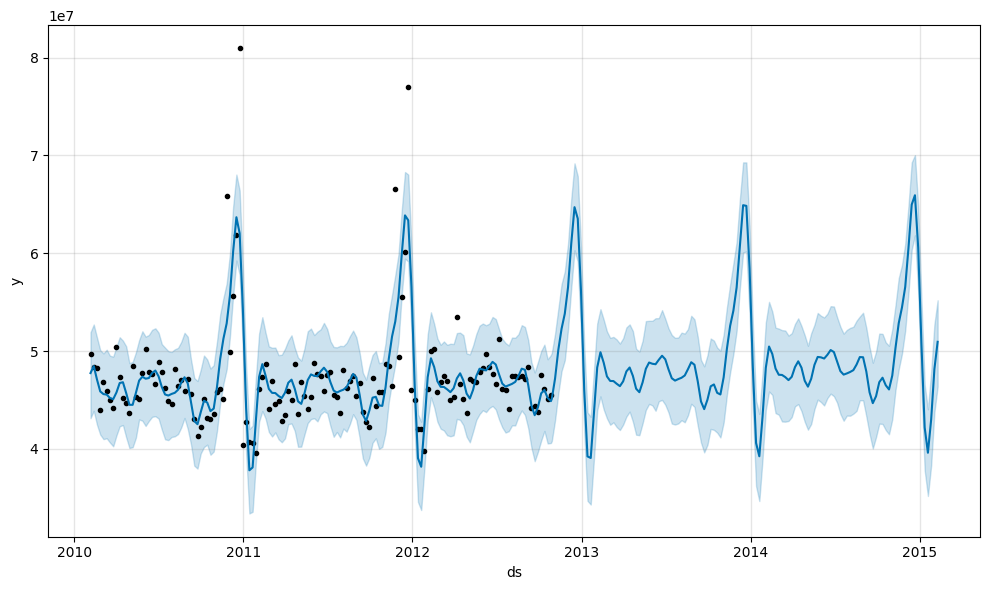

In [9]:
# Criando o DataFrame para as previsões (120 semanas)
future = model.make_future_dataframe(periods=120, freq="W")  # 12 meses no futuro
# Fazendo previsões
forecast = model.predict(future)
# Visualizando os resultados
fig = model.plot(forecast)
fig.show()

C:\Users\Thbue\AppData\Local\Temp\ipykernel_25632\3640196246.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_components.show()


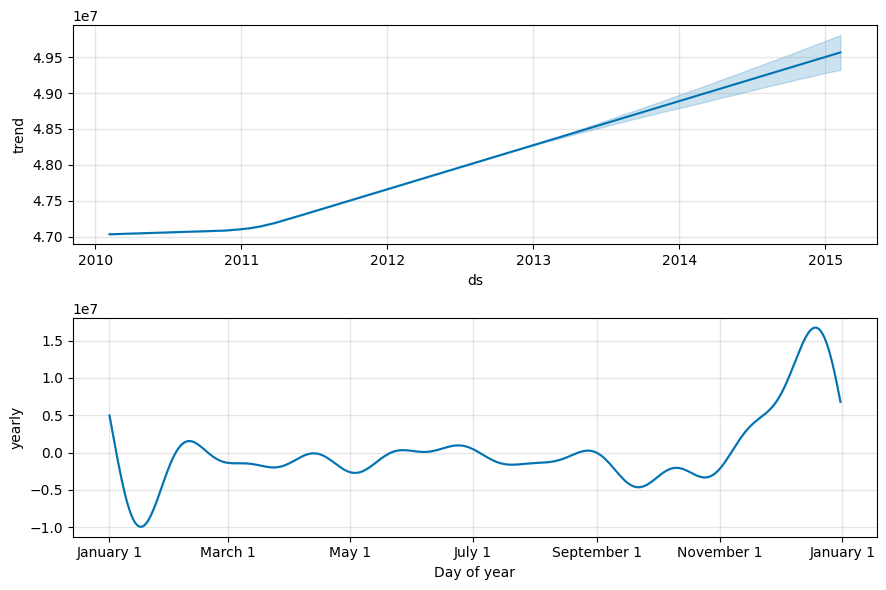

In [10]:
#Visualizando os componentes (tendência, sazonalidade, etc.)
fig_components = model.plot_components(forecast)
fig_components.show()

In [11]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,4.703758e+07,4.314134e+07,5.191682e+07,4.703758e+07,4.703758e+07,7.134604e+05,7.134604e+05,7.134604e+05,7.134604e+05,7.134604e+05,7.134604e+05,0.0,0.0,0.0,4.775104e+07
1,2010-02-12,4.703882e+07,4.389459e+07,5.271745e+07,4.703882e+07,4.703882e+07,1.431919e+06,1.431919e+06,1.431919e+06,1.431919e+06,1.431919e+06,1.431919e+06,0.0,0.0,0.0,4.847074e+07
2,2010-02-19,4.704006e+07,4.247243e+07,5.138837e+07,4.704006e+07,4.704006e+07,5.278285e+04,5.278285e+04,5.278285e+04,5.278285e+04,5.278285e+04,5.278285e+04,0.0,0.0,0.0,4.709285e+07
3,2010-02-26,4.704130e+07,4.146224e+07,5.009345e+07,4.704130e+07,4.704130e+07,-1.164519e+06,-1.164519e+06,-1.164519e+06,-1.164519e+06,-1.164519e+06,-1.164519e+06,0.0,0.0,0.0,4.587678e+07
4,2010-03-05,4.704254e+07,4.100222e+07,4.976286e+07,4.704254e+07,4.704254e+07,-1.439874e+06,-1.439874e+06,-1.439874e+06,-1.439874e+06,-1.439874e+06,-1.439874e+06,0.0,0.0,0.0,4.560267e+07


In [12]:
grouped = grouped.reset_index()
grouped = grouped.rename(columns={"Date": "ds", "Weekly_Sales": "y"})

df_av = pd.merge(forecast, grouped, on=['ds'], how='left') 
df_av = df_av[df_av['ds'] < "2012-08-01"]
df_av = df_av[df_av['ds'] < "2012-08-01"]
df_av = df_av[['ds','y','yhat']]
df_av = df_av.dropna()
df_av.head()

,ds,y,yhat
0,2010-02-05,49750740.50,4.775104e+07
1,2010-02-12,48336677.63,4.847074e+07
2,2010-02-19,48276993.78,4.709285e+07
3,2010-02-26,43968571.13,4.587678e+07
4,2010-03-05,46871470.30,4.560267e+07


In [14]:
#validação do modelo 
evaluate_model(df_av)

MAE (Erro Absoluto Médio): 2161848.5235
RMSE (Raiz do Erro Quadrático Médio): 3657269.4843
MAPE (Erro Percentual Absoluto Médio): 0.0431


In [15]:
# Fazendo a previsão por stores e departamento
# Lista para armazenar previsões
resultados = []
grouped = df_sales.groupby(['Store', 'Dept'])

for (store, dept), grupo in grouped:
    # Renomeando as colunas conforme esperado pelo Prophet
    grouped = grupo.groupby(['Date'])['Weekly_Sales'].sum()
    grupo = grouped.reset_index()
    
    grupo = grupo.rename(columns={"Date": "ds", "Weekly_Sales": "y"})

    try:        
        # Criando e ajustando o modelo Prophet
        model = Prophet()
        model.fit(grupo)
        
        # Criando o DataFrame para previsões futuras
        future = model.make_future_dataframe(periods=62, freq="W")  # Previsão de 7 dias
        forecast = model.predict(future)
        forecast['Store'] = store
        forecast['Dept'] = dept
    except:
        print("no hay datos to predict model")   
    
    print(store,dept) # print para ver o andamento da execução
    resultados.append(forecast)

14:11:15 - cmdstanpy - INFO - Chain [1] start processing
14:11:15 - cmdstanpy - INFO - Chain [1] done processing


1 1


14:11:15 - cmdstanpy - INFO - Chain [1] start processing
14:11:15 - cmdstanpy - INFO - Chain [1] done processing


1 2


14:11:16 - cmdstanpy - INFO - Chain [1] start processing
14:11:16 - cmdstanpy - INFO - Chain [1] done processing


1 3


14:11:16 - cmdstanpy - INFO - Chain [1] start processing
14:11:16 - cmdstanpy - INFO - Chain [1] done processing
14:11:17 - cmdstanpy - INFO - Chain [1] start processing
14:11:17 - cmdstanpy - INFO - Chain [1] done processing


1 4


14:11:17 - cmdstanpy - INFO - Chain [1] start processing


1 5


14:11:17 - cmdstanpy - INFO - Chain [1] done processing
14:11:17 - cmdstanpy - INFO - Chain [1] start processing


1 6


14:11:17 - cmdstanpy - INFO - Chain [1] done processing


1 7


14:11:18 - cmdstanpy - INFO - Chain [1] start processing
14:11:18 - cmdstanpy - INFO - Chain [1] done processing
14:11:18 - cmdstanpy - INFO - Chain [1] start processing


1 8


14:11:18 - cmdstanpy - INFO - Chain [1] done processing


1 9


14:11:18 - cmdstanpy - INFO - Chain [1] start processing
14:11:18 - cmdstanpy - INFO - Chain [1] done processing
14:11:19 - cmdstanpy - INFO - Chain [1] start processing


1 10


14:11:19 - cmdstanpy - INFO - Chain [1] done processing


1 11


14:11:19 - cmdstanpy - INFO - Chain [1] start processing
14:11:19 - cmdstanpy - INFO - Chain [1] done processing


1 12


14:11:20 - cmdstanpy - INFO - Chain [1] start processing
14:11:20 - cmdstanpy - INFO - Chain [1] done processing
14:11:20 - cmdstanpy - INFO - Chain [1] start processing


1 13


14:11:20 - cmdstanpy - INFO - Chain [1] done processing


1 14


14:11:20 - cmdstanpy - INFO - Chain [1] start processing
14:11:20 - cmdstanpy - INFO - Chain [1] done processing


1 16


14:11:21 - cmdstanpy - INFO - Chain [1] start processing
14:11:21 - cmdstanpy - INFO - Chain [1] done processing
14:11:21 - cmdstanpy - INFO - Chain [1] start processing


1 17


14:11:21 - cmdstanpy - INFO - Chain [1] done processing
14:11:21 - cmdstanpy - INFO - Chain [1] start processing


1 18


14:11:21 - cmdstanpy - INFO - Chain [1] done processing


1 19


14:11:22 - cmdstanpy - INFO - Chain [1] start processing
14:11:22 - cmdstanpy - INFO - Chain [1] done processing
14:11:22 - cmdstanpy - INFO - Chain [1] start processing


1 20


14:11:22 - cmdstanpy - INFO - Chain [1] done processing
14:11:22 - cmdstanpy - INFO - Chain [1] start processing


1 21


14:11:22 - cmdstanpy - INFO - Chain [1] done processing
14:11:23 - cmdstanpy - INFO - Chain [1] start processing


1 22


14:11:23 - cmdstanpy - INFO - Chain [1] done processing
14:11:23 - cmdstanpy - INFO - Chain [1] start processing


1 23


14:11:23 - cmdstanpy - INFO - Chain [1] done processing


1 24


14:11:23 - cmdstanpy - INFO - Chain [1] start processing
14:11:24 - cmdstanpy - INFO - Chain [1] done processing


1 25


14:11:24 - cmdstanpy - INFO - Chain [1] start processing
14:11:24 - cmdstanpy - INFO - Chain [1] done processing


1 26


14:11:24 - cmdstanpy - INFO - Chain [1] start processing
14:11:24 - cmdstanpy - INFO - Chain [1] done processing
14:11:25 - cmdstanpy - INFO - Chain [1] start processing


1 27


14:11:25 - cmdstanpy - INFO - Chain [1] done processing


1 28


14:11:25 - cmdstanpy - INFO - Chain [1] start processing
14:11:25 - cmdstanpy - INFO - Chain [1] done processing


1 29


14:11:25 - cmdstanpy - INFO - Chain [1] start processing
14:11:25 - cmdstanpy - INFO - Chain [1] done processing


1 30


14:11:26 - cmdstanpy - INFO - Chain [1] start processing
14:11:26 - cmdstanpy - INFO - Chain [1] done processing
14:11:26 - cmdstanpy - INFO - Chain [1] start processing


1 31


14:11:26 - cmdstanpy - INFO - Chain [1] done processing
14:11:26 - cmdstanpy - INFO - Chain [1] start processing


1 32


14:11:26 - cmdstanpy - INFO - Chain [1] done processing
14:11:27 - cmdstanpy - INFO - Chain [1] start processing


1 33


14:11:27 - cmdstanpy - INFO - Chain [1] done processing


1 34


14:11:27 - cmdstanpy - INFO - Chain [1] start processing
14:11:27 - cmdstanpy - INFO - Chain [1] done processing
14:11:27 - cmdstanpy - INFO - Chain [1] start processing


1 35


14:11:27 - cmdstanpy - INFO - Chain [1] done processing


1 36


14:11:28 - cmdstanpy - INFO - Chain [1] start processing
14:11:28 - cmdstanpy - INFO - Chain [1] done processing


1 37


14:11:28 - cmdstanpy - INFO - Chain [1] start processing
14:11:28 - cmdstanpy - INFO - Chain [1] done processing


1 38


14:11:29 - cmdstanpy - INFO - Chain [1] start processing
14:11:29 - cmdstanpy - INFO - Chain [1] done processing


1 40


14:11:29 - cmdstanpy - INFO - Chain [1] start processing
14:11:29 - cmdstanpy - INFO - Chain [1] done processing
14:11:29 - cmdstanpy - INFO - Chain [1] start processing


1 41


14:11:30 - cmdstanpy - INFO - Chain [1] done processing


1 42


14:11:30 - cmdstanpy - INFO - Chain [1] start processing
14:11:30 - cmdstanpy - INFO - Chain [1] done processing


1 44


14:11:30 - cmdstanpy - INFO - Chain [1] start processing
14:11:31 - cmdstanpy - INFO - Chain [1] done processing


1 45


14:11:31 - cmdstanpy - INFO - Chain [1] start processing
14:11:31 - cmdstanpy - INFO - Chain [1] done processing


1 46


14:11:31 - cmdstanpy - INFO - Chain [1] start processing
14:11:32 - cmdstanpy - INFO - Chain [1] done processing


1 47


14:11:32 - cmdstanpy - INFO - Chain [1] start processing
14:11:32 - cmdstanpy - INFO - Chain [1] done processing


1 48


14:11:32 - cmdstanpy - INFO - Chain [1] start processing
14:11:32 - cmdstanpy - INFO - Chain [1] done processing
14:11:33 - cmdstanpy - INFO - Chain [1] start processing


1 49


14:11:33 - cmdstanpy - INFO - Chain [1] done processing


1 51


14:11:33 - cmdstanpy - INFO - Chain [1] start processing
14:11:33 - cmdstanpy - INFO - Chain [1] done processing


1 52


14:11:33 - cmdstanpy - INFO - Chain [1] start processing
14:11:33 - cmdstanpy - INFO - Chain [1] done processing


1 54


14:11:34 - cmdstanpy - INFO - Chain [1] start processing
14:11:34 - cmdstanpy - INFO - Chain [1] done processing


1 55


14:11:34 - cmdstanpy - INFO - Chain [1] start processing
14:11:34 - cmdstanpy - INFO - Chain [1] done processing


1 56


14:11:34 - cmdstanpy - INFO - Chain [1] start processing
14:11:35 - cmdstanpy - INFO - Chain [1] done processing


1 58


14:11:35 - cmdstanpy - INFO - Chain [1] start processing
14:11:35 - cmdstanpy - INFO - Chain [1] done processing


1 59


14:11:35 - cmdstanpy - INFO - Chain [1] start processing
14:11:35 - cmdstanpy - INFO - Chain [1] done processing
14:11:36 - cmdstanpy - INFO - Chain [1] start processing


1 60


14:11:36 - cmdstanpy - INFO - Chain [1] done processing
14:11:36 - cmdstanpy - INFO - Chain [1] start processing


1 67


14:11:36 - cmdstanpy - INFO - Chain [1] done processing
14:11:36 - cmdstanpy - INFO - Chain [1] start processing


1 71


14:11:36 - cmdstanpy - INFO - Chain [1] done processing
14:11:36 - cmdstanpy - INFO - Chain [1] start processing
14:11:37 - cmdstanpy - INFO - Chain [1] done processing


1 72


14:11:37 - cmdstanpy - INFO - Chain [1] start processing


1 74


14:11:37 - cmdstanpy - INFO - Chain [1] done processing


1 77


14:11:37 - cmdstanpy - INFO - Chain [1] start processing
14:11:37 - cmdstanpy - INFO - Chain [1] done processing
14:11:37 - cmdstanpy - INFO - Chain [1] start processing


1 78


14:11:38 - cmdstanpy - INFO - Chain [1] done processing


1 79


14:11:38 - cmdstanpy - INFO - Chain [1] start processing
14:11:38 - cmdstanpy - INFO - Chain [1] done processing


1 80


14:11:38 - cmdstanpy - INFO - Chain [1] start processing
14:11:38 - cmdstanpy - INFO - Chain [1] done processing
14:11:39 - cmdstanpy - INFO - Chain [1] start processing


1 81


14:11:39 - cmdstanpy - INFO - Chain [1] done processing


1 82


14:11:39 - cmdstanpy - INFO - Chain [1] start processing
14:11:39 - cmdstanpy - INFO - Chain [1] done processing


1 83


14:11:39 - cmdstanpy - INFO - Chain [1] start processing
14:11:40 - cmdstanpy - INFO - Chain [1] done processing


1 85


14:11:40 - cmdstanpy - INFO - Chain [1] start processing
14:11:40 - cmdstanpy - INFO - Chain [1] done processing


1 87


14:11:40 - cmdstanpy - INFO - Chain [1] start processing
14:11:40 - cmdstanpy - INFO - Chain [1] done processing
14:11:41 - cmdstanpy - INFO - Chain [1] start processing


1 90


14:11:41 - cmdstanpy - INFO - Chain [1] done processing
14:11:41 - cmdstanpy - INFO - Chain [1] start processing


1 91


14:11:41 - cmdstanpy - INFO - Chain [1] done processing
14:11:41 - cmdstanpy - INFO - Chain [1] start processing


1 92


14:11:41 - cmdstanpy - INFO - Chain [1] done processing
14:11:42 - cmdstanpy - INFO - Chain [1] start processing


1 93


14:11:42 - cmdstanpy - INFO - Chain [1] done processing


1 94


14:11:42 - cmdstanpy - INFO - Chain [1] start processing
14:11:42 - cmdstanpy - INFO - Chain [1] done processing


1 95


14:11:42 - cmdstanpy - INFO - Chain [1] start processing
14:11:42 - cmdstanpy - INFO - Chain [1] done processing


1 96


14:11:43 - cmdstanpy - INFO - Chain [1] start processing
14:11:43 - cmdstanpy - INFO - Chain [1] done processing
14:11:43 - cmdstanpy - INFO - Chain [1] start processing


1 97


14:11:43 - cmdstanpy - INFO - Chain [1] done processing
14:11:43 - cmdstanpy - INFO - Chain [1] start processing


1 98


14:11:44 - cmdstanpy - INFO - Chain [1] done processing


1 99


14:11:44 - cmdstanpy - INFO - Chain [1] start processing
14:11:44 - cmdstanpy - INFO - Chain [1] done processing


2 1


14:11:44 - cmdstanpy - INFO - Chain [1] start processing
14:11:44 - cmdstanpy - INFO - Chain [1] done processing
14:11:45 - cmdstanpy - INFO - Chain [1] start processing


2 2


14:11:45 - cmdstanpy - INFO - Chain [1] done processing
14:11:45 - cmdstanpy - INFO - Chain [1] start processing


2 3


14:11:45 - cmdstanpy - INFO - Chain [1] done processing
14:11:45 - cmdstanpy - INFO - Chain [1] start processing


2 4


14:11:45 - cmdstanpy - INFO - Chain [1] done processing


2 5


14:11:46 - cmdstanpy - INFO - Chain [1] start processing
14:11:46 - cmdstanpy - INFO - Chain [1] done processing
14:11:46 - cmdstanpy - INFO - Chain [1] start processing


2 6


14:11:46 - cmdstanpy - INFO - Chain [1] done processing


2 7


14:11:46 - cmdstanpy - INFO - Chain [1] start processing
14:11:47 - cmdstanpy - INFO - Chain [1] done processing


2 8


14:11:47 - cmdstanpy - INFO - Chain [1] start processing
14:11:47 - cmdstanpy - INFO - Chain [1] done processing


2 9


14:11:47 - cmdstanpy - INFO - Chain [1] start processing
14:11:47 - cmdstanpy - INFO - Chain [1] done processing
14:11:48 - cmdstanpy - INFO - Chain [1] start processing


2 10


14:11:48 - cmdstanpy - INFO - Chain [1] done processing


2 11


14:11:48 - cmdstanpy - INFO - Chain [1] start processing
14:11:48 - cmdstanpy - INFO - Chain [1] done processing
14:11:48 - cmdstanpy - INFO - Chain [1] start processing


2 12


14:11:49 - cmdstanpy - INFO - Chain [1] done processing


2 13


14:11:49 - cmdstanpy - INFO - Chain [1] start processing
14:11:49 - cmdstanpy - INFO - Chain [1] done processing


2 14


14:11:49 - cmdstanpy - INFO - Chain [1] start processing
14:11:49 - cmdstanpy - INFO - Chain [1] done processing


2 16


14:11:50 - cmdstanpy - INFO - Chain [1] start processing
14:11:50 - cmdstanpy - INFO - Chain [1] done processing


2 17


14:11:50 - cmdstanpy - INFO - Chain [1] start processing
14:11:50 - cmdstanpy - INFO - Chain [1] done processing


2 18


14:11:50 - cmdstanpy - INFO - Chain [1] start processing
14:11:51 - cmdstanpy - INFO - Chain [1] done processing


2 19


14:11:51 - cmdstanpy - INFO - Chain [1] start processing
14:11:51 - cmdstanpy - INFO - Chain [1] done processing
14:11:51 - cmdstanpy - INFO - Chain [1] start processing


2 20


14:11:51 - cmdstanpy - INFO - Chain [1] done processing
14:11:52 - cmdstanpy - INFO - Chain [1] start processing


2 21


14:11:52 - cmdstanpy - INFO - Chain [1] done processing


2 22


14:11:52 - cmdstanpy - INFO - Chain [1] start processing
14:11:52 - cmdstanpy - INFO - Chain [1] done processing
14:11:52 - cmdstanpy - INFO - Chain [1] start processing


2 23


14:11:52 - cmdstanpy - INFO - Chain [1] done processing
14:11:53 - cmdstanpy - INFO - Chain [1] start processing


2 24


14:11:53 - cmdstanpy - INFO - Chain [1] done processing


2 25


14:11:53 - cmdstanpy - INFO - Chain [1] start processing
14:11:53 - cmdstanpy - INFO - Chain [1] done processing
14:11:53 - cmdstanpy - INFO - Chain [1] start processing


2 26


14:11:53 - cmdstanpy - INFO - Chain [1] done processing


2 27


14:11:54 - cmdstanpy - INFO - Chain [1] start processing
14:11:54 - cmdstanpy - INFO - Chain [1] done processing


2 28


14:11:54 - cmdstanpy - INFO - Chain [1] start processing
14:11:54 - cmdstanpy - INFO - Chain [1] done processing


2 29


14:11:54 - cmdstanpy - INFO - Chain [1] start processing
14:11:55 - cmdstanpy - INFO - Chain [1] done processing


2 30


14:11:55 - cmdstanpy - INFO - Chain [1] start processing
14:11:55 - cmdstanpy - INFO - Chain [1] done processing


2 31


14:11:55 - cmdstanpy - INFO - Chain [1] start processing
14:11:55 - cmdstanpy - INFO - Chain [1] done processing


2 32


14:11:56 - cmdstanpy - INFO - Chain [1] start processing
14:11:56 - cmdstanpy - INFO - Chain [1] done processing


2 33


14:11:56 - cmdstanpy - INFO - Chain [1] start processing
14:11:56 - cmdstanpy - INFO - Chain [1] done processing
14:11:56 - cmdstanpy - INFO - Chain [1] start processing


2 34


14:11:56 - cmdstanpy - INFO - Chain [1] done processing


2 35


14:11:57 - cmdstanpy - INFO - Chain [1] start processing
14:11:57 - cmdstanpy - INFO - Chain [1] done processing
14:11:57 - cmdstanpy - INFO - Chain [1] start processing


2 36


14:11:57 - cmdstanpy - INFO - Chain [1] done processing


2 37


14:11:57 - cmdstanpy - INFO - Chain [1] start processing
14:11:58 - cmdstanpy - INFO - Chain [1] done processing
14:11:58 - cmdstanpy - INFO - Chain [1] start processing


2 38


14:11:58 - cmdstanpy - INFO - Chain [1] done processing
14:11:58 - cmdstanpy - INFO - Chain [1] start processing


2 39


14:11:58 - cmdstanpy - INFO - Chain [1] done processing
14:11:58 - cmdstanpy - INFO - Chain [1] start processing


2 40


14:11:59 - cmdstanpy - INFO - Chain [1] done processing
14:11:59 - cmdstanpy - INFO - Chain [1] start processing


2 41


14:11:59 - cmdstanpy - INFO - Chain [1] done processing
14:11:59 - cmdstanpy - INFO - Chain [1] start processing


2 42


14:11:59 - cmdstanpy - INFO - Chain [1] done processing
14:11:59 - cmdstanpy - INFO - Chain [1] start processing


2 44


14:12:00 - cmdstanpy - INFO - Chain [1] done processing
14:12:00 - cmdstanpy - INFO - Chain [1] start processing


2 45


14:12:00 - cmdstanpy - INFO - Chain [1] done processing
14:12:00 - cmdstanpy - INFO - Chain [1] start processing


2 46


14:12:01 - cmdstanpy - INFO - Chain [1] done processing
14:12:01 - cmdstanpy - INFO - Chain [1] start processing


2 47


14:12:01 - cmdstanpy - INFO - Chain [1] done processing


2 48


14:12:01 - cmdstanpy - INFO - Chain [1] start processing
14:12:01 - cmdstanpy - INFO - Chain [1] done processing
14:12:02 - cmdstanpy - INFO - Chain [1] start processing


2 49


14:12:02 - cmdstanpy - INFO - Chain [1] done processing
14:12:02 - cmdstanpy - INFO - Chain [1] start processing


2 51


14:12:02 - cmdstanpy - INFO - Chain [1] done processing
14:12:02 - cmdstanpy - INFO - Chain [1] start processing


2 52


14:12:02 - cmdstanpy - INFO - Chain [1] done processing


2 54


14:12:03 - cmdstanpy - INFO - Chain [1] start processing
14:12:03 - cmdstanpy - INFO - Chain [1] done processing
14:12:03 - cmdstanpy - INFO - Chain [1] start processing
14:12:03 - cmdstanpy - INFO - Chain [1] done processing


2 55


14:12:03 - cmdstanpy - INFO - Chain [1] start processing


2 56


14:12:03 - cmdstanpy - INFO - Chain [1] done processing
14:12:04 - cmdstanpy - INFO - Chain [1] start processing


2 58


14:12:04 - cmdstanpy - INFO - Chain [1] done processing


2 59


14:12:04 - cmdstanpy - INFO - Chain [1] start processing
14:12:04 - cmdstanpy - INFO - Chain [1] done processing
14:12:04 - cmdstanpy - INFO - Chain [1] start processing


2 60


14:12:04 - cmdstanpy - INFO - Chain [1] done processing
14:12:05 - cmdstanpy - INFO - Chain [1] start processing


2 67


14:12:05 - cmdstanpy - INFO - Chain [1] done processing
14:12:05 - cmdstanpy - INFO - Chain [1] start processing


2 71


14:12:05 - cmdstanpy - INFO - Chain [1] done processing
14:12:05 - cmdstanpy - INFO - Chain [1] start processing


2 72


14:12:05 - cmdstanpy - INFO - Chain [1] done processing


2 74


14:12:06 - cmdstanpy - INFO - Chain [1] start processing
14:12:06 - cmdstanpy - INFO - Chain [1] done processing


2 77


14:12:06 - cmdstanpy - INFO - Chain [1] start processing
14:12:16 - cmdstanpy - INFO - Chain [1] done processing


2 78


14:12:17 - cmdstanpy - INFO - Chain [1] start processing
14:12:17 - cmdstanpy - INFO - Chain [1] done processing
14:12:17 - cmdstanpy - INFO - Chain [1] start processing


2 79


14:12:17 - cmdstanpy - INFO - Chain [1] done processing
14:12:17 - cmdstanpy - INFO - Chain [1] start processing


2 80


14:12:17 - cmdstanpy - INFO - Chain [1] done processing


2 81


14:12:18 - cmdstanpy - INFO - Chain [1] start processing
14:12:18 - cmdstanpy - INFO - Chain [1] done processing


2 82


14:12:18 - cmdstanpy - INFO - Chain [1] start processing
14:12:18 - cmdstanpy - INFO - Chain [1] done processing
14:12:18 - cmdstanpy - INFO - Chain [1] start processing


2 83


14:12:19 - cmdstanpy - INFO - Chain [1] done processing


2 85


14:12:19 - cmdstanpy - INFO - Chain [1] start processing
14:12:19 - cmdstanpy - INFO - Chain [1] done processing


2 87


14:12:19 - cmdstanpy - INFO - Chain [1] start processing
14:12:19 - cmdstanpy - INFO - Chain [1] done processing
14:12:20 - cmdstanpy - INFO - Chain [1] start processing


2 90


14:12:20 - cmdstanpy - INFO - Chain [1] done processing
14:12:20 - cmdstanpy - INFO - Chain [1] start processing


2 91


14:12:20 - cmdstanpy - INFO - Chain [1] done processing
14:12:20 - cmdstanpy - INFO - Chain [1] start processing


2 92


14:12:20 - cmdstanpy - INFO - Chain [1] done processing
14:12:21 - cmdstanpy - INFO - Chain [1] start processing


2 93


14:12:21 - cmdstanpy - INFO - Chain [1] done processing


2 94


14:12:21 - cmdstanpy - INFO - Chain [1] start processing
14:12:21 - cmdstanpy - INFO - Chain [1] done processing
14:12:21 - cmdstanpy - INFO - Chain [1] start processing


2 95


14:12:21 - cmdstanpy - INFO - Chain [1] done processing
14:12:22 - cmdstanpy - INFO - Chain [1] start processing


2 96


14:12:22 - cmdstanpy - INFO - Chain [1] done processing


2 97


14:12:22 - cmdstanpy - INFO - Chain [1] start processing
14:12:22 - cmdstanpy - INFO - Chain [1] done processing
14:12:22 - cmdstanpy - INFO - Chain [1] start processing


2 98


14:12:23 - cmdstanpy - INFO - Chain [1] done processing


2 99


14:12:23 - cmdstanpy - INFO - Chain [1] start processing
14:12:23 - cmdstanpy - INFO - Chain [1] done processing


3 1


14:12:23 - cmdstanpy - INFO - Chain [1] start processing
14:12:23 - cmdstanpy - INFO - Chain [1] done processing


3 2


14:12:24 - cmdstanpy - INFO - Chain [1] start processing
14:12:24 - cmdstanpy - INFO - Chain [1] done processing


3 3


14:12:24 - cmdstanpy - INFO - Chain [1] start processing
14:12:24 - cmdstanpy - INFO - Chain [1] done processing


3 4


14:12:24 - cmdstanpy - INFO - Chain [1] start processing
14:12:25 - cmdstanpy - INFO - Chain [1] done processing
14:12:25 - cmdstanpy - INFO - Chain [1] start processing


3 5


14:12:25 - cmdstanpy - INFO - Chain [1] done processing
14:12:25 - cmdstanpy - INFO - Chain [1] start processing


3 6


14:12:25 - cmdstanpy - INFO - Chain [1] done processing


3 7


14:12:26 - cmdstanpy - INFO - Chain [1] start processing
14:12:26 - cmdstanpy - INFO - Chain [1] done processing
14:12:26 - cmdstanpy - INFO - Chain [1] start processing


3 8


14:12:26 - cmdstanpy - INFO - Chain [1] done processing


3 9


14:12:26 - cmdstanpy - INFO - Chain [1] start processing
14:12:26 - cmdstanpy - INFO - Chain [1] done processing


3 10


14:12:27 - cmdstanpy - INFO - Chain [1] start processing
14:12:27 - cmdstanpy - INFO - Chain [1] done processing


3 11


14:12:27 - cmdstanpy - INFO - Chain [1] start processing
14:12:27 - cmdstanpy - INFO - Chain [1] done processing


3 12


14:12:28 - cmdstanpy - INFO - Chain [1] start processing
14:12:28 - cmdstanpy - INFO - Chain [1] done processing
14:12:28 - cmdstanpy - INFO - Chain [1] start processing


3 13


14:12:28 - cmdstanpy - INFO - Chain [1] done processing


3 14


14:12:28 - cmdstanpy - INFO - Chain [1] start processing
14:12:28 - cmdstanpy - INFO - Chain [1] done processing
14:12:29 - cmdstanpy - INFO - Chain [1] start processing


3 16


14:12:29 - cmdstanpy - INFO - Chain [1] done processing
14:12:29 - cmdstanpy - INFO - Chain [1] start processing


3 17


14:12:29 - cmdstanpy - INFO - Chain [1] done processing


3 18


14:12:29 - cmdstanpy - INFO - Chain [1] start processing
14:12:29 - cmdstanpy - INFO - Chain [1] done processing
14:12:30 - cmdstanpy - INFO - Chain [1] start processing


3 19


14:12:30 - cmdstanpy - INFO - Chain [1] done processing


3 20


14:12:30 - cmdstanpy - INFO - Chain [1] start processing
14:12:30 - cmdstanpy - INFO - Chain [1] done processing
14:12:30 - cmdstanpy - INFO - Chain [1] start processing


3 21


14:12:30 - cmdstanpy - INFO - Chain [1] done processing


3 22


14:12:31 - cmdstanpy - INFO - Chain [1] start processing
14:12:31 - cmdstanpy - INFO - Chain [1] done processing
14:12:31 - cmdstanpy - INFO - Chain [1] start processing


3 23


14:12:31 - cmdstanpy - INFO - Chain [1] done processing


3 24


14:12:31 - cmdstanpy - INFO - Chain [1] start processing
14:12:31 - cmdstanpy - INFO - Chain [1] done processing
14:12:32 - cmdstanpy - INFO - Chain [1] start processing


3 25


14:12:32 - cmdstanpy - INFO - Chain [1] done processing
14:12:32 - cmdstanpy - INFO - Chain [1] start processing
14:12:32 - cmdstanpy - INFO - Chain [1] done processing


3 26


14:12:32 - cmdstanpy - INFO - Chain [1] start processing


3 27


14:12:32 - cmdstanpy - INFO - Chain [1] done processing
14:12:33 - cmdstanpy - INFO - Chain [1] start processing


3 28


14:12:33 - cmdstanpy - INFO - Chain [1] done processing
14:12:33 - cmdstanpy - INFO - Chain [1] start processing


3 29


14:12:33 - cmdstanpy - INFO - Chain [1] done processing


3 30


14:12:33 - cmdstanpy - INFO - Chain [1] start processing
14:12:33 - cmdstanpy - INFO - Chain [1] done processing
14:12:34 - cmdstanpy - INFO - Chain [1] start processing


3 31


14:12:34 - cmdstanpy - INFO - Chain [1] done processing


3 32


14:12:34 - cmdstanpy - INFO - Chain [1] start processing
14:12:34 - cmdstanpy - INFO - Chain [1] done processing


3 33


14:12:34 - cmdstanpy - INFO - Chain [1] start processing
14:12:34 - cmdstanpy - INFO - Chain [1] done processing


3 34


14:12:35 - cmdstanpy - INFO - Chain [1] start processing
14:12:35 - cmdstanpy - INFO - Chain [1] done processing
14:12:35 - cmdstanpy - INFO - Chain [1] start processing


3 35


14:12:35 - cmdstanpy - INFO - Chain [1] done processing


3 36


14:12:36 - cmdstanpy - INFO - Chain [1] start processing
14:12:36 - cmdstanpy - INFO - Chain [1] done processing


3 38


14:12:36 - cmdstanpy - INFO - Chain [1] start processing
14:12:36 - cmdstanpy - INFO - Chain [1] done processing


3 40


14:12:36 - cmdstanpy - INFO - Chain [1] start processing
14:12:36 - cmdstanpy - INFO - Chain [1] done processing


3 41


14:12:37 - cmdstanpy - INFO - Chain [1] start processing
14:12:37 - cmdstanpy - INFO - Chain [1] done processing


3 42


14:12:37 - cmdstanpy - INFO - Chain [1] start processing
14:12:37 - cmdstanpy - INFO - Chain [1] done processing
14:12:37 - cmdstanpy - INFO - Chain [1] start processing


3 44


14:12:38 - cmdstanpy - INFO - Chain [1] done processing


3 45


14:12:38 - cmdstanpy - INFO - Chain [1] start processing
14:12:38 - cmdstanpy - INFO - Chain [1] done processing
14:12:38 - cmdstanpy - INFO - Chain [1] start processing


3 46


14:12:38 - cmdstanpy - INFO - Chain [1] done processing


3 47


14:12:39 - cmdstanpy - INFO - Chain [1] start processing
14:12:39 - cmdstanpy - INFO - Chain [1] done processing
14:12:39 - cmdstanpy - INFO - Chain [1] start processing


3 49


14:12:40 - cmdstanpy - INFO - Chain [1] done processing
14:12:40 - cmdstanpy - INFO - Chain [1] start processing


3 51


14:12:40 - cmdstanpy - INFO - Chain [1] done processing


3 52


14:12:40 - cmdstanpy - INFO - Chain [1] start processing
14:12:40 - cmdstanpy - INFO - Chain [1] done processing


3 54


14:12:41 - cmdstanpy - INFO - Chain [1] start processing
14:12:41 - cmdstanpy - INFO - Chain [1] done processing


3 55


14:12:41 - cmdstanpy - INFO - Chain [1] start processing
14:12:41 - cmdstanpy - INFO - Chain [1] done processing


3 56


14:12:41 - cmdstanpy - INFO - Chain [1] start processing
14:12:41 - cmdstanpy - INFO - Chain [1] done processing
14:12:42 - cmdstanpy - INFO - Chain [1] start processing


3 59


14:12:42 - cmdstanpy - INFO - Chain [1] done processing
14:12:42 - cmdstanpy - INFO - Chain [1] start processing


3 60


14:12:42 - cmdstanpy - INFO - Chain [1] done processing


3 67


14:12:42 - cmdstanpy - INFO - Chain [1] start processing
14:12:42 - cmdstanpy - INFO - Chain [1] done processing


3 71


14:12:43 - cmdstanpy - INFO - Chain [1] start processing
14:12:43 - cmdstanpy - INFO - Chain [1] done processing


3 72


14:12:43 - cmdstanpy - INFO - Chain [1] start processing
14:12:43 - cmdstanpy - INFO - Chain [1] done processing
14:12:44 - cmdstanpy - INFO - Chain [1] start processing


3 74


14:12:44 - cmdstanpy - INFO - Chain [1] done processing


3 77
no hay datos to predict model
3 78


14:12:44 - cmdstanpy - INFO - Chain [1] start processing
14:12:44 - cmdstanpy - INFO - Chain [1] done processing


3 79


14:12:44 - cmdstanpy - INFO - Chain [1] start processing
14:12:44 - cmdstanpy - INFO - Chain [1] done processing
14:12:45 - cmdstanpy - INFO - Chain [1] start processing


3 80


14:12:45 - cmdstanpy - INFO - Chain [1] done processing
14:12:45 - cmdstanpy - INFO - Chain [1] start processing
14:12:45 - cmdstanpy - INFO - Chain [1] done processing


3 81
3 82
no hay datos to predict model
3 83


14:12:46 - cmdstanpy - INFO - Chain [1] start processing
14:12:46 - cmdstanpy - INFO - Chain [1] done processing
14:12:46 - cmdstanpy - INFO - Chain [1] start processing


3 85


14:12:46 - cmdstanpy - INFO - Chain [1] done processing
14:12:46 - cmdstanpy - INFO - Chain [1] start processing


3 87


14:12:46 - cmdstanpy - INFO - Chain [1] done processing


3 90


14:12:47 - cmdstanpy - INFO - Chain [1] start processing
14:12:47 - cmdstanpy - INFO - Chain [1] done processing


3 91


14:12:47 - cmdstanpy - INFO - Chain [1] start processing
14:12:47 - cmdstanpy - INFO - Chain [1] done processing


3 92


14:12:47 - cmdstanpy - INFO - Chain [1] start processing
14:12:48 - cmdstanpy - INFO - Chain [1] done processing
14:12:48 - cmdstanpy - INFO - Chain [1] start processing


3 94


14:12:48 - cmdstanpy - INFO - Chain [1] done processing
14:12:48 - cmdstanpy - INFO - Chain [1] start processing


3 95


14:12:48 - cmdstanpy - INFO - Chain [1] done processing
14:12:49 - cmdstanpy - INFO - Chain [1] start processing


3 96


14:12:49 - cmdstanpy - INFO - Chain [1] done processing


3 97


14:12:49 - cmdstanpy - INFO - Chain [1] start processing
14:12:49 - cmdstanpy - INFO - Chain [1] done processing


3 98


14:12:49 - cmdstanpy - INFO - Chain [1] start processing
14:12:49 - cmdstanpy - INFO - Chain [1] done processing


4 1


14:12:50 - cmdstanpy - INFO - Chain [1] start processing
14:12:50 - cmdstanpy - INFO - Chain [1] done processing


4 2


14:12:50 - cmdstanpy - INFO - Chain [1] start processing
14:12:50 - cmdstanpy - INFO - Chain [1] done processing


4 3


14:12:51 - cmdstanpy - INFO - Chain [1] start processing
14:12:51 - cmdstanpy - INFO - Chain [1] done processing
14:12:51 - cmdstanpy - INFO - Chain [1] start processing


4 4


14:12:51 - cmdstanpy - INFO - Chain [1] done processing
14:12:51 - cmdstanpy - INFO - Chain [1] start processing


4 5


14:12:51 - cmdstanpy - INFO - Chain [1] done processing
14:12:52 - cmdstanpy - INFO - Chain [1] start processing


4 6


14:12:52 - cmdstanpy - INFO - Chain [1] done processing


4 7


14:12:52 - cmdstanpy - INFO - Chain [1] start processing
14:12:52 - cmdstanpy - INFO - Chain [1] done processing
14:12:52 - cmdstanpy - INFO - Chain [1] start processing


4 8


14:12:52 - cmdstanpy - INFO - Chain [1] done processing


4 9


14:12:53 - cmdstanpy - INFO - Chain [1] start processing
14:12:53 - cmdstanpy - INFO - Chain [1] done processing
14:12:53 - cmdstanpy - INFO - Chain [1] start processing


4 10


14:12:53 - cmdstanpy - INFO - Chain [1] done processing
14:12:53 - cmdstanpy - INFO - Chain [1] start processing


4 11


14:12:53 - cmdstanpy - INFO - Chain [1] done processing
14:12:54 - cmdstanpy - INFO - Chain [1] start processing


4 12


14:12:54 - cmdstanpy - INFO - Chain [1] done processing


4 13


14:12:54 - cmdstanpy - INFO - Chain [1] start processing
14:12:54 - cmdstanpy - INFO - Chain [1] done processing


4 14


14:12:54 - cmdstanpy - INFO - Chain [1] start processing
14:12:54 - cmdstanpy - INFO - Chain [1] done processing


4 16


14:12:55 - cmdstanpy - INFO - Chain [1] start processing
14:12:55 - cmdstanpy - INFO - Chain [1] done processing
14:12:55 - cmdstanpy - INFO - Chain [1] start processing


4 17


14:12:55 - cmdstanpy - INFO - Chain [1] done processing
14:12:55 - cmdstanpy - INFO - Chain [1] start processing
14:12:55 - cmdstanpy - INFO - Chain [1] done processing


4 18


14:12:56 - cmdstanpy - INFO - Chain [1] start processing


4 19


14:12:56 - cmdstanpy - INFO - Chain [1] done processing
14:12:56 - cmdstanpy - INFO - Chain [1] start processing


4 20


14:12:56 - cmdstanpy - INFO - Chain [1] done processing
14:12:56 - cmdstanpy - INFO - Chain [1] start processing


4 21


14:12:56 - cmdstanpy - INFO - Chain [1] done processing


4 22


14:12:57 - cmdstanpy - INFO - Chain [1] start processing
14:12:57 - cmdstanpy - INFO - Chain [1] done processing
14:12:57 - cmdstanpy - INFO - Chain [1] start processing


4 23


14:12:57 - cmdstanpy - INFO - Chain [1] done processing
14:12:57 - cmdstanpy - INFO - Chain [1] start processing


4 24


14:12:58 - cmdstanpy - INFO - Chain [1] done processing
14:12:58 - cmdstanpy - INFO - Chain [1] start processing


4 25


14:12:58 - cmdstanpy - INFO - Chain [1] done processing


4 26


14:12:58 - cmdstanpy - INFO - Chain [1] start processing
14:12:58 - cmdstanpy - INFO - Chain [1] done processing


4 27


14:12:59 - cmdstanpy - INFO - Chain [1] start processing
14:12:59 - cmdstanpy - INFO - Chain [1] done processing
14:12:59 - cmdstanpy - INFO - Chain [1] start processing
14:12:59 - cmdstanpy - INFO - Chain [1] done processing


4 28


14:12:59 - cmdstanpy - INFO - Chain [1] start processing
14:12:59 - cmdstanpy - INFO - Chain [1] done processing


4 29


14:12:59 - cmdstanpy - INFO - Chain [1] start processing


4 30


14:12:59 - cmdstanpy - INFO - Chain [1] done processing
14:13:00 - cmdstanpy - INFO - Chain [1] start processing


4 31


14:13:00 - cmdstanpy - INFO - Chain [1] done processing
14:13:00 - cmdstanpy - INFO - Chain [1] start processing


4 32


14:13:00 - cmdstanpy - INFO - Chain [1] done processing


4 33


14:13:00 - cmdstanpy - INFO - Chain [1] start processing
14:13:00 - cmdstanpy - INFO - Chain [1] done processing
14:13:01 - cmdstanpy - INFO - Chain [1] start processing


4 34


14:13:01 - cmdstanpy - INFO - Chain [1] done processing
14:13:01 - cmdstanpy - INFO - Chain [1] start processing


4 35


14:13:01 - cmdstanpy - INFO - Chain [1] done processing
14:13:01 - cmdstanpy - INFO - Chain [1] start processing


4 36


14:13:01 - cmdstanpy - INFO - Chain [1] done processing
14:13:02 - cmdstanpy - INFO - Chain [1] start processing


4 37


14:13:02 - cmdstanpy - INFO - Chain [1] done processing


4 38
no hay datos to predict model
4 39


14:13:02 - cmdstanpy - INFO - Chain [1] start processing
14:13:02 - cmdstanpy - INFO - Chain [1] done processing
14:13:02 - cmdstanpy - INFO - Chain [1] start processing


4 40


14:13:02 - cmdstanpy - INFO - Chain [1] done processing
14:13:03 - cmdstanpy - INFO - Chain [1] start processing


4 41


14:13:03 - cmdstanpy - INFO - Chain [1] done processing
14:13:03 - cmdstanpy - INFO - Chain [1] start processing


4 42


14:13:03 - cmdstanpy - INFO - Chain [1] done processing
14:13:03 - cmdstanpy - INFO - Chain [1] start processing


4 44


14:13:04 - cmdstanpy - INFO - Chain [1] done processing
14:13:04 - cmdstanpy - INFO - Chain [1] start processing


4 45


14:13:04 - cmdstanpy - INFO - Chain [1] done processing
14:13:04 - cmdstanpy - INFO - Chain [1] start processing


4 46


14:13:11 - cmdstanpy - INFO - Chain [1] done processing


4 47


14:13:12 - cmdstanpy - INFO - Chain [1] start processing
14:13:12 - cmdstanpy - INFO - Chain [1] done processing


4 48


14:13:12 - cmdstanpy - INFO - Chain [1] start processing
14:13:12 - cmdstanpy - INFO - Chain [1] done processing


4 49


14:13:12 - cmdstanpy - INFO - Chain [1] start processing
14:13:13 - cmdstanpy - INFO - Chain [1] done processing


4 51


14:13:13 - cmdstanpy - INFO - Chain [1] start processing
14:13:13 - cmdstanpy - INFO - Chain [1] done processing


4 52


14:13:13 - cmdstanpy - INFO - Chain [1] start processing
14:13:13 - cmdstanpy - INFO - Chain [1] done processing
14:13:14 - cmdstanpy - INFO - Chain [1] start processing


4 54


14:13:14 - cmdstanpy - INFO - Chain [1] done processing


4 55


14:13:14 - cmdstanpy - INFO - Chain [1] start processing
14:13:14 - cmdstanpy - INFO - Chain [1] done processing
14:13:14 - cmdstanpy - INFO - Chain [1] start processing
14:13:14 - cmdstanpy - INFO - Chain [1] done processing


4 56


14:13:15 - cmdstanpy - INFO - Chain [1] start processing


4 58


14:13:15 - cmdstanpy - INFO - Chain [1] done processing
14:13:15 - cmdstanpy - INFO - Chain [1] start processing


4 59


14:13:15 - cmdstanpy - INFO - Chain [1] done processing


4 60


14:13:15 - cmdstanpy - INFO - Chain [1] start processing
14:13:15 - cmdstanpy - INFO - Chain [1] done processing
14:13:16 - cmdstanpy - INFO - Chain [1] start processing


4 67


14:13:16 - cmdstanpy - INFO - Chain [1] done processing


4 71


14:13:16 - cmdstanpy - INFO - Chain [1] start processing
14:13:16 - cmdstanpy - INFO - Chain [1] done processing


4 72


14:13:16 - cmdstanpy - INFO - Chain [1] start processing
14:13:16 - cmdstanpy - INFO - Chain [1] done processing


4 74


14:13:17 - cmdstanpy - INFO - Chain [1] start processing
14:13:17 - cmdstanpy - INFO - Chain [1] done processing
14:13:17 - cmdstanpy - INFO - Chain [1] start processing


4 77


14:13:17 - cmdstanpy - INFO - Chain [1] done processing


4 78


14:13:17 - cmdstanpy - INFO - Chain [1] start processing
14:13:18 - cmdstanpy - INFO - Chain [1] done processing


4 79


14:13:18 - cmdstanpy - INFO - Chain [1] start processing
14:13:18 - cmdstanpy - INFO - Chain [1] done processing


4 80


14:13:18 - cmdstanpy - INFO - Chain [1] start processing
14:13:18 - cmdstanpy - INFO - Chain [1] done processing
14:13:19 - cmdstanpy - INFO - Chain [1] start processing


4 81


14:13:19 - cmdstanpy - INFO - Chain [1] done processing


4 82


14:13:19 - cmdstanpy - INFO - Chain [1] start processing
14:13:19 - cmdstanpy - INFO - Chain [1] done processing


4 83


14:13:20 - cmdstanpy - INFO - Chain [1] start processing
14:13:20 - cmdstanpy - INFO - Chain [1] done processing
14:13:20 - cmdstanpy - INFO - Chain [1] start processing


4 85


14:13:20 - cmdstanpy - INFO - Chain [1] done processing
14:13:20 - cmdstanpy - INFO - Chain [1] start processing


4 87


14:13:20 - cmdstanpy - INFO - Chain [1] done processing


4 90


14:13:21 - cmdstanpy - INFO - Chain [1] start processing
14:13:21 - cmdstanpy - INFO - Chain [1] done processing
14:13:21 - cmdstanpy - INFO - Chain [1] start processing


4 91


14:13:21 - cmdstanpy - INFO - Chain [1] done processing
14:13:21 - cmdstanpy - INFO - Chain [1] start processing


4 92


14:13:21 - cmdstanpy - INFO - Chain [1] done processing


4 93


14:13:22 - cmdstanpy - INFO - Chain [1] start processing
14:13:22 - cmdstanpy - INFO - Chain [1] done processing
14:13:22 - cmdstanpy - INFO - Chain [1] start processing


4 94


14:13:22 - cmdstanpy - INFO - Chain [1] done processing


4 95


14:13:23 - cmdstanpy - INFO - Chain [1] start processing
14:13:23 - cmdstanpy - INFO - Chain [1] done processing


4 96


14:13:23 - cmdstanpy - INFO - Chain [1] start processing
14:13:23 - cmdstanpy - INFO - Chain [1] done processing


4 97


14:13:23 - cmdstanpy - INFO - Chain [1] start processing
14:13:23 - cmdstanpy - INFO - Chain [1] done processing
14:13:24 - cmdstanpy - INFO - Chain [1] start processing


4 98


14:13:24 - cmdstanpy - INFO - Chain [1] done processing


4 99


14:13:24 - cmdstanpy - INFO - Chain [1] start processing
14:13:24 - cmdstanpy - INFO - Chain [1] done processing


5 1


14:13:25 - cmdstanpy - INFO - Chain [1] start processing
14:13:25 - cmdstanpy - INFO - Chain [1] done processing
14:13:25 - cmdstanpy - INFO - Chain [1] start processing


5 2


14:13:25 - cmdstanpy - INFO - Chain [1] done processing
14:13:25 - cmdstanpy - INFO - Chain [1] start processing


5 3


14:13:25 - cmdstanpy - INFO - Chain [1] done processing
14:13:26 - cmdstanpy - INFO - Chain [1] start processing


5 4


14:13:26 - cmdstanpy - INFO - Chain [1] done processing


5 5


14:13:26 - cmdstanpy - INFO - Chain [1] start processing
14:13:26 - cmdstanpy - INFO - Chain [1] done processing


5 6


14:13:26 - cmdstanpy - INFO - Chain [1] start processing
14:13:26 - cmdstanpy - INFO - Chain [1] done processing


5 7


14:13:27 - cmdstanpy - INFO - Chain [1] start processing
14:13:27 - cmdstanpy - INFO - Chain [1] done processing
14:13:27 - cmdstanpy - INFO - Chain [1] start processing


5 8


14:13:27 - cmdstanpy - INFO - Chain [1] done processing
14:13:27 - cmdstanpy - INFO - Chain [1] start processing


5 9


14:13:28 - cmdstanpy - INFO - Chain [1] done processing


5 10


14:13:28 - cmdstanpy - INFO - Chain [1] start processing
14:13:28 - cmdstanpy - INFO - Chain [1] done processing
14:13:28 - cmdstanpy - INFO - Chain [1] start processing
14:13:28 - cmdstanpy - INFO - Chain [1] done processing


5 11


14:13:28 - cmdstanpy - INFO - Chain [1] start processing


5 12


14:13:29 - cmdstanpy - INFO - Chain [1] done processing
14:13:29 - cmdstanpy - INFO - Chain [1] start processing


5 13


14:13:29 - cmdstanpy - INFO - Chain [1] done processing
14:13:29 - cmdstanpy - INFO - Chain [1] start processing


5 14


14:13:29 - cmdstanpy - INFO - Chain [1] done processing
14:13:30 - cmdstanpy - INFO - Chain [1] start processing


5 16


14:13:30 - cmdstanpy - INFO - Chain [1] done processing
14:13:30 - cmdstanpy - INFO - Chain [1] start processing


5 17


14:13:30 - cmdstanpy - INFO - Chain [1] done processing
14:13:30 - cmdstanpy - INFO - Chain [1] start processing


5 18


14:13:31 - cmdstanpy - INFO - Chain [1] done processing
14:13:31 - cmdstanpy - INFO - Chain [1] start processing


5 19


14:13:31 - cmdstanpy - INFO - Chain [1] done processing
14:13:31 - cmdstanpy - INFO - Chain [1] start processing


5 20


14:13:31 - cmdstanpy - INFO - Chain [1] done processing
14:13:31 - cmdstanpy - INFO - Chain [1] start processing


5 21


14:13:32 - cmdstanpy - INFO - Chain [1] done processing
14:13:32 - cmdstanpy - INFO - Chain [1] start processing


5 22


14:13:32 - cmdstanpy - INFO - Chain [1] done processing
14:13:32 - cmdstanpy - INFO - Chain [1] start processing


5 23


14:13:32 - cmdstanpy - INFO - Chain [1] done processing
14:13:32 - cmdstanpy - INFO - Chain [1] start processing


5 24


14:13:33 - cmdstanpy - INFO - Chain [1] done processing
14:13:33 - cmdstanpy - INFO - Chain [1] start processing


5 25


14:13:33 - cmdstanpy - INFO - Chain [1] done processing
14:13:33 - cmdstanpy - INFO - Chain [1] start processing


5 26


14:13:33 - cmdstanpy - INFO - Chain [1] done processing


5 27


14:13:34 - cmdstanpy - INFO - Chain [1] start processing
14:13:34 - cmdstanpy - INFO - Chain [1] done processing


5 28


14:13:34 - cmdstanpy - INFO - Chain [1] start processing
14:13:34 - cmdstanpy - INFO - Chain [1] done processing
14:13:34 - cmdstanpy - INFO - Chain [1] start processing


5 29


14:13:34 - cmdstanpy - INFO - Chain [1] done processing


5 30


14:13:35 - cmdstanpy - INFO - Chain [1] start processing
14:13:35 - cmdstanpy - INFO - Chain [1] done processing
14:13:35 - cmdstanpy - INFO - Chain [1] start processing


5 31


14:13:35 - cmdstanpy - INFO - Chain [1] done processing


5 32


14:13:35 - cmdstanpy - INFO - Chain [1] start processing
14:13:36 - cmdstanpy - INFO - Chain [1] done processing


5 33


14:13:36 - cmdstanpy - INFO - Chain [1] start processing
14:13:36 - cmdstanpy - INFO - Chain [1] done processing


5 34


14:13:36 - cmdstanpy - INFO - Chain [1] start processing
14:13:36 - cmdstanpy - INFO - Chain [1] done processing


5 35


14:13:37 - cmdstanpy - INFO - Chain [1] start processing
14:13:37 - cmdstanpy - INFO - Chain [1] done processing


5 36


14:13:37 - cmdstanpy - INFO - Chain [1] start processing
14:13:37 - cmdstanpy - INFO - Chain [1] done processing


5 38


14:13:37 - cmdstanpy - INFO - Chain [1] start processing
14:13:37 - cmdstanpy - INFO - Chain [1] done processing
14:13:38 - cmdstanpy - INFO - Chain [1] start processing


5 40


14:13:38 - cmdstanpy - INFO - Chain [1] done processing


5 41


14:13:38 - cmdstanpy - INFO - Chain [1] start processing
14:13:38 - cmdstanpy - INFO - Chain [1] done processing


5 42


14:13:39 - cmdstanpy - INFO - Chain [1] start processing
14:13:39 - cmdstanpy - INFO - Chain [1] done processing


5 44


14:13:39 - cmdstanpy - INFO - Chain [1] start processing
14:13:39 - cmdstanpy - INFO - Chain [1] done processing


5 45


14:13:40 - cmdstanpy - INFO - Chain [1] start processing
14:13:40 - cmdstanpy - INFO - Chain [1] done processing
14:13:40 - cmdstanpy - INFO - Chain [1] start processing


5 46


14:13:52 - cmdstanpy - INFO - Chain [1] done processing
14:13:52 - cmdstanpy - INFO - Chain [1] start processing


5 47


14:13:53 - cmdstanpy - INFO - Chain [1] done processing
14:13:53 - cmdstanpy - INFO - Chain [1] start processing


5 49


14:13:53 - cmdstanpy - INFO - Chain [1] done processing
14:13:53 - cmdstanpy - INFO - Chain [1] start processing


5 51


14:13:53 - cmdstanpy - INFO - Chain [1] done processing
14:13:53 - cmdstanpy - INFO - Chain [1] start processing


5 52


14:13:54 - cmdstanpy - INFO - Chain [1] done processing
14:13:54 - cmdstanpy - INFO - Chain [1] start processing


5 54


14:13:54 - cmdstanpy - INFO - Chain [1] done processing
14:13:55 - cmdstanpy - INFO - Chain [1] start processing


5 55


14:13:55 - cmdstanpy - INFO - Chain [1] done processing
14:13:55 - cmdstanpy - INFO - Chain [1] start processing


5 56


14:13:55 - cmdstanpy - INFO - Chain [1] done processing
14:13:55 - cmdstanpy - INFO - Chain [1] start processing


5 58


14:13:55 - cmdstanpy - INFO - Chain [1] done processing


5 59


14:13:56 - cmdstanpy - INFO - Chain [1] start processing
14:13:56 - cmdstanpy - INFO - Chain [1] done processing


5 60


14:13:56 - cmdstanpy - INFO - Chain [1] start processing
14:13:56 - cmdstanpy - INFO - Chain [1] done processing


5 67


14:13:57 - cmdstanpy - INFO - Chain [1] start processing
14:13:57 - cmdstanpy - INFO - Chain [1] done processing


5 71


14:13:57 - cmdstanpy - INFO - Chain [1] start processing
14:13:57 - cmdstanpy - INFO - Chain [1] done processing
14:13:57 - cmdstanpy - INFO - Chain [1] start processing


5 72


14:13:57 - cmdstanpy - INFO - Chain [1] done processing


5 74


14:13:58 - cmdstanpy - INFO - Chain [1] start processing
14:13:58 - cmdstanpy - INFO - Chain [1] done processing


5 77
no hay datos to predict model
5 78


14:13:58 - cmdstanpy - INFO - Chain [1] start processing
14:13:58 - cmdstanpy - INFO - Chain [1] done processing


5 79


14:13:59 - cmdstanpy - INFO - Chain [1] start processing
14:13:59 - cmdstanpy - INFO - Chain [1] done processing


5 80


14:13:59 - cmdstanpy - INFO - Chain [1] start processing
14:13:59 - cmdstanpy - INFO - Chain [1] done processing


5 81


14:13:59 - cmdstanpy - INFO - Chain [1] start processing
14:13:59 - cmdstanpy - INFO - Chain [1] done processing


5 82


14:14:00 - cmdstanpy - INFO - Chain [1] start processing
14:14:00 - cmdstanpy - INFO - Chain [1] done processing
14:14:00 - cmdstanpy - INFO - Chain [1] start processing


5 85


14:14:00 - cmdstanpy - INFO - Chain [1] done processing
14:14:00 - cmdstanpy - INFO - Chain [1] start processing


5 87


14:14:01 - cmdstanpy - INFO - Chain [1] done processing


5 90


14:14:01 - cmdstanpy - INFO - Chain [1] start processing
14:14:01 - cmdstanpy - INFO - Chain [1] done processing
14:14:01 - cmdstanpy - INFO - Chain [1] start processing


5 91


14:14:01 - cmdstanpy - INFO - Chain [1] done processing


5 92


14:14:02 - cmdstanpy - INFO - Chain [1] start processing
14:14:02 - cmdstanpy - INFO - Chain [1] done processing
14:14:02 - cmdstanpy - INFO - Chain [1] start processing


5 94


14:14:02 - cmdstanpy - INFO - Chain [1] done processing
14:14:03 - cmdstanpy - INFO - Chain [1] start processing


5 95


14:14:03 - cmdstanpy - INFO - Chain [1] done processing
14:14:03 - cmdstanpy - INFO - Chain [1] start processing


5 96


14:14:03 - cmdstanpy - INFO - Chain [1] done processing


5 97


14:14:03 - cmdstanpy - INFO - Chain [1] start processing
14:14:04 - cmdstanpy - INFO - Chain [1] done processing
14:14:04 - cmdstanpy - INFO - Chain [1] start processing


5 98


14:14:04 - cmdstanpy - INFO - Chain [1] done processing
14:14:04 - cmdstanpy - INFO - Chain [1] start processing


6 1


14:14:04 - cmdstanpy - INFO - Chain [1] done processing
14:14:04 - cmdstanpy - INFO - Chain [1] start processing


6 2


14:14:04 - cmdstanpy - INFO - Chain [1] done processing
14:14:05 - cmdstanpy - INFO - Chain [1] start processing


6 3


14:14:05 - cmdstanpy - INFO - Chain [1] done processing
14:14:05 - cmdstanpy - INFO - Chain [1] start processing


6 4


14:14:05 - cmdstanpy - INFO - Chain [1] done processing
14:14:05 - cmdstanpy - INFO - Chain [1] start processing


6 5


14:14:05 - cmdstanpy - INFO - Chain [1] done processing
14:14:06 - cmdstanpy - INFO - Chain [1] start processing


6 6


14:14:06 - cmdstanpy - INFO - Chain [1] done processing
14:14:06 - cmdstanpy - INFO - Chain [1] start processing


6 7


14:14:06 - cmdstanpy - INFO - Chain [1] done processing


6 8


14:14:07 - cmdstanpy - INFO - Chain [1] start processing
14:14:07 - cmdstanpy - INFO - Chain [1] done processing
14:14:07 - cmdstanpy - INFO - Chain [1] start processing


6 9


14:14:07 - cmdstanpy - INFO - Chain [1] done processing
14:14:07 - cmdstanpy - INFO - Chain [1] start processing


6 10


14:14:07 - cmdstanpy - INFO - Chain [1] done processing
14:14:08 - cmdstanpy - INFO - Chain [1] start processing


6 11


14:14:08 - cmdstanpy - INFO - Chain [1] done processing


6 12


14:14:08 - cmdstanpy - INFO - Chain [1] start processing
14:14:08 - cmdstanpy - INFO - Chain [1] done processing
14:14:08 - cmdstanpy - INFO - Chain [1] start processing


6 13


14:14:08 - cmdstanpy - INFO - Chain [1] done processing
14:14:09 - cmdstanpy - INFO - Chain [1] start processing


6 14


14:14:09 - cmdstanpy - INFO - Chain [1] done processing


6 16


14:14:09 - cmdstanpy - INFO - Chain [1] start processing
14:14:09 - cmdstanpy - INFO - Chain [1] done processing
14:14:09 - cmdstanpy - INFO - Chain [1] start processing


6 17


14:14:09 - cmdstanpy - INFO - Chain [1] done processing
14:14:10 - cmdstanpy - INFO - Chain [1] start processing


6 18


14:14:10 - cmdstanpy - INFO - Chain [1] done processing
14:14:10 - cmdstanpy - INFO - Chain [1] start processing


6 19


14:14:10 - cmdstanpy - INFO - Chain [1] done processing


6 20


14:14:10 - cmdstanpy - INFO - Chain [1] start processing
14:14:10 - cmdstanpy - INFO - Chain [1] done processing


6 21


14:14:11 - cmdstanpy - INFO - Chain [1] start processing
14:14:11 - cmdstanpy - INFO - Chain [1] done processing


6 22


14:14:11 - cmdstanpy - INFO - Chain [1] start processing
14:14:11 - cmdstanpy - INFO - Chain [1] done processing


6 23


14:14:12 - cmdstanpy - INFO - Chain [1] start processing
14:14:12 - cmdstanpy - INFO - Chain [1] done processing


6 24


14:14:12 - cmdstanpy - INFO - Chain [1] start processing
14:14:12 - cmdstanpy - INFO - Chain [1] done processing


6 25


14:14:12 - cmdstanpy - INFO - Chain [1] start processing
14:14:12 - cmdstanpy - INFO - Chain [1] done processing


6 26


14:14:13 - cmdstanpy - INFO - Chain [1] start processing
14:14:13 - cmdstanpy - INFO - Chain [1] done processing
14:14:13 - cmdstanpy - INFO - Chain [1] start processing


6 27


14:14:13 - cmdstanpy - INFO - Chain [1] done processing
14:14:14 - cmdstanpy - INFO - Chain [1] start processing


6 28


14:14:14 - cmdstanpy - INFO - Chain [1] done processing
14:14:14 - cmdstanpy - INFO - Chain [1] start processing


6 29


14:14:14 - cmdstanpy - INFO - Chain [1] done processing


6 30


14:14:14 - cmdstanpy - INFO - Chain [1] start processing
14:14:14 - cmdstanpy - INFO - Chain [1] done processing


6 31


14:14:15 - cmdstanpy - INFO - Chain [1] start processing
14:14:15 - cmdstanpy - INFO - Chain [1] done processing
14:14:15 - cmdstanpy - INFO - Chain [1] start processing


6 32


14:14:15 - cmdstanpy - INFO - Chain [1] done processing
14:14:15 - cmdstanpy - INFO - Chain [1] start processing


6 33


14:14:15 - cmdstanpy - INFO - Chain [1] done processing
14:14:16 - cmdstanpy - INFO - Chain [1] start processing


6 34


14:14:16 - cmdstanpy - INFO - Chain [1] done processing
14:14:16 - cmdstanpy - INFO - Chain [1] start processing


6 35


14:14:16 - cmdstanpy - INFO - Chain [1] done processing
14:14:16 - cmdstanpy - INFO - Chain [1] start processing


6 36


14:14:17 - cmdstanpy - INFO - Chain [1] done processing
14:14:17 - cmdstanpy - INFO - Chain [1] start processing


6 37


14:14:17 - cmdstanpy - INFO - Chain [1] done processing


6 38


14:14:17 - cmdstanpy - INFO - Chain [1] start processing
14:14:17 - cmdstanpy - INFO - Chain [1] done processing
14:14:18 - cmdstanpy - INFO - Chain [1] start processing


6 40


14:14:18 - cmdstanpy - INFO - Chain [1] done processing
14:14:18 - cmdstanpy - INFO - Chain [1] start processing


6 41


14:14:18 - cmdstanpy - INFO - Chain [1] done processing
14:14:18 - cmdstanpy - INFO - Chain [1] start processing


6 42


14:14:18 - cmdstanpy - INFO - Chain [1] done processing
14:14:19 - cmdstanpy - INFO - Chain [1] start processing


6 44


14:14:19 - cmdstanpy - INFO - Chain [1] done processing


6 45


14:14:19 - cmdstanpy - INFO - Chain [1] start processing
14:14:19 - cmdstanpy - INFO - Chain [1] done processing
14:14:20 - cmdstanpy - INFO - Chain [1] start processing


6 46


14:14:23 - cmdstanpy - INFO - Chain [1] done processing


6 47


14:14:23 - cmdstanpy - INFO - Chain [1] start processing
14:14:23 - cmdstanpy - INFO - Chain [1] done processing


6 48


14:14:24 - cmdstanpy - INFO - Chain [1] start processing
14:14:24 - cmdstanpy - INFO - Chain [1] done processing
14:14:24 - cmdstanpy - INFO - Chain [1] start processing


6 49


14:14:24 - cmdstanpy - INFO - Chain [1] done processing


6 51


14:14:24 - cmdstanpy - INFO - Chain [1] start processing
14:14:25 - cmdstanpy - INFO - Chain [1] done processing
14:14:25 - cmdstanpy - INFO - Chain [1] start processing


6 52


14:14:25 - cmdstanpy - INFO - Chain [1] done processing


6 54


14:14:25 - cmdstanpy - INFO - Chain [1] start processing
14:14:25 - cmdstanpy - INFO - Chain [1] done processing


6 55


14:14:26 - cmdstanpy - INFO - Chain [1] start processing
14:14:26 - cmdstanpy - INFO - Chain [1] done processing


6 56


14:14:26 - cmdstanpy - INFO - Chain [1] start processing
14:14:26 - cmdstanpy - INFO - Chain [1] done processing


6 58


14:14:26 - cmdstanpy - INFO - Chain [1] start processing
14:14:26 - cmdstanpy - INFO - Chain [1] done processing
14:14:27 - cmdstanpy - INFO - Chain [1] start processing


6 59


14:14:27 - cmdstanpy - INFO - Chain [1] done processing
14:14:28 - cmdstanpy - INFO - Chain [1] start processing


6 60


14:14:28 - cmdstanpy - INFO - Chain [1] done processing


6 67


14:14:28 - cmdstanpy - INFO - Chain [1] start processing
14:14:28 - cmdstanpy - INFO - Chain [1] done processing
14:14:28 - cmdstanpy - INFO - Chain [1] start processing


6 71


14:14:28 - cmdstanpy - INFO - Chain [1] done processing
14:14:29 - cmdstanpy - INFO - Chain [1] start processing


6 72


14:14:29 - cmdstanpy - INFO - Chain [1] done processing
14:14:29 - cmdstanpy - INFO - Chain [1] start processing


6 74


14:14:29 - cmdstanpy - INFO - Chain [1] done processing
14:14:29 - cmdstanpy - INFO - Chain [1] start processing


6 77


14:14:30 - cmdstanpy - INFO - Chain [1] done processing


6 78


14:14:30 - cmdstanpy - INFO - Chain [1] start processing
14:14:30 - cmdstanpy - INFO - Chain [1] done processing
14:14:30 - cmdstanpy - INFO - Chain [1] start processing


6 79


14:14:30 - cmdstanpy - INFO - Chain [1] done processing
14:14:31 - cmdstanpy - INFO - Chain [1] start processing


6 80


14:14:31 - cmdstanpy - INFO - Chain [1] done processing
14:14:31 - cmdstanpy - INFO - Chain [1] start processing


6 81


14:14:31 - cmdstanpy - INFO - Chain [1] done processing
14:14:31 - cmdstanpy - INFO - Chain [1] start processing
14:14:31 - cmdstanpy - INFO - Chain [1] done processing


6 82


14:14:32 - cmdstanpy - INFO - Chain [1] start processing


6 83


14:14:32 - cmdstanpy - INFO - Chain [1] done processing


6 85


14:14:32 - cmdstanpy - INFO - Chain [1] start processing
14:14:32 - cmdstanpy - INFO - Chain [1] done processing
14:14:32 - cmdstanpy - INFO - Chain [1] start processing


6 87


14:14:32 - cmdstanpy - INFO - Chain [1] done processing


6 90


14:14:33 - cmdstanpy - INFO - Chain [1] start processing
14:14:33 - cmdstanpy - INFO - Chain [1] done processing
14:14:33 - cmdstanpy - INFO - Chain [1] start processing


6 91


14:14:33 - cmdstanpy - INFO - Chain [1] done processing


6 92


14:14:33 - cmdstanpy - INFO - Chain [1] start processing
14:14:33 - cmdstanpy - INFO - Chain [1] done processing
14:14:34 - cmdstanpy - INFO - Chain [1] start processing


6 93


14:14:34 - cmdstanpy - INFO - Chain [1] done processing


6 94


14:14:34 - cmdstanpy - INFO - Chain [1] start processing
14:14:34 - cmdstanpy - INFO - Chain [1] done processing


6 95


14:14:35 - cmdstanpy - INFO - Chain [1] start processing
14:14:35 - cmdstanpy - INFO - Chain [1] done processing


6 96


14:14:35 - cmdstanpy - INFO - Chain [1] start processing
14:14:35 - cmdstanpy - INFO - Chain [1] done processing
14:14:35 - cmdstanpy - INFO - Chain [1] start processing


6 97


14:14:35 - cmdstanpy - INFO - Chain [1] done processing


6 98


14:14:36 - cmdstanpy - INFO - Chain [1] start processing
14:14:36 - cmdstanpy - INFO - Chain [1] done processing
14:14:36 - cmdstanpy - INFO - Chain [1] start processing


6 99


14:14:36 - cmdstanpy - INFO - Chain [1] done processing


7 1


14:14:37 - cmdstanpy - INFO - Chain [1] start processing
14:14:37 - cmdstanpy - INFO - Chain [1] done processing


7 2


14:14:37 - cmdstanpy - INFO - Chain [1] start processing
14:14:37 - cmdstanpy - INFO - Chain [1] done processing


7 3


14:14:37 - cmdstanpy - INFO - Chain [1] start processing
14:14:38 - cmdstanpy - INFO - Chain [1] done processing


7 4


14:14:38 - cmdstanpy - INFO - Chain [1] start processing
14:14:38 - cmdstanpy - INFO - Chain [1] done processing


7 5


14:14:38 - cmdstanpy - INFO - Chain [1] start processing
14:14:38 - cmdstanpy - INFO - Chain [1] done processing
14:14:39 - cmdstanpy - INFO - Chain [1] start processing


7 6


14:14:39 - cmdstanpy - INFO - Chain [1] done processing
14:14:39 - cmdstanpy - INFO - Chain [1] start processing


7 7


14:14:39 - cmdstanpy - INFO - Chain [1] done processing
14:14:39 - cmdstanpy - INFO - Chain [1] start processing


7 8


14:14:39 - cmdstanpy - INFO - Chain [1] done processing
14:14:40 - cmdstanpy - INFO - Chain [1] start processing


7 9


14:14:40 - cmdstanpy - INFO - Chain [1] done processing


7 10


14:14:40 - cmdstanpy - INFO - Chain [1] start processing
14:14:40 - cmdstanpy - INFO - Chain [1] done processing
14:14:40 - cmdstanpy - INFO - Chain [1] start processing


7 11


14:14:40 - cmdstanpy - INFO - Chain [1] done processing
14:14:41 - cmdstanpy - INFO - Chain [1] start processing


7 12


14:14:41 - cmdstanpy - INFO - Chain [1] done processing
14:14:41 - cmdstanpy - INFO - Chain [1] start processing


7 13


14:14:41 - cmdstanpy - INFO - Chain [1] done processing


7 14


14:14:41 - cmdstanpy - INFO - Chain [1] start processing
14:14:41 - cmdstanpy - INFO - Chain [1] done processing
14:14:42 - cmdstanpy - INFO - Chain [1] start processing


7 16


14:14:42 - cmdstanpy - INFO - Chain [1] done processing
14:14:42 - cmdstanpy - INFO - Chain [1] start processing


7 17


14:14:43 - cmdstanpy - INFO - Chain [1] done processing
14:14:43 - cmdstanpy - INFO - Chain [1] start processing


7 18


14:14:43 - cmdstanpy - INFO - Chain [1] done processing
14:14:44 - cmdstanpy - INFO - Chain [1] start processing


7 19


14:14:44 - cmdstanpy - INFO - Chain [1] done processing
14:14:44 - cmdstanpy - INFO - Chain [1] start processing


7 20


14:14:44 - cmdstanpy - INFO - Chain [1] done processing
14:14:44 - cmdstanpy - INFO - Chain [1] start processing


7 21


14:14:44 - cmdstanpy - INFO - Chain [1] done processing
14:14:45 - cmdstanpy - INFO - Chain [1] start processing


7 22


14:14:45 - cmdstanpy - INFO - Chain [1] done processing
14:14:45 - cmdstanpy - INFO - Chain [1] start processing


7 23


14:14:45 - cmdstanpy - INFO - Chain [1] done processing
14:14:45 - cmdstanpy - INFO - Chain [1] start processing


7 24


14:14:45 - cmdstanpy - INFO - Chain [1] done processing
14:14:46 - cmdstanpy - INFO - Chain [1] start processing


7 25


14:14:46 - cmdstanpy - INFO - Chain [1] done processing
14:14:46 - cmdstanpy - INFO - Chain [1] start processing


7 26


14:14:46 - cmdstanpy - INFO - Chain [1] done processing


7 27


14:14:46 - cmdstanpy - INFO - Chain [1] start processing
14:14:46 - cmdstanpy - INFO - Chain [1] done processing
14:14:47 - cmdstanpy - INFO - Chain [1] start processing


7 28


14:14:47 - cmdstanpy - INFO - Chain [1] done processing


7 29


14:14:47 - cmdstanpy - INFO - Chain [1] start processing
14:14:47 - cmdstanpy - INFO - Chain [1] done processing


7 30


14:14:48 - cmdstanpy - INFO - Chain [1] start processing
14:14:48 - cmdstanpy - INFO - Chain [1] done processing
14:14:48 - cmdstanpy - INFO - Chain [1] start processing


7 31


14:14:48 - cmdstanpy - INFO - Chain [1] done processing


7 32


14:14:48 - cmdstanpy - INFO - Chain [1] start processing
14:14:48 - cmdstanpy - INFO - Chain [1] done processing


7 33


14:14:49 - cmdstanpy - INFO - Chain [1] start processing
14:14:49 - cmdstanpy - INFO - Chain [1] done processing


7 34


14:14:49 - cmdstanpy - INFO - Chain [1] start processing
14:14:49 - cmdstanpy - INFO - Chain [1] done processing
14:14:49 - cmdstanpy - INFO - Chain [1] start processing
14:14:49 - cmdstanpy - INFO - Chain [1] done processing


7 35


14:14:50 - cmdstanpy - INFO - Chain [1] start processing


7 36


14:14:50 - cmdstanpy - INFO - Chain [1] done processing


7 38


14:14:50 - cmdstanpy - INFO - Chain [1] start processing
14:14:50 - cmdstanpy - INFO - Chain [1] done processing
14:14:51 - cmdstanpy - INFO - Chain [1] start processing


7 40


14:14:51 - cmdstanpy - INFO - Chain [1] done processing
14:14:51 - cmdstanpy - INFO - Chain [1] start processing


7 41


14:14:51 - cmdstanpy - INFO - Chain [1] done processing


7 42


14:14:51 - cmdstanpy - INFO - Chain [1] start processing
14:14:51 - cmdstanpy - INFO - Chain [1] done processing
14:14:52 - cmdstanpy - INFO - Chain [1] start processing


7 44


14:14:52 - cmdstanpy - INFO - Chain [1] done processing
14:14:52 - cmdstanpy - INFO - Chain [1] start processing


7 45


14:14:52 - cmdstanpy - INFO - Chain [1] done processing
14:14:53 - cmdstanpy - INFO - Chain [1] start processing


7 46


14:15:06 - cmdstanpy - INFO - Chain [1] done processing
14:15:06 - cmdstanpy - INFO - Chain [1] start processing


7 47


14:15:06 - cmdstanpy - INFO - Chain [1] done processing


7 48


14:15:07 - cmdstanpy - INFO - Chain [1] start processing
14:15:07 - cmdstanpy - INFO - Chain [1] done processing


7 49


14:15:08 - cmdstanpy - INFO - Chain [1] start processing
14:15:08 - cmdstanpy - INFO - Chain [1] done processing


7 51


14:15:08 - cmdstanpy - INFO - Chain [1] start processing
14:15:08 - cmdstanpy - INFO - Chain [1] done processing


7 52


14:15:08 - cmdstanpy - INFO - Chain [1] start processing
14:15:09 - cmdstanpy - INFO - Chain [1] done processing
14:15:09 - cmdstanpy - INFO - Chain [1] start processing


7 54


14:15:09 - cmdstanpy - INFO - Chain [1] done processing
14:15:09 - cmdstanpy - INFO - Chain [1] start processing


7 55


14:15:09 - cmdstanpy - INFO - Chain [1] done processing
14:15:09 - cmdstanpy - INFO - Chain [1] start processing
14:15:10 - cmdstanpy - INFO - Chain [1] done processing


7 56


14:15:10 - cmdstanpy - INFO - Chain [1] start processing


7 58


14:15:10 - cmdstanpy - INFO - Chain [1] done processing
14:15:10 - cmdstanpy - INFO - Chain [1] start processing


7 59


14:15:10 - cmdstanpy - INFO - Chain [1] done processing
14:15:10 - cmdstanpy - INFO - Chain [1] start processing


7 60


14:15:11 - cmdstanpy - INFO - Chain [1] done processing


7 67


14:15:11 - cmdstanpy - INFO - Chain [1] start processing
14:15:11 - cmdstanpy - INFO - Chain [1] done processing
14:15:11 - cmdstanpy - INFO - Chain [1] start processing


7 71


14:15:11 - cmdstanpy - INFO - Chain [1] done processing
14:15:12 - cmdstanpy - INFO - Chain [1] start processing


7 72


14:15:12 - cmdstanpy - INFO - Chain [1] done processing
14:15:12 - cmdstanpy - INFO - Chain [1] start processing


7 74


14:15:12 - cmdstanpy - INFO - Chain [1] done processing


7 77
no hay datos to predict model
7 78


14:15:12 - cmdstanpy - INFO - Chain [1] start processing
14:15:12 - cmdstanpy - INFO - Chain [1] done processing
14:15:13 - cmdstanpy - INFO - Chain [1] start processing


7 79


14:15:13 - cmdstanpy - INFO - Chain [1] done processing
14:15:13 - cmdstanpy - INFO - Chain [1] start processing


7 80


14:15:13 - cmdstanpy - INFO - Chain [1] done processing


7 81


14:15:13 - cmdstanpy - INFO - Chain [1] start processing
14:15:14 - cmdstanpy - INFO - Chain [1] done processing


7 82


14:15:14 - cmdstanpy - INFO - Chain [1] start processing
14:15:14 - cmdstanpy - INFO - Chain [1] done processing
14:15:14 - cmdstanpy - INFO - Chain [1] start processing


7 83


14:15:14 - cmdstanpy - INFO - Chain [1] done processing
14:15:15 - cmdstanpy - INFO - Chain [1] start processing


7 85


14:15:15 - cmdstanpy - INFO - Chain [1] done processing


7 87


14:15:15 - cmdstanpy - INFO - Chain [1] start processing
14:15:15 - cmdstanpy - INFO - Chain [1] done processing
14:15:15 - cmdstanpy - INFO - Chain [1] start processing


7 90


14:15:15 - cmdstanpy - INFO - Chain [1] done processing
14:15:16 - cmdstanpy - INFO - Chain [1] start processing


7 91


14:15:16 - cmdstanpy - INFO - Chain [1] done processing


7 92


14:15:16 - cmdstanpy - INFO - Chain [1] start processing
14:15:16 - cmdstanpy - INFO - Chain [1] done processing
14:15:16 - cmdstanpy - INFO - Chain [1] start processing


7 93


14:15:16 - cmdstanpy - INFO - Chain [1] done processing


7 94


14:15:17 - cmdstanpy - INFO - Chain [1] start processing
14:15:17 - cmdstanpy - INFO - Chain [1] done processing


7 95


14:15:17 - cmdstanpy - INFO - Chain [1] start processing
14:15:17 - cmdstanpy - INFO - Chain [1] done processing
14:15:17 - cmdstanpy - INFO - Chain [1] start processing


7 96


14:15:18 - cmdstanpy - INFO - Chain [1] done processing


7 97


14:15:18 - cmdstanpy - INFO - Chain [1] start processing
14:15:18 - cmdstanpy - INFO - Chain [1] done processing


7 98
no hay datos to predict model
7 99


14:15:18 - cmdstanpy - INFO - Chain [1] start processing
14:15:18 - cmdstanpy - INFO - Chain [1] done processing
14:15:19 - cmdstanpy - INFO - Chain [1] start processing


8 1


14:15:19 - cmdstanpy - INFO - Chain [1] done processing
14:15:19 - cmdstanpy - INFO - Chain [1] start processing


8 2


14:15:19 - cmdstanpy - INFO - Chain [1] done processing


8 3


14:15:20 - cmdstanpy - INFO - Chain [1] start processing
14:15:20 - cmdstanpy - INFO - Chain [1] done processing


8 4


14:15:20 - cmdstanpy - INFO - Chain [1] start processing
14:15:20 - cmdstanpy - INFO - Chain [1] done processing


8 5


14:15:20 - cmdstanpy - INFO - Chain [1] start processing
14:15:20 - cmdstanpy - INFO - Chain [1] done processing
14:15:21 - cmdstanpy - INFO - Chain [1] start processing


8 6


14:15:21 - cmdstanpy - INFO - Chain [1] done processing
14:15:21 - cmdstanpy - INFO - Chain [1] start processing


8 7


14:15:21 - cmdstanpy - INFO - Chain [1] done processing
14:15:21 - cmdstanpy - INFO - Chain [1] start processing


8 8


14:15:21 - cmdstanpy - INFO - Chain [1] done processing
14:15:22 - cmdstanpy - INFO - Chain [1] start processing


8 9


14:15:22 - cmdstanpy - INFO - Chain [1] done processing
14:15:22 - cmdstanpy - INFO - Chain [1] start processing


8 10


14:15:22 - cmdstanpy - INFO - Chain [1] done processing
14:15:22 - cmdstanpy - INFO - Chain [1] start processing


8 11


14:15:22 - cmdstanpy - INFO - Chain [1] done processing
14:15:23 - cmdstanpy - INFO - Chain [1] start processing


8 12


14:15:23 - cmdstanpy - INFO - Chain [1] done processing
14:15:23 - cmdstanpy - INFO - Chain [1] start processing


8 13


14:15:23 - cmdstanpy - INFO - Chain [1] done processing
14:15:23 - cmdstanpy - INFO - Chain [1] start processing


8 14


14:15:23 - cmdstanpy - INFO - Chain [1] done processing


8 16


14:15:24 - cmdstanpy - INFO - Chain [1] start processing
14:15:24 - cmdstanpy - INFO - Chain [1] done processing
14:15:24 - cmdstanpy - INFO - Chain [1] start processing


8 17


14:15:24 - cmdstanpy - INFO - Chain [1] done processing


8 18


14:15:24 - cmdstanpy - INFO - Chain [1] start processing
14:15:25 - cmdstanpy - INFO - Chain [1] done processing
14:15:25 - cmdstanpy - INFO - Chain [1] start processing


8 19


14:15:25 - cmdstanpy - INFO - Chain [1] done processing
14:15:25 - cmdstanpy - INFO - Chain [1] start processing


8 20


14:15:25 - cmdstanpy - INFO - Chain [1] done processing
14:15:25 - cmdstanpy - INFO - Chain [1] start processing


8 21


14:15:26 - cmdstanpy - INFO - Chain [1] done processing


8 22


14:15:26 - cmdstanpy - INFO - Chain [1] start processing
14:15:26 - cmdstanpy - INFO - Chain [1] done processing
14:15:26 - cmdstanpy - INFO - Chain [1] start processing


8 23


14:15:26 - cmdstanpy - INFO - Chain [1] done processing
14:15:26 - cmdstanpy - INFO - Chain [1] start processing


8 24


14:15:27 - cmdstanpy - INFO - Chain [1] done processing
14:15:27 - cmdstanpy - INFO - Chain [1] start processing


8 25


14:15:27 - cmdstanpy - INFO - Chain [1] done processing
14:15:27 - cmdstanpy - INFO - Chain [1] start processing


8 26


14:15:27 - cmdstanpy - INFO - Chain [1] done processing
14:15:28 - cmdstanpy - INFO - Chain [1] start processing


8 27


14:15:28 - cmdstanpy - INFO - Chain [1] done processing


8 28


14:15:28 - cmdstanpy - INFO - Chain [1] start processing
14:15:28 - cmdstanpy - INFO - Chain [1] done processing


8 29


14:15:28 - cmdstanpy - INFO - Chain [1] start processing
14:15:28 - cmdstanpy - INFO - Chain [1] done processing


8 30


14:15:29 - cmdstanpy - INFO - Chain [1] start processing
14:15:29 - cmdstanpy - INFO - Chain [1] done processing
14:15:29 - cmdstanpy - INFO - Chain [1] start processing


8 31


14:15:29 - cmdstanpy - INFO - Chain [1] done processing


8 32


14:15:29 - cmdstanpy - INFO - Chain [1] start processing
14:15:29 - cmdstanpy - INFO - Chain [1] done processing
14:15:30 - cmdstanpy - INFO - Chain [1] start processing


8 33


14:15:30 - cmdstanpy - INFO - Chain [1] done processing
14:15:30 - cmdstanpy - INFO - Chain [1] start processing


8 34


14:15:30 - cmdstanpy - INFO - Chain [1] done processing
14:15:30 - cmdstanpy - INFO - Chain [1] start processing


8 35


14:15:31 - cmdstanpy - INFO - Chain [1] done processing
14:15:31 - cmdstanpy - INFO - Chain [1] start processing


8 36


14:15:31 - cmdstanpy - INFO - Chain [1] done processing
14:15:31 - cmdstanpy - INFO - Chain [1] start processing


8 37


14:15:31 - cmdstanpy - INFO - Chain [1] done processing
14:15:32 - cmdstanpy - INFO - Chain [1] start processing


8 38


14:15:32 - cmdstanpy - INFO - Chain [1] done processing


8 40


14:15:32 - cmdstanpy - INFO - Chain [1] start processing
14:15:32 - cmdstanpy - INFO - Chain [1] done processing
14:15:32 - cmdstanpy - INFO - Chain [1] start processing


8 41


14:15:32 - cmdstanpy - INFO - Chain [1] done processing
14:15:33 - cmdstanpy - INFO - Chain [1] start processing


8 42


14:15:33 - cmdstanpy - INFO - Chain [1] done processing
14:15:33 - cmdstanpy - INFO - Chain [1] start processing


8 44


14:15:33 - cmdstanpy - INFO - Chain [1] done processing
14:15:34 - cmdstanpy - INFO - Chain [1] start processing


8 45


14:15:34 - cmdstanpy - INFO - Chain [1] done processing
14:15:34 - cmdstanpy - INFO - Chain [1] start processing


8 46


14:15:47 - cmdstanpy - INFO - Chain [1] done processing


8 47


14:15:48 - cmdstanpy - INFO - Chain [1] start processing
14:15:48 - cmdstanpy - INFO - Chain [1] done processing
14:15:48 - cmdstanpy - INFO - Chain [1] start processing


8 49


14:15:50 - cmdstanpy - INFO - Chain [1] done processing


8 51


14:15:50 - cmdstanpy - INFO - Chain [1] start processing
14:15:50 - cmdstanpy - INFO - Chain [1] done processing


8 52


14:15:50 - cmdstanpy - INFO - Chain [1] start processing
14:15:50 - cmdstanpy - INFO - Chain [1] done processing
14:15:51 - cmdstanpy - INFO - Chain [1] start processing


8 54


14:15:51 - cmdstanpy - INFO - Chain [1] done processing


8 55


14:15:51 - cmdstanpy - INFO - Chain [1] start processing
14:15:51 - cmdstanpy - INFO - Chain [1] done processing
14:15:51 - cmdstanpy - INFO - Chain [1] start processing


8 56


14:15:51 - cmdstanpy - INFO - Chain [1] done processing


8 58


14:15:52 - cmdstanpy - INFO - Chain [1] start processing
14:15:52 - cmdstanpy - INFO - Chain [1] done processing


8 59


14:15:52 - cmdstanpy - INFO - Chain [1] start processing
14:15:52 - cmdstanpy - INFO - Chain [1] done processing


8 60


14:15:52 - cmdstanpy - INFO - Chain [1] start processing
14:15:52 - cmdstanpy - INFO - Chain [1] done processing
14:15:53 - cmdstanpy - INFO - Chain [1] start processing


8 67


14:15:53 - cmdstanpy - INFO - Chain [1] done processing
14:15:53 - cmdstanpy - INFO - Chain [1] start processing


8 71


14:15:53 - cmdstanpy - INFO - Chain [1] done processing
14:15:53 - cmdstanpy - INFO - Chain [1] start processing


8 72


14:15:54 - cmdstanpy - INFO - Chain [1] done processing
14:15:54 - cmdstanpy - INFO - Chain [1] start processing


8 74


14:15:54 - cmdstanpy - INFO - Chain [1] done processing


8 77


14:15:54 - cmdstanpy - INFO - Chain [1] start processing
14:15:55 - cmdstanpy - INFO - Chain [1] done processing


8 78


14:15:55 - cmdstanpy - INFO - Chain [1] start processing
14:15:55 - cmdstanpy - INFO - Chain [1] done processing
14:15:55 - cmdstanpy - INFO - Chain [1] start processing


8 79


14:15:55 - cmdstanpy - INFO - Chain [1] done processing
14:15:56 - cmdstanpy - INFO - Chain [1] start processing


8 80


14:15:56 - cmdstanpy - INFO - Chain [1] done processing
14:15:56 - cmdstanpy - INFO - Chain [1] start processing


8 81


14:15:56 - cmdstanpy - INFO - Chain [1] done processing


8 82


14:15:57 - cmdstanpy - INFO - Chain [1] start processing
14:15:57 - cmdstanpy - INFO - Chain [1] done processing
14:15:57 - cmdstanpy - INFO - Chain [1] start processing


8 83


14:15:57 - cmdstanpy - INFO - Chain [1] done processing
14:15:57 - cmdstanpy - INFO - Chain [1] start processing


8 85


14:15:57 - cmdstanpy - INFO - Chain [1] done processing
14:15:58 - cmdstanpy - INFO - Chain [1] start processing


8 87


14:15:58 - cmdstanpy - INFO - Chain [1] done processing


8 90


14:15:58 - cmdstanpy - INFO - Chain [1] start processing
14:15:58 - cmdstanpy - INFO - Chain [1] done processing


8 91


14:15:58 - cmdstanpy - INFO - Chain [1] start processing
14:15:58 - cmdstanpy - INFO - Chain [1] done processing


8 92


14:15:59 - cmdstanpy - INFO - Chain [1] start processing
14:15:59 - cmdstanpy - INFO - Chain [1] done processing
14:15:59 - cmdstanpy - INFO - Chain [1] start processing


8 93


14:15:59 - cmdstanpy - INFO - Chain [1] done processing


8 94


14:15:59 - cmdstanpy - INFO - Chain [1] start processing
14:16:00 - cmdstanpy - INFO - Chain [1] done processing
14:16:00 - cmdstanpy - INFO - Chain [1] start processing


8 95


14:16:00 - cmdstanpy - INFO - Chain [1] done processing
14:16:00 - cmdstanpy - INFO - Chain [1] start processing


8 96


14:16:00 - cmdstanpy - INFO - Chain [1] done processing
14:16:00 - cmdstanpy - INFO - Chain [1] start processing


8 97


14:16:01 - cmdstanpy - INFO - Chain [1] done processing
14:16:01 - cmdstanpy - INFO - Chain [1] start processing


8 98


14:16:01 - cmdstanpy - INFO - Chain [1] done processing


8 99


14:16:01 - cmdstanpy - INFO - Chain [1] start processing
14:16:01 - cmdstanpy - INFO - Chain [1] done processing


9 1


14:16:02 - cmdstanpy - INFO - Chain [1] start processing
14:16:02 - cmdstanpy - INFO - Chain [1] done processing
14:16:02 - cmdstanpy - INFO - Chain [1] start processing


9 2


14:16:02 - cmdstanpy - INFO - Chain [1] done processing


9 3


14:16:02 - cmdstanpy - INFO - Chain [1] start processing
14:16:02 - cmdstanpy - INFO - Chain [1] done processing
14:16:03 - cmdstanpy - INFO - Chain [1] start processing


9 4


14:16:03 - cmdstanpy - INFO - Chain [1] done processing
14:16:03 - cmdstanpy - INFO - Chain [1] start processing


9 5


14:16:03 - cmdstanpy - INFO - Chain [1] done processing
14:16:04 - cmdstanpy - INFO - Chain [1] start processing


9 6


14:16:04 - cmdstanpy - INFO - Chain [1] done processing
14:16:04 - cmdstanpy - INFO - Chain [1] start processing


9 7


14:16:04 - cmdstanpy - INFO - Chain [1] done processing


9 8


14:16:04 - cmdstanpy - INFO - Chain [1] start processing
14:16:04 - cmdstanpy - INFO - Chain [1] done processing
14:16:05 - cmdstanpy - INFO - Chain [1] start processing


9 9


14:16:05 - cmdstanpy - INFO - Chain [1] done processing
14:16:05 - cmdstanpy - INFO - Chain [1] start processing


9 10


14:16:05 - cmdstanpy - INFO - Chain [1] done processing
14:16:05 - cmdstanpy - INFO - Chain [1] start processing


9 11


14:16:05 - cmdstanpy - INFO - Chain [1] done processing
14:16:06 - cmdstanpy - INFO - Chain [1] start processing


9 12


14:16:06 - cmdstanpy - INFO - Chain [1] done processing
14:16:06 - cmdstanpy - INFO - Chain [1] start processing


9 13


14:16:06 - cmdstanpy - INFO - Chain [1] done processing


9 14


14:16:06 - cmdstanpy - INFO - Chain [1] start processing
14:16:06 - cmdstanpy - INFO - Chain [1] done processing
14:16:07 - cmdstanpy - INFO - Chain [1] start processing


9 16


14:16:07 - cmdstanpy - INFO - Chain [1] done processing
14:16:07 - cmdstanpy - INFO - Chain [1] start processing


9 17


14:16:07 - cmdstanpy - INFO - Chain [1] done processing
14:16:07 - cmdstanpy - INFO - Chain [1] start processing


9 18


14:16:07 - cmdstanpy - INFO - Chain [1] done processing


9 19


14:16:08 - cmdstanpy - INFO - Chain [1] start processing
14:16:08 - cmdstanpy - INFO - Chain [1] done processing
14:16:08 - cmdstanpy - INFO - Chain [1] start processing


9 20


14:16:08 - cmdstanpy - INFO - Chain [1] done processing


9 21


14:16:08 - cmdstanpy - INFO - Chain [1] start processing
14:16:08 - cmdstanpy - INFO - Chain [1] done processing


9 22


14:16:09 - cmdstanpy - INFO - Chain [1] start processing
14:16:09 - cmdstanpy - INFO - Chain [1] done processing
14:16:09 - cmdstanpy - INFO - Chain [1] start processing


9 23


14:16:09 - cmdstanpy - INFO - Chain [1] done processing
14:16:09 - cmdstanpy - INFO - Chain [1] start processing


9 24


14:16:09 - cmdstanpy - INFO - Chain [1] done processing
14:16:10 - cmdstanpy - INFO - Chain [1] start processing


9 25


14:16:10 - cmdstanpy - INFO - Chain [1] done processing
14:16:10 - cmdstanpy - INFO - Chain [1] start processing


9 26


14:16:10 - cmdstanpy - INFO - Chain [1] done processing
14:16:10 - cmdstanpy - INFO - Chain [1] start processing


9 27


14:16:10 - cmdstanpy - INFO - Chain [1] done processing


9 28


14:16:11 - cmdstanpy - INFO - Chain [1] start processing
14:16:11 - cmdstanpy - INFO - Chain [1] done processing
14:16:11 - cmdstanpy - INFO - Chain [1] start processing


9 29


14:16:11 - cmdstanpy - INFO - Chain [1] done processing
14:16:11 - cmdstanpy - INFO - Chain [1] start processing


9 30


14:16:11 - cmdstanpy - INFO - Chain [1] done processing
14:16:12 - cmdstanpy - INFO - Chain [1] start processing


9 31


14:16:12 - cmdstanpy - INFO - Chain [1] done processing
14:16:12 - cmdstanpy - INFO - Chain [1] start processing


9 32


14:16:12 - cmdstanpy - INFO - Chain [1] done processing
14:16:12 - cmdstanpy - INFO - Chain [1] start processing


9 33


14:16:12 - cmdstanpy - INFO - Chain [1] done processing


9 34


14:16:13 - cmdstanpy - INFO - Chain [1] start processing
14:16:13 - cmdstanpy - INFO - Chain [1] done processing
14:16:13 - cmdstanpy - INFO - Chain [1] start processing


9 35


14:16:13 - cmdstanpy - INFO - Chain [1] done processing
14:16:13 - cmdstanpy - INFO - Chain [1] start processing


9 36


14:16:13 - cmdstanpy - INFO - Chain [1] done processing
14:16:14 - cmdstanpy - INFO - Chain [1] start processing


9 38


14:16:14 - cmdstanpy - INFO - Chain [1] done processing
14:16:14 - cmdstanpy - INFO - Chain [1] start processing


9 40


14:16:14 - cmdstanpy - INFO - Chain [1] done processing
14:16:14 - cmdstanpy - INFO - Chain [1] start processing


9 41


14:16:14 - cmdstanpy - INFO - Chain [1] done processing


9 42


14:16:15 - cmdstanpy - INFO - Chain [1] start processing
14:16:15 - cmdstanpy - INFO - Chain [1] done processing
14:16:15 - cmdstanpy - INFO - Chain [1] start processing


9 44


14:16:30 - cmdstanpy - INFO - Chain [1] done processing


9 45


14:16:31 - cmdstanpy - INFO - Chain [1] start processing
14:16:31 - cmdstanpy - INFO - Chain [1] done processing
14:16:31 - cmdstanpy - INFO - Chain [1] start processing


9 46


14:16:31 - cmdstanpy - INFO - Chain [1] done processing
14:16:31 - cmdstanpy - INFO - Chain [1] start processing


9 47


14:16:31 - cmdstanpy - INFO - Chain [1] done processing
14:16:32 - cmdstanpy - INFO - Chain [1] start processing


9 48


14:16:32 - cmdstanpy - INFO - Chain [1] done processing
14:16:32 - cmdstanpy - INFO - Chain [1] start processing


9 49


14:16:32 - cmdstanpy - INFO - Chain [1] done processing
14:16:33 - cmdstanpy - INFO - Chain [1] start processing


9 51


14:16:33 - cmdstanpy - INFO - Chain [1] done processing


9 52


14:16:33 - cmdstanpy - INFO - Chain [1] start processing
14:16:33 - cmdstanpy - INFO - Chain [1] done processing
14:16:34 - cmdstanpy - INFO - Chain [1] start processing


9 54


14:16:34 - cmdstanpy - INFO - Chain [1] done processing


9 55


14:16:34 - cmdstanpy - INFO - Chain [1] start processing
14:16:34 - cmdstanpy - INFO - Chain [1] done processing
14:16:34 - cmdstanpy - INFO - Chain [1] start processing


9 56


14:16:34 - cmdstanpy - INFO - Chain [1] done processing
14:16:35 - cmdstanpy - INFO - Chain [1] start processing


9 59


14:16:35 - cmdstanpy - INFO - Chain [1] done processing
14:16:35 - cmdstanpy - INFO - Chain [1] start processing


9 60


14:16:35 - cmdstanpy - INFO - Chain [1] done processing
14:16:35 - cmdstanpy - INFO - Chain [1] start processing


9 67


14:16:35 - cmdstanpy - INFO - Chain [1] done processing
14:16:36 - cmdstanpy - INFO - Chain [1] start processing


9 71


14:16:36 - cmdstanpy - INFO - Chain [1] done processing


9 72


14:16:36 - cmdstanpy - INFO - Chain [1] start processing
14:16:36 - cmdstanpy - INFO - Chain [1] done processing
14:16:36 - cmdstanpy - INFO - Chain [1] start processing


9 74


14:16:37 - cmdstanpy - INFO - Chain [1] done processing


9 77


14:16:37 - cmdstanpy - INFO - Chain [1] start processing
14:16:37 - cmdstanpy - INFO - Chain [1] done processing


9 78


14:16:37 - cmdstanpy - INFO - Chain [1] start processing
14:16:37 - cmdstanpy - INFO - Chain [1] done processing
14:16:38 - cmdstanpy - INFO - Chain [1] start processing


9 79


14:16:39 - cmdstanpy - INFO - Chain [1] done processing


9 80


14:16:39 - cmdstanpy - INFO - Chain [1] start processing
14:16:40 - cmdstanpy - INFO - Chain [1] done processing


9 81


14:16:40 - cmdstanpy - INFO - Chain [1] start processing
14:16:40 - cmdstanpy - INFO - Chain [1] done processing


9 82


14:16:40 - cmdstanpy - INFO - Chain [1] start processing
14:16:40 - cmdstanpy - INFO - Chain [1] done processing
14:16:41 - cmdstanpy - INFO - Chain [1] start processing


9 85


14:16:41 - cmdstanpy - INFO - Chain [1] done processing
14:16:41 - cmdstanpy - INFO - Chain [1] start processing


9 87


14:16:41 - cmdstanpy - INFO - Chain [1] done processing


9 90


14:16:41 - cmdstanpy - INFO - Chain [1] start processing
14:16:41 - cmdstanpy - INFO - Chain [1] done processing
14:16:42 - cmdstanpy - INFO - Chain [1] start processing


9 91


14:16:42 - cmdstanpy - INFO - Chain [1] done processing


9 92


14:16:42 - cmdstanpy - INFO - Chain [1] start processing
14:16:42 - cmdstanpy - INFO - Chain [1] done processing
14:16:43 - cmdstanpy - INFO - Chain [1] start processing


9 93


14:16:43 - cmdstanpy - INFO - Chain [1] done processing
14:16:43 - cmdstanpy - INFO - Chain [1] start processing


9 94


14:16:43 - cmdstanpy - INFO - Chain [1] done processing
14:16:44 - cmdstanpy - INFO - Chain [1] start processing


9 95


14:16:44 - cmdstanpy - INFO - Chain [1] done processing
14:16:44 - cmdstanpy - INFO - Chain [1] start processing


9 96


14:16:44 - cmdstanpy - INFO - Chain [1] done processing
14:16:44 - cmdstanpy - INFO - Chain [1] start processing


9 97


14:16:44 - cmdstanpy - INFO - Chain [1] done processing
14:16:45 - cmdstanpy - INFO - Chain [1] start processing


9 98


14:16:45 - cmdstanpy - INFO - Chain [1] done processing
14:16:45 - cmdstanpy - INFO - Chain [1] start processing


10 1


14:16:45 - cmdstanpy - INFO - Chain [1] done processing


10 2


14:16:45 - cmdstanpy - INFO - Chain [1] start processing
14:16:45 - cmdstanpy - INFO - Chain [1] done processing


10 3


14:16:46 - cmdstanpy - INFO - Chain [1] start processing
14:16:46 - cmdstanpy - INFO - Chain [1] done processing


10 4


14:16:46 - cmdstanpy - INFO - Chain [1] start processing
14:16:46 - cmdstanpy - INFO - Chain [1] done processing
14:16:46 - cmdstanpy - INFO - Chain [1] start processing


10 5


14:16:46 - cmdstanpy - INFO - Chain [1] done processing
14:16:47 - cmdstanpy - INFO - Chain [1] start processing


10 6


14:16:47 - cmdstanpy - INFO - Chain [1] done processing


10 7


14:16:47 - cmdstanpy - INFO - Chain [1] start processing
14:16:47 - cmdstanpy - INFO - Chain [1] done processing
14:16:47 - cmdstanpy - INFO - Chain [1] start processing


10 8


14:16:48 - cmdstanpy - INFO - Chain [1] done processing


10 9


14:16:48 - cmdstanpy - INFO - Chain [1] start processing
14:16:48 - cmdstanpy - INFO - Chain [1] done processing


10 10


14:16:48 - cmdstanpy - INFO - Chain [1] start processing
14:16:48 - cmdstanpy - INFO - Chain [1] done processing
14:16:49 - cmdstanpy - INFO - Chain [1] start processing


10 11


14:16:49 - cmdstanpy - INFO - Chain [1] done processing
14:16:49 - cmdstanpy - INFO - Chain [1] start processing


10 12


14:16:49 - cmdstanpy - INFO - Chain [1] done processing


10 13


14:16:49 - cmdstanpy - INFO - Chain [1] start processing
14:16:49 - cmdstanpy - INFO - Chain [1] done processing


10 14


14:16:50 - cmdstanpy - INFO - Chain [1] start processing
14:16:50 - cmdstanpy - INFO - Chain [1] done processing
14:16:50 - cmdstanpy - INFO - Chain [1] start processing


10 16


14:16:50 - cmdstanpy - INFO - Chain [1] done processing
14:16:50 - cmdstanpy - INFO - Chain [1] start processing


10 17


14:16:50 - cmdstanpy - INFO - Chain [1] done processing
14:16:51 - cmdstanpy - INFO - Chain [1] start processing


10 18


14:16:51 - cmdstanpy - INFO - Chain [1] done processing
14:16:51 - cmdstanpy - INFO - Chain [1] start processing


10 19


14:16:51 - cmdstanpy - INFO - Chain [1] done processing


10 20


14:16:51 - cmdstanpy - INFO - Chain [1] start processing
14:16:51 - cmdstanpy - INFO - Chain [1] done processing


10 21


14:16:52 - cmdstanpy - INFO - Chain [1] start processing
14:16:52 - cmdstanpy - INFO - Chain [1] done processing


10 22


14:16:52 - cmdstanpy - INFO - Chain [1] start processing
14:16:52 - cmdstanpy - INFO - Chain [1] done processing


10 23


14:16:52 - cmdstanpy - INFO - Chain [1] start processing
14:16:53 - cmdstanpy - INFO - Chain [1] done processing


10 24


14:16:53 - cmdstanpy - INFO - Chain [1] start processing
14:16:53 - cmdstanpy - INFO - Chain [1] done processing
14:16:53 - cmdstanpy - INFO - Chain [1] start processing


10 25


14:16:53 - cmdstanpy - INFO - Chain [1] done processing


10 26


14:16:54 - cmdstanpy - INFO - Chain [1] start processing
14:16:54 - cmdstanpy - INFO - Chain [1] done processing
14:16:54 - cmdstanpy - INFO - Chain [1] start processing


10 27


14:16:54 - cmdstanpy - INFO - Chain [1] done processing


10 28


14:16:55 - cmdstanpy - INFO - Chain [1] start processing
14:16:55 - cmdstanpy - INFO - Chain [1] done processing
14:16:55 - cmdstanpy - INFO - Chain [1] start processing


10 29


14:16:55 - cmdstanpy - INFO - Chain [1] done processing


10 30


14:16:55 - cmdstanpy - INFO - Chain [1] start processing
14:16:55 - cmdstanpy - INFO - Chain [1] done processing
14:16:56 - cmdstanpy - INFO - Chain [1] start processing


10 31


14:16:56 - cmdstanpy - INFO - Chain [1] done processing
14:16:56 - cmdstanpy - INFO - Chain [1] start processing


10 32


14:16:56 - cmdstanpy - INFO - Chain [1] done processing
14:16:56 - cmdstanpy - INFO - Chain [1] start processing


10 33


14:16:56 - cmdstanpy - INFO - Chain [1] done processing


10 34


14:16:57 - cmdstanpy - INFO - Chain [1] start processing
14:16:57 - cmdstanpy - INFO - Chain [1] done processing


10 35


14:16:57 - cmdstanpy - INFO - Chain [1] start processing
14:16:57 - cmdstanpy - INFO - Chain [1] done processing


10 36


14:16:57 - cmdstanpy - INFO - Chain [1] start processing
14:16:57 - cmdstanpy - INFO - Chain [1] done processing


10 37


14:16:58 - cmdstanpy - INFO - Chain [1] start processing
14:16:58 - cmdstanpy - INFO - Chain [1] done processing


10 38


14:16:58 - cmdstanpy - INFO - Chain [1] start processing
14:16:58 - cmdstanpy - INFO - Chain [1] done processing


10 40


14:16:59 - cmdstanpy - INFO - Chain [1] start processing
14:16:59 - cmdstanpy - INFO - Chain [1] done processing


10 41


14:16:59 - cmdstanpy - INFO - Chain [1] start processing
14:16:59 - cmdstanpy - INFO - Chain [1] done processing
14:16:59 - cmdstanpy - INFO - Chain [1] start processing


10 42


14:16:59 - cmdstanpy - INFO - Chain [1] done processing


10 44


14:17:00 - cmdstanpy - INFO - Chain [1] start processing
14:17:00 - cmdstanpy - INFO - Chain [1] done processing
14:17:00 - cmdstanpy - INFO - Chain [1] start processing


10 45


14:17:00 - cmdstanpy - INFO - Chain [1] done processing


10 46


14:17:01 - cmdstanpy - INFO - Chain [1] start processing
14:17:01 - cmdstanpy - INFO - Chain [1] done processing
14:17:01 - cmdstanpy - INFO - Chain [1] start processing


10 47


14:17:01 - cmdstanpy - INFO - Chain [1] done processing


10 48


14:17:02 - cmdstanpy - INFO - Chain [1] start processing
14:17:02 - cmdstanpy - INFO - Chain [1] done processing
14:17:02 - cmdstanpy - INFO - Chain [1] start processing


10 49


14:17:02 - cmdstanpy - INFO - Chain [1] done processing
14:17:02 - cmdstanpy - INFO - Chain [1] start processing


10 50


14:17:02 - cmdstanpy - INFO - Chain [1] done processing


10 51


14:17:03 - cmdstanpy - INFO - Chain [1] start processing
14:17:03 - cmdstanpy - INFO - Chain [1] done processing


10 52


14:17:03 - cmdstanpy - INFO - Chain [1] start processing
14:17:03 - cmdstanpy - INFO - Chain [1] done processing
14:17:03 - cmdstanpy - INFO - Chain [1] start processing


10 54


14:17:03 - cmdstanpy - INFO - Chain [1] done processing


10 55


14:17:04 - cmdstanpy - INFO - Chain [1] start processing
14:17:04 - cmdstanpy - INFO - Chain [1] done processing
14:17:04 - cmdstanpy - INFO - Chain [1] start processing


10 56


14:17:04 - cmdstanpy - INFO - Chain [1] done processing


10 58


14:17:04 - cmdstanpy - INFO - Chain [1] start processing
14:17:05 - cmdstanpy - INFO - Chain [1] done processing
14:17:05 - cmdstanpy - INFO - Chain [1] start processing


10 59


14:17:05 - cmdstanpy - INFO - Chain [1] done processing
14:17:05 - cmdstanpy - INFO - Chain [1] start processing


10 60


14:17:05 - cmdstanpy - INFO - Chain [1] done processing


10 67


14:17:05 - cmdstanpy - INFO - Chain [1] start processing
14:17:06 - cmdstanpy - INFO - Chain [1] done processing
14:17:06 - cmdstanpy - INFO - Chain [1] start processing


10 71


14:17:06 - cmdstanpy - INFO - Chain [1] done processing
14:17:06 - cmdstanpy - INFO - Chain [1] start processing


10 72


14:17:06 - cmdstanpy - INFO - Chain [1] done processing


10 74
no hay datos to predict model
10 77


14:17:07 - cmdstanpy - INFO - Chain [1] start processing
14:17:07 - cmdstanpy - INFO - Chain [1] done processing
14:17:07 - cmdstanpy - INFO - Chain [1] start processing


10 78


14:17:07 - cmdstanpy - INFO - Chain [1] done processing
14:17:08 - cmdstanpy - INFO - Chain [1] start processing


10 79


14:17:08 - cmdstanpy - INFO - Chain [1] done processing
14:17:08 - cmdstanpy - INFO - Chain [1] start processing


10 80


14:17:08 - cmdstanpy - INFO - Chain [1] done processing


10 81


14:17:08 - cmdstanpy - INFO - Chain [1] start processing
14:17:08 - cmdstanpy - INFO - Chain [1] done processing


10 82


14:17:09 - cmdstanpy - INFO - Chain [1] start processing
14:17:09 - cmdstanpy - INFO - Chain [1] done processing


10 83


14:17:09 - cmdstanpy - INFO - Chain [1] start processing
14:17:09 - cmdstanpy - INFO - Chain [1] done processing


10 85


14:17:09 - cmdstanpy - INFO - Chain [1] start processing
14:17:10 - cmdstanpy - INFO - Chain [1] done processing


10 87


14:17:10 - cmdstanpy - INFO - Chain [1] start processing
14:17:10 - cmdstanpy - INFO - Chain [1] done processing


10 90


14:17:10 - cmdstanpy - INFO - Chain [1] start processing
14:17:10 - cmdstanpy - INFO - Chain [1] done processing


10 91


14:17:11 - cmdstanpy - INFO - Chain [1] start processing
14:17:11 - cmdstanpy - INFO - Chain [1] done processing


10 92


14:17:11 - cmdstanpy - INFO - Chain [1] start processing
14:17:11 - cmdstanpy - INFO - Chain [1] done processing
14:17:11 - cmdstanpy - INFO - Chain [1] start processing


10 93


14:17:11 - cmdstanpy - INFO - Chain [1] done processing
14:17:12 - cmdstanpy - INFO - Chain [1] start processing


10 94


14:17:12 - cmdstanpy - INFO - Chain [1] done processing
14:17:12 - cmdstanpy - INFO - Chain [1] start processing


10 95


14:17:12 - cmdstanpy - INFO - Chain [1] done processing


10 96


14:17:12 - cmdstanpy - INFO - Chain [1] start processing
14:17:12 - cmdstanpy - INFO - Chain [1] done processing


10 97


14:17:13 - cmdstanpy - INFO - Chain [1] start processing
14:17:13 - cmdstanpy - INFO - Chain [1] done processing


10 98


14:17:13 - cmdstanpy - INFO - Chain [1] start processing
14:17:13 - cmdstanpy - INFO - Chain [1] done processing


11 1


14:17:14 - cmdstanpy - INFO - Chain [1] start processing
14:17:14 - cmdstanpy - INFO - Chain [1] done processing
14:17:14 - cmdstanpy - INFO - Chain [1] start processing


11 2


14:17:14 - cmdstanpy - INFO - Chain [1] done processing
14:17:14 - cmdstanpy - INFO - Chain [1] start processing


11 3


14:17:14 - cmdstanpy - INFO - Chain [1] done processing
14:17:15 - cmdstanpy - INFO - Chain [1] start processing


11 4


14:17:15 - cmdstanpy - INFO - Chain [1] done processing


11 5


14:17:15 - cmdstanpy - INFO - Chain [1] start processing
14:17:15 - cmdstanpy - INFO - Chain [1] done processing


11 6


14:17:15 - cmdstanpy - INFO - Chain [1] start processing
14:17:15 - cmdstanpy - INFO - Chain [1] done processing


11 7


14:17:16 - cmdstanpy - INFO - Chain [1] start processing
14:17:16 - cmdstanpy - INFO - Chain [1] done processing


11 8


14:17:16 - cmdstanpy - INFO - Chain [1] start processing
14:17:16 - cmdstanpy - INFO - Chain [1] done processing


11 9


14:17:17 - cmdstanpy - INFO - Chain [1] start processing
14:17:17 - cmdstanpy - INFO - Chain [1] done processing


11 10


14:17:17 - cmdstanpy - INFO - Chain [1] start processing
14:17:17 - cmdstanpy - INFO - Chain [1] done processing


11 11


14:17:17 - cmdstanpy - INFO - Chain [1] start processing
14:17:17 - cmdstanpy - INFO - Chain [1] done processing
14:17:18 - cmdstanpy - INFO - Chain [1] start processing


11 12


14:17:18 - cmdstanpy - INFO - Chain [1] done processing
14:17:18 - cmdstanpy - INFO - Chain [1] start processing


11 13


14:17:18 - cmdstanpy - INFO - Chain [1] done processing
14:17:18 - cmdstanpy - INFO - Chain [1] start processing


11 14


14:17:18 - cmdstanpy - INFO - Chain [1] done processing
14:17:19 - cmdstanpy - INFO - Chain [1] start processing


11 16


14:17:19 - cmdstanpy - INFO - Chain [1] done processing
14:17:19 - cmdstanpy - INFO - Chain [1] start processing


11 17


14:17:19 - cmdstanpy - INFO - Chain [1] done processing
14:17:19 - cmdstanpy - INFO - Chain [1] start processing


11 18


14:17:20 - cmdstanpy - INFO - Chain [1] done processing
14:17:20 - cmdstanpy - INFO - Chain [1] start processing


11 19


14:17:20 - cmdstanpy - INFO - Chain [1] done processing
14:17:20 - cmdstanpy - INFO - Chain [1] start processing


11 20


14:17:20 - cmdstanpy - INFO - Chain [1] done processing
14:17:21 - cmdstanpy - INFO - Chain [1] start processing


11 21


14:17:21 - cmdstanpy - INFO - Chain [1] done processing
14:17:21 - cmdstanpy - INFO - Chain [1] start processing


11 22


14:17:21 - cmdstanpy - INFO - Chain [1] done processing
14:17:21 - cmdstanpy - INFO - Chain [1] start processing


11 23


14:17:22 - cmdstanpy - INFO - Chain [1] done processing


11 24


14:17:22 - cmdstanpy - INFO - Chain [1] start processing
14:17:22 - cmdstanpy - INFO - Chain [1] done processing


11 25


14:17:22 - cmdstanpy - INFO - Chain [1] start processing
14:17:22 - cmdstanpy - INFO - Chain [1] done processing
14:17:23 - cmdstanpy - INFO - Chain [1] start processing


11 26


14:17:23 - cmdstanpy - INFO - Chain [1] done processing


11 27


14:17:23 - cmdstanpy - INFO - Chain [1] start processing
14:17:23 - cmdstanpy - INFO - Chain [1] done processing


11 28


14:17:23 - cmdstanpy - INFO - Chain [1] start processing
14:17:23 - cmdstanpy - INFO - Chain [1] done processing


11 29


14:17:24 - cmdstanpy - INFO - Chain [1] start processing
14:17:24 - cmdstanpy - INFO - Chain [1] done processing
14:17:24 - cmdstanpy - INFO - Chain [1] start processing


11 30


14:17:24 - cmdstanpy - INFO - Chain [1] done processing
14:17:24 - cmdstanpy - INFO - Chain [1] start processing


11 31


14:17:24 - cmdstanpy - INFO - Chain [1] done processing


11 32


14:17:25 - cmdstanpy - INFO - Chain [1] start processing
14:17:25 - cmdstanpy - INFO - Chain [1] done processing
14:17:25 - cmdstanpy - INFO - Chain [1] start processing


11 33


14:17:25 - cmdstanpy - INFO - Chain [1] done processing


11 34


14:17:25 - cmdstanpy - INFO - Chain [1] start processing
14:17:26 - cmdstanpy - INFO - Chain [1] done processing


11 35


14:17:26 - cmdstanpy - INFO - Chain [1] start processing
14:17:26 - cmdstanpy - INFO - Chain [1] done processing
14:17:26 - cmdstanpy - INFO - Chain [1] start processing


11 36


14:17:26 - cmdstanpy - INFO - Chain [1] done processing


11 37


14:17:27 - cmdstanpy - INFO - Chain [1] start processing
14:17:27 - cmdstanpy - INFO - Chain [1] done processing


11 38


14:17:27 - cmdstanpy - INFO - Chain [1] start processing
14:17:27 - cmdstanpy - INFO - Chain [1] done processing
14:17:27 - cmdstanpy - INFO - Chain [1] start processing


11 40


14:17:27 - cmdstanpy - INFO - Chain [1] done processing


11 41


14:17:28 - cmdstanpy - INFO - Chain [1] start processing
14:17:28 - cmdstanpy - INFO - Chain [1] done processing


11 42


14:17:28 - cmdstanpy - INFO - Chain [1] start processing
14:17:28 - cmdstanpy - INFO - Chain [1] done processing
14:17:28 - cmdstanpy - INFO - Chain [1] start processing


11 44


14:17:29 - cmdstanpy - INFO - Chain [1] done processing


11 45


14:17:29 - cmdstanpy - INFO - Chain [1] start processing
14:17:29 - cmdstanpy - INFO - Chain [1] done processing


11 46


14:17:30 - cmdstanpy - INFO - Chain [1] start processing
14:17:30 - cmdstanpy - INFO - Chain [1] done processing


11 47


14:17:30 - cmdstanpy - INFO - Chain [1] start processing
14:17:30 - cmdstanpy - INFO - Chain [1] done processing
14:17:30 - cmdstanpy - INFO - Chain [1] start processing


11 48


14:17:30 - cmdstanpy - INFO - Chain [1] done processing


11 49


14:17:31 - cmdstanpy - INFO - Chain [1] start processing
14:17:31 - cmdstanpy - INFO - Chain [1] done processing
14:17:31 - cmdstanpy - INFO - Chain [1] start processing


11 50


14:17:31 - cmdstanpy - INFO - Chain [1] done processing


11 51


14:17:32 - cmdstanpy - INFO - Chain [1] start processing
14:17:32 - cmdstanpy - INFO - Chain [1] done processing
14:17:32 - cmdstanpy - INFO - Chain [1] start processing


11 52


14:17:32 - cmdstanpy - INFO - Chain [1] done processing


11 54


14:17:32 - cmdstanpy - INFO - Chain [1] start processing
14:17:32 - cmdstanpy - INFO - Chain [1] done processing
14:17:33 - cmdstanpy - INFO - Chain [1] start processing


11 55


14:17:33 - cmdstanpy - INFO - Chain [1] done processing


11 56


14:17:33 - cmdstanpy - INFO - Chain [1] start processing
14:17:33 - cmdstanpy - INFO - Chain [1] done processing
14:17:33 - cmdstanpy - INFO - Chain [1] start processing


11 58


14:17:34 - cmdstanpy - INFO - Chain [1] done processing
14:17:34 - cmdstanpy - INFO - Chain [1] start processing


11 59


14:17:34 - cmdstanpy - INFO - Chain [1] done processing


11 60


14:17:35 - cmdstanpy - INFO - Chain [1] start processing
14:17:35 - cmdstanpy - INFO - Chain [1] done processing


11 67


14:17:35 - cmdstanpy - INFO - Chain [1] start processing
14:17:35 - cmdstanpy - INFO - Chain [1] done processing
14:17:35 - cmdstanpy - INFO - Chain [1] start processing


11 71


14:17:35 - cmdstanpy - INFO - Chain [1] done processing
14:17:36 - cmdstanpy - INFO - Chain [1] start processing


11 72


14:17:36 - cmdstanpy - INFO - Chain [1] done processing
14:17:36 - cmdstanpy - INFO - Chain [1] start processing


11 74


14:17:36 - cmdstanpy - INFO - Chain [1] done processing
14:17:37 - cmdstanpy - INFO - Chain [1] start processing


11 77


14:17:37 - cmdstanpy - INFO - Chain [1] done processing
14:17:37 - cmdstanpy - INFO - Chain [1] start processing


11 78


14:17:37 - cmdstanpy - INFO - Chain [1] done processing
14:17:37 - cmdstanpy - INFO - Chain [1] start processing


11 79


14:17:37 - cmdstanpy - INFO - Chain [1] done processing


11 80


14:17:38 - cmdstanpy - INFO - Chain [1] start processing
14:17:38 - cmdstanpy - INFO - Chain [1] done processing
14:17:38 - cmdstanpy - INFO - Chain [1] start processing


11 81


14:17:38 - cmdstanpy - INFO - Chain [1] done processing


11 82


14:17:39 - cmdstanpy - INFO - Chain [1] start processing
14:17:39 - cmdstanpy - INFO - Chain [1] done processing


11 83


14:17:39 - cmdstanpy - INFO - Chain [1] start processing
14:17:39 - cmdstanpy - INFO - Chain [1] done processing


11 85


14:17:39 - cmdstanpy - INFO - Chain [1] start processing
14:17:39 - cmdstanpy - INFO - Chain [1] done processing


11 87


14:17:40 - cmdstanpy - INFO - Chain [1] start processing
14:17:40 - cmdstanpy - INFO - Chain [1] done processing


11 90


14:17:40 - cmdstanpy - INFO - Chain [1] start processing
14:17:40 - cmdstanpy - INFO - Chain [1] done processing


11 91


14:17:41 - cmdstanpy - INFO - Chain [1] start processing
14:17:41 - cmdstanpy - INFO - Chain [1] done processing
14:17:41 - cmdstanpy - INFO - Chain [1] start processing


11 92


14:17:41 - cmdstanpy - INFO - Chain [1] done processing


11 93


14:17:41 - cmdstanpy - INFO - Chain [1] start processing
14:17:41 - cmdstanpy - INFO - Chain [1] done processing


11 94


14:17:42 - cmdstanpy - INFO - Chain [1] start processing
14:17:42 - cmdstanpy - INFO - Chain [1] done processing


11 95


14:17:42 - cmdstanpy - INFO - Chain [1] start processing
14:17:42 - cmdstanpy - INFO - Chain [1] done processing


11 96


14:17:43 - cmdstanpy - INFO - Chain [1] start processing
14:17:43 - cmdstanpy - INFO - Chain [1] done processing


11 97


14:17:43 - cmdstanpy - INFO - Chain [1] start processing
14:17:43 - cmdstanpy - INFO - Chain [1] done processing


11 98


14:17:43 - cmdstanpy - INFO - Chain [1] start processing
14:17:44 - cmdstanpy - INFO - Chain [1] done processing


11 99


14:17:44 - cmdstanpy - INFO - Chain [1] start processing
14:17:44 - cmdstanpy - INFO - Chain [1] done processing


12 1


14:17:44 - cmdstanpy - INFO - Chain [1] start processing
14:17:45 - cmdstanpy - INFO - Chain [1] done processing
14:17:45 - cmdstanpy - INFO - Chain [1] start processing
14:17:45 - cmdstanpy - INFO - Chain [1] done processing


12 2
12 3


14:17:45 - cmdstanpy - INFO - Chain [1] start processing
14:17:45 - cmdstanpy - INFO - Chain [1] done processing
14:17:45 - cmdstanpy - INFO - Chain [1] start processing


12 4


14:17:45 - cmdstanpy - INFO - Chain [1] done processing
14:17:46 - cmdstanpy - INFO - Chain [1] start processing


12 5


14:17:46 - cmdstanpy - INFO - Chain [1] done processing
14:17:46 - cmdstanpy - INFO - Chain [1] start processing


12 6


14:17:46 - cmdstanpy - INFO - Chain [1] done processing
14:17:46 - cmdstanpy - INFO - Chain [1] start processing


12 7


14:17:46 - cmdstanpy - INFO - Chain [1] done processing
14:17:47 - cmdstanpy - INFO - Chain [1] start processing


12 8


14:17:47 - cmdstanpy - INFO - Chain [1] done processing
14:17:47 - cmdstanpy - INFO - Chain [1] start processing


12 9


14:17:47 - cmdstanpy - INFO - Chain [1] done processing
14:17:47 - cmdstanpy - INFO - Chain [1] start processing
14:17:47 - cmdstanpy - INFO - Chain [1] done processing


12 10
12 11


14:17:48 - cmdstanpy - INFO - Chain [1] start processing
14:17:48 - cmdstanpy - INFO - Chain [1] done processing


12 12


14:17:48 - cmdstanpy - INFO - Chain [1] start processing
14:17:48 - cmdstanpy - INFO - Chain [1] done processing


12 13


14:17:48 - cmdstanpy - INFO - Chain [1] start processing
14:17:49 - cmdstanpy - INFO - Chain [1] done processing


12 14


14:17:49 - cmdstanpy - INFO - Chain [1] start processing
14:17:49 - cmdstanpy - INFO - Chain [1] done processing


12 16


14:17:49 - cmdstanpy - INFO - Chain [1] start processing
14:17:49 - cmdstanpy - INFO - Chain [1] done processing


12 17


14:17:50 - cmdstanpy - INFO - Chain [1] start processing
14:17:50 - cmdstanpy - INFO - Chain [1] done processing
14:17:50 - cmdstanpy - INFO - Chain [1] start processing


12 18


14:17:50 - cmdstanpy - INFO - Chain [1] done processing


12 19


14:17:50 - cmdstanpy - INFO - Chain [1] start processing
14:17:50 - cmdstanpy - INFO - Chain [1] done processing


12 20


14:17:51 - cmdstanpy - INFO - Chain [1] start processing
14:17:51 - cmdstanpy - INFO - Chain [1] done processing


12 21


14:17:51 - cmdstanpy - INFO - Chain [1] start processing
14:17:51 - cmdstanpy - INFO - Chain [1] done processing
14:17:51 - cmdstanpy - INFO - Chain [1] start processing


12 22


14:17:51 - cmdstanpy - INFO - Chain [1] done processing
14:17:52 - cmdstanpy - INFO - Chain [1] start processing


12 23


14:17:52 - cmdstanpy - INFO - Chain [1] done processing


12 24


14:17:52 - cmdstanpy - INFO - Chain [1] start processing
14:17:52 - cmdstanpy - INFO - Chain [1] done processing
14:17:52 - cmdstanpy - INFO - Chain [1] start processing


12 25


14:17:52 - cmdstanpy - INFO - Chain [1] done processing
14:17:53 - cmdstanpy - INFO - Chain [1] start processing


12 26


14:17:53 - cmdstanpy - INFO - Chain [1] done processing


12 27


14:17:53 - cmdstanpy - INFO - Chain [1] start processing
14:17:53 - cmdstanpy - INFO - Chain [1] done processing


12 28


14:17:54 - cmdstanpy - INFO - Chain [1] start processing
14:17:54 - cmdstanpy - INFO - Chain [1] done processing
14:17:54 - cmdstanpy - INFO - Chain [1] start processing


12 29


14:17:54 - cmdstanpy - INFO - Chain [1] done processing


12 30


14:17:54 - cmdstanpy - INFO - Chain [1] start processing
14:17:54 - cmdstanpy - INFO - Chain [1] done processing


12 31


14:17:55 - cmdstanpy - INFO - Chain [1] start processing
14:17:55 - cmdstanpy - INFO - Chain [1] done processing


12 32


14:17:55 - cmdstanpy - INFO - Chain [1] start processing
14:17:55 - cmdstanpy - INFO - Chain [1] done processing


12 33


14:17:55 - cmdstanpy - INFO - Chain [1] start processing
14:17:56 - cmdstanpy - INFO - Chain [1] done processing


12 34


14:17:56 - cmdstanpy - INFO - Chain [1] start processing
14:17:56 - cmdstanpy - INFO - Chain [1] done processing


12 35


14:17:56 - cmdstanpy - INFO - Chain [1] start processing
14:17:56 - cmdstanpy - INFO - Chain [1] done processing
14:17:57 - cmdstanpy - INFO - Chain [1] start processing


12 36


14:17:57 - cmdstanpy - INFO - Chain [1] done processing
14:17:57 - cmdstanpy - INFO - Chain [1] start processing


12 38


14:17:57 - cmdstanpy - INFO - Chain [1] done processing


12 40


14:17:57 - cmdstanpy - INFO - Chain [1] start processing
14:17:57 - cmdstanpy - INFO - Chain [1] done processing


12 41


14:17:58 - cmdstanpy - INFO - Chain [1] start processing
14:17:58 - cmdstanpy - INFO - Chain [1] done processing


12 42


14:17:58 - cmdstanpy - INFO - Chain [1] start processing
14:17:58 - cmdstanpy - INFO - Chain [1] done processing


12 44


14:17:59 - cmdstanpy - INFO - Chain [1] start processing
14:17:59 - cmdstanpy - INFO - Chain [1] done processing


12 45


14:17:59 - cmdstanpy - INFO - Chain [1] start processing
14:17:59 - cmdstanpy - INFO - Chain [1] done processing
14:18:00 - cmdstanpy - INFO - Chain [1] start processing


12 46


14:18:00 - cmdstanpy - INFO - Chain [1] done processing


12 47


14:18:00 - cmdstanpy - INFO - Chain [1] start processing
14:18:00 - cmdstanpy - INFO - Chain [1] done processing
14:18:01 - cmdstanpy - INFO - Chain [1] start processing


12 49


14:18:01 - cmdstanpy - INFO - Chain [1] done processing


12 51


14:18:01 - cmdstanpy - INFO - Chain [1] start processing
14:18:01 - cmdstanpy - INFO - Chain [1] done processing


12 52


14:18:01 - cmdstanpy - INFO - Chain [1] start processing
14:18:01 - cmdstanpy - INFO - Chain [1] done processing


12 54


14:18:02 - cmdstanpy - INFO - Chain [1] start processing
14:18:02 - cmdstanpy - INFO - Chain [1] done processing
14:18:02 - cmdstanpy - INFO - Chain [1] start processing


12 55


14:18:02 - cmdstanpy - INFO - Chain [1] done processing


12 56


14:18:03 - cmdstanpy - INFO - Chain [1] start processing
14:18:03 - cmdstanpy - INFO - Chain [1] done processing
14:18:03 - cmdstanpy - INFO - Chain [1] start processing


12 58


14:18:03 - cmdstanpy - INFO - Chain [1] done processing


12 59


14:18:03 - cmdstanpy - INFO - Chain [1] start processing
14:18:03 - cmdstanpy - INFO - Chain [1] done processing


12 60


14:18:04 - cmdstanpy - INFO - Chain [1] start processing
14:18:04 - cmdstanpy - INFO - Chain [1] done processing


12 67


14:18:04 - cmdstanpy - INFO - Chain [1] start processing
14:18:04 - cmdstanpy - INFO - Chain [1] done processing


12 71


14:18:05 - cmdstanpy - INFO - Chain [1] start processing
14:18:05 - cmdstanpy - INFO - Chain [1] done processing


12 72


14:18:05 - cmdstanpy - INFO - Chain [1] start processing
14:18:05 - cmdstanpy - INFO - Chain [1] done processing
14:18:05 - cmdstanpy - INFO - Chain [1] start processing


12 74


14:18:05 - cmdstanpy - INFO - Chain [1] done processing
14:18:06 - cmdstanpy - INFO - Chain [1] start processing


12 77


14:18:06 - cmdstanpy - INFO - Chain [1] done processing


12 78


14:18:07 - cmdstanpy - INFO - Chain [1] start processing
14:18:07 - cmdstanpy - INFO - Chain [1] done processing


12 79


14:18:07 - cmdstanpy - INFO - Chain [1] start processing
14:18:07 - cmdstanpy - INFO - Chain [1] done processing


12 80


14:18:08 - cmdstanpy - INFO - Chain [1] start processing
14:18:08 - cmdstanpy - INFO - Chain [1] done processing
14:18:08 - cmdstanpy - INFO - Chain [1] start processing


12 81


14:18:08 - cmdstanpy - INFO - Chain [1] done processing
14:18:08 - cmdstanpy - INFO - Chain [1] start processing


12 82


14:18:08 - cmdstanpy - INFO - Chain [1] done processing
14:18:08 - cmdstanpy - INFO - Chain [1] start processing


12 83


14:18:09 - cmdstanpy - INFO - Chain [1] done processing
14:18:09 - cmdstanpy - INFO - Chain [1] start processing


12 85


14:18:09 - cmdstanpy - INFO - Chain [1] done processing


12 87


14:18:09 - cmdstanpy - INFO - Chain [1] start processing
14:18:09 - cmdstanpy - INFO - Chain [1] done processing


12 90


14:18:09 - cmdstanpy - INFO - Chain [1] start processing
14:18:10 - cmdstanpy - INFO - Chain [1] done processing
14:18:10 - cmdstanpy - INFO - Chain [1] start processing


12 91


14:18:10 - cmdstanpy - INFO - Chain [1] done processing
14:18:10 - cmdstanpy - INFO - Chain [1] start processing


12 92


14:18:10 - cmdstanpy - INFO - Chain [1] done processing
14:18:11 - cmdstanpy - INFO - Chain [1] start processing


12 93


14:18:11 - cmdstanpy - INFO - Chain [1] done processing


12 94


14:18:11 - cmdstanpy - INFO - Chain [1] start processing
14:18:11 - cmdstanpy - INFO - Chain [1] done processing
14:18:11 - cmdstanpy - INFO - Chain [1] start processing


12 95


14:18:11 - cmdstanpy - INFO - Chain [1] done processing
14:18:12 - cmdstanpy - INFO - Chain [1] start processing


12 96


14:18:12 - cmdstanpy - INFO - Chain [1] done processing
14:18:12 - cmdstanpy - INFO - Chain [1] start processing


12 97


14:18:12 - cmdstanpy - INFO - Chain [1] done processing


12 98
no hay datos to predict model
12 99


14:18:12 - cmdstanpy - INFO - Chain [1] start processing
14:18:12 - cmdstanpy - INFO - Chain [1] done processing


13 1


14:18:13 - cmdstanpy - INFO - Chain [1] start processing
14:18:13 - cmdstanpy - INFO - Chain [1] done processing


13 2


14:18:13 - cmdstanpy - INFO - Chain [1] start processing
14:18:13 - cmdstanpy - INFO - Chain [1] done processing


13 3


14:18:13 - cmdstanpy - INFO - Chain [1] start processing
14:18:13 - cmdstanpy - INFO - Chain [1] done processing


13 4


14:18:14 - cmdstanpy - INFO - Chain [1] start processing
14:18:14 - cmdstanpy - INFO - Chain [1] done processing
14:18:14 - cmdstanpy - INFO - Chain [1] start processing


13 5


14:18:14 - cmdstanpy - INFO - Chain [1] done processing
14:18:14 - cmdstanpy - INFO - Chain [1] start processing


13 6


14:18:15 - cmdstanpy - INFO - Chain [1] done processing
14:18:15 - cmdstanpy - INFO - Chain [1] start processing


13 7


14:18:15 - cmdstanpy - INFO - Chain [1] done processing
14:18:15 - cmdstanpy - INFO - Chain [1] start processing


13 8


14:18:15 - cmdstanpy - INFO - Chain [1] done processing
14:18:15 - cmdstanpy - INFO - Chain [1] start processing


13 9


14:18:15 - cmdstanpy - INFO - Chain [1] done processing
14:18:16 - cmdstanpy - INFO - Chain [1] start processing


13 10


14:18:16 - cmdstanpy - INFO - Chain [1] done processing
14:18:16 - cmdstanpy - INFO - Chain [1] start processing


13 11


14:18:16 - cmdstanpy - INFO - Chain [1] done processing
14:18:16 - cmdstanpy - INFO - Chain [1] start processing


13 12


14:18:16 - cmdstanpy - INFO - Chain [1] done processing
14:18:17 - cmdstanpy - INFO - Chain [1] start processing


13 13


14:18:17 - cmdstanpy - INFO - Chain [1] done processing


13 14


14:18:17 - cmdstanpy - INFO - Chain [1] start processing
14:18:17 - cmdstanpy - INFO - Chain [1] done processing


13 16


14:18:18 - cmdstanpy - INFO - Chain [1] start processing
14:18:18 - cmdstanpy - INFO - Chain [1] done processing


13 17


14:18:18 - cmdstanpy - INFO - Chain [1] start processing
14:18:18 - cmdstanpy - INFO - Chain [1] done processing
14:18:18 - cmdstanpy - INFO - Chain [1] start processing


13 18


14:18:18 - cmdstanpy - INFO - Chain [1] done processing
14:18:18 - cmdstanpy - INFO - Chain [1] start processing


13 19


14:18:19 - cmdstanpy - INFO - Chain [1] done processing
14:18:19 - cmdstanpy - INFO - Chain [1] start processing


13 20


14:18:19 - cmdstanpy - INFO - Chain [1] done processing


13 21


14:18:19 - cmdstanpy - INFO - Chain [1] start processing
14:18:19 - cmdstanpy - INFO - Chain [1] done processing


13 22


14:18:20 - cmdstanpy - INFO - Chain [1] start processing
14:18:20 - cmdstanpy - INFO - Chain [1] done processing


13 23


14:18:20 - cmdstanpy - INFO - Chain [1] start processing
14:18:20 - cmdstanpy - INFO - Chain [1] done processing
14:18:20 - cmdstanpy - INFO - Chain [1] start processing


13 24


14:18:20 - cmdstanpy - INFO - Chain [1] done processing
14:18:21 - cmdstanpy - INFO - Chain [1] start processing


13 25


14:18:21 - cmdstanpy - INFO - Chain [1] done processing
14:18:21 - cmdstanpy - INFO - Chain [1] start processing


13 26


14:18:21 - cmdstanpy - INFO - Chain [1] done processing


13 27


14:18:21 - cmdstanpy - INFO - Chain [1] start processing
14:18:21 - cmdstanpy - INFO - Chain [1] done processing


13 28


14:18:22 - cmdstanpy - INFO - Chain [1] start processing
14:18:22 - cmdstanpy - INFO - Chain [1] done processing


13 29


14:18:22 - cmdstanpy - INFO - Chain [1] start processing
14:18:22 - cmdstanpy - INFO - Chain [1] done processing
14:18:23 - cmdstanpy - INFO - Chain [1] start processing


13 30


14:18:23 - cmdstanpy - INFO - Chain [1] done processing
14:18:23 - cmdstanpy - INFO - Chain [1] start processing


13 31


14:18:23 - cmdstanpy - INFO - Chain [1] done processing


13 32


14:18:23 - cmdstanpy - INFO - Chain [1] start processing
14:18:23 - cmdstanpy - INFO - Chain [1] done processing


13 33


14:18:24 - cmdstanpy - INFO - Chain [1] start processing
14:18:24 - cmdstanpy - INFO - Chain [1] done processing
14:18:24 - cmdstanpy - INFO - Chain [1] start processing


13 34


14:18:24 - cmdstanpy - INFO - Chain [1] done processing


13 35


14:18:24 - cmdstanpy - INFO - Chain [1] start processing
14:18:24 - cmdstanpy - INFO - Chain [1] done processing


13 36


14:18:25 - cmdstanpy - INFO - Chain [1] start processing
14:18:25 - cmdstanpy - INFO - Chain [1] done processing


13 37


14:18:25 - cmdstanpy - INFO - Chain [1] start processing
14:18:25 - cmdstanpy - INFO - Chain [1] done processing


13 38


14:18:26 - cmdstanpy - INFO - Chain [1] start processing
14:18:26 - cmdstanpy - INFO - Chain [1] done processing


13 40


14:18:26 - cmdstanpy - INFO - Chain [1] start processing
14:18:26 - cmdstanpy - INFO - Chain [1] done processing


13 41


14:18:26 - cmdstanpy - INFO - Chain [1] start processing
14:18:26 - cmdstanpy - INFO - Chain [1] done processing


13 42
no hay datos to predict model
13 43


14:18:27 - cmdstanpy - INFO - Chain [1] start processing
14:18:27 - cmdstanpy - INFO - Chain [1] done processing


13 44


14:18:27 - cmdstanpy - INFO - Chain [1] start processing
14:18:28 - cmdstanpy - INFO - Chain [1] done processing


13 45


14:18:28 - cmdstanpy - INFO - Chain [1] start processing
14:18:28 - cmdstanpy - INFO - Chain [1] done processing


13 46


14:18:29 - cmdstanpy - INFO - Chain [1] start processing
14:18:32 - cmdstanpy - INFO - Chain [1] done processing


13 47


14:18:32 - cmdstanpy - INFO - Chain [1] start processing
14:18:32 - cmdstanpy - INFO - Chain [1] done processing
14:18:33 - cmdstanpy - INFO - Chain [1] start processing


13 48


14:18:33 - cmdstanpy - INFO - Chain [1] done processing


13 49


14:18:33 - cmdstanpy - INFO - Chain [1] start processing
14:18:33 - cmdstanpy - INFO - Chain [1] done processing


13 50


14:18:33 - cmdstanpy - INFO - Chain [1] start processing
14:18:34 - cmdstanpy - INFO - Chain [1] done processing


13 51


14:18:34 - cmdstanpy - INFO - Chain [1] start processing
14:18:34 - cmdstanpy - INFO - Chain [1] done processing


13 52


14:18:34 - cmdstanpy - INFO - Chain [1] start processing
14:18:34 - cmdstanpy - INFO - Chain [1] done processing


13 54


14:18:35 - cmdstanpy - INFO - Chain [1] start processing
14:18:35 - cmdstanpy - INFO - Chain [1] done processing


13 55


14:18:35 - cmdstanpy - INFO - Chain [1] start processing
14:18:35 - cmdstanpy - INFO - Chain [1] done processing


13 56


14:18:36 - cmdstanpy - INFO - Chain [1] start processing
14:18:36 - cmdstanpy - INFO - Chain [1] done processing


13 58


14:18:36 - cmdstanpy - INFO - Chain [1] start processing
14:18:36 - cmdstanpy - INFO - Chain [1] done processing


13 59


14:18:36 - cmdstanpy - INFO - Chain [1] start processing
14:18:36 - cmdstanpy - INFO - Chain [1] done processing


13 60


14:18:37 - cmdstanpy - INFO - Chain [1] start processing
14:18:37 - cmdstanpy - INFO - Chain [1] done processing


13 67


14:18:37 - cmdstanpy - INFO - Chain [1] start processing
14:18:37 - cmdstanpy - INFO - Chain [1] done processing


13 71


14:18:38 - cmdstanpy - INFO - Chain [1] start processing
14:18:38 - cmdstanpy - INFO - Chain [1] done processing


13 72


14:18:38 - cmdstanpy - INFO - Chain [1] start processing
14:18:38 - cmdstanpy - INFO - Chain [1] done processing


13 74
no hay datos to predict model
13 77


14:18:39 - cmdstanpy - INFO - Chain [1] start processing
14:18:39 - cmdstanpy - INFO - Chain [1] done processing


13 78


14:18:39 - cmdstanpy - INFO - Chain [1] start processing
14:18:39 - cmdstanpy - INFO - Chain [1] done processing


13 79


14:18:39 - cmdstanpy - INFO - Chain [1] start processing
14:18:39 - cmdstanpy - INFO - Chain [1] done processing


13 80


14:18:40 - cmdstanpy - INFO - Chain [1] start processing
14:18:40 - cmdstanpy - INFO - Chain [1] done processing


13 81


14:18:40 - cmdstanpy - INFO - Chain [1] start processing
14:18:40 - cmdstanpy - INFO - Chain [1] done processing


13 82


14:18:40 - cmdstanpy - INFO - Chain [1] start processing
14:18:41 - cmdstanpy - INFO - Chain [1] done processing


13 83


14:18:41 - cmdstanpy - INFO - Chain [1] start processing
14:18:41 - cmdstanpy - INFO - Chain [1] done processing
14:18:41 - cmdstanpy - INFO - Chain [1] start processing


13 85


14:18:41 - cmdstanpy - INFO - Chain [1] done processing


13 87


14:18:42 - cmdstanpy - INFO - Chain [1] start processing
14:18:42 - cmdstanpy - INFO - Chain [1] done processing


13 90


14:18:42 - cmdstanpy - INFO - Chain [1] start processing
14:18:42 - cmdstanpy - INFO - Chain [1] done processing


13 91


14:18:42 - cmdstanpy - INFO - Chain [1] start processing
14:18:43 - cmdstanpy - INFO - Chain [1] done processing
14:18:43 - cmdstanpy - INFO - Chain [1] start processing


13 92


14:18:43 - cmdstanpy - INFO - Chain [1] done processing
14:18:43 - cmdstanpy - INFO - Chain [1] start processing


13 93


14:18:43 - cmdstanpy - INFO - Chain [1] done processing
14:18:44 - cmdstanpy - INFO - Chain [1] start processing


13 94


14:18:44 - cmdstanpy - INFO - Chain [1] done processing
14:18:44 - cmdstanpy - INFO - Chain [1] start processing


13 95


14:18:44 - cmdstanpy - INFO - Chain [1] done processing
14:18:44 - cmdstanpy - INFO - Chain [1] start processing


13 96


14:18:44 - cmdstanpy - INFO - Chain [1] done processing
14:18:45 - cmdstanpy - INFO - Chain [1] start processing


13 97


14:18:45 - cmdstanpy - INFO - Chain [1] done processing
14:18:45 - cmdstanpy - INFO - Chain [1] start processing


13 98


14:18:45 - cmdstanpy - INFO - Chain [1] done processing
14:18:45 - cmdstanpy - INFO - Chain [1] start processing


13 99


14:18:45 - cmdstanpy - INFO - Chain [1] done processing


14 1


14:18:46 - cmdstanpy - INFO - Chain [1] start processing
14:18:46 - cmdstanpy - INFO - Chain [1] done processing


14 2


14:18:46 - cmdstanpy - INFO - Chain [1] start processing
14:18:46 - cmdstanpy - INFO - Chain [1] done processing
14:18:46 - cmdstanpy - INFO - Chain [1] start processing


14 3


14:18:47 - cmdstanpy - INFO - Chain [1] done processing
14:18:47 - cmdstanpy - INFO - Chain [1] start processing


14 4


14:18:47 - cmdstanpy - INFO - Chain [1] done processing


14 5


14:18:47 - cmdstanpy - INFO - Chain [1] start processing
14:18:47 - cmdstanpy - INFO - Chain [1] done processing


14 6


14:18:48 - cmdstanpy - INFO - Chain [1] start processing
14:18:48 - cmdstanpy - INFO - Chain [1] done processing


14 7


14:18:48 - cmdstanpy - INFO - Chain [1] start processing
14:18:48 - cmdstanpy - INFO - Chain [1] done processing


14 8


14:18:48 - cmdstanpy - INFO - Chain [1] start processing
14:18:48 - cmdstanpy - INFO - Chain [1] done processing


14 9


14:18:49 - cmdstanpy - INFO - Chain [1] start processing
14:18:49 - cmdstanpy - INFO - Chain [1] done processing


14 10


14:18:49 - cmdstanpy - INFO - Chain [1] start processing
14:18:49 - cmdstanpy - INFO - Chain [1] done processing


14 11


14:18:50 - cmdstanpy - INFO - Chain [1] start processing
14:18:50 - cmdstanpy - INFO - Chain [1] done processing


14 12


14:18:50 - cmdstanpy - INFO - Chain [1] start processing
14:18:50 - cmdstanpy - INFO - Chain [1] done processing
14:18:50 - cmdstanpy - INFO - Chain [1] start processing


14 13


14:18:50 - cmdstanpy - INFO - Chain [1] done processing


14 14


14:18:51 - cmdstanpy - INFO - Chain [1] start processing
14:18:51 - cmdstanpy - INFO - Chain [1] done processing
14:18:51 - cmdstanpy - INFO - Chain [1] start processing


14 16


14:18:51 - cmdstanpy - INFO - Chain [1] done processing


14 17


14:18:51 - cmdstanpy - INFO - Chain [1] start processing
14:18:52 - cmdstanpy - INFO - Chain [1] done processing


14 18


14:18:52 - cmdstanpy - INFO - Chain [1] start processing
14:18:52 - cmdstanpy - INFO - Chain [1] done processing


14 19


14:18:52 - cmdstanpy - INFO - Chain [1] start processing
14:18:52 - cmdstanpy - INFO - Chain [1] done processing


14 20


14:18:53 - cmdstanpy - INFO - Chain [1] start processing
14:18:53 - cmdstanpy - INFO - Chain [1] done processing
14:18:53 - cmdstanpy - INFO - Chain [1] start processing


14 21


14:18:53 - cmdstanpy - INFO - Chain [1] done processing
14:18:53 - cmdstanpy - INFO - Chain [1] start processing


14 22


14:18:53 - cmdstanpy - INFO - Chain [1] done processing
14:18:54 - cmdstanpy - INFO - Chain [1] start processing


14 23


14:18:54 - cmdstanpy - INFO - Chain [1] done processing
14:18:54 - cmdstanpy - INFO - Chain [1] start processing


14 24


14:18:54 - cmdstanpy - INFO - Chain [1] done processing


14 25


14:18:54 - cmdstanpy - INFO - Chain [1] start processing
14:18:54 - cmdstanpy - INFO - Chain [1] done processing


14 26


14:18:55 - cmdstanpy - INFO - Chain [1] start processing
14:18:55 - cmdstanpy - INFO - Chain [1] done processing


14 27


14:18:55 - cmdstanpy - INFO - Chain [1] start processing
14:18:55 - cmdstanpy - INFO - Chain [1] done processing
14:18:56 - cmdstanpy - INFO - Chain [1] start processing


14 28


14:18:56 - cmdstanpy - INFO - Chain [1] done processing
14:18:56 - cmdstanpy - INFO - Chain [1] start processing


14 29


14:18:56 - cmdstanpy - INFO - Chain [1] done processing


14 30


14:18:56 - cmdstanpy - INFO - Chain [1] start processing
14:18:56 - cmdstanpy - INFO - Chain [1] done processing
14:18:57 - cmdstanpy - INFO - Chain [1] start processing


14 31


14:18:57 - cmdstanpy - INFO - Chain [1] done processing


14 32


14:18:57 - cmdstanpy - INFO - Chain [1] start processing
14:18:57 - cmdstanpy - INFO - Chain [1] done processing
14:18:57 - cmdstanpy - INFO - Chain [1] start processing


14 33


14:18:57 - cmdstanpy - INFO - Chain [1] done processing


14 34


14:18:58 - cmdstanpy - INFO - Chain [1] start processing
14:18:58 - cmdstanpy - INFO - Chain [1] done processing


14 35


14:18:58 - cmdstanpy - INFO - Chain [1] start processing
14:18:58 - cmdstanpy - INFO - Chain [1] done processing
14:18:59 - cmdstanpy - INFO - Chain [1] start processing


14 36


14:18:59 - cmdstanpy - INFO - Chain [1] done processing


14 38


14:18:59 - cmdstanpy - INFO - Chain [1] start processing
14:18:59 - cmdstanpy - INFO - Chain [1] done processing


14 40


14:18:59 - cmdstanpy - INFO - Chain [1] start processing
14:18:59 - cmdstanpy - INFO - Chain [1] done processing
14:19:00 - cmdstanpy - INFO - Chain [1] start processing


14 41


14:19:00 - cmdstanpy - INFO - Chain [1] done processing


14 42
no hay datos to predict model
14 43


14:19:00 - cmdstanpy - INFO - Chain [1] start processing
14:19:00 - cmdstanpy - INFO - Chain [1] done processing
14:19:01 - cmdstanpy - INFO - Chain [1] start processing


14 44


14:19:01 - cmdstanpy - INFO - Chain [1] done processing
14:19:01 - cmdstanpy - INFO - Chain [1] start processing


14 45


14:19:01 - cmdstanpy - INFO - Chain [1] done processing


14 46


14:19:01 - cmdstanpy - INFO - Chain [1] start processing
14:19:01 - cmdstanpy - INFO - Chain [1] done processing


14 47


14:19:02 - cmdstanpy - INFO - Chain [1] start processing
14:19:02 - cmdstanpy - INFO - Chain [1] done processing


14 49


14:19:02 - cmdstanpy - INFO - Chain [1] start processing
14:19:02 - cmdstanpy - INFO - Chain [1] done processing


14 50


14:19:03 - cmdstanpy - INFO - Chain [1] start processing
14:19:03 - cmdstanpy - INFO - Chain [1] done processing
14:19:03 - cmdstanpy - INFO - Chain [1] start processing


14 51


14:19:03 - cmdstanpy - INFO - Chain [1] done processing
14:19:04 - cmdstanpy - INFO - Chain [1] start processing
14:19:04 - cmdstanpy - INFO - Chain [1] done processing


14 52


14:19:04 - cmdstanpy - INFO - Chain [1] start processing
14:19:04 - cmdstanpy - INFO - Chain [1] done processing


14 54
14 55


14:19:04 - cmdstanpy - INFO - Chain [1] start processing
14:19:04 - cmdstanpy - INFO - Chain [1] done processing


14 56


14:19:05 - cmdstanpy - INFO - Chain [1] start processing
14:19:05 - cmdstanpy - INFO - Chain [1] done processing
14:19:05 - cmdstanpy - INFO - Chain [1] start processing


14 58


14:19:05 - cmdstanpy - INFO - Chain [1] done processing
14:19:05 - cmdstanpy - INFO - Chain [1] start processing


14 59


14:19:05 - cmdstanpy - INFO - Chain [1] done processing


14 60


14:19:06 - cmdstanpy - INFO - Chain [1] start processing
14:19:06 - cmdstanpy - INFO - Chain [1] done processing


14 67


14:19:06 - cmdstanpy - INFO - Chain [1] start processing
14:19:06 - cmdstanpy - INFO - Chain [1] done processing
14:19:07 - cmdstanpy - INFO - Chain [1] start processing


14 71


14:19:07 - cmdstanpy - INFO - Chain [1] done processing
14:19:07 - cmdstanpy - INFO - Chain [1] start processing


14 72


14:19:07 - cmdstanpy - INFO - Chain [1] done processing
14:19:07 - cmdstanpy - INFO - Chain [1] start processing


14 74


14:19:07 - cmdstanpy - INFO - Chain [1] done processing
14:19:08 - cmdstanpy - INFO - Chain [1] start processing


14 77


14:19:08 - cmdstanpy - INFO - Chain [1] done processing
14:19:08 - cmdstanpy - INFO - Chain [1] start processing


14 78


14:19:08 - cmdstanpy - INFO - Chain [1] done processing


14 79


14:19:08 - cmdstanpy - INFO - Chain [1] start processing
14:19:08 - cmdstanpy - INFO - Chain [1] done processing


14 80


14:19:09 - cmdstanpy - INFO - Chain [1] start processing
14:19:09 - cmdstanpy - INFO - Chain [1] done processing


14 81


14:19:09 - cmdstanpy - INFO - Chain [1] start processing
14:19:09 - cmdstanpy - INFO - Chain [1] done processing


14 82


14:19:09 - cmdstanpy - INFO - Chain [1] start processing
14:19:09 - cmdstanpy - INFO - Chain [1] done processing
14:19:10 - cmdstanpy - INFO - Chain [1] start processing


14 83


14:19:10 - cmdstanpy - INFO - Chain [1] done processing


14 85


14:19:10 - cmdstanpy - INFO - Chain [1] start processing
14:19:10 - cmdstanpy - INFO - Chain [1] done processing


14 87


14:19:10 - cmdstanpy - INFO - Chain [1] start processing
14:19:11 - cmdstanpy - INFO - Chain [1] done processing


14 90


14:19:11 - cmdstanpy - INFO - Chain [1] start processing
14:19:11 - cmdstanpy - INFO - Chain [1] done processing
14:19:11 - cmdstanpy - INFO - Chain [1] start processing


14 91


14:19:11 - cmdstanpy - INFO - Chain [1] done processing


14 92


14:19:12 - cmdstanpy - INFO - Chain [1] start processing
14:19:12 - cmdstanpy - INFO - Chain [1] done processing


14 93


14:19:12 - cmdstanpy - INFO - Chain [1] start processing
14:19:12 - cmdstanpy - INFO - Chain [1] done processing
14:19:12 - cmdstanpy - INFO - Chain [1] start processing


14 94


14:19:13 - cmdstanpy - INFO - Chain [1] done processing
14:19:13 - cmdstanpy - INFO - Chain [1] start processing


14 95


14:19:13 - cmdstanpy - INFO - Chain [1] done processing
14:19:13 - cmdstanpy - INFO - Chain [1] start processing


14 96


14:19:13 - cmdstanpy - INFO - Chain [1] done processing


14 97


14:19:13 - cmdstanpy - INFO - Chain [1] start processing
14:19:14 - cmdstanpy - INFO - Chain [1] done processing
14:19:14 - cmdstanpy - INFO - Chain [1] start processing


14 98


14:19:14 - cmdstanpy - INFO - Chain [1] done processing


14 99


14:19:14 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] done processing


15 1


14:19:15 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] done processing


15 2


14:19:15 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] done processing
14:19:16 - cmdstanpy - INFO - Chain [1] start processing
14:19:16 - cmdstanpy - INFO - Chain [1] done processing


15 3


14:19:16 - cmdstanpy - INFO - Chain [1] start processing


15 4


14:19:16 - cmdstanpy - INFO - Chain [1] done processing


15 5


14:19:16 - cmdstanpy - INFO - Chain [1] start processing
14:19:16 - cmdstanpy - INFO - Chain [1] done processing


15 6


14:19:17 - cmdstanpy - INFO - Chain [1] start processing
14:19:17 - cmdstanpy - INFO - Chain [1] done processing


15 7


14:19:17 - cmdstanpy - INFO - Chain [1] start processing
14:19:17 - cmdstanpy - INFO - Chain [1] done processing
14:19:17 - cmdstanpy - INFO - Chain [1] start processing


15 8


14:19:18 - cmdstanpy - INFO - Chain [1] done processing
14:19:18 - cmdstanpy - INFO - Chain [1] start processing


15 9


14:19:18 - cmdstanpy - INFO - Chain [1] done processing
14:19:18 - cmdstanpy - INFO - Chain [1] start processing


15 10


14:19:18 - cmdstanpy - INFO - Chain [1] done processing
14:19:18 - cmdstanpy - INFO - Chain [1] start processing


15 11


14:19:19 - cmdstanpy - INFO - Chain [1] done processing


15 12


14:19:19 - cmdstanpy - INFO - Chain [1] start processing
14:19:19 - cmdstanpy - INFO - Chain [1] done processing
14:19:19 - cmdstanpy - INFO - Chain [1] start processing


15 13


14:19:19 - cmdstanpy - INFO - Chain [1] done processing
14:19:20 - cmdstanpy - INFO - Chain [1] start processing


15 14


14:19:20 - cmdstanpy - INFO - Chain [1] done processing
14:19:20 - cmdstanpy - INFO - Chain [1] start processing


15 16


14:19:20 - cmdstanpy - INFO - Chain [1] done processing
14:19:20 - cmdstanpy - INFO - Chain [1] start processing
14:19:20 - cmdstanpy - INFO - Chain [1] done processing


15 17
15 18


14:19:21 - cmdstanpy - INFO - Chain [1] start processing
14:19:21 - cmdstanpy - INFO - Chain [1] done processing


15 19


14:19:21 - cmdstanpy - INFO - Chain [1] start processing
14:19:21 - cmdstanpy - INFO - Chain [1] done processing
14:19:21 - cmdstanpy - INFO - Chain [1] start processing


15 20


14:19:21 - cmdstanpy - INFO - Chain [1] done processing
14:19:22 - cmdstanpy - INFO - Chain [1] start processing


15 21


14:19:22 - cmdstanpy - INFO - Chain [1] done processing
14:19:22 - cmdstanpy - INFO - Chain [1] start processing


15 22


14:19:22 - cmdstanpy - INFO - Chain [1] done processing


15 23


14:19:22 - cmdstanpy - INFO - Chain [1] start processing
14:19:22 - cmdstanpy - INFO - Chain [1] done processing


15 24


14:19:23 - cmdstanpy - INFO - Chain [1] start processing
14:19:23 - cmdstanpy - INFO - Chain [1] done processing


15 25


14:19:23 - cmdstanpy - INFO - Chain [1] start processing
14:19:23 - cmdstanpy - INFO - Chain [1] done processing
14:19:24 - cmdstanpy - INFO - Chain [1] start processing


15 26


14:19:24 - cmdstanpy - INFO - Chain [1] done processing


15 27


14:19:24 - cmdstanpy - INFO - Chain [1] start processing
14:19:24 - cmdstanpy - INFO - Chain [1] done processing


15 28


14:19:24 - cmdstanpy - INFO - Chain [1] start processing
14:19:24 - cmdstanpy - INFO - Chain [1] done processing


15 29


14:19:25 - cmdstanpy - INFO - Chain [1] start processing
14:19:25 - cmdstanpy - INFO - Chain [1] done processing
14:19:25 - cmdstanpy - INFO - Chain [1] start processing


15 30


14:19:25 - cmdstanpy - INFO - Chain [1] done processing
14:19:25 - cmdstanpy - INFO - Chain [1] start processing


15 31


14:19:26 - cmdstanpy - INFO - Chain [1] done processing


15 32


14:19:26 - cmdstanpy - INFO - Chain [1] start processing
14:19:26 - cmdstanpy - INFO - Chain [1] done processing
14:19:26 - cmdstanpy - INFO - Chain [1] start processing


15 33


14:19:26 - cmdstanpy - INFO - Chain [1] done processing


15 34


14:19:27 - cmdstanpy - INFO - Chain [1] start processing
14:19:27 - cmdstanpy - INFO - Chain [1] done processing


15 35


14:19:27 - cmdstanpy - INFO - Chain [1] start processing
14:19:27 - cmdstanpy - INFO - Chain [1] done processing


15 36
no hay datos to predict model
15 37


14:19:28 - cmdstanpy - INFO - Chain [1] start processing
14:19:28 - cmdstanpy - INFO - Chain [1] done processing
14:19:28 - cmdstanpy - INFO - Chain [1] start processing


15 38


14:19:28 - cmdstanpy - INFO - Chain [1] done processing
14:19:28 - cmdstanpy - INFO - Chain [1] start processing


15 40


14:19:28 - cmdstanpy - INFO - Chain [1] done processing
14:19:29 - cmdstanpy - INFO - Chain [1] start processing


15 41


14:19:29 - cmdstanpy - INFO - Chain [1] done processing


15 42


14:19:29 - cmdstanpy - INFO - Chain [1] start processing


15 43


14:19:29 - cmdstanpy - INFO - Chain [1] done processing
14:19:30 - cmdstanpy - INFO - Chain [1] start processing


15 44


14:19:30 - cmdstanpy - INFO - Chain [1] done processing


15 45


14:19:30 - cmdstanpy - INFO - Chain [1] start processing
14:19:30 - cmdstanpy - INFO - Chain [1] done processing
14:19:30 - cmdstanpy - INFO - Chain [1] start processing


15 46


14:19:31 - cmdstanpy - INFO - Chain [1] done processing


15 47


14:19:31 - cmdstanpy - INFO - Chain [1] start processing
14:19:34 - cmdstanpy - INFO - Chain [1] done processing
14:19:34 - cmdstanpy - INFO - Chain [1] start processing


15 48


14:19:34 - cmdstanpy - INFO - Chain [1] done processing
14:19:34 - cmdstanpy - INFO - Chain [1] start processing


15 49


14:19:34 - cmdstanpy - INFO - Chain [1] done processing
14:19:35 - cmdstanpy - INFO - Chain [1] start processing


15 50


14:19:35 - cmdstanpy - INFO - Chain [1] done processing


15 51


14:19:35 - cmdstanpy - INFO - Chain [1] start processing
14:19:35 - cmdstanpy - INFO - Chain [1] done processing
14:19:35 - cmdstanpy - INFO - Chain [1] start processing


15 52


14:19:35 - cmdstanpy - INFO - Chain [1] done processing


15 54


14:19:36 - cmdstanpy - INFO - Chain [1] start processing
14:19:36 - cmdstanpy - INFO - Chain [1] done processing


15 55


14:19:36 - cmdstanpy - INFO - Chain [1] start processing
14:19:36 - cmdstanpy - INFO - Chain [1] done processing
14:19:36 - cmdstanpy - INFO - Chain [1] start processing


15 56


14:19:36 - cmdstanpy - INFO - Chain [1] done processing


15 58


14:19:37 - cmdstanpy - INFO - Chain [1] start processing
14:19:37 - cmdstanpy - INFO - Chain [1] done processing
14:19:37 - cmdstanpy - INFO - Chain [1] start processing


15 59


14:19:38 - cmdstanpy - INFO - Chain [1] done processing


15 60


14:19:38 - cmdstanpy - INFO - Chain [1] start processing
14:19:38 - cmdstanpy - INFO - Chain [1] done processing


15 67


14:19:39 - cmdstanpy - INFO - Chain [1] start processing
14:19:39 - cmdstanpy - INFO - Chain [1] done processing


15 71


14:19:39 - cmdstanpy - INFO - Chain [1] start processing
14:19:39 - cmdstanpy - INFO - Chain [1] done processing
14:19:39 - cmdstanpy - INFO - Chain [1] start processing


15 72


14:19:39 - cmdstanpy - INFO - Chain [1] done processing


15 74


14:19:40 - cmdstanpy - INFO - Chain [1] start processing
14:19:40 - cmdstanpy - INFO - Chain [1] done processing
14:19:40 - cmdstanpy - INFO - Chain [1] start processing


15 77


14:19:41 - cmdstanpy - INFO - Chain [1] done processing
14:19:41 - cmdstanpy - INFO - Chain [1] start processing


15 78


14:19:41 - cmdstanpy - INFO - Chain [1] done processing


15 79


14:19:41 - cmdstanpy - INFO - Chain [1] start processing
14:19:41 - cmdstanpy - INFO - Chain [1] done processing


15 80


14:19:42 - cmdstanpy - INFO - Chain [1] start processing
14:19:42 - cmdstanpy - INFO - Chain [1] done processing
14:19:42 - cmdstanpy - INFO - Chain [1] start processing


15 81


14:19:42 - cmdstanpy - INFO - Chain [1] done processing
14:19:43 - cmdstanpy - INFO - Chain [1] start processing


15 82


14:19:43 - cmdstanpy - INFO - Chain [1] done processing


15 83


14:19:43 - cmdstanpy - INFO - Chain [1] start processing
14:19:43 - cmdstanpy - INFO - Chain [1] done processing


15 85


14:19:43 - cmdstanpy - INFO - Chain [1] start processing
14:19:44 - cmdstanpy - INFO - Chain [1] done processing


15 87


14:19:44 - cmdstanpy - INFO - Chain [1] start processing
14:19:44 - cmdstanpy - INFO - Chain [1] done processing
14:19:44 - cmdstanpy - INFO - Chain [1] start processing


15 90


14:19:44 - cmdstanpy - INFO - Chain [1] done processing
14:19:45 - cmdstanpy - INFO - Chain [1] start processing


15 91


14:19:45 - cmdstanpy - INFO - Chain [1] done processing
14:19:45 - cmdstanpy - INFO - Chain [1] start processing


15 92


14:19:45 - cmdstanpy - INFO - Chain [1] done processing
14:19:45 - cmdstanpy - INFO - Chain [1] start processing


15 93


14:19:46 - cmdstanpy - INFO - Chain [1] done processing
14:19:46 - cmdstanpy - INFO - Chain [1] start processing


15 94


14:19:46 - cmdstanpy - INFO - Chain [1] done processing


15 95


14:19:46 - cmdstanpy - INFO - Chain [1] start processing
14:19:46 - cmdstanpy - INFO - Chain [1] done processing


15 96


14:19:47 - cmdstanpy - INFO - Chain [1] start processing
14:19:47 - cmdstanpy - INFO - Chain [1] done processing


15 97


14:19:47 - cmdstanpy - INFO - Chain [1] start processing
14:19:47 - cmdstanpy - INFO - Chain [1] done processing


15 98
no hay datos to predict model
15 99


14:19:48 - cmdstanpy - INFO - Chain [1] start processing
14:19:48 - cmdstanpy - INFO - Chain [1] done processing


16 1


14:19:48 - cmdstanpy - INFO - Chain [1] start processing
14:19:48 - cmdstanpy - INFO - Chain [1] done processing


16 2


14:19:48 - cmdstanpy - INFO - Chain [1] start processing
14:19:48 - cmdstanpy - INFO - Chain [1] done processing


16 3


14:19:49 - cmdstanpy - INFO - Chain [1] start processing
14:19:49 - cmdstanpy - INFO - Chain [1] done processing


16 4


14:19:49 - cmdstanpy - INFO - Chain [1] start processing
14:19:49 - cmdstanpy - INFO - Chain [1] done processing


16 5


14:19:50 - cmdstanpy - INFO - Chain [1] start processing
14:19:50 - cmdstanpy - INFO - Chain [1] done processing


16 6


14:19:50 - cmdstanpy - INFO - Chain [1] start processing
14:19:50 - cmdstanpy - INFO - Chain [1] done processing


16 7


14:19:50 - cmdstanpy - INFO - Chain [1] start processing
14:19:50 - cmdstanpy - INFO - Chain [1] done processing


16 8


14:19:51 - cmdstanpy - INFO - Chain [1] start processing
14:19:51 - cmdstanpy - INFO - Chain [1] done processing
14:19:51 - cmdstanpy - INFO - Chain [1] start processing


16 9


14:19:51 - cmdstanpy - INFO - Chain [1] done processing


16 10


14:19:52 - cmdstanpy - INFO - Chain [1] start processing
14:19:52 - cmdstanpy - INFO - Chain [1] done processing


16 11


14:19:52 - cmdstanpy - INFO - Chain [1] start processing
14:19:52 - cmdstanpy - INFO - Chain [1] done processing
14:19:52 - cmdstanpy - INFO - Chain [1] start processing


16 12


14:19:52 - cmdstanpy - INFO - Chain [1] done processing


16 13


14:19:53 - cmdstanpy - INFO - Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] done processing
14:19:53 - cmdstanpy - INFO - Chain [1] start processing


16 14


14:19:53 - cmdstanpy - INFO - Chain [1] done processing


16 16


14:19:53 - cmdstanpy - INFO - Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] done processing


16 17


14:19:54 - cmdstanpy - INFO - Chain [1] start processing
14:19:55 - cmdstanpy - INFO - Chain [1] done processing
14:19:55 - cmdstanpy - INFO - Chain [1] start processing


16 18


14:19:55 - cmdstanpy - INFO - Chain [1] done processing


16 19


14:19:55 - cmdstanpy - INFO - Chain [1] start processing
14:19:55 - cmdstanpy - INFO - Chain [1] done processing


16 20


14:19:56 - cmdstanpy - INFO - Chain [1] start processing
14:19:56 - cmdstanpy - INFO - Chain [1] done processing


16 21


14:19:56 - cmdstanpy - INFO - Chain [1] start processing
14:19:56 - cmdstanpy - INFO - Chain [1] done processing
14:19:56 - cmdstanpy - INFO - Chain [1] start processing


16 22


14:19:57 - cmdstanpy - INFO - Chain [1] done processing


16 23


14:19:57 - cmdstanpy - INFO - Chain [1] start processing
14:19:57 - cmdstanpy - INFO - Chain [1] done processing


16 24


14:19:57 - cmdstanpy - INFO - Chain [1] start processing
14:19:57 - cmdstanpy - INFO - Chain [1] done processing


16 25


14:19:58 - cmdstanpy - INFO - Chain [1] start processing
14:19:58 - cmdstanpy - INFO - Chain [1] done processing
14:19:58 - cmdstanpy - INFO - Chain [1] start processing


16 26


14:19:58 - cmdstanpy - INFO - Chain [1] done processing
14:19:58 - cmdstanpy - INFO - Chain [1] start processing
14:19:58 - cmdstanpy - INFO - Chain [1] done processing


16 27


14:19:59 - cmdstanpy - INFO - Chain [1] start processing


16 28


14:19:59 - cmdstanpy - INFO - Chain [1] done processing


16 29


14:19:59 - cmdstanpy - INFO - Chain [1] start processing
14:19:59 - cmdstanpy - INFO - Chain [1] done processing
14:19:59 - cmdstanpy - INFO - Chain [1] start processing


16 30


14:19:59 - cmdstanpy - INFO - Chain [1] done processing


16 31


14:20:00 - cmdstanpy - INFO - Chain [1] start processing
14:20:00 - cmdstanpy - INFO - Chain [1] done processing
14:20:00 - cmdstanpy - INFO - Chain [1] start processing


16 32


14:20:00 - cmdstanpy - INFO - Chain [1] done processing
14:20:00 - cmdstanpy - INFO - Chain [1] start processing


16 33


14:20:01 - cmdstanpy - INFO - Chain [1] done processing


16 34


14:20:01 - cmdstanpy - INFO - Chain [1] start processing
14:20:01 - cmdstanpy - INFO - Chain [1] done processing


16 35


14:20:01 - cmdstanpy - INFO - Chain [1] start processing
14:20:01 - cmdstanpy - INFO - Chain [1] done processing
14:20:02 - cmdstanpy - INFO - Chain [1] start processing


16 36


14:20:02 - cmdstanpy - INFO - Chain [1] done processing


16 38


14:20:02 - cmdstanpy - INFO - Chain [1] start processing
14:20:02 - cmdstanpy - INFO - Chain [1] done processing


16 40


14:20:02 - cmdstanpy - INFO - Chain [1] start processing
14:20:02 - cmdstanpy - INFO - Chain [1] done processing
14:20:03 - cmdstanpy - INFO - Chain [1] start processing


16 41


14:20:03 - cmdstanpy - INFO - Chain [1] done processing
14:20:03 - cmdstanpy - INFO - Chain [1] start processing


16 42


14:20:03 - cmdstanpy - INFO - Chain [1] done processing


16 44


14:20:03 - cmdstanpy - INFO - Chain [1] start processing
14:20:04 - cmdstanpy - INFO - Chain [1] done processing


16 45


14:20:04 - cmdstanpy - INFO - Chain [1] start processing
14:20:04 - cmdstanpy - INFO - Chain [1] done processing


16 46


14:20:04 - cmdstanpy - INFO - Chain [1] start processing
14:20:12 - cmdstanpy - INFO - Chain [1] done processing


16 47


14:20:12 - cmdstanpy - INFO - Chain [1] start processing
14:20:12 - cmdstanpy - INFO - Chain [1] done processing


16 48


14:20:12 - cmdstanpy - INFO - Chain [1] start processing
14:20:13 - cmdstanpy - INFO - Chain [1] done processing
14:20:13 - cmdstanpy - INFO - Chain [1] start processing


16 49


14:20:13 - cmdstanpy - INFO - Chain [1] done processing
14:20:14 - cmdstanpy - INFO - Chain [1] start processing


16 51


14:20:14 - cmdstanpy - INFO - Chain [1] done processing
14:20:14 - cmdstanpy - INFO - Chain [1] start processing


16 52


14:20:14 - cmdstanpy - INFO - Chain [1] done processing


16 54


14:20:14 - cmdstanpy - INFO - Chain [1] start processing
14:20:14 - cmdstanpy - INFO - Chain [1] done processing


16 55


14:20:15 - cmdstanpy - INFO - Chain [1] start processing
14:20:15 - cmdstanpy - INFO - Chain [1] done processing


16 56


14:20:15 - cmdstanpy - INFO - Chain [1] start processing
14:20:17 - cmdstanpy - INFO - Chain [1] done processing


16 58


14:20:17 - cmdstanpy - INFO - Chain [1] start processing
14:20:17 - cmdstanpy - INFO - Chain [1] done processing
14:20:18 - cmdstanpy - INFO - Chain [1] start processing


16 59


14:20:18 - cmdstanpy - INFO - Chain [1] done processing


16 60


14:20:18 - cmdstanpy - INFO - Chain [1] start processing
14:20:18 - cmdstanpy - INFO - Chain [1] done processing


16 67


14:20:18 - cmdstanpy - INFO - Chain [1] start processing
14:20:19 - cmdstanpy - INFO - Chain [1] done processing


16 71


14:20:19 - cmdstanpy - INFO - Chain [1] start processing
14:20:19 - cmdstanpy - INFO - Chain [1] done processing


16 72


14:20:19 - cmdstanpy - INFO - Chain [1] start processing
14:20:19 - cmdstanpy - INFO - Chain [1] done processing
14:20:20 - cmdstanpy - INFO - Chain [1] start processing


16 74


14:20:22 - cmdstanpy - INFO - Chain [1] done processing
14:20:22 - cmdstanpy - INFO - Chain [1] start processing


16 77


14:20:22 - cmdstanpy - INFO - Chain [1] done processing
14:20:23 - cmdstanpy - INFO - Chain [1] start processing


16 78


14:20:23 - cmdstanpy - INFO - Chain [1] done processing


16 79


14:20:23 - cmdstanpy - INFO - Chain [1] start processing
14:20:23 - cmdstanpy - INFO - Chain [1] done processing
14:20:23 - cmdstanpy - INFO - Chain [1] start processing


16 80


14:20:23 - cmdstanpy - INFO - Chain [1] done processing
14:20:24 - cmdstanpy - INFO - Chain [1] start processing


16 81


14:20:24 - cmdstanpy - INFO - Chain [1] done processing
14:20:24 - cmdstanpy - INFO - Chain [1] start processing


16 82


14:20:24 - cmdstanpy - INFO - Chain [1] done processing


16 83


14:20:25 - cmdstanpy - INFO - Chain [1] start processing
14:20:25 - cmdstanpy - INFO - Chain [1] done processing


16 85


14:20:25 - cmdstanpy - INFO - Chain [1] start processing
14:20:25 - cmdstanpy - INFO - Chain [1] done processing


16 87


14:20:25 - cmdstanpy - INFO - Chain [1] start processing
14:20:25 - cmdstanpy - INFO - Chain [1] done processing


16 90


14:20:26 - cmdstanpy - INFO - Chain [1] start processing
14:20:26 - cmdstanpy - INFO - Chain [1] done processing


16 91


14:20:26 - cmdstanpy - INFO - Chain [1] start processing
14:20:26 - cmdstanpy - INFO - Chain [1] done processing
14:20:27 - cmdstanpy - INFO - Chain [1] start processing


16 92


14:20:27 - cmdstanpy - INFO - Chain [1] done processing
14:20:27 - cmdstanpy - INFO - Chain [1] start processing


16 93


14:20:28 - cmdstanpy - INFO - Chain [1] done processing


16 94


14:20:28 - cmdstanpy - INFO - Chain [1] start processing
14:20:28 - cmdstanpy - INFO - Chain [1] done processing
14:20:28 - cmdstanpy - INFO - Chain [1] start processing


16 95


14:20:28 - cmdstanpy - INFO - Chain [1] done processing
14:20:28 - cmdstanpy - INFO - Chain [1] start processing


16 96


14:20:29 - cmdstanpy - INFO - Chain [1] done processing


16 97


14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] done processing


16 98
no hay datos to predict model
16 99


14:20:30 - cmdstanpy - INFO - Chain [1] start processing
14:20:30 - cmdstanpy - INFO - Chain [1] done processing


17 1


14:20:30 - cmdstanpy - INFO - Chain [1] start processing
14:20:30 - cmdstanpy - INFO - Chain [1] done processing


17 2


14:20:31 - cmdstanpy - INFO - Chain [1] start processing
14:20:31 - cmdstanpy - INFO - Chain [1] done processing
14:20:31 - cmdstanpy - INFO - Chain [1] start processing


17 3


14:20:31 - cmdstanpy - INFO - Chain [1] done processing


17 4


14:20:31 - cmdstanpy - INFO - Chain [1] start processing
14:20:31 - cmdstanpy - INFO - Chain [1] done processing


17 5


14:20:32 - cmdstanpy - INFO - Chain [1] start processing
14:20:32 - cmdstanpy - INFO - Chain [1] done processing


17 6


14:20:32 - cmdstanpy - INFO - Chain [1] start processing
14:20:32 - cmdstanpy - INFO - Chain [1] done processing


17 7


14:20:32 - cmdstanpy - INFO - Chain [1] start processing
14:20:33 - cmdstanpy - INFO - Chain [1] done processing


17 8


14:20:33 - cmdstanpy - INFO - Chain [1] start processing
14:20:33 - cmdstanpy - INFO - Chain [1] done processing


17 9


14:20:33 - cmdstanpy - INFO - Chain [1] start processing
14:20:33 - cmdstanpy - INFO - Chain [1] done processing


17 10


14:20:34 - cmdstanpy - INFO - Chain [1] start processing
14:20:34 - cmdstanpy - INFO - Chain [1] done processing


17 11


14:20:34 - cmdstanpy - INFO - Chain [1] start processing
14:20:34 - cmdstanpy - INFO - Chain [1] done processing


17 12


14:20:34 - cmdstanpy - INFO - Chain [1] start processing
14:20:34 - cmdstanpy - INFO - Chain [1] done processing


17 13


14:20:35 - cmdstanpy - INFO - Chain [1] start processing
14:20:35 - cmdstanpy - INFO - Chain [1] done processing


17 14


14:20:35 - cmdstanpy - INFO - Chain [1] start processing
14:20:35 - cmdstanpy - INFO - Chain [1] done processing
14:20:36 - cmdstanpy - INFO - Chain [1] start processing


17 16


14:20:36 - cmdstanpy - INFO - Chain [1] done processing
14:20:36 - cmdstanpy - INFO - Chain [1] start processing


17 17


14:20:36 - cmdstanpy - INFO - Chain [1] done processing


17 18


14:20:37 - cmdstanpy - INFO - Chain [1] start processing
14:20:37 - cmdstanpy - INFO - Chain [1] done processing
14:20:37 - cmdstanpy - INFO - Chain [1] start processing


17 19


14:20:37 - cmdstanpy - INFO - Chain [1] done processing
14:20:38 - cmdstanpy - INFO - Chain [1] start processing


17 20


14:20:38 - cmdstanpy - INFO - Chain [1] done processing
14:20:38 - cmdstanpy - INFO - Chain [1] start processing


17 21


14:20:38 - cmdstanpy - INFO - Chain [1] done processing


17 22


14:20:38 - cmdstanpy - INFO - Chain [1] start processing
14:20:38 - cmdstanpy - INFO - Chain [1] done processing


17 23


14:20:39 - cmdstanpy - INFO - Chain [1] start processing
14:20:39 - cmdstanpy - INFO - Chain [1] done processing


17 24


14:20:39 - cmdstanpy - INFO - Chain [1] start processing
14:20:39 - cmdstanpy - INFO - Chain [1] done processing


17 25


14:20:39 - cmdstanpy - INFO - Chain [1] start processing
14:20:40 - cmdstanpy - INFO - Chain [1] done processing


17 26


14:20:40 - cmdstanpy - INFO - Chain [1] start processing
14:20:40 - cmdstanpy - INFO - Chain [1] done processing
14:20:40 - cmdstanpy - INFO - Chain [1] start processing


17 27


14:20:40 - cmdstanpy - INFO - Chain [1] done processing
14:20:41 - cmdstanpy - INFO - Chain [1] start processing


17 28


14:20:41 - cmdstanpy - INFO - Chain [1] done processing


17 29


14:20:41 - cmdstanpy - INFO - Chain [1] start processing
14:20:41 - cmdstanpy - INFO - Chain [1] done processing
14:20:41 - cmdstanpy - INFO - Chain [1] start processing


17 30


14:20:41 - cmdstanpy - INFO - Chain [1] done processing
14:20:42 - cmdstanpy - INFO - Chain [1] start processing


17 31


14:20:42 - cmdstanpy - INFO - Chain [1] done processing


17 32


14:20:42 - cmdstanpy - INFO - Chain [1] start processing
14:20:42 - cmdstanpy - INFO - Chain [1] done processing


17 33


14:20:42 - cmdstanpy - INFO - Chain [1] start processing
14:20:42 - cmdstanpy - INFO - Chain [1] done processing
14:20:43 - cmdstanpy - INFO - Chain [1] start processing


17 34


14:20:43 - cmdstanpy - INFO - Chain [1] done processing
14:20:43 - cmdstanpy - INFO - Chain [1] start processing
14:20:43 - cmdstanpy - INFO - Chain [1] done processing


17 35


14:20:43 - cmdstanpy - INFO - Chain [1] start processing


17 36


14:20:43 - cmdstanpy - INFO - Chain [1] done processing
14:20:44 - cmdstanpy - INFO - Chain [1] start processing


17 38


14:20:44 - cmdstanpy - INFO - Chain [1] done processing
14:20:44 - cmdstanpy - INFO - Chain [1] start processing


17 40


14:20:44 - cmdstanpy - INFO - Chain [1] done processing
14:20:44 - cmdstanpy - INFO - Chain [1] start processing


17 41


14:20:44 - cmdstanpy - INFO - Chain [1] done processing
14:20:45 - cmdstanpy - INFO - Chain [1] start processing


17 42


14:20:45 - cmdstanpy - INFO - Chain [1] done processing
14:20:45 - cmdstanpy - INFO - Chain [1] start processing


17 44


14:20:45 - cmdstanpy - INFO - Chain [1] done processing
14:20:45 - cmdstanpy - INFO - Chain [1] start processing


17 45


14:20:45 - cmdstanpy - INFO - Chain [1] done processing
14:20:46 - cmdstanpy - INFO - Chain [1] start processing


17 46


14:20:46 - cmdstanpy - INFO - Chain [1] done processing


17 47


14:20:46 - cmdstanpy - INFO - Chain [1] start processing
14:20:46 - cmdstanpy - INFO - Chain [1] done processing
14:20:46 - cmdstanpy - INFO - Chain [1] start processing


17 48


14:20:47 - cmdstanpy - INFO - Chain [1] done processing
14:20:47 - cmdstanpy - INFO - Chain [1] start processing


17 49


14:20:47 - cmdstanpy - INFO - Chain [1] done processing


17 51


14:20:48 - cmdstanpy - INFO - Chain [1] start processing
14:20:48 - cmdstanpy - INFO - Chain [1] done processing


17 52


14:20:48 - cmdstanpy - INFO - Chain [1] start processing
14:20:48 - cmdstanpy - INFO - Chain [1] done processing


17 54


14:20:48 - cmdstanpy - INFO - Chain [1] start processing
14:20:49 - cmdstanpy - INFO - Chain [1] done processing


17 55


14:20:49 - cmdstanpy - INFO - Chain [1] start processing
14:20:49 - cmdstanpy - INFO - Chain [1] done processing


17 56


14:20:49 - cmdstanpy - INFO - Chain [1] start processing
14:20:49 - cmdstanpy - INFO - Chain [1] done processing
14:20:50 - cmdstanpy - INFO - Chain [1] start processing


17 58


14:20:50 - cmdstanpy - INFO - Chain [1] done processing
14:20:50 - cmdstanpy - INFO - Chain [1] start processing


17 59


14:20:50 - cmdstanpy - INFO - Chain [1] done processing
14:20:50 - cmdstanpy - INFO - Chain [1] start processing


17 60


14:20:50 - cmdstanpy - INFO - Chain [1] done processing


17 67


14:20:51 - cmdstanpy - INFO - Chain [1] start processing
14:20:51 - cmdstanpy - INFO - Chain [1] done processing
14:20:51 - cmdstanpy - INFO - Chain [1] start processing


17 71


14:20:51 - cmdstanpy - INFO - Chain [1] done processing


17 72


14:20:51 - cmdstanpy - INFO - Chain [1] start processing
14:20:52 - cmdstanpy - INFO - Chain [1] done processing
14:20:52 - cmdstanpy - INFO - Chain [1] start processing


17 74


14:20:52 - cmdstanpy - INFO - Chain [1] done processing


17 77


14:20:52 - cmdstanpy - INFO - Chain [1] start processing
14:20:52 - cmdstanpy - INFO - Chain [1] done processing


17 78


14:20:53 - cmdstanpy - INFO - Chain [1] start processing
14:20:53 - cmdstanpy - INFO - Chain [1] done processing
14:20:53 - cmdstanpy - INFO - Chain [1] start processing


17 79


14:20:53 - cmdstanpy - INFO - Chain [1] done processing
14:20:53 - cmdstanpy - INFO - Chain [1] start processing


17 80


14:20:53 - cmdstanpy - INFO - Chain [1] done processing
14:20:54 - cmdstanpy - INFO - Chain [1] start processing


17 81


14:20:54 - cmdstanpy - INFO - Chain [1] done processing
14:20:54 - cmdstanpy - INFO - Chain [1] start processing


17 82


14:20:54 - cmdstanpy - INFO - Chain [1] done processing


17 83


14:20:54 - cmdstanpy - INFO - Chain [1] start processing
14:20:55 - cmdstanpy - INFO - Chain [1] done processing


17 85


14:20:55 - cmdstanpy - INFO - Chain [1] start processing
14:20:55 - cmdstanpy - INFO - Chain [1] done processing
14:20:55 - cmdstanpy - INFO - Chain [1] start processing


17 87


14:20:55 - cmdstanpy - INFO - Chain [1] done processing


17 90


14:20:56 - cmdstanpy - INFO - Chain [1] start processing
14:20:56 - cmdstanpy - INFO - Chain [1] done processing


17 91


14:20:56 - cmdstanpy - INFO - Chain [1] start processing
14:20:56 - cmdstanpy - INFO - Chain [1] done processing


17 92


14:20:56 - cmdstanpy - INFO - Chain [1] start processing
14:20:57 - cmdstanpy - INFO - Chain [1] done processing


17 93


14:20:57 - cmdstanpy - INFO - Chain [1] start processing
14:20:58 - cmdstanpy - INFO - Chain [1] done processing
14:20:58 - cmdstanpy - INFO - Chain [1] start processing


17 94


14:20:58 - cmdstanpy - INFO - Chain [1] done processing


17 95


14:20:58 - cmdstanpy - INFO - Chain [1] start processing
14:20:59 - cmdstanpy - INFO - Chain [1] done processing


17 96


14:20:59 - cmdstanpy - INFO - Chain [1] start processing
14:20:59 - cmdstanpy - INFO - Chain [1] done processing
14:20:59 - cmdstanpy - INFO - Chain [1] start processing


17 97


14:20:59 - cmdstanpy - INFO - Chain [1] done processing


17 98
no hay datos to predict model
17 99


14:21:00 - cmdstanpy - INFO - Chain [1] start processing
14:21:00 - cmdstanpy - INFO - Chain [1] done processing


18 1


14:21:00 - cmdstanpy - INFO - Chain [1] start processing
14:21:00 - cmdstanpy - INFO - Chain [1] done processing


18 2


14:21:00 - cmdstanpy - INFO - Chain [1] start processing
14:21:01 - cmdstanpy - INFO - Chain [1] done processing
14:21:01 - cmdstanpy - INFO - Chain [1] start processing


18 3


14:21:01 - cmdstanpy - INFO - Chain [1] done processing
14:21:01 - cmdstanpy - INFO - Chain [1] start processing


18 4


14:21:01 - cmdstanpy - INFO - Chain [1] done processing
14:21:01 - cmdstanpy - INFO - Chain [1] start processing


18 5


14:21:02 - cmdstanpy - INFO - Chain [1] done processing


18 6


14:21:02 - cmdstanpy - INFO - Chain [1] start processing
14:21:02 - cmdstanpy - INFO - Chain [1] done processing
14:21:02 - cmdstanpy - INFO - Chain [1] start processing


18 7


14:21:02 - cmdstanpy - INFO - Chain [1] done processing


18 8


14:21:03 - cmdstanpy - INFO - Chain [1] start processing
14:21:03 - cmdstanpy - INFO - Chain [1] done processing


18 9


14:21:03 - cmdstanpy - INFO - Chain [1] start processing
14:21:03 - cmdstanpy - INFO - Chain [1] done processing
14:21:03 - cmdstanpy - INFO - Chain [1] start processing


18 10


14:21:03 - cmdstanpy - INFO - Chain [1] done processing
14:21:04 - cmdstanpy - INFO - Chain [1] start processing


18 11


14:21:04 - cmdstanpy - INFO - Chain [1] done processing


18 12


14:21:04 - cmdstanpy - INFO - Chain [1] start processing
14:21:04 - cmdstanpy - INFO - Chain [1] done processing


18 13


14:21:04 - cmdstanpy - INFO - Chain [1] start processing
14:21:04 - cmdstanpy - INFO - Chain [1] done processing


18 14


14:21:05 - cmdstanpy - INFO - Chain [1] start processing
14:21:05 - cmdstanpy - INFO - Chain [1] done processing


18 16


14:21:05 - cmdstanpy - INFO - Chain [1] start processing
14:21:05 - cmdstanpy - INFO - Chain [1] done processing
14:21:06 - cmdstanpy - INFO - Chain [1] start processing


18 17


14:21:06 - cmdstanpy - INFO - Chain [1] done processing


18 18


14:21:06 - cmdstanpy - INFO - Chain [1] start processing
14:21:06 - cmdstanpy - INFO - Chain [1] done processing
14:21:06 - cmdstanpy - INFO - Chain [1] start processing


18 19


14:21:06 - cmdstanpy - INFO - Chain [1] done processing


18 20


14:21:07 - cmdstanpy - INFO - Chain [1] start processing
14:21:07 - cmdstanpy - INFO - Chain [1] done processing


18 21


14:21:07 - cmdstanpy - INFO - Chain [1] start processing
14:21:07 - cmdstanpy - INFO - Chain [1] done processing
14:21:07 - cmdstanpy - INFO - Chain [1] start processing


18 22


14:21:07 - cmdstanpy - INFO - Chain [1] done processing


18 23


14:21:08 - cmdstanpy - INFO - Chain [1] start processing
14:21:08 - cmdstanpy - INFO - Chain [1] done processing
14:21:08 - cmdstanpy - INFO - Chain [1] start processing


18 24


14:21:08 - cmdstanpy - INFO - Chain [1] done processing


18 25


14:21:08 - cmdstanpy - INFO - Chain [1] start processing
14:21:08 - cmdstanpy - INFO - Chain [1] done processing


18 26


14:21:09 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] done processing


18 27


14:21:09 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] done processing


18 28


14:21:10 - cmdstanpy - INFO - Chain [1] start processing
14:21:10 - cmdstanpy - INFO - Chain [1] done processing


18 29


14:21:10 - cmdstanpy - INFO - Chain [1] start processing
14:21:10 - cmdstanpy - INFO - Chain [1] done processing


18 30


14:21:11 - cmdstanpy - INFO - Chain [1] start processing
14:21:11 - cmdstanpy - INFO - Chain [1] done processing


18 31


14:21:11 - cmdstanpy - INFO - Chain [1] start processing
14:21:11 - cmdstanpy - INFO - Chain [1] done processing


18 32


14:21:11 - cmdstanpy - INFO - Chain [1] start processing
14:21:11 - cmdstanpy - INFO - Chain [1] done processing


18 33


14:21:12 - cmdstanpy - INFO - Chain [1] start processing
14:21:12 - cmdstanpy - INFO - Chain [1] done processing


18 34


14:21:12 - cmdstanpy - INFO - Chain [1] start processing
14:21:12 - cmdstanpy - INFO - Chain [1] done processing


18 35


14:21:13 - cmdstanpy - INFO - Chain [1] start processing
14:21:13 - cmdstanpy - INFO - Chain [1] done processing
14:21:13 - cmdstanpy - INFO - Chain [1] start processing


18 36


14:21:13 - cmdstanpy - INFO - Chain [1] done processing


18 38
no hay datos to predict model
18 39


14:21:13 - cmdstanpy - INFO - Chain [1] start processing
14:21:14 - cmdstanpy - INFO - Chain [1] done processing


18 40


14:21:14 - cmdstanpy - INFO - Chain [1] start processing
14:21:14 - cmdstanpy - INFO - Chain [1] done processing


18 41


14:21:14 - cmdstanpy - INFO - Chain [1] start processing
14:21:14 - cmdstanpy - INFO - Chain [1] done processing
14:21:15 - cmdstanpy - INFO - Chain [1] start processing


18 42


14:21:15 - cmdstanpy - INFO - Chain [1] done processing
14:21:15 - cmdstanpy - INFO - Chain [1] start processing


18 44


14:21:15 - cmdstanpy - INFO - Chain [1] done processing


18 45


14:21:15 - cmdstanpy - INFO - Chain [1] start processing
14:21:15 - cmdstanpy - INFO - Chain [1] done processing


18 46


14:21:16 - cmdstanpy - INFO - Chain [1] start processing
14:21:20 - cmdstanpy - INFO - Chain [1] done processing


18 47
no hay datos to predict model
18 48


14:21:20 - cmdstanpy - INFO - Chain [1] start processing
14:21:20 - cmdstanpy - INFO - Chain [1] done processing


18 49


14:21:20 - cmdstanpy - INFO - Chain [1] start processing
14:21:21 - cmdstanpy - INFO - Chain [1] done processing


18 50


14:21:21 - cmdstanpy - INFO - Chain [1] start processing
14:21:21 - cmdstanpy - INFO - Chain [1] done processing
14:21:21 - cmdstanpy - INFO - Chain [1] start processing


18 51


14:21:21 - cmdstanpy - INFO - Chain [1] done processing


18 52


14:21:22 - cmdstanpy - INFO - Chain [1] start processing
14:21:22 - cmdstanpy - INFO - Chain [1] done processing
14:21:22 - cmdstanpy - INFO - Chain [1] start processing


18 54


14:21:22 - cmdstanpy - INFO - Chain [1] done processing
14:21:23 - cmdstanpy - INFO - Chain [1] start processing


18 55


14:21:23 - cmdstanpy - INFO - Chain [1] done processing


18 56


14:21:23 - cmdstanpy - INFO - Chain [1] start processing
14:21:23 - cmdstanpy - INFO - Chain [1] done processing


18 58


14:21:23 - cmdstanpy - INFO - Chain [1] start processing
14:21:23 - cmdstanpy - INFO - Chain [1] done processing


18 59


14:21:24 - cmdstanpy - INFO - Chain [1] start processing
14:21:24 - cmdstanpy - INFO - Chain [1] done processing


18 60


14:21:24 - cmdstanpy - INFO - Chain [1] start processing
14:21:24 - cmdstanpy - INFO - Chain [1] done processing


18 67


14:21:24 - cmdstanpy - INFO - Chain [1] start processing
14:21:25 - cmdstanpy - INFO - Chain [1] done processing


18 71


14:21:25 - cmdstanpy - INFO - Chain [1] start processing
14:21:25 - cmdstanpy - INFO - Chain [1] done processing


18 72


14:21:25 - cmdstanpy - INFO - Chain [1] start processing
14:21:25 - cmdstanpy - INFO - Chain [1] done processing
14:21:26 - cmdstanpy - INFO - Chain [1] start processing


18 74


14:21:26 - cmdstanpy - INFO - Chain [1] done processing
14:21:26 - cmdstanpy - INFO - Chain [1] start processing


18 77


14:21:40 - cmdstanpy - INFO - Chain [1] done processing


18 78


14:21:40 - cmdstanpy - INFO - Chain [1] start processing
14:21:40 - cmdstanpy - INFO - Chain [1] done processing


18 79


14:21:40 - cmdstanpy - INFO - Chain [1] start processing
14:21:40 - cmdstanpy - INFO - Chain [1] done processing
14:21:41 - cmdstanpy - INFO - Chain [1] start processing


18 80


14:21:41 - cmdstanpy - INFO - Chain [1] done processing
14:21:41 - cmdstanpy - INFO - Chain [1] start processing


18 81


14:21:41 - cmdstanpy - INFO - Chain [1] done processing


18 82


14:21:41 - cmdstanpy - INFO - Chain [1] start processing
14:21:41 - cmdstanpy - INFO - Chain [1] done processing


18 83


14:21:42 - cmdstanpy - INFO - Chain [1] start processing
14:21:42 - cmdstanpy - INFO - Chain [1] done processing


18 85


14:21:42 - cmdstanpy - INFO - Chain [1] start processing
14:21:42 - cmdstanpy - INFO - Chain [1] done processing


18 87


14:21:43 - cmdstanpy - INFO - Chain [1] start processing
14:21:43 - cmdstanpy - INFO - Chain [1] done processing
14:21:43 - cmdstanpy - INFO - Chain [1] start processing


18 90


14:21:43 - cmdstanpy - INFO - Chain [1] done processing
14:21:43 - cmdstanpy - INFO - Chain [1] start processing


18 91


14:21:43 - cmdstanpy - INFO - Chain [1] done processing


18 92


14:21:44 - cmdstanpy - INFO - Chain [1] start processing
14:21:44 - cmdstanpy - INFO - Chain [1] done processing
14:21:44 - cmdstanpy - INFO - Chain [1] start processing
14:21:44 - cmdstanpy - INFO - Chain [1] done processing


18 93


14:21:44 - cmdstanpy - INFO - Chain [1] start processing


18 94


14:21:44 - cmdstanpy - INFO - Chain [1] done processing
14:21:45 - cmdstanpy - INFO - Chain [1] start processing


18 95


14:21:45 - cmdstanpy - INFO - Chain [1] done processing


18 96


14:21:45 - cmdstanpy - INFO - Chain [1] start processing
14:21:45 - cmdstanpy - INFO - Chain [1] done processing


18 97


14:21:46 - cmdstanpy - INFO - Chain [1] start processing
14:21:46 - cmdstanpy - INFO - Chain [1] done processing
14:21:46 - cmdstanpy - INFO - Chain [1] start processing


18 98


14:21:48 - cmdstanpy - INFO - Chain [1] done processing
14:21:48 - cmdstanpy - INFO - Chain [1] start processing


18 99


14:21:48 - cmdstanpy - INFO - Chain [1] done processing
14:21:49 - cmdstanpy - INFO - Chain [1] start processing


19 1


14:21:49 - cmdstanpy - INFO - Chain [1] done processing
14:21:49 - cmdstanpy - INFO - Chain [1] start processing


19 2


14:21:49 - cmdstanpy - INFO - Chain [1] done processing


19 3


14:21:49 - cmdstanpy - INFO - Chain [1] start processing
14:21:49 - cmdstanpy - INFO - Chain [1] done processing
14:21:50 - cmdstanpy - INFO - Chain [1] start processing


19 4


14:21:50 - cmdstanpy - INFO - Chain [1] done processing


19 5


14:21:50 - cmdstanpy - INFO - Chain [1] start processing
14:21:50 - cmdstanpy - INFO - Chain [1] done processing


19 6


14:21:50 - cmdstanpy - INFO - Chain [1] start processing
14:21:51 - cmdstanpy - INFO - Chain [1] done processing


19 7


14:21:51 - cmdstanpy - INFO - Chain [1] start processing
14:21:51 - cmdstanpy - INFO - Chain [1] done processing


19 8


14:21:51 - cmdstanpy - INFO - Chain [1] start processing
14:21:51 - cmdstanpy - INFO - Chain [1] done processing


19 9


14:21:52 - cmdstanpy - INFO - Chain [1] start processing
14:21:52 - cmdstanpy - INFO - Chain [1] done processing


19 10


14:21:52 - cmdstanpy - INFO - Chain [1] start processing
14:21:52 - cmdstanpy - INFO - Chain [1] done processing


19 11


14:21:52 - cmdstanpy - INFO - Chain [1] start processing
14:21:53 - cmdstanpy - INFO - Chain [1] done processing


19 12


14:21:53 - cmdstanpy - INFO - Chain [1] start processing
14:21:53 - cmdstanpy - INFO - Chain [1] done processing


19 13


14:21:53 - cmdstanpy - INFO - Chain [1] start processing
14:21:53 - cmdstanpy - INFO - Chain [1] done processing
14:21:54 - cmdstanpy - INFO - Chain [1] start processing


19 14


14:21:54 - cmdstanpy - INFO - Chain [1] done processing
14:21:54 - cmdstanpy - INFO - Chain [1] start processing


19 16


14:21:54 - cmdstanpy - INFO - Chain [1] done processing


19 17


14:21:54 - cmdstanpy - INFO - Chain [1] start processing
14:21:54 - cmdstanpy - INFO - Chain [1] done processing


19 18


14:21:55 - cmdstanpy - INFO - Chain [1] start processing
14:21:55 - cmdstanpy - INFO - Chain [1] done processing


19 19


14:21:55 - cmdstanpy - INFO - Chain [1] start processing
14:21:55 - cmdstanpy - INFO - Chain [1] done processing


19 20


14:21:56 - cmdstanpy - INFO - Chain [1] start processing
14:21:56 - cmdstanpy - INFO - Chain [1] done processing
14:21:56 - cmdstanpy - INFO - Chain [1] start processing


19 21


14:21:56 - cmdstanpy - INFO - Chain [1] done processing


19 22


14:21:56 - cmdstanpy - INFO - Chain [1] start processing
14:21:57 - cmdstanpy - INFO - Chain [1] done processing


19 23


14:21:57 - cmdstanpy - INFO - Chain [1] start processing
14:21:57 - cmdstanpy - INFO - Chain [1] done processing


19 24


14:21:57 - cmdstanpy - INFO - Chain [1] start processing
14:21:57 - cmdstanpy - INFO - Chain [1] done processing


19 25


14:21:58 - cmdstanpy - INFO - Chain [1] start processing
14:21:58 - cmdstanpy - INFO - Chain [1] done processing


19 26


14:21:58 - cmdstanpy - INFO - Chain [1] start processing
14:21:58 - cmdstanpy - INFO - Chain [1] done processing


19 27


14:21:58 - cmdstanpy - INFO - Chain [1] start processing
14:21:59 - cmdstanpy - INFO - Chain [1] done processing
14:21:59 - cmdstanpy - INFO - Chain [1] start processing


19 28


14:21:59 - cmdstanpy - INFO - Chain [1] done processing
14:21:59 - cmdstanpy - INFO - Chain [1] start processing


19 29


14:21:59 - cmdstanpy - INFO - Chain [1] done processing


19 30


14:22:00 - cmdstanpy - INFO - Chain [1] start processing
14:22:00 - cmdstanpy - INFO - Chain [1] done processing


19 31


14:22:00 - cmdstanpy - INFO - Chain [1] start processing
14:22:00 - cmdstanpy - INFO - Chain [1] done processing
14:22:00 - cmdstanpy - INFO - Chain [1] start processing


19 32


14:22:01 - cmdstanpy - INFO - Chain [1] done processing


19 33


14:22:01 - cmdstanpy - INFO - Chain [1] start processing
14:22:01 - cmdstanpy - INFO - Chain [1] done processing
14:22:01 - cmdstanpy - INFO - Chain [1] start processing


19 34


14:22:01 - cmdstanpy - INFO - Chain [1] done processing


19 35


14:22:02 - cmdstanpy - INFO - Chain [1] start processing
14:22:02 - cmdstanpy - INFO - Chain [1] done processing
14:22:02 - cmdstanpy - INFO - Chain [1] start processing


19 36


14:22:02 - cmdstanpy - INFO - Chain [1] done processing
14:22:02 - cmdstanpy - INFO - Chain [1] start processing


19 37


14:22:02 - cmdstanpy - INFO - Chain [1] done processing
14:22:03 - cmdstanpy - INFO - Chain [1] start processing


19 38


14:22:03 - cmdstanpy - INFO - Chain [1] done processing


19 39


14:22:03 - cmdstanpy - INFO - Chain [1] start processing
14:22:03 - cmdstanpy - INFO - Chain [1] done processing
14:22:03 - cmdstanpy - INFO - Chain [1] start processing


19 40


14:22:03 - cmdstanpy - INFO - Chain [1] done processing


19 41


14:22:04 - cmdstanpy - INFO - Chain [1] start processing
14:22:04 - cmdstanpy - INFO - Chain [1] done processing


19 42


14:22:04 - cmdstanpy - INFO - Chain [1] start processing
14:22:04 - cmdstanpy - INFO - Chain [1] done processing
14:22:04 - cmdstanpy - INFO - Chain [1] start processing


19 44


14:22:04 - cmdstanpy - INFO - Chain [1] done processing


19 45


14:22:05 - cmdstanpy - INFO - Chain [1] start processing
14:22:05 - cmdstanpy - INFO - Chain [1] done processing
14:22:05 - cmdstanpy - INFO - Chain [1] start processing


19 46


14:22:05 - cmdstanpy - INFO - Chain [1] done processing
14:22:06 - cmdstanpy - INFO - Chain [1] start processing


19 47


14:22:06 - cmdstanpy - INFO - Chain [1] done processing
14:22:06 - cmdstanpy - INFO - Chain [1] start processing


19 48


14:22:06 - cmdstanpy - INFO - Chain [1] done processing
14:22:06 - cmdstanpy - INFO - Chain [1] start processing


19 49


14:22:06 - cmdstanpy - INFO - Chain [1] done processing
14:22:06 - cmdstanpy - INFO - Chain [1] start processing


19 50


14:22:07 - cmdstanpy - INFO - Chain [1] done processing
14:22:07 - cmdstanpy - INFO - Chain [1] start processing


19 51


14:22:07 - cmdstanpy - INFO - Chain [1] done processing
14:22:07 - cmdstanpy - INFO - Chain [1] start processing


19 52


14:22:07 - cmdstanpy - INFO - Chain [1] done processing
14:22:08 - cmdstanpy - INFO - Chain [1] start processing


19 54


14:22:08 - cmdstanpy - INFO - Chain [1] done processing


19 55


14:22:08 - cmdstanpy - INFO - Chain [1] start processing
14:22:08 - cmdstanpy - INFO - Chain [1] done processing
14:22:08 - cmdstanpy - INFO - Chain [1] start processing


19 56


14:22:08 - cmdstanpy - INFO - Chain [1] done processing
14:22:09 - cmdstanpy - INFO - Chain [1] start processing


19 58


14:22:09 - cmdstanpy - INFO - Chain [1] done processing


19 59


14:22:09 - cmdstanpy - INFO - Chain [1] start processing
14:22:09 - cmdstanpy - INFO - Chain [1] done processing
14:22:09 - cmdstanpy - INFO - Chain [1] start processing


19 60


14:22:10 - cmdstanpy - INFO - Chain [1] done processing
14:22:10 - cmdstanpy - INFO - Chain [1] start processing


19 67


14:22:10 - cmdstanpy - INFO - Chain [1] done processing
14:22:10 - cmdstanpy - INFO - Chain [1] start processing


19 71


14:22:10 - cmdstanpy - INFO - Chain [1] done processing
14:22:11 - cmdstanpy - INFO - Chain [1] start processing


19 72


14:22:11 - cmdstanpy - INFO - Chain [1] done processing
14:22:11 - cmdstanpy - INFO - Chain [1] start processing


19 74


14:22:11 - cmdstanpy - INFO - Chain [1] done processing


19 77


14:22:11 - cmdstanpy - INFO - Chain [1] start processing
14:22:14 - cmdstanpy - INFO - Chain [1] done processing


19 78


14:22:14 - cmdstanpy - INFO - Chain [1] start processing
14:22:14 - cmdstanpy - INFO - Chain [1] done processing
14:22:14 - cmdstanpy - INFO - Chain [1] start processing


19 79


14:22:14 - cmdstanpy - INFO - Chain [1] done processing
14:22:14 - cmdstanpy - INFO - Chain [1] start processing


19 80


14:22:15 - cmdstanpy - INFO - Chain [1] done processing


19 81


14:22:15 - cmdstanpy - INFO - Chain [1] start processing
14:22:15 - cmdstanpy - INFO - Chain [1] done processing


19 82


14:22:15 - cmdstanpy - INFO - Chain [1] start processing
14:22:15 - cmdstanpy - INFO - Chain [1] done processing


19 83


14:22:16 - cmdstanpy - INFO - Chain [1] start processing
14:22:16 - cmdstanpy - INFO - Chain [1] done processing
14:22:16 - cmdstanpy - INFO - Chain [1] start processing


19 85


14:22:16 - cmdstanpy - INFO - Chain [1] done processing
14:22:16 - cmdstanpy - INFO - Chain [1] start processing


19 87


14:22:16 - cmdstanpy - INFO - Chain [1] done processing
14:22:17 - cmdstanpy - INFO - Chain [1] start processing


19 90


14:22:17 - cmdstanpy - INFO - Chain [1] done processing
14:22:17 - cmdstanpy - INFO - Chain [1] start processing


19 91


14:22:17 - cmdstanpy - INFO - Chain [1] done processing
14:22:17 - cmdstanpy - INFO - Chain [1] start processing


19 92


14:22:17 - cmdstanpy - INFO - Chain [1] done processing
14:22:18 - cmdstanpy - INFO - Chain [1] start processing


19 93


14:22:18 - cmdstanpy - INFO - Chain [1] done processing
14:22:18 - cmdstanpy - INFO - Chain [1] start processing
14:22:18 - cmdstanpy - INFO - Chain [1] done processing


19 94


14:22:18 - cmdstanpy - INFO - Chain [1] start processing


19 95


14:22:18 - cmdstanpy - INFO - Chain [1] done processing
14:22:19 - cmdstanpy - INFO - Chain [1] start processing


19 96


14:22:19 - cmdstanpy - INFO - Chain [1] done processing


19 97


14:22:19 - cmdstanpy - INFO - Chain [1] start processing
14:22:19 - cmdstanpy - INFO - Chain [1] done processing
14:22:19 - cmdstanpy - INFO - Chain [1] start processing


19 98


14:22:20 - cmdstanpy - INFO - Chain [1] done processing
14:22:20 - cmdstanpy - INFO - Chain [1] start processing


19 99


14:22:20 - cmdstanpy - INFO - Chain [1] done processing


20 1


14:22:20 - cmdstanpy - INFO - Chain [1] start processing
14:22:20 - cmdstanpy - INFO - Chain [1] done processing
14:22:21 - cmdstanpy - INFO - Chain [1] start processing


20 2


14:22:21 - cmdstanpy - INFO - Chain [1] done processing
14:22:21 - cmdstanpy - INFO - Chain [1] start processing


20 3


14:22:21 - cmdstanpy - INFO - Chain [1] done processing
14:22:21 - cmdstanpy - INFO - Chain [1] start processing


20 4


14:22:21 - cmdstanpy - INFO - Chain [1] done processing
14:22:22 - cmdstanpy - INFO - Chain [1] start processing


20 5


14:22:22 - cmdstanpy - INFO - Chain [1] done processing
14:22:22 - cmdstanpy - INFO - Chain [1] start processing


20 6


14:22:22 - cmdstanpy - INFO - Chain [1] done processing


20 7


14:22:23 - cmdstanpy - INFO - Chain [1] start processing
14:22:23 - cmdstanpy - INFO - Chain [1] done processing
14:22:23 - cmdstanpy - INFO - Chain [1] start processing


20 8


14:22:23 - cmdstanpy - INFO - Chain [1] done processing
14:22:23 - cmdstanpy - INFO - Chain [1] start processing


20 9


14:22:23 - cmdstanpy - INFO - Chain [1] done processing
14:22:24 - cmdstanpy - INFO - Chain [1] start processing


20 10


14:22:24 - cmdstanpy - INFO - Chain [1] done processing
14:22:24 - cmdstanpy - INFO - Chain [1] start processing


20 11


14:22:24 - cmdstanpy - INFO - Chain [1] done processing
14:22:24 - cmdstanpy - INFO - Chain [1] start processing


20 12


14:22:24 - cmdstanpy - INFO - Chain [1] done processing
14:22:25 - cmdstanpy - INFO - Chain [1] start processing


20 13


14:22:25 - cmdstanpy - INFO - Chain [1] done processing


20 14


14:22:25 - cmdstanpy - INFO - Chain [1] start processing
14:22:25 - cmdstanpy - INFO - Chain [1] done processing


20 16


14:22:25 - cmdstanpy - INFO - Chain [1] start processing
14:22:25 - cmdstanpy - INFO - Chain [1] done processing
14:22:26 - cmdstanpy - INFO - Chain [1] start processing


20 17


14:22:26 - cmdstanpy - INFO - Chain [1] done processing
14:22:26 - cmdstanpy - INFO - Chain [1] start processing


20 18


14:22:27 - cmdstanpy - INFO - Chain [1] done processing
14:22:27 - cmdstanpy - INFO - Chain [1] start processing


20 19


14:22:27 - cmdstanpy - INFO - Chain [1] done processing


20 20


14:22:27 - cmdstanpy - INFO - Chain [1] start processing
14:22:27 - cmdstanpy - INFO - Chain [1] done processing
14:22:28 - cmdstanpy - INFO - Chain [1] start processing


20 21


14:22:28 - cmdstanpy - INFO - Chain [1] done processing
14:22:28 - cmdstanpy - INFO - Chain [1] start processing


20 22


14:22:28 - cmdstanpy - INFO - Chain [1] done processing


20 23


14:22:29 - cmdstanpy - INFO - Chain [1] start processing
14:22:29 - cmdstanpy - INFO - Chain [1] done processing
14:22:29 - cmdstanpy - INFO - Chain [1] start processing


20 24


14:22:29 - cmdstanpy - INFO - Chain [1] done processing
14:22:29 - cmdstanpy - INFO - Chain [1] start processing


20 25


14:22:29 - cmdstanpy - INFO - Chain [1] done processing
14:22:30 - cmdstanpy - INFO - Chain [1] start processing


20 26


14:22:30 - cmdstanpy - INFO - Chain [1] done processing
14:22:30 - cmdstanpy - INFO - Chain [1] start processing


20 27


14:22:30 - cmdstanpy - INFO - Chain [1] done processing


20 28


14:22:30 - cmdstanpy - INFO - Chain [1] start processing
14:22:30 - cmdstanpy - INFO - Chain [1] done processing
14:22:31 - cmdstanpy - INFO - Chain [1] start processing


20 29


14:22:31 - cmdstanpy - INFO - Chain [1] done processing
14:22:31 - cmdstanpy - INFO - Chain [1] start processing


20 30


14:22:31 - cmdstanpy - INFO - Chain [1] done processing
14:22:31 - cmdstanpy - INFO - Chain [1] start processing


20 31


14:22:31 - cmdstanpy - INFO - Chain [1] done processing


20 32


14:22:32 - cmdstanpy - INFO - Chain [1] start processing
14:22:32 - cmdstanpy - INFO - Chain [1] done processing
14:22:32 - cmdstanpy - INFO - Chain [1] start processing


20 33


14:22:32 - cmdstanpy - INFO - Chain [1] done processing


20 34


14:22:32 - cmdstanpy - INFO - Chain [1] start processing
14:22:33 - cmdstanpy - INFO - Chain [1] done processing


20 35


14:22:33 - cmdstanpy - INFO - Chain [1] start processing
14:22:33 - cmdstanpy - INFO - Chain [1] done processing
14:22:33 - cmdstanpy - INFO - Chain [1] start processing


20 36


14:22:33 - cmdstanpy - INFO - Chain [1] done processing
14:22:34 - cmdstanpy - INFO - Chain [1] start processing


20 37


14:22:34 - cmdstanpy - INFO - Chain [1] done processing


20 38


14:22:34 - cmdstanpy - INFO - Chain [1] start processing
14:22:34 - cmdstanpy - INFO - Chain [1] done processing
14:22:34 - cmdstanpy - INFO - Chain [1] start processing


20 40


14:22:34 - cmdstanpy - INFO - Chain [1] done processing
14:22:35 - cmdstanpy - INFO - Chain [1] start processing


20 41


14:22:35 - cmdstanpy - INFO - Chain [1] done processing
14:22:35 - cmdstanpy - INFO - Chain [1] start processing


20 42


14:22:35 - cmdstanpy - INFO - Chain [1] done processing
14:22:35 - cmdstanpy - INFO - Chain [1] start processing


20 44


14:22:36 - cmdstanpy - INFO - Chain [1] done processing
14:22:36 - cmdstanpy - INFO - Chain [1] start processing


20 45


14:22:36 - cmdstanpy - INFO - Chain [1] done processing


20 46


14:22:36 - cmdstanpy - INFO - Chain [1] start processing
14:22:37 - cmdstanpy - INFO - Chain [1] done processing


20 47


14:22:37 - cmdstanpy - INFO - Chain [1] start processing
14:22:37 - cmdstanpy - INFO - Chain [1] done processing
14:22:37 - cmdstanpy - INFO - Chain [1] start processing


20 48


14:22:37 - cmdstanpy - INFO - Chain [1] done processing


20 49


14:22:38 - cmdstanpy - INFO - Chain [1] start processing
14:22:38 - cmdstanpy - INFO - Chain [1] done processing
14:22:38 - cmdstanpy - INFO - Chain [1] start processing


20 50


14:22:38 - cmdstanpy - INFO - Chain [1] done processing
14:22:38 - cmdstanpy - INFO - Chain [1] start processing


20 51


14:22:38 - cmdstanpy - INFO - Chain [1] done processing
14:22:39 - cmdstanpy - INFO - Chain [1] start processing


20 52


14:22:39 - cmdstanpy - INFO - Chain [1] done processing


20 54


14:22:39 - cmdstanpy - INFO - Chain [1] start processing
14:22:39 - cmdstanpy - INFO - Chain [1] done processing


20 55


14:22:40 - cmdstanpy - INFO - Chain [1] start processing
14:22:40 - cmdstanpy - INFO - Chain [1] done processing


20 56


14:22:40 - cmdstanpy - INFO - Chain [1] start processing
14:22:40 - cmdstanpy - INFO - Chain [1] done processing


20 58


14:22:40 - cmdstanpy - INFO - Chain [1] start processing
14:22:40 - cmdstanpy - INFO - Chain [1] done processing


20 59


14:22:41 - cmdstanpy - INFO - Chain [1] start processing
14:22:41 - cmdstanpy - INFO - Chain [1] done processing
14:22:41 - cmdstanpy - INFO - Chain [1] start processing


20 60


14:22:41 - cmdstanpy - INFO - Chain [1] done processing
14:22:41 - cmdstanpy - INFO - Chain [1] start processing


20 67


14:22:41 - cmdstanpy - INFO - Chain [1] done processing
14:22:42 - cmdstanpy - INFO - Chain [1] start processing


20 71


14:22:42 - cmdstanpy - INFO - Chain [1] done processing
14:22:42 - cmdstanpy - INFO - Chain [1] start processing


20 72


14:22:42 - cmdstanpy - INFO - Chain [1] done processing


20 74


14:22:42 - cmdstanpy - INFO - Chain [1] start processing
14:22:42 - cmdstanpy - INFO - Chain [1] done processing
14:22:43 - cmdstanpy - INFO - Chain [1] start processing


20 77


14:22:43 - cmdstanpy - INFO - Chain [1] done processing


20 78


14:22:43 - cmdstanpy - INFO - Chain [1] start processing
14:22:43 - cmdstanpy - INFO - Chain [1] done processing


20 79


14:22:43 - cmdstanpy - INFO - Chain [1] start processing
14:22:44 - cmdstanpy - INFO - Chain [1] done processing
14:22:44 - cmdstanpy - INFO - Chain [1] start processing


20 80


14:22:44 - cmdstanpy - INFO - Chain [1] done processing
14:22:44 - cmdstanpy - INFO - Chain [1] start processing


20 81


14:22:44 - cmdstanpy - INFO - Chain [1] done processing
14:22:44 - cmdstanpy - INFO - Chain [1] start processing


20 82


14:22:44 - cmdstanpy - INFO - Chain [1] done processing
14:22:45 - cmdstanpy - INFO - Chain [1] start processing


20 83


14:22:45 - cmdstanpy - INFO - Chain [1] done processing
14:22:45 - cmdstanpy - INFO - Chain [1] start processing


20 85


14:22:45 - cmdstanpy - INFO - Chain [1] done processing
14:22:45 - cmdstanpy - INFO - Chain [1] start processing


20 87


14:22:45 - cmdstanpy - INFO - Chain [1] done processing


20 90


14:22:46 - cmdstanpy - INFO - Chain [1] start processing
14:22:46 - cmdstanpy - INFO - Chain [1] done processing
14:22:46 - cmdstanpy - INFO - Chain [1] start processing


20 91


14:22:46 - cmdstanpy - INFO - Chain [1] done processing
14:22:46 - cmdstanpy - INFO - Chain [1] start processing


20 92


14:22:47 - cmdstanpy - INFO - Chain [1] done processing
14:22:47 - cmdstanpy - INFO - Chain [1] start processing


20 93


14:22:47 - cmdstanpy - INFO - Chain [1] done processing
14:22:47 - cmdstanpy - INFO - Chain [1] start processing


20 94


14:22:47 - cmdstanpy - INFO - Chain [1] done processing
14:22:47 - cmdstanpy - INFO - Chain [1] start processing


20 95


14:22:48 - cmdstanpy - INFO - Chain [1] done processing
14:22:48 - cmdstanpy - INFO - Chain [1] start processing


20 96


14:22:48 - cmdstanpy - INFO - Chain [1] done processing


20 97


14:22:48 - cmdstanpy - INFO - Chain [1] start processing
14:22:48 - cmdstanpy - INFO - Chain [1] done processing
14:22:49 - cmdstanpy - INFO - Chain [1] start processing


20 98


14:22:49 - cmdstanpy - INFO - Chain [1] done processing
14:22:49 - cmdstanpy - INFO - Chain [1] start processing


20 99


14:22:49 - cmdstanpy - INFO - Chain [1] done processing


21 1


14:22:49 - cmdstanpy - INFO - Chain [1] start processing
14:22:50 - cmdstanpy - INFO - Chain [1] done processing


21 2


14:22:50 - cmdstanpy - INFO - Chain [1] start processing
14:22:50 - cmdstanpy - INFO - Chain [1] done processing


21 3


14:22:50 - cmdstanpy - INFO - Chain [1] start processing
14:22:50 - cmdstanpy - INFO - Chain [1] done processing
14:22:51 - cmdstanpy - INFO - Chain [1] start processing


21 4


14:22:51 - cmdstanpy - INFO - Chain [1] done processing
14:22:51 - cmdstanpy - INFO - Chain [1] start processing


21 5


14:22:51 - cmdstanpy - INFO - Chain [1] done processing
14:22:51 - cmdstanpy - INFO - Chain [1] start processing


21 6


14:22:51 - cmdstanpy - INFO - Chain [1] done processing
14:22:52 - cmdstanpy - INFO - Chain [1] start processing


21 7


14:22:52 - cmdstanpy - INFO - Chain [1] done processing
14:22:52 - cmdstanpy - INFO - Chain [1] start processing


21 8


14:22:52 - cmdstanpy - INFO - Chain [1] done processing
14:22:52 - cmdstanpy - INFO - Chain [1] start processing


21 9


14:22:52 - cmdstanpy - INFO - Chain [1] done processing
14:22:53 - cmdstanpy - INFO - Chain [1] start processing


21 10


14:22:53 - cmdstanpy - INFO - Chain [1] done processing


21 11


14:22:53 - cmdstanpy - INFO - Chain [1] start processing
14:22:53 - cmdstanpy - INFO - Chain [1] done processing
14:22:53 - cmdstanpy - INFO - Chain [1] start processing


21 12


14:22:53 - cmdstanpy - INFO - Chain [1] done processing
14:22:54 - cmdstanpy - INFO - Chain [1] start processing


21 13


14:22:54 - cmdstanpy - INFO - Chain [1] done processing
14:22:54 - cmdstanpy - INFO - Chain [1] start processing


21 14


14:22:54 - cmdstanpy - INFO - Chain [1] done processing
14:22:54 - cmdstanpy - INFO - Chain [1] start processing


21 16


14:22:54 - cmdstanpy - INFO - Chain [1] done processing
14:22:55 - cmdstanpy - INFO - Chain [1] start processing


21 17


14:22:55 - cmdstanpy - INFO - Chain [1] done processing
14:22:55 - cmdstanpy - INFO - Chain [1] start processing


21 18


14:22:55 - cmdstanpy - INFO - Chain [1] done processing
14:22:55 - cmdstanpy - INFO - Chain [1] start processing


21 19


14:22:55 - cmdstanpy - INFO - Chain [1] done processing


21 20


14:22:56 - cmdstanpy - INFO - Chain [1] start processing
14:22:56 - cmdstanpy - INFO - Chain [1] done processing
14:22:56 - cmdstanpy - INFO - Chain [1] start processing


21 21


14:22:56 - cmdstanpy - INFO - Chain [1] done processing
14:22:56 - cmdstanpy - INFO - Chain [1] start processing


21 22


14:22:56 - cmdstanpy - INFO - Chain [1] done processing
14:22:57 - cmdstanpy - INFO - Chain [1] start processing


21 23


14:22:57 - cmdstanpy - INFO - Chain [1] done processing


21 24


14:22:57 - cmdstanpy - INFO - Chain [1] start processing
14:22:57 - cmdstanpy - INFO - Chain [1] done processing


21 25


14:22:57 - cmdstanpy - INFO - Chain [1] start processing
14:22:58 - cmdstanpy - INFO - Chain [1] done processing
14:22:58 - cmdstanpy - INFO - Chain [1] start processing


21 26


14:22:58 - cmdstanpy - INFO - Chain [1] done processing


21 27


14:22:58 - cmdstanpy - INFO - Chain [1] start processing
14:22:58 - cmdstanpy - INFO - Chain [1] done processing
14:22:59 - cmdstanpy - INFO - Chain [1] start processing
14:22:59 - cmdstanpy - INFO - Chain [1] done processing


21 28


14:22:59 - cmdstanpy - INFO - Chain [1] start processing


21 29


14:22:59 - cmdstanpy - INFO - Chain [1] done processing
14:22:59 - cmdstanpy - INFO - Chain [1] start processing


21 30


14:22:59 - cmdstanpy - INFO - Chain [1] done processing
14:23:00 - cmdstanpy - INFO - Chain [1] start processing


21 31


14:23:00 - cmdstanpy - INFO - Chain [1] done processing


21 32


14:23:00 - cmdstanpy - INFO - Chain [1] start processing
14:23:00 - cmdstanpy - INFO - Chain [1] done processing
14:23:00 - cmdstanpy - INFO - Chain [1] start processing


21 33


14:23:00 - cmdstanpy - INFO - Chain [1] done processing


21 34


14:23:01 - cmdstanpy - INFO - Chain [1] start processing
14:23:01 - cmdstanpy - INFO - Chain [1] done processing
14:23:01 - cmdstanpy - INFO - Chain [1] start processing


21 35


14:23:01 - cmdstanpy - INFO - Chain [1] done processing
14:23:01 - cmdstanpy - INFO - Chain [1] start processing


21 36


14:23:01 - cmdstanpy - INFO - Chain [1] done processing
14:23:02 - cmdstanpy - INFO - Chain [1] start processing


21 38


14:23:02 - cmdstanpy - INFO - Chain [1] done processing
14:23:02 - cmdstanpy - INFO - Chain [1] start processing


21 40


14:23:02 - cmdstanpy - INFO - Chain [1] done processing
14:23:02 - cmdstanpy - INFO - Chain [1] start processing


21 41


14:23:02 - cmdstanpy - INFO - Chain [1] done processing
14:23:03 - cmdstanpy - INFO - Chain [1] start processing


21 42


14:23:03 - cmdstanpy - INFO - Chain [1] done processing
14:23:03 - cmdstanpy - INFO - Chain [1] start processing


21 44


14:23:03 - cmdstanpy - INFO - Chain [1] done processing


21 45


14:23:03 - cmdstanpy - INFO - Chain [1] start processing
14:23:03 - cmdstanpy - INFO - Chain [1] done processing
14:23:04 - cmdstanpy - INFO - Chain [1] start processing


21 46


14:23:05 - cmdstanpy - INFO - Chain [1] done processing
14:23:05 - cmdstanpy - INFO - Chain [1] start processing


21 47


14:23:06 - cmdstanpy - INFO - Chain [1] done processing


21 48


14:23:06 - cmdstanpy - INFO - Chain [1] start processing
14:23:06 - cmdstanpy - INFO - Chain [1] done processing


21 49
no hay datos to predict model
21 50


14:23:06 - cmdstanpy - INFO - Chain [1] start processing
14:23:06 - cmdstanpy - INFO - Chain [1] done processing
14:23:07 - cmdstanpy - INFO - Chain [1] start processing


21 51


14:23:07 - cmdstanpy - INFO - Chain [1] done processing


21 52


14:23:07 - cmdstanpy - INFO - Chain [1] start processing
14:23:07 - cmdstanpy - INFO - Chain [1] done processing


21 54


14:23:07 - cmdstanpy - INFO - Chain [1] start processing
14:23:08 - cmdstanpy - INFO - Chain [1] done processing
14:23:08 - cmdstanpy - INFO - Chain [1] start processing


21 55


14:23:08 - cmdstanpy - INFO - Chain [1] done processing


21 56


14:23:08 - cmdstanpy - INFO - Chain [1] start processing
14:23:08 - cmdstanpy - INFO - Chain [1] done processing


21 58


14:23:09 - cmdstanpy - INFO - Chain [1] start processing
14:23:09 - cmdstanpy - INFO - Chain [1] done processing


21 59


14:23:09 - cmdstanpy - INFO - Chain [1] start processing
14:23:09 - cmdstanpy - INFO - Chain [1] done processing


21 60


14:23:09 - cmdstanpy - INFO - Chain [1] start processing
14:23:09 - cmdstanpy - INFO - Chain [1] done processing
14:23:10 - cmdstanpy - INFO - Chain [1] start processing


21 67


14:23:10 - cmdstanpy - INFO - Chain [1] done processing
14:23:10 - cmdstanpy - INFO - Chain [1] start processing


21 71


14:23:10 - cmdstanpy - INFO - Chain [1] done processing


21 72


14:23:11 - cmdstanpy - INFO - Chain [1] start processing
14:23:11 - cmdstanpy - INFO - Chain [1] done processing


21 74


14:23:11 - cmdstanpy - INFO - Chain [1] start processing
14:23:11 - cmdstanpy - INFO - Chain [1] done processing


21 77


14:23:12 - cmdstanpy - INFO - Chain [1] start processing


21 78


14:23:12 - cmdstanpy - INFO - Chain [1] done processing
14:23:12 - cmdstanpy - INFO - Chain [1] start processing


21 79


14:23:12 - cmdstanpy - INFO - Chain [1] done processing
14:23:13 - cmdstanpy - INFO - Chain [1] start processing


21 80


14:23:13 - cmdstanpy - INFO - Chain [1] done processing


21 81


14:23:13 - cmdstanpy - INFO - Chain [1] start processing
14:23:13 - cmdstanpy - INFO - Chain [1] done processing


21 82


14:23:13 - cmdstanpy - INFO - Chain [1] start processing
14:23:14 - cmdstanpy - INFO - Chain [1] done processing


21 83


14:23:14 - cmdstanpy - INFO - Chain [1] start processing
14:23:14 - cmdstanpy - INFO - Chain [1] done processing
14:23:14 - cmdstanpy - INFO - Chain [1] start processing
14:23:14 - cmdstanpy - INFO - Chain [1] done processing


21 85


14:23:14 - cmdstanpy - INFO - Chain [1] start processing


21 87


14:23:15 - cmdstanpy - INFO - Chain [1] done processing


21 90


14:23:15 - cmdstanpy - INFO - Chain [1] start processing
14:23:15 - cmdstanpy - INFO - Chain [1] done processing


21 91


14:23:15 - cmdstanpy - INFO - Chain [1] start processing
14:23:15 - cmdstanpy - INFO - Chain [1] done processing


21 92


14:23:16 - cmdstanpy - INFO - Chain [1] start processing
14:23:16 - cmdstanpy - INFO - Chain [1] done processing
14:23:16 - cmdstanpy - INFO - Chain [1] start processing


21 93


14:23:16 - cmdstanpy - INFO - Chain [1] done processing
14:23:16 - cmdstanpy - INFO - Chain [1] start processing


21 94


14:23:16 - cmdstanpy - INFO - Chain [1] done processing


21 95
no hay datos to predict model
21 96


14:23:17 - cmdstanpy - INFO - Chain [1] start processing
14:23:17 - cmdstanpy - INFO - Chain [1] done processing
14:23:17 - cmdstanpy - INFO - Chain [1] start processing


21 97


14:23:17 - cmdstanpy - INFO - Chain [1] done processing


21 98
21 99


14:23:18 - cmdstanpy - INFO - Chain [1] start processing
14:23:18 - cmdstanpy - INFO - Chain [1] done processing


22 1


14:23:18 - cmdstanpy - INFO - Chain [1] start processing
14:23:18 - cmdstanpy - INFO - Chain [1] done processing
14:23:18 - cmdstanpy - INFO - Chain [1] start processing


22 2


14:23:18 - cmdstanpy - INFO - Chain [1] done processing


22 3


14:23:19 - cmdstanpy - INFO - Chain [1] start processing
14:23:19 - cmdstanpy - INFO - Chain [1] done processing


22 4


14:23:19 - cmdstanpy - INFO - Chain [1] start processing
14:23:19 - cmdstanpy - INFO - Chain [1] done processing


22 5


14:23:20 - cmdstanpy - INFO - Chain [1] start processing
14:23:20 - cmdstanpy - INFO - Chain [1] done processing


22 6


14:23:20 - cmdstanpy - INFO - Chain [1] start processing
14:23:20 - cmdstanpy - INFO - Chain [1] done processing
14:23:20 - cmdstanpy - INFO - Chain [1] start processing


22 7


14:23:20 - cmdstanpy - INFO - Chain [1] done processing


22 8


14:23:21 - cmdstanpy - INFO - Chain [1] start processing
14:23:21 - cmdstanpy - INFO - Chain [1] done processing


22 9


14:23:21 - cmdstanpy - INFO - Chain [1] start processing
14:23:21 - cmdstanpy - INFO - Chain [1] done processing


22 10


14:23:22 - cmdstanpy - INFO - Chain [1] start processing
14:23:22 - cmdstanpy - INFO - Chain [1] done processing
14:23:22 - cmdstanpy - INFO - Chain [1] start processing


22 11


14:23:22 - cmdstanpy - INFO - Chain [1] done processing


22 12


14:23:22 - cmdstanpy - INFO - Chain [1] start processing
14:23:22 - cmdstanpy - INFO - Chain [1] done processing
14:23:23 - cmdstanpy - INFO - Chain [1] start processing


22 13


14:23:23 - cmdstanpy - INFO - Chain [1] done processing
14:23:23 - cmdstanpy - INFO - Chain [1] start processing


22 14


14:23:23 - cmdstanpy - INFO - Chain [1] done processing


22 16


14:23:23 - cmdstanpy - INFO - Chain [1] start processing
14:23:23 - cmdstanpy - INFO - Chain [1] done processing
14:23:24 - cmdstanpy - INFO - Chain [1] start processing


22 17


14:23:24 - cmdstanpy - INFO - Chain [1] done processing
14:23:24 - cmdstanpy - INFO - Chain [1] start processing


22 18


14:23:24 - cmdstanpy - INFO - Chain [1] done processing
14:23:25 - cmdstanpy - INFO - Chain [1] start processing


22 19


14:23:25 - cmdstanpy - INFO - Chain [1] done processing
14:23:25 - cmdstanpy - INFO - Chain [1] start processing


22 20


14:23:25 - cmdstanpy - INFO - Chain [1] done processing
14:23:25 - cmdstanpy - INFO - Chain [1] start processing


22 21


14:23:25 - cmdstanpy - INFO - Chain [1] done processing
14:23:26 - cmdstanpy - INFO - Chain [1] start processing


22 22


14:23:26 - cmdstanpy - INFO - Chain [1] done processing
14:23:26 - cmdstanpy - INFO - Chain [1] start processing


22 23


14:23:26 - cmdstanpy - INFO - Chain [1] done processing
14:23:26 - cmdstanpy - INFO - Chain [1] start processing
14:23:26 - cmdstanpy - INFO - Chain [1] done processing


22 24


14:23:27 - cmdstanpy - INFO - Chain [1] start processing


22 25


14:23:27 - cmdstanpy - INFO - Chain [1] done processing
14:23:27 - cmdstanpy - INFO - Chain [1] start processing


22 26


14:23:27 - cmdstanpy - INFO - Chain [1] done processing
14:23:27 - cmdstanpy - INFO - Chain [1] start processing


22 27


14:23:27 - cmdstanpy - INFO - Chain [1] done processing


22 28


14:23:28 - cmdstanpy - INFO - Chain [1] start processing
14:23:28 - cmdstanpy - INFO - Chain [1] done processing
14:23:28 - cmdstanpy - INFO - Chain [1] start processing


22 29


14:23:28 - cmdstanpy - INFO - Chain [1] done processing
14:23:28 - cmdstanpy - INFO - Chain [1] start processing


22 30


14:23:28 - cmdstanpy - INFO - Chain [1] done processing
14:23:29 - cmdstanpy - INFO - Chain [1] start processing


22 31


14:23:29 - cmdstanpy - INFO - Chain [1] done processing


22 32


14:23:29 - cmdstanpy - INFO - Chain [1] start processing
14:23:29 - cmdstanpy - INFO - Chain [1] done processing
14:23:29 - cmdstanpy - INFO - Chain [1] start processing


22 33


14:23:30 - cmdstanpy - INFO - Chain [1] done processing


22 34


14:23:30 - cmdstanpy - INFO - Chain [1] start processing
14:23:30 - cmdstanpy - INFO - Chain [1] done processing


22 35


14:23:30 - cmdstanpy - INFO - Chain [1] start processing
14:23:30 - cmdstanpy - INFO - Chain [1] done processing


22 36


14:23:31 - cmdstanpy - INFO - Chain [1] start processing
14:23:31 - cmdstanpy - INFO - Chain [1] done processing


22 38


14:23:31 - cmdstanpy - INFO - Chain [1] start processing
14:23:31 - cmdstanpy - INFO - Chain [1] done processing
14:23:31 - cmdstanpy - INFO - Chain [1] start processing


22 40


14:23:32 - cmdstanpy - INFO - Chain [1] done processing
14:23:32 - cmdstanpy - INFO - Chain [1] start processing


22 41


14:23:32 - cmdstanpy - INFO - Chain [1] done processing
14:23:32 - cmdstanpy - INFO - Chain [1] start processing


22 42


14:23:32 - cmdstanpy - INFO - Chain [1] done processing
14:23:33 - cmdstanpy - INFO - Chain [1] start processing


22 44


14:23:33 - cmdstanpy - INFO - Chain [1] done processing


22 45


14:23:33 - cmdstanpy - INFO - Chain [1] start processing
14:23:33 - cmdstanpy - INFO - Chain [1] done processing
14:23:34 - cmdstanpy - INFO - Chain [1] start processing


22 46


14:23:35 - cmdstanpy - INFO - Chain [1] done processing
14:23:35 - cmdstanpy - INFO - Chain [1] start processing


22 47


14:23:37 - cmdstanpy - INFO - Chain [1] done processing
14:23:37 - cmdstanpy - INFO - Chain [1] start processing


22 48


14:23:37 - cmdstanpy - INFO - Chain [1] done processing
14:23:38 - cmdstanpy - INFO - Chain [1] start processing


22 49


14:23:38 - cmdstanpy - INFO - Chain [1] done processing
14:23:38 - cmdstanpy - INFO - Chain [1] start processing


22 51


14:23:38 - cmdstanpy - INFO - Chain [1] done processing
14:23:39 - cmdstanpy - INFO - Chain [1] start processing


22 52


14:23:39 - cmdstanpy - INFO - Chain [1] done processing
14:23:39 - cmdstanpy - INFO - Chain [1] start processing


22 54


14:23:39 - cmdstanpy - INFO - Chain [1] done processing
14:23:39 - cmdstanpy - INFO - Chain [1] start processing


22 55


14:23:39 - cmdstanpy - INFO - Chain [1] done processing
14:23:40 - cmdstanpy - INFO - Chain [1] start processing


22 56


14:23:40 - cmdstanpy - INFO - Chain [1] done processing
14:23:40 - cmdstanpy - INFO - Chain [1] start processing


22 58


14:23:40 - cmdstanpy - INFO - Chain [1] done processing
14:23:40 - cmdstanpy - INFO - Chain [1] start processing


22 59


14:23:40 - cmdstanpy - INFO - Chain [1] done processing
14:23:41 - cmdstanpy - INFO - Chain [1] start processing


22 60


14:23:41 - cmdstanpy - INFO - Chain [1] done processing
14:23:41 - cmdstanpy - INFO - Chain [1] start processing


22 67


14:23:41 - cmdstanpy - INFO - Chain [1] done processing


22 71


14:23:42 - cmdstanpy - INFO - Chain [1] start processing
14:23:42 - cmdstanpy - INFO - Chain [1] done processing
14:23:42 - cmdstanpy - INFO - Chain [1] start processing


22 72


14:23:42 - cmdstanpy - INFO - Chain [1] done processing
14:23:42 - cmdstanpy - INFO - Chain [1] start processing


22 74


14:23:42 - cmdstanpy - INFO - Chain [1] done processing
14:23:42 - cmdstanpy - INFO - Chain [1] start processing


22 77


14:23:43 - cmdstanpy - INFO - Chain [1] done processing


22 78


14:23:43 - cmdstanpy - INFO - Chain [1] start processing
14:23:43 - cmdstanpy - INFO - Chain [1] done processing
14:23:43 - cmdstanpy - INFO - Chain [1] start processing


22 79


14:23:43 - cmdstanpy - INFO - Chain [1] done processing


22 80


14:23:44 - cmdstanpy - INFO - Chain [1] start processing
14:23:44 - cmdstanpy - INFO - Chain [1] done processing
14:23:44 - cmdstanpy - INFO - Chain [1] start processing


22 81


14:23:44 - cmdstanpy - INFO - Chain [1] done processing


22 82


14:23:44 - cmdstanpy - INFO - Chain [1] start processing
14:23:44 - cmdstanpy - INFO - Chain [1] done processing


22 83


14:23:45 - cmdstanpy - INFO - Chain [1] start processing
14:23:45 - cmdstanpy - INFO - Chain [1] done processing


22 85


14:23:45 - cmdstanpy - INFO - Chain [1] start processing
14:23:45 - cmdstanpy - INFO - Chain [1] done processing


22 87


14:23:45 - cmdstanpy - INFO - Chain [1] start processing
14:23:46 - cmdstanpy - INFO - Chain [1] done processing


22 90


14:23:46 - cmdstanpy - INFO - Chain [1] start processing
14:23:46 - cmdstanpy - INFO - Chain [1] done processing
14:23:46 - cmdstanpy - INFO - Chain [1] start processing


22 91


14:23:46 - cmdstanpy - INFO - Chain [1] done processing


22 92


14:23:47 - cmdstanpy - INFO - Chain [1] start processing
14:23:47 - cmdstanpy - INFO - Chain [1] done processing
14:23:47 - cmdstanpy - INFO - Chain [1] start processing


22 93


14:23:47 - cmdstanpy - INFO - Chain [1] done processing


22 94


14:23:47 - cmdstanpy - INFO - Chain [1] start processing
14:23:47 - cmdstanpy - INFO - Chain [1] done processing
14:23:48 - cmdstanpy - INFO - Chain [1] start processing


22 95


14:23:48 - cmdstanpy - INFO - Chain [1] done processing


22 96


14:23:48 - cmdstanpy - INFO - Chain [1] start processing
14:23:48 - cmdstanpy - INFO - Chain [1] done processing


22 97


14:23:49 - cmdstanpy - INFO - Chain [1] start processing
14:23:49 - cmdstanpy - INFO - Chain [1] done processing


22 98
no hay datos to predict model
22 99


14:23:49 - cmdstanpy - INFO - Chain [1] start processing
14:23:49 - cmdstanpy - INFO - Chain [1] done processing
14:23:49 - cmdstanpy - INFO - Chain [1] start processing


23 1


14:23:50 - cmdstanpy - INFO - Chain [1] done processing
14:23:50 - cmdstanpy - INFO - Chain [1] start processing


23 2


14:23:50 - cmdstanpy - INFO - Chain [1] done processing
14:23:50 - cmdstanpy - INFO - Chain [1] start processing


23 3


14:23:50 - cmdstanpy - INFO - Chain [1] done processing
14:23:50 - cmdstanpy - INFO - Chain [1] start processing


23 4


14:23:51 - cmdstanpy - INFO - Chain [1] done processing
14:23:51 - cmdstanpy - INFO - Chain [1] start processing


23 5


14:23:51 - cmdstanpy - INFO - Chain [1] done processing
14:23:51 - cmdstanpy - INFO - Chain [1] start processing


23 6


14:23:51 - cmdstanpy - INFO - Chain [1] done processing
14:23:52 - cmdstanpy - INFO - Chain [1] start processing


23 7


14:23:52 - cmdstanpy - INFO - Chain [1] done processing


23 8


14:23:52 - cmdstanpy - INFO - Chain [1] start processing
14:23:52 - cmdstanpy - INFO - Chain [1] done processing


23 9


14:23:52 - cmdstanpy - INFO - Chain [1] start processing
14:23:52 - cmdstanpy - INFO - Chain [1] done processing


23 10


14:23:53 - cmdstanpy - INFO - Chain [1] start processing
14:23:53 - cmdstanpy - INFO - Chain [1] done processing
14:23:53 - cmdstanpy - INFO - Chain [1] start processing


23 11


14:23:53 - cmdstanpy - INFO - Chain [1] done processing


23 12


14:23:53 - cmdstanpy - INFO - Chain [1] start processing
14:23:54 - cmdstanpy - INFO - Chain [1] done processing


23 13


14:23:54 - cmdstanpy - INFO - Chain [1] start processing
14:23:54 - cmdstanpy - INFO - Chain [1] done processing


23 14


14:23:54 - cmdstanpy - INFO - Chain [1] start processing
14:23:54 - cmdstanpy - INFO - Chain [1] done processing


23 16


14:23:55 - cmdstanpy - INFO - Chain [1] start processing
14:23:55 - cmdstanpy - INFO - Chain [1] done processing


23 17


14:23:55 - cmdstanpy - INFO - Chain [1] start processing
14:23:55 - cmdstanpy - INFO - Chain [1] done processing
14:23:55 - cmdstanpy - INFO - Chain [1] start processing


23 18


14:23:56 - cmdstanpy - INFO - Chain [1] done processing


23 19


14:23:56 - cmdstanpy - INFO - Chain [1] start processing
14:23:56 - cmdstanpy - INFO - Chain [1] done processing


23 20


14:23:56 - cmdstanpy - INFO - Chain [1] start processing
14:23:56 - cmdstanpy - INFO - Chain [1] done processing
14:23:57 - cmdstanpy - INFO - Chain [1] start processing


23 21


14:23:57 - cmdstanpy - INFO - Chain [1] done processing
14:23:57 - cmdstanpy - INFO - Chain [1] start processing


23 22


14:23:57 - cmdstanpy - INFO - Chain [1] done processing


23 23


14:23:57 - cmdstanpy - INFO - Chain [1] start processing
14:23:58 - cmdstanpy - INFO - Chain [1] done processing


23 24


14:23:58 - cmdstanpy - INFO - Chain [1] start processing
14:23:58 - cmdstanpy - INFO - Chain [1] done processing


23 25


14:23:58 - cmdstanpy - INFO - Chain [1] start processing
14:23:58 - cmdstanpy - INFO - Chain [1] done processing


23 26


14:23:59 - cmdstanpy - INFO - Chain [1] start processing
14:23:59 - cmdstanpy - INFO - Chain [1] done processing


23 27


14:23:59 - cmdstanpy - INFO - Chain [1] start processing
14:23:59 - cmdstanpy - INFO - Chain [1] done processing


23 28


14:23:59 - cmdstanpy - INFO - Chain [1] start processing
14:24:00 - cmdstanpy - INFO - Chain [1] done processing


23 29


14:24:00 - cmdstanpy - INFO - Chain [1] start processing
14:24:00 - cmdstanpy - INFO - Chain [1] done processing
14:24:00 - cmdstanpy - INFO - Chain [1] start processing


23 30


14:24:00 - cmdstanpy - INFO - Chain [1] done processing
14:24:01 - cmdstanpy - INFO - Chain [1] start processing


23 31


14:24:01 - cmdstanpy - INFO - Chain [1] done processing
14:24:01 - cmdstanpy - INFO - Chain [1] start processing


23 32


14:24:01 - cmdstanpy - INFO - Chain [1] done processing


23 33


14:24:01 - cmdstanpy - INFO - Chain [1] start processing
14:24:02 - cmdstanpy - INFO - Chain [1] done processing
14:24:02 - cmdstanpy - INFO - Chain [1] start processing


23 34


14:24:02 - cmdstanpy - INFO - Chain [1] done processing
14:24:02 - cmdstanpy - INFO - Chain [1] start processing
14:24:02 - cmdstanpy - INFO - Chain [1] done processing


23 35


14:24:03 - cmdstanpy - INFO - Chain [1] start processing


23 36


14:24:03 - cmdstanpy - INFO - Chain [1] done processing
14:24:03 - cmdstanpy - INFO - Chain [1] start processing


23 38


14:24:03 - cmdstanpy - INFO - Chain [1] done processing


23 40


14:24:03 - cmdstanpy - INFO - Chain [1] start processing
14:24:03 - cmdstanpy - INFO - Chain [1] done processing
14:24:04 - cmdstanpy - INFO - Chain [1] start processing


23 41


14:24:04 - cmdstanpy - INFO - Chain [1] done processing


23 42


14:24:04 - cmdstanpy - INFO - Chain [1] start processing
14:24:04 - cmdstanpy - INFO - Chain [1] done processing


23 44


14:24:04 - cmdstanpy - INFO - Chain [1] start processing
14:24:04 - cmdstanpy - INFO - Chain [1] done processing


23 45


14:24:05 - cmdstanpy - INFO - Chain [1] start processing
14:24:05 - cmdstanpy - INFO - Chain [1] done processing
14:24:05 - cmdstanpy - INFO - Chain [1] start processing


23 46


14:24:05 - cmdstanpy - INFO - Chain [1] done processing
14:24:06 - cmdstanpy - INFO - Chain [1] start processing


23 47


14:24:06 - cmdstanpy - INFO - Chain [1] done processing
14:24:06 - cmdstanpy - INFO - Chain [1] start processing


23 48


14:24:06 - cmdstanpy - INFO - Chain [1] done processing
14:24:06 - cmdstanpy - INFO - Chain [1] start processing


23 49


14:24:06 - cmdstanpy - INFO - Chain [1] done processing
14:24:07 - cmdstanpy - INFO - Chain [1] start processing


23 50


14:24:07 - cmdstanpy - INFO - Chain [1] done processing
14:24:07 - cmdstanpy - INFO - Chain [1] start processing


23 51


14:24:07 - cmdstanpy - INFO - Chain [1] done processing
14:24:07 - cmdstanpy - INFO - Chain [1] start processing


23 52


14:24:07 - cmdstanpy - INFO - Chain [1] done processing


23 54


14:24:08 - cmdstanpy - INFO - Chain [1] start processing
14:24:08 - cmdstanpy - INFO - Chain [1] done processing


23 55


14:24:08 - cmdstanpy - INFO - Chain [1] start processing
14:24:08 - cmdstanpy - INFO - Chain [1] done processing


23 56


14:24:09 - cmdstanpy - INFO - Chain [1] start processing
14:24:09 - cmdstanpy - INFO - Chain [1] done processing
14:24:09 - cmdstanpy - INFO - Chain [1] start processing


23 58


14:24:09 - cmdstanpy - INFO - Chain [1] done processing
14:24:09 - cmdstanpy - INFO - Chain [1] start processing


23 59


14:24:10 - cmdstanpy - INFO - Chain [1] done processing


23 60


14:24:10 - cmdstanpy - INFO - Chain [1] start processing
14:24:10 - cmdstanpy - INFO - Chain [1] done processing


23 67


14:24:10 - cmdstanpy - INFO - Chain [1] start processing
14:24:11 - cmdstanpy - INFO - Chain [1] done processing
14:24:11 - cmdstanpy - INFO - Chain [1] start processing


23 71


14:24:11 - cmdstanpy - INFO - Chain [1] done processing
14:24:11 - cmdstanpy - INFO - Chain [1] start processing


23 72


14:24:11 - cmdstanpy - INFO - Chain [1] done processing


23 74


14:24:11 - cmdstanpy - INFO - Chain [1] start processing
14:24:12 - cmdstanpy - INFO - Chain [1] done processing
14:24:12 - cmdstanpy - INFO - Chain [1] start processing


23 77


14:24:12 - cmdstanpy - INFO - Chain [1] done processing


23 78


14:24:12 - cmdstanpy - INFO - Chain [1] start processing
14:24:12 - cmdstanpy - INFO - Chain [1] done processing


23 79


14:24:13 - cmdstanpy - INFO - Chain [1] start processing
14:24:13 - cmdstanpy - INFO - Chain [1] done processing


23 80


14:24:13 - cmdstanpy - INFO - Chain [1] start processing
14:24:13 - cmdstanpy - INFO - Chain [1] done processing


23 81


14:24:13 - cmdstanpy - INFO - Chain [1] start processing
14:24:13 - cmdstanpy - INFO - Chain [1] done processing
14:24:14 - cmdstanpy - INFO - Chain [1] start processing


23 82


14:24:14 - cmdstanpy - INFO - Chain [1] done processing
14:24:14 - cmdstanpy - INFO - Chain [1] start processing


23 83


14:24:14 - cmdstanpy - INFO - Chain [1] done processing
14:24:14 - cmdstanpy - INFO - Chain [1] start processing


23 85


14:24:15 - cmdstanpy - INFO - Chain [1] done processing


23 87


14:24:15 - cmdstanpy - INFO - Chain [1] start processing
14:24:15 - cmdstanpy - INFO - Chain [1] done processing
14:24:15 - cmdstanpy - INFO - Chain [1] start processing


23 90


14:24:15 - cmdstanpy - INFO - Chain [1] done processing
14:24:16 - cmdstanpy - INFO - Chain [1] start processing


23 91


14:24:16 - cmdstanpy - INFO - Chain [1] done processing


23 92


14:24:16 - cmdstanpy - INFO - Chain [1] start processing
14:24:16 - cmdstanpy - INFO - Chain [1] done processing
14:24:16 - cmdstanpy - INFO - Chain [1] start processing


23 93


14:24:17 - cmdstanpy - INFO - Chain [1] done processing
14:24:17 - cmdstanpy - INFO - Chain [1] start processing


23 94


14:24:17 - cmdstanpy - INFO - Chain [1] done processing


23 95


14:24:17 - cmdstanpy - INFO - Chain [1] start processing
14:24:17 - cmdstanpy - INFO - Chain [1] done processing


23 96


14:24:18 - cmdstanpy - INFO - Chain [1] start processing
14:24:18 - cmdstanpy - INFO - Chain [1] done processing


23 97


14:24:18 - cmdstanpy - INFO - Chain [1] start processing
14:24:18 - cmdstanpy - INFO - Chain [1] done processing


23 98


14:24:19 - cmdstanpy - INFO - Chain [1] start processing


no hay datos to predict model
23 99


14:24:19 - cmdstanpy - INFO - Chain [1] done processing


24 1


14:24:19 - cmdstanpy - INFO - Chain [1] start processing
14:24:19 - cmdstanpy - INFO - Chain [1] done processing


24 2


14:24:19 - cmdstanpy - INFO - Chain [1] start processing
14:24:19 - cmdstanpy - INFO - Chain [1] done processing


24 3


14:24:20 - cmdstanpy - INFO - Chain [1] start processing
14:24:20 - cmdstanpy - INFO - Chain [1] done processing


24 4


14:24:20 - cmdstanpy - INFO - Chain [1] start processing
14:24:20 - cmdstanpy - INFO - Chain [1] done processing


24 5


14:24:21 - cmdstanpy - INFO - Chain [1] start processing
14:24:21 - cmdstanpy - INFO - Chain [1] done processing


24 6


14:24:21 - cmdstanpy - INFO - Chain [1] start processing
14:24:21 - cmdstanpy - INFO - Chain [1] done processing


24 7


14:24:21 - cmdstanpy - INFO - Chain [1] start processing
14:24:21 - cmdstanpy - INFO - Chain [1] done processing


24 8


14:24:22 - cmdstanpy - INFO - Chain [1] start processing
14:24:22 - cmdstanpy - INFO - Chain [1] done processing


24 9


14:24:22 - cmdstanpy - INFO - Chain [1] start processing
14:24:22 - cmdstanpy - INFO - Chain [1] done processing


24 10


14:24:23 - cmdstanpy - INFO - Chain [1] start processing
14:24:23 - cmdstanpy - INFO - Chain [1] done processing
14:24:23 - cmdstanpy - INFO - Chain [1] start processing


24 11


14:24:23 - cmdstanpy - INFO - Chain [1] done processing
14:24:23 - cmdstanpy - INFO - Chain [1] start processing


24 12


14:24:23 - cmdstanpy - INFO - Chain [1] done processing


24 13


14:24:24 - cmdstanpy - INFO - Chain [1] start processing
14:24:24 - cmdstanpy - INFO - Chain [1] done processing


24 14


14:24:24 - cmdstanpy - INFO - Chain [1] start processing
14:24:24 - cmdstanpy - INFO - Chain [1] done processing


24 16


14:24:24 - cmdstanpy - INFO - Chain [1] start processing
14:24:24 - cmdstanpy - INFO - Chain [1] done processing


24 17


14:24:25 - cmdstanpy - INFO - Chain [1] start processing
14:24:25 - cmdstanpy - INFO - Chain [1] done processing


24 18


14:24:25 - cmdstanpy - INFO - Chain [1] start processing
14:24:25 - cmdstanpy - INFO - Chain [1] done processing


24 19


14:24:26 - cmdstanpy - INFO - Chain [1] start processing
14:24:26 - cmdstanpy - INFO - Chain [1] done processing


24 20


14:24:26 - cmdstanpy - INFO - Chain [1] start processing
14:24:26 - cmdstanpy - INFO - Chain [1] done processing


24 21


14:24:26 - cmdstanpy - INFO - Chain [1] start processing
14:24:26 - cmdstanpy - INFO - Chain [1] done processing
14:24:27 - cmdstanpy - INFO - Chain [1] start processing


24 22


14:24:27 - cmdstanpy - INFO - Chain [1] done processing
14:24:27 - cmdstanpy - INFO - Chain [1] start processing


24 23


14:24:27 - cmdstanpy - INFO - Chain [1] done processing


24 24


14:24:27 - cmdstanpy - INFO - Chain [1] start processing
14:24:27 - cmdstanpy - INFO - Chain [1] done processing
14:24:28 - cmdstanpy - INFO - Chain [1] start processing


24 25


14:24:28 - cmdstanpy - INFO - Chain [1] done processing


24 26


14:24:28 - cmdstanpy - INFO - Chain [1] start processing
14:24:28 - cmdstanpy - INFO - Chain [1] done processing


24 27


14:24:29 - cmdstanpy - INFO - Chain [1] start processing
14:24:29 - cmdstanpy - INFO - Chain [1] done processing
14:24:29 - cmdstanpy - INFO - Chain [1] start processing


24 28


14:24:29 - cmdstanpy - INFO - Chain [1] done processing
14:24:29 - cmdstanpy - INFO - Chain [1] start processing


24 29


14:24:29 - cmdstanpy - INFO - Chain [1] done processing
14:24:30 - cmdstanpy - INFO - Chain [1] start processing


24 30


14:24:30 - cmdstanpy - INFO - Chain [1] done processing
14:24:30 - cmdstanpy - INFO - Chain [1] start processing


24 31


14:24:30 - cmdstanpy - INFO - Chain [1] done processing
14:24:30 - cmdstanpy - INFO - Chain [1] start processing


24 32


14:24:30 - cmdstanpy - INFO - Chain [1] done processing


24 33


14:24:31 - cmdstanpy - INFO - Chain [1] start processing
14:24:31 - cmdstanpy - INFO - Chain [1] done processing
14:24:31 - cmdstanpy - INFO - Chain [1] start processing


24 34


14:24:31 - cmdstanpy - INFO - Chain [1] done processing


24 35


14:24:31 - cmdstanpy - INFO - Chain [1] start processing
14:24:32 - cmdstanpy - INFO - Chain [1] done processing


24 36


14:24:32 - cmdstanpy - INFO - Chain [1] start processing
14:24:32 - cmdstanpy - INFO - Chain [1] done processing


24 37


14:24:32 - cmdstanpy - INFO - Chain [1] start processing
14:24:32 - cmdstanpy - INFO - Chain [1] done processing


24 38


14:24:33 - cmdstanpy - INFO - Chain [1] start processing
14:24:33 - cmdstanpy - INFO - Chain [1] done processing
14:24:33 - cmdstanpy - INFO - Chain [1] start processing


24 40


14:24:33 - cmdstanpy - INFO - Chain [1] done processing


24 41


14:24:33 - cmdstanpy - INFO - Chain [1] start processing
14:24:34 - cmdstanpy - INFO - Chain [1] done processing
14:24:34 - cmdstanpy - INFO - Chain [1] start processing


24 42


14:24:34 - cmdstanpy - INFO - Chain [1] done processing


24 44


14:24:34 - cmdstanpy - INFO - Chain [1] start processing
14:24:34 - cmdstanpy - INFO - Chain [1] done processing


24 45


14:24:35 - cmdstanpy - INFO - Chain [1] start processing
14:24:35 - cmdstanpy - INFO - Chain [1] done processing
14:24:35 - cmdstanpy - INFO - Chain [1] start processing


24 46


14:24:35 - cmdstanpy - INFO - Chain [1] done processing
14:24:35 - cmdstanpy - INFO - Chain [1] start processing


24 47


14:24:36 - cmdstanpy - INFO - Chain [1] done processing


24 49


14:24:36 - cmdstanpy - INFO - Chain [1] start processing
14:24:36 - cmdstanpy - INFO - Chain [1] done processing
14:24:36 - cmdstanpy - INFO - Chain [1] start processing


24 50


14:24:36 - cmdstanpy - INFO - Chain [1] done processing
14:24:37 - cmdstanpy - INFO - Chain [1] start processing


24 51


14:24:37 - cmdstanpy - INFO - Chain [1] done processing


24 52


14:24:37 - cmdstanpy - INFO - Chain [1] start processing
14:24:37 - cmdstanpy - INFO - Chain [1] done processing
14:24:37 - cmdstanpy - INFO - Chain [1] start processing


24 54


14:24:37 - cmdstanpy - INFO - Chain [1] done processing


24 55


14:24:38 - cmdstanpy - INFO - Chain [1] start processing
14:24:38 - cmdstanpy - INFO - Chain [1] done processing


24 56


14:24:38 - cmdstanpy - INFO - Chain [1] start processing
14:24:38 - cmdstanpy - INFO - Chain [1] done processing


24 58


14:24:38 - cmdstanpy - INFO - Chain [1] start processing
14:24:38 - cmdstanpy - INFO - Chain [1] done processing


24 59


14:24:39 - cmdstanpy - INFO - Chain [1] start processing
14:24:39 - cmdstanpy - INFO - Chain [1] done processing


24 60


14:24:39 - cmdstanpy - INFO - Chain [1] start processing
14:24:39 - cmdstanpy - INFO - Chain [1] done processing
14:24:40 - cmdstanpy - INFO - Chain [1] start processing


24 67


14:24:40 - cmdstanpy - INFO - Chain [1] done processing
14:24:40 - cmdstanpy - INFO - Chain [1] start processing


24 71


14:24:40 - cmdstanpy - INFO - Chain [1] done processing
14:24:40 - cmdstanpy - INFO - Chain [1] start processing


24 72


14:24:40 - cmdstanpy - INFO - Chain [1] done processing
14:24:41 - cmdstanpy - INFO - Chain [1] start processing


24 74


14:24:41 - cmdstanpy - INFO - Chain [1] done processing
14:24:41 - cmdstanpy - INFO - Chain [1] start processing


24 77


14:24:41 - cmdstanpy - INFO - Chain [1] done processing


24 78


14:24:41 - cmdstanpy - INFO - Chain [1] start processing
14:24:42 - cmdstanpy - INFO - Chain [1] done processing


24 79


14:24:42 - cmdstanpy - INFO - Chain [1] start processing
14:24:42 - cmdstanpy - INFO - Chain [1] done processing


24 80


14:24:42 - cmdstanpy - INFO - Chain [1] start processing
14:24:42 - cmdstanpy - INFO - Chain [1] done processing


24 81


14:24:43 - cmdstanpy - INFO - Chain [1] start processing
14:24:43 - cmdstanpy - INFO - Chain [1] done processing


24 82


14:24:43 - cmdstanpy - INFO - Chain [1] start processing
14:24:43 - cmdstanpy - INFO - Chain [1] done processing


24 83


14:24:43 - cmdstanpy - INFO - Chain [1] start processing
14:24:43 - cmdstanpy - INFO - Chain [1] done processing


24 85


14:24:44 - cmdstanpy - INFO - Chain [1] start processing
14:24:44 - cmdstanpy - INFO - Chain [1] done processing
14:24:44 - cmdstanpy - INFO - Chain [1] start processing


24 87


14:24:44 - cmdstanpy - INFO - Chain [1] done processing
14:24:44 - cmdstanpy - INFO - Chain [1] start processing


24 90


14:24:45 - cmdstanpy - INFO - Chain [1] done processing


24 91


14:24:45 - cmdstanpy - INFO - Chain [1] start processing
14:24:45 - cmdstanpy - INFO - Chain [1] done processing
14:24:45 - cmdstanpy - INFO - Chain [1] start processing


24 92


14:24:45 - cmdstanpy - INFO - Chain [1] done processing


24 93


14:24:46 - cmdstanpy - INFO - Chain [1] start processing
14:24:46 - cmdstanpy - INFO - Chain [1] done processing
14:24:46 - cmdstanpy - INFO - Chain [1] start processing


24 94


14:24:46 - cmdstanpy - INFO - Chain [1] done processing


24 95


14:24:46 - cmdstanpy - INFO - Chain [1] start processing
14:24:46 - cmdstanpy - INFO - Chain [1] done processing
14:24:47 - cmdstanpy - INFO - Chain [1] start processing


24 96


14:24:47 - cmdstanpy - INFO - Chain [1] done processing


24 97


14:24:47 - cmdstanpy - INFO - Chain [1] start processing
14:24:47 - cmdstanpy - INFO - Chain [1] done processing


24 98


14:24:48 - cmdstanpy - INFO - Chain [1] start processing
14:24:48 - cmdstanpy - INFO - Chain [1] done processing
14:24:48 - cmdstanpy - INFO - Chain [1] start processing


24 99


14:24:48 - cmdstanpy - INFO - Chain [1] done processing


25 1


14:24:48 - cmdstanpy - INFO - Chain [1] start processing
14:24:48 - cmdstanpy - INFO - Chain [1] done processing


25 2


14:24:49 - cmdstanpy - INFO - Chain [1] start processing
14:24:49 - cmdstanpy - INFO - Chain [1] done processing
14:24:49 - cmdstanpy - INFO - Chain [1] start processing


25 3


14:24:49 - cmdstanpy - INFO - Chain [1] done processing


25 4


14:24:50 - cmdstanpy - INFO - Chain [1] start processing
14:24:50 - cmdstanpy - INFO - Chain [1] done processing


25 5


14:24:50 - cmdstanpy - INFO - Chain [1] start processing
14:24:50 - cmdstanpy - INFO - Chain [1] done processing
14:24:50 - cmdstanpy - INFO - Chain [1] start processing


25 6


14:24:50 - cmdstanpy - INFO - Chain [1] done processing


25 7


14:24:51 - cmdstanpy - INFO - Chain [1] start processing
14:24:51 - cmdstanpy - INFO - Chain [1] done processing


25 8


14:24:51 - cmdstanpy - INFO - Chain [1] start processing
14:24:51 - cmdstanpy - INFO - Chain [1] done processing
14:24:51 - cmdstanpy - INFO - Chain [1] start processing


25 9


14:24:52 - cmdstanpy - INFO - Chain [1] done processing


25 10


14:24:52 - cmdstanpy - INFO - Chain [1] start processing
14:24:52 - cmdstanpy - INFO - Chain [1] done processing


25 11


14:24:52 - cmdstanpy - INFO - Chain [1] start processing
14:24:52 - cmdstanpy - INFO - Chain [1] done processing


25 12


14:24:53 - cmdstanpy - INFO - Chain [1] start processing
14:24:53 - cmdstanpy - INFO - Chain [1] done processing
14:24:53 - cmdstanpy - INFO - Chain [1] start processing


25 13


14:24:53 - cmdstanpy - INFO - Chain [1] done processing


25 14


14:24:53 - cmdstanpy - INFO - Chain [1] start processing
14:24:53 - cmdstanpy - INFO - Chain [1] done processing


25 16


14:24:54 - cmdstanpy - INFO - Chain [1] start processing
14:24:54 - cmdstanpy - INFO - Chain [1] done processing


25 17


14:24:54 - cmdstanpy - INFO - Chain [1] start processing
14:24:54 - cmdstanpy - INFO - Chain [1] done processing
14:24:54 - cmdstanpy - INFO - Chain [1] start processing


25 18


14:24:55 - cmdstanpy - INFO - Chain [1] done processing


25 19


14:24:55 - cmdstanpy - INFO - Chain [1] start processing
14:24:55 - cmdstanpy - INFO - Chain [1] done processing
14:24:55 - cmdstanpy - INFO - Chain [1] start processing


25 20


14:24:55 - cmdstanpy - INFO - Chain [1] done processing
14:24:56 - cmdstanpy - INFO - Chain [1] start processing


25 21


14:24:56 - cmdstanpy - INFO - Chain [1] done processing
14:24:56 - cmdstanpy - INFO - Chain [1] start processing


25 22


14:24:56 - cmdstanpy - INFO - Chain [1] done processing
14:24:56 - cmdstanpy - INFO - Chain [1] start processing


25 23


14:24:56 - cmdstanpy - INFO - Chain [1] done processing
14:24:57 - cmdstanpy - INFO - Chain [1] start processing


25 24


14:24:57 - cmdstanpy - INFO - Chain [1] done processing
14:24:57 - cmdstanpy - INFO - Chain [1] start processing


25 25


14:24:57 - cmdstanpy - INFO - Chain [1] done processing
14:24:57 - cmdstanpy - INFO - Chain [1] start processing


25 26


14:24:57 - cmdstanpy - INFO - Chain [1] done processing
14:24:58 - cmdstanpy - INFO - Chain [1] start processing


25 27


14:24:58 - cmdstanpy - INFO - Chain [1] done processing
14:24:58 - cmdstanpy - INFO - Chain [1] start processing


25 28


14:24:58 - cmdstanpy - INFO - Chain [1] done processing
14:24:58 - cmdstanpy - INFO - Chain [1] start processing


25 29


14:24:58 - cmdstanpy - INFO - Chain [1] done processing
14:24:59 - cmdstanpy - INFO - Chain [1] start processing


25 30


14:24:59 - cmdstanpy - INFO - Chain [1] done processing
14:24:59 - cmdstanpy - INFO - Chain [1] start processing


25 31


14:24:59 - cmdstanpy - INFO - Chain [1] done processing


25 32


14:24:59 - cmdstanpy - INFO - Chain [1] start processing
14:24:59 - cmdstanpy - INFO - Chain [1] done processing


25 33


14:25:00 - cmdstanpy - INFO - Chain [1] start processing
14:25:00 - cmdstanpy - INFO - Chain [1] done processing
14:25:00 - cmdstanpy - INFO - Chain [1] start processing


25 34


14:25:00 - cmdstanpy - INFO - Chain [1] done processing


25 35


14:25:00 - cmdstanpy - INFO - Chain [1] start processing
14:25:01 - cmdstanpy - INFO - Chain [1] done processing


25 36


14:25:01 - cmdstanpy - INFO - Chain [1] start processing
14:25:01 - cmdstanpy - INFO - Chain [1] done processing
14:25:01 - cmdstanpy - INFO - Chain [1] start processing


25 37


14:25:01 - cmdstanpy - INFO - Chain [1] done processing


25 38


14:25:02 - cmdstanpy - INFO - Chain [1] start processing
14:25:02 - cmdstanpy - INFO - Chain [1] done processing


25 40


14:25:02 - cmdstanpy - INFO - Chain [1] start processing
14:25:02 - cmdstanpy - INFO - Chain [1] done processing
14:25:03 - cmdstanpy - INFO - Chain [1] start processing


25 41


14:25:03 - cmdstanpy - INFO - Chain [1] done processing
14:25:03 - cmdstanpy - INFO - Chain [1] start processing


25 42


14:25:03 - cmdstanpy - INFO - Chain [1] done processing
14:25:03 - cmdstanpy - INFO - Chain [1] start processing


25 44


14:25:03 - cmdstanpy - INFO - Chain [1] done processing


25 45


14:25:04 - cmdstanpy - INFO - Chain [1] start processing
14:25:04 - cmdstanpy - INFO - Chain [1] done processing
14:25:04 - cmdstanpy - INFO - Chain [1] start processing


25 46


14:25:19 - cmdstanpy - INFO - Chain [1] done processing
14:25:19 - cmdstanpy - INFO - Chain [1] start processing


25 47


14:25:20 - cmdstanpy - INFO - Chain [1] done processing
14:25:20 - cmdstanpy - INFO - Chain [1] start processing


25 48


14:25:20 - cmdstanpy - INFO - Chain [1] done processing
14:25:20 - cmdstanpy - INFO - Chain [1] start processing


25 49


14:25:20 - cmdstanpy - INFO - Chain [1] done processing


25 50


14:25:21 - cmdstanpy - INFO - Chain [1] start processing
14:25:21 - cmdstanpy - INFO - Chain [1] done processing
14:25:21 - cmdstanpy - INFO - Chain [1] start processing


25 51


14:25:21 - cmdstanpy - INFO - Chain [1] done processing
14:25:21 - cmdstanpy - INFO - Chain [1] start processing


25 52


14:25:22 - cmdstanpy - INFO - Chain [1] done processing
14:25:22 - cmdstanpy - INFO - Chain [1] start processing


25 54


14:25:22 - cmdstanpy - INFO - Chain [1] done processing
14:25:22 - cmdstanpy - INFO - Chain [1] start processing


25 55


14:25:22 - cmdstanpy - INFO - Chain [1] done processing
14:25:22 - cmdstanpy - INFO - Chain [1] start processing


25 56


14:25:23 - cmdstanpy - INFO - Chain [1] done processing
14:25:23 - cmdstanpy - INFO - Chain [1] start processing


25 58


14:25:23 - cmdstanpy - INFO - Chain [1] done processing
14:25:23 - cmdstanpy - INFO - Chain [1] start processing


25 59


14:25:23 - cmdstanpy - INFO - Chain [1] done processing


25 60


14:25:24 - cmdstanpy - INFO - Chain [1] start processing
14:25:24 - cmdstanpy - INFO - Chain [1] done processing


25 67


14:25:24 - cmdstanpy - INFO - Chain [1] start processing
14:25:24 - cmdstanpy - INFO - Chain [1] done processing


25 71


14:25:24 - cmdstanpy - INFO - Chain [1] start processing
14:25:24 - cmdstanpy - INFO - Chain [1] done processing


25 72


14:25:25 - cmdstanpy - INFO - Chain [1] start processing
14:25:25 - cmdstanpy - INFO - Chain [1] done processing
14:25:25 - cmdstanpy - INFO - Chain [1] start processing


25 74


14:25:28 - cmdstanpy - INFO - Chain [1] done processing
14:25:28 - cmdstanpy - INFO - Chain [1] start processing


25 77


14:25:28 - cmdstanpy - INFO - Chain [1] done processing
14:25:28 - cmdstanpy - INFO - Chain [1] start processing


25 78


14:25:28 - cmdstanpy - INFO - Chain [1] done processing
14:25:28 - cmdstanpy - INFO - Chain [1] start processing


25 79


14:25:29 - cmdstanpy - INFO - Chain [1] done processing
14:25:29 - cmdstanpy - INFO - Chain [1] start processing


25 80


14:25:29 - cmdstanpy - INFO - Chain [1] done processing
14:25:29 - cmdstanpy - INFO - Chain [1] start processing


25 81


14:25:29 - cmdstanpy - INFO - Chain [1] done processing


25 82


14:25:30 - cmdstanpy - INFO - Chain [1] start processing
14:25:30 - cmdstanpy - INFO - Chain [1] done processing
14:25:30 - cmdstanpy - INFO - Chain [1] start processing


25 83


14:25:30 - cmdstanpy - INFO - Chain [1] done processing
14:25:30 - cmdstanpy - INFO - Chain [1] start processing


25 85


14:25:30 - cmdstanpy - INFO - Chain [1] done processing
14:25:31 - cmdstanpy - INFO - Chain [1] start processing


25 87


14:25:31 - cmdstanpy - INFO - Chain [1] done processing


25 90


14:25:31 - cmdstanpy - INFO - Chain [1] start processing
14:25:31 - cmdstanpy - INFO - Chain [1] done processing


25 91


14:25:31 - cmdstanpy - INFO - Chain [1] start processing
14:25:31 - cmdstanpy - INFO - Chain [1] done processing


25 92


14:25:32 - cmdstanpy - INFO - Chain [1] start processing
14:25:32 - cmdstanpy - INFO - Chain [1] done processing
14:25:32 - cmdstanpy - INFO - Chain [1] start processing


25 93


14:25:32 - cmdstanpy - INFO - Chain [1] done processing


25 94


14:25:32 - cmdstanpy - INFO - Chain [1] start processing
14:25:33 - cmdstanpy - INFO - Chain [1] done processing


25 95
no hay datos to predict model
25 96


14:25:33 - cmdstanpy - INFO - Chain [1] start processing
14:25:33 - cmdstanpy - INFO - Chain [1] done processing


25 97


14:25:33 - cmdstanpy - INFO - Chain [1] start processing
14:25:33 - cmdstanpy - INFO - Chain [1] done processing


25 98


14:25:34 - cmdstanpy - INFO - Chain [1] start processing
14:25:34 - cmdstanpy - INFO - Chain [1] done processing


26 1


14:25:34 - cmdstanpy - INFO - Chain [1] start processing
14:25:34 - cmdstanpy - INFO - Chain [1] done processing


26 2


14:25:35 - cmdstanpy - INFO - Chain [1] start processing
14:25:35 - cmdstanpy - INFO - Chain [1] done processing


26 3


14:25:35 - cmdstanpy - INFO - Chain [1] start processing
14:25:35 - cmdstanpy - INFO - Chain [1] done processing


26 4


14:25:35 - cmdstanpy - INFO - Chain [1] start processing
14:25:35 - cmdstanpy - INFO - Chain [1] done processing


26 5


14:25:36 - cmdstanpy - INFO - Chain [1] start processing
14:25:36 - cmdstanpy - INFO - Chain [1] done processing


26 6


14:25:36 - cmdstanpy - INFO - Chain [1] start processing
14:25:36 - cmdstanpy - INFO - Chain [1] done processing


26 7


14:25:36 - cmdstanpy - INFO - Chain [1] start processing
14:25:37 - cmdstanpy - INFO - Chain [1] done processing


26 8


14:25:37 - cmdstanpy - INFO - Chain [1] start processing
14:25:37 - cmdstanpy - INFO - Chain [1] done processing
14:25:37 - cmdstanpy - INFO - Chain [1] start processing
14:25:37 - cmdstanpy - INFO - Chain [1] done processing


26 9


14:25:38 - cmdstanpy - INFO - Chain [1] start processing


26 10


14:25:38 - cmdstanpy - INFO - Chain [1] done processing
14:25:38 - cmdstanpy - INFO - Chain [1] start processing


26 11


14:25:38 - cmdstanpy - INFO - Chain [1] done processing


26 12


14:25:38 - cmdstanpy - INFO - Chain [1] start processing
14:25:38 - cmdstanpy - INFO - Chain [1] done processing
14:25:39 - cmdstanpy - INFO - Chain [1] start processing


26 13


14:25:39 - cmdstanpy - INFO - Chain [1] done processing
14:25:39 - cmdstanpy - INFO - Chain [1] start processing


26 14


14:25:39 - cmdstanpy - INFO - Chain [1] done processing
14:25:39 - cmdstanpy - INFO - Chain [1] start processing


26 16


14:25:39 - cmdstanpy - INFO - Chain [1] done processing
14:25:40 - cmdstanpy - INFO - Chain [1] start processing


26 17


14:25:40 - cmdstanpy - INFO - Chain [1] done processing
14:25:40 - cmdstanpy - INFO - Chain [1] start processing


26 18


14:25:40 - cmdstanpy - INFO - Chain [1] done processing
14:25:40 - cmdstanpy - INFO - Chain [1] start processing


26 19


14:25:40 - cmdstanpy - INFO - Chain [1] done processing
14:25:41 - cmdstanpy - INFO - Chain [1] start processing


26 20


14:25:41 - cmdstanpy - INFO - Chain [1] done processing


26 21


14:25:41 - cmdstanpy - INFO - Chain [1] start processing
14:25:41 - cmdstanpy - INFO - Chain [1] done processing
14:25:41 - cmdstanpy - INFO - Chain [1] start processing


26 22


14:25:42 - cmdstanpy - INFO - Chain [1] done processing
14:25:42 - cmdstanpy - INFO - Chain [1] start processing


26 23


14:25:42 - cmdstanpy - INFO - Chain [1] done processing
14:25:42 - cmdstanpy - INFO - Chain [1] start processing
14:25:42 - cmdstanpy - INFO - Chain [1] done processing


26 24
26 25


14:25:42 - cmdstanpy - INFO - Chain [1] start processing
14:25:43 - cmdstanpy - INFO - Chain [1] done processing
14:25:43 - cmdstanpy - INFO - Chain [1] start processing


26 26


14:25:43 - cmdstanpy - INFO - Chain [1] done processing
14:25:43 - cmdstanpy - INFO - Chain [1] start processing


26 27


14:25:43 - cmdstanpy - INFO - Chain [1] done processing
14:25:43 - cmdstanpy - INFO - Chain [1] start processing


26 28


14:25:44 - cmdstanpy - INFO - Chain [1] done processing


26 29


14:25:44 - cmdstanpy - INFO - Chain [1] start processing
14:25:44 - cmdstanpy - INFO - Chain [1] done processing
14:25:44 - cmdstanpy - INFO - Chain [1] start processing


26 30


14:25:44 - cmdstanpy - INFO - Chain [1] done processing


26 31


14:25:45 - cmdstanpy - INFO - Chain [1] start processing
14:25:45 - cmdstanpy - INFO - Chain [1] done processing


26 32


14:25:45 - cmdstanpy - INFO - Chain [1] start processing
14:25:45 - cmdstanpy - INFO - Chain [1] done processing


26 33


14:25:45 - cmdstanpy - INFO - Chain [1] start processing
14:25:45 - cmdstanpy - INFO - Chain [1] done processing


26 34


14:25:46 - cmdstanpy - INFO - Chain [1] start processing
14:25:46 - cmdstanpy - INFO - Chain [1] done processing


26 35


14:25:46 - cmdstanpy - INFO - Chain [1] start processing
14:25:46 - cmdstanpy - INFO - Chain [1] done processing
14:25:47 - cmdstanpy - INFO - Chain [1] start processing


26 36


14:25:47 - cmdstanpy - INFO - Chain [1] done processing
14:25:47 - cmdstanpy - INFO - Chain [1] start processing


26 38


14:25:47 - cmdstanpy - INFO - Chain [1] done processing
14:25:47 - cmdstanpy - INFO - Chain [1] start processing


26 40


14:25:47 - cmdstanpy - INFO - Chain [1] done processing


26 41


14:25:48 - cmdstanpy - INFO - Chain [1] start processing
14:25:48 - cmdstanpy - INFO - Chain [1] done processing
14:25:48 - cmdstanpy - INFO - Chain [1] start processing


26 42


14:25:48 - cmdstanpy - INFO - Chain [1] done processing


26 44


14:25:48 - cmdstanpy - INFO - Chain [1] start processing
14:25:49 - cmdstanpy - INFO - Chain [1] done processing


26 45


14:25:49 - cmdstanpy - INFO - Chain [1] start processing
14:25:49 - cmdstanpy - INFO - Chain [1] done processing
14:25:49 - cmdstanpy - INFO - Chain [1] start processing


26 46


14:25:50 - cmdstanpy - INFO - Chain [1] done processing


26 47


14:25:51 - cmdstanpy - INFO - Chain [1] start processing
14:25:51 - cmdstanpy - INFO - Chain [1] done processing


26 48


14:25:51 - cmdstanpy - INFO - Chain [1] start processing
14:25:51 - cmdstanpy - INFO - Chain [1] done processing
14:25:52 - cmdstanpy - INFO - Chain [1] start processing


26 49


14:25:52 - cmdstanpy - INFO - Chain [1] done processing
14:25:52 - cmdstanpy - INFO - Chain [1] start processing


26 50


14:25:52 - cmdstanpy - INFO - Chain [1] done processing


26 51


14:25:52 - cmdstanpy - INFO - Chain [1] start processing
14:25:52 - cmdstanpy - INFO - Chain [1] done processing
14:25:53 - cmdstanpy - INFO - Chain [1] start processing


26 52


14:25:53 - cmdstanpy - INFO - Chain [1] done processing
14:25:53 - cmdstanpy - INFO - Chain [1] start processing


26 54


14:25:53 - cmdstanpy - INFO - Chain [1] done processing
14:25:53 - cmdstanpy - INFO - Chain [1] start processing


26 55


14:25:53 - cmdstanpy - INFO - Chain [1] done processing


26 56


14:25:54 - cmdstanpy - INFO - Chain [1] start processing
14:25:54 - cmdstanpy - INFO - Chain [1] done processing
14:25:54 - cmdstanpy - INFO - Chain [1] start processing


26 59


14:25:55 - cmdstanpy - INFO - Chain [1] done processing
14:25:55 - cmdstanpy - INFO - Chain [1] start processing
14:25:55 - cmdstanpy - INFO - Chain [1] done processing


26 60


14:25:55 - cmdstanpy - INFO - Chain [1] start processing


26 67


14:25:55 - cmdstanpy - INFO - Chain [1] done processing
14:25:55 - cmdstanpy - INFO - Chain [1] start processing


26 71


14:25:55 - cmdstanpy - INFO - Chain [1] done processing
14:25:56 - cmdstanpy - INFO - Chain [1] start processing


26 72


14:25:56 - cmdstanpy - INFO - Chain [1] done processing
14:25:56 - cmdstanpy - INFO - Chain [1] start processing


26 74


14:25:56 - cmdstanpy - INFO - Chain [1] done processing
14:25:56 - cmdstanpy - INFO - Chain [1] start processing


26 77


14:25:57 - cmdstanpy - INFO - Chain [1] done processing


26 78


14:25:57 - cmdstanpy - INFO - Chain [1] start processing
14:25:57 - cmdstanpy - INFO - Chain [1] done processing
14:25:57 - cmdstanpy - INFO - Chain [1] start processing


26 79


14:25:57 - cmdstanpy - INFO - Chain [1] done processing
14:25:58 - cmdstanpy - INFO - Chain [1] start processing


26 80


14:25:58 - cmdstanpy - INFO - Chain [1] done processing
14:25:58 - cmdstanpy - INFO - Chain [1] start processing


26 81


14:25:58 - cmdstanpy - INFO - Chain [1] done processing
14:25:58 - cmdstanpy - INFO - Chain [1] start processing


26 82


14:25:58 - cmdstanpy - INFO - Chain [1] done processing
14:25:59 - cmdstanpy - INFO - Chain [1] start processing


26 83


14:25:59 - cmdstanpy - INFO - Chain [1] done processing
14:25:59 - cmdstanpy - INFO - Chain [1] start processing


26 85


14:25:59 - cmdstanpy - INFO - Chain [1] done processing
14:25:59 - cmdstanpy - INFO - Chain [1] start processing


26 87


14:25:59 - cmdstanpy - INFO - Chain [1] done processing
14:26:00 - cmdstanpy - INFO - Chain [1] start processing


26 90


14:26:00 - cmdstanpy - INFO - Chain [1] done processing


26 91


14:26:00 - cmdstanpy - INFO - Chain [1] start processing
14:26:00 - cmdstanpy - INFO - Chain [1] done processing


26 92


14:26:00 - cmdstanpy - INFO - Chain [1] start processing
14:26:00 - cmdstanpy - INFO - Chain [1] done processing
14:26:01 - cmdstanpy - INFO - Chain [1] start processing


26 93


14:26:01 - cmdstanpy - INFO - Chain [1] done processing
14:26:01 - cmdstanpy - INFO - Chain [1] start processing


26 94


14:26:01 - cmdstanpy - INFO - Chain [1] done processing
14:26:01 - cmdstanpy - INFO - Chain [1] start processing


26 95


14:26:01 - cmdstanpy - INFO - Chain [1] done processing
14:26:02 - cmdstanpy - INFO - Chain [1] start processing


26 96


14:26:02 - cmdstanpy - INFO - Chain [1] done processing
14:26:02 - cmdstanpy - INFO - Chain [1] start processing


26 97


14:26:02 - cmdstanpy - INFO - Chain [1] done processing
14:26:02 - cmdstanpy - INFO - Chain [1] start processing


26 98


14:26:02 - cmdstanpy - INFO - Chain [1] done processing
14:26:03 - cmdstanpy - INFO - Chain [1] start processing
14:26:03 - cmdstanpy - INFO - Chain [1] done processing


26 99
27 1


14:26:03 - cmdstanpy - INFO - Chain [1] start processing
14:26:03 - cmdstanpy - INFO - Chain [1] done processing
14:26:03 - cmdstanpy - INFO - Chain [1] start processing


27 2


14:26:04 - cmdstanpy - INFO - Chain [1] done processing


27 3


14:26:04 - cmdstanpy - INFO - Chain [1] start processing
14:26:04 - cmdstanpy - INFO - Chain [1] done processing
14:26:04 - cmdstanpy - INFO - Chain [1] start processing


27 4


14:26:04 - cmdstanpy - INFO - Chain [1] done processing
14:26:04 - cmdstanpy - INFO - Chain [1] start processing


27 5


14:26:05 - cmdstanpy - INFO - Chain [1] done processing


27 6


14:26:05 - cmdstanpy - INFO - Chain [1] start processing
14:26:05 - cmdstanpy - INFO - Chain [1] done processing
14:26:05 - cmdstanpy - INFO - Chain [1] start processing


27 7


14:26:05 - cmdstanpy - INFO - Chain [1] done processing
14:26:06 - cmdstanpy - INFO - Chain [1] start processing


27 8


14:26:06 - cmdstanpy - INFO - Chain [1] done processing


27 9


14:26:06 - cmdstanpy - INFO - Chain [1] start processing
14:26:06 - cmdstanpy - INFO - Chain [1] done processing
14:26:06 - cmdstanpy - INFO - Chain [1] start processing


27 10


14:26:06 - cmdstanpy - INFO - Chain [1] done processing


27 11


14:26:07 - cmdstanpy - INFO - Chain [1] start processing
14:26:07 - cmdstanpy - INFO - Chain [1] done processing


27 12


14:26:07 - cmdstanpy - INFO - Chain [1] start processing
14:26:07 - cmdstanpy - INFO - Chain [1] done processing


27 13


14:26:07 - cmdstanpy - INFO - Chain [1] start processing
14:26:08 - cmdstanpy - INFO - Chain [1] done processing
14:26:08 - cmdstanpy - INFO - Chain [1] start processing


27 14


14:26:08 - cmdstanpy - INFO - Chain [1] done processing
14:26:08 - cmdstanpy - INFO - Chain [1] start processing


27 16


14:26:08 - cmdstanpy - INFO - Chain [1] done processing


27 17


14:26:09 - cmdstanpy - INFO - Chain [1] start processing
14:26:09 - cmdstanpy - INFO - Chain [1] done processing


27 18


14:26:09 - cmdstanpy - INFO - Chain [1] start processing
14:26:09 - cmdstanpy - INFO - Chain [1] done processing


27 19


14:26:09 - cmdstanpy - INFO - Chain [1] start processing
14:26:09 - cmdstanpy - INFO - Chain [1] done processing


27 20


14:26:10 - cmdstanpy - INFO - Chain [1] start processing
14:26:10 - cmdstanpy - INFO - Chain [1] done processing
14:26:10 - cmdstanpy - INFO - Chain [1] start processing


27 21


14:26:10 - cmdstanpy - INFO - Chain [1] done processing
14:26:11 - cmdstanpy - INFO - Chain [1] start processing


27 22


14:26:11 - cmdstanpy - INFO - Chain [1] done processing
14:26:11 - cmdstanpy - INFO - Chain [1] start processing


27 23


14:26:11 - cmdstanpy - INFO - Chain [1] done processing


27 24


14:26:11 - cmdstanpy - INFO - Chain [1] start processing
14:26:11 - cmdstanpy - INFO - Chain [1] done processing


27 25


14:26:12 - cmdstanpy - INFO - Chain [1] start processing
14:26:12 - cmdstanpy - INFO - Chain [1] done processing


27 26


14:26:12 - cmdstanpy - INFO - Chain [1] start processing
14:26:12 - cmdstanpy - INFO - Chain [1] done processing


27 27


14:26:12 - cmdstanpy - INFO - Chain [1] start processing
14:26:13 - cmdstanpy - INFO - Chain [1] done processing


27 28


14:26:13 - cmdstanpy - INFO - Chain [1] start processing
14:26:13 - cmdstanpy - INFO - Chain [1] done processing
14:26:13 - cmdstanpy - INFO - Chain [1] start processing


27 29


14:26:13 - cmdstanpy - INFO - Chain [1] done processing
14:26:14 - cmdstanpy - INFO - Chain [1] start processing


27 30


14:26:14 - cmdstanpy - INFO - Chain [1] done processing
14:26:14 - cmdstanpy - INFO - Chain [1] start processing


27 31


14:26:14 - cmdstanpy - INFO - Chain [1] done processing


27 32


14:26:14 - cmdstanpy - INFO - Chain [1] start processing
14:26:14 - cmdstanpy - INFO - Chain [1] done processing


27 33


14:26:15 - cmdstanpy - INFO - Chain [1] start processing
14:26:15 - cmdstanpy - INFO - Chain [1] done processing


27 34


14:26:15 - cmdstanpy - INFO - Chain [1] start processing
14:26:15 - cmdstanpy - INFO - Chain [1] done processing
14:26:15 - cmdstanpy - INFO - Chain [1] start processing


27 35


14:26:16 - cmdstanpy - INFO - Chain [1] done processing


27 36


14:26:16 - cmdstanpy - INFO - Chain [1] start processing
14:26:16 - cmdstanpy - INFO - Chain [1] done processing
14:26:16 - cmdstanpy - INFO - Chain [1] start processing


27 37


14:26:16 - cmdstanpy - INFO - Chain [1] done processing


27 38
no hay datos to predict model
27 39


14:26:17 - cmdstanpy - INFO - Chain [1] start processing
14:26:17 - cmdstanpy - INFO - Chain [1] done processing
14:26:17 - cmdstanpy - INFO - Chain [1] start processing


27 40


14:26:17 - cmdstanpy - INFO - Chain [1] done processing
14:26:17 - cmdstanpy - INFO - Chain [1] start processing


27 41


14:26:17 - cmdstanpy - INFO - Chain [1] done processing
14:26:18 - cmdstanpy - INFO - Chain [1] start processing


27 42


14:26:18 - cmdstanpy - INFO - Chain [1] done processing
14:26:18 - cmdstanpy - INFO - Chain [1] start processing


27 44


14:26:18 - cmdstanpy - INFO - Chain [1] done processing
14:26:18 - cmdstanpy - INFO - Chain [1] start processing


27 45


14:26:19 - cmdstanpy - INFO - Chain [1] done processing
14:26:19 - cmdstanpy - INFO - Chain [1] start processing


27 46


14:26:19 - cmdstanpy - INFO - Chain [1] done processing
14:26:19 - cmdstanpy - INFO - Chain [1] start processing


27 47


14:26:19 - cmdstanpy - INFO - Chain [1] done processing


27 49


14:26:20 - cmdstanpy - INFO - Chain [1] start processing
14:26:20 - cmdstanpy - INFO - Chain [1] done processing
14:26:20 - cmdstanpy - INFO - Chain [1] start processing


27 50


14:26:20 - cmdstanpy - INFO - Chain [1] done processing


27 51


14:26:20 - cmdstanpy - INFO - Chain [1] start processing
14:26:20 - cmdstanpy - INFO - Chain [1] done processing
14:26:21 - cmdstanpy - INFO - Chain [1] start processing


27 52


14:26:21 - cmdstanpy - INFO - Chain [1] done processing
14:26:21 - cmdstanpy - INFO - Chain [1] start processing


27 54


14:26:21 - cmdstanpy - INFO - Chain [1] done processing


27 55


14:26:21 - cmdstanpy - INFO - Chain [1] start processing
14:26:22 - cmdstanpy - INFO - Chain [1] done processing
14:26:22 - cmdstanpy - INFO - Chain [1] start processing


27 56


14:26:22 - cmdstanpy - INFO - Chain [1] done processing
14:26:22 - cmdstanpy - INFO - Chain [1] start processing


27 58


14:26:22 - cmdstanpy - INFO - Chain [1] done processing


27 59


14:26:23 - cmdstanpy - INFO - Chain [1] start processing
14:26:23 - cmdstanpy - INFO - Chain [1] done processing


27 60


14:26:23 - cmdstanpy - INFO - Chain [1] start processing
14:26:23 - cmdstanpy - INFO - Chain [1] done processing


27 67


14:26:23 - cmdstanpy - INFO - Chain [1] start processing
14:26:23 - cmdstanpy - INFO - Chain [1] done processing
14:26:24 - cmdstanpy - INFO - Chain [1] start processing


27 71


14:26:24 - cmdstanpy - INFO - Chain [1] done processing
14:26:24 - cmdstanpy - INFO - Chain [1] start processing


27 72


14:26:24 - cmdstanpy - INFO - Chain [1] done processing
14:26:24 - cmdstanpy - INFO - Chain [1] start processing


27 74


14:26:25 - cmdstanpy - INFO - Chain [1] done processing
14:26:25 - cmdstanpy - INFO - Chain [1] start processing


27 77


14:26:25 - cmdstanpy - INFO - Chain [1] done processing


27 78


14:26:26 - cmdstanpy - INFO - Chain [1] start processing
14:26:26 - cmdstanpy - INFO - Chain [1] done processing
14:26:26 - cmdstanpy - INFO - Chain [1] start processing


27 79


14:26:26 - cmdstanpy - INFO - Chain [1] done processing


27 80


14:26:26 - cmdstanpy - INFO - Chain [1] start processing
14:26:26 - cmdstanpy - INFO - Chain [1] done processing


27 81


14:26:27 - cmdstanpy - INFO - Chain [1] start processing
14:26:27 - cmdstanpy - INFO - Chain [1] done processing
14:26:27 - cmdstanpy - INFO - Chain [1] start processing


27 82


14:26:27 - cmdstanpy - INFO - Chain [1] done processing


27 83


14:26:28 - cmdstanpy - INFO - Chain [1] start processing
14:26:28 - cmdstanpy - INFO - Chain [1] done processing
14:26:28 - cmdstanpy - INFO - Chain [1] start processing


27 85


14:26:28 - cmdstanpy - INFO - Chain [1] done processing


27 87


14:26:28 - cmdstanpy - INFO - Chain [1] start processing
14:26:28 - cmdstanpy - INFO - Chain [1] done processing
14:26:29 - cmdstanpy - INFO - Chain [1] start processing


27 90


14:26:29 - cmdstanpy - INFO - Chain [1] done processing


27 91


14:26:29 - cmdstanpy - INFO - Chain [1] start processing
14:26:29 - cmdstanpy - INFO - Chain [1] done processing


27 92


14:26:29 - cmdstanpy - INFO - Chain [1] start processing
14:26:30 - cmdstanpy - INFO - Chain [1] done processing
14:26:30 - cmdstanpy - INFO - Chain [1] start processing


27 93


14:26:30 - cmdstanpy - INFO - Chain [1] done processing


27 94


14:26:30 - cmdstanpy - INFO - Chain [1] start processing
14:26:30 - cmdstanpy - INFO - Chain [1] done processing


27 95


14:26:31 - cmdstanpy - INFO - Chain [1] start processing
14:26:31 - cmdstanpy - INFO - Chain [1] done processing
14:26:31 - cmdstanpy - INFO - Chain [1] start processing


27 96


14:26:31 - cmdstanpy - INFO - Chain [1] done processing


27 97


14:26:31 - cmdstanpy - INFO - Chain [1] start processing
14:26:31 - cmdstanpy - INFO - Chain [1] done processing


27 98


14:26:32 - cmdstanpy - INFO - Chain [1] start processing
14:26:32 - cmdstanpy - INFO - Chain [1] done processing
14:26:32 - cmdstanpy - INFO - Chain [1] start processing


27 99


14:26:32 - cmdstanpy - INFO - Chain [1] done processing
14:26:33 - cmdstanpy - INFO - Chain [1] start processing


28 1


14:26:33 - cmdstanpy - INFO - Chain [1] done processing
14:26:33 - cmdstanpy - INFO - Chain [1] start processing


28 2


14:26:33 - cmdstanpy - INFO - Chain [1] done processing


28 3


14:26:33 - cmdstanpy - INFO - Chain [1] start processing
14:26:33 - cmdstanpy - INFO - Chain [1] done processing


28 4


14:26:34 - cmdstanpy - INFO - Chain [1] start processing
14:26:34 - cmdstanpy - INFO - Chain [1] done processing


28 5


14:26:34 - cmdstanpy - INFO - Chain [1] start processing
14:26:34 - cmdstanpy - INFO - Chain [1] done processing


28 6


14:26:35 - cmdstanpy - INFO - Chain [1] start processing
14:26:35 - cmdstanpy - INFO - Chain [1] done processing


28 7


14:26:35 - cmdstanpy - INFO - Chain [1] start processing
14:26:35 - cmdstanpy - INFO - Chain [1] done processing


28 8


14:26:35 - cmdstanpy - INFO - Chain [1] start processing
14:26:35 - cmdstanpy - INFO - Chain [1] done processing


28 9


14:26:36 - cmdstanpy - INFO - Chain [1] start processing
14:26:36 - cmdstanpy - INFO - Chain [1] done processing
14:26:36 - cmdstanpy - INFO - Chain [1] start processing


28 10


14:26:36 - cmdstanpy - INFO - Chain [1] done processing


28 11


14:26:36 - cmdstanpy - INFO - Chain [1] start processing
14:26:37 - cmdstanpy - INFO - Chain [1] done processing


28 12


14:26:37 - cmdstanpy - INFO - Chain [1] start processing
14:26:37 - cmdstanpy - INFO - Chain [1] done processing


28 13


14:26:37 - cmdstanpy - INFO - Chain [1] start processing
14:26:37 - cmdstanpy - INFO - Chain [1] done processing


28 14


14:26:38 - cmdstanpy - INFO - Chain [1] start processing
14:26:38 - cmdstanpy - INFO - Chain [1] done processing


28 16


14:26:38 - cmdstanpy - INFO - Chain [1] start processing
14:26:38 - cmdstanpy - INFO - Chain [1] done processing


28 17


14:26:39 - cmdstanpy - INFO - Chain [1] start processing
14:26:39 - cmdstanpy - INFO - Chain [1] done processing


28 18


14:26:39 - cmdstanpy - INFO - Chain [1] start processing
14:26:39 - cmdstanpy - INFO - Chain [1] done processing


28 19


14:26:39 - cmdstanpy - INFO - Chain [1] start processing
14:26:39 - cmdstanpy - INFO - Chain [1] done processing


28 20


14:26:40 - cmdstanpy - INFO - Chain [1] start processing
14:26:40 - cmdstanpy - INFO - Chain [1] done processing
14:26:40 - cmdstanpy - INFO - Chain [1] start processing


28 21


14:26:40 - cmdstanpy - INFO - Chain [1] done processing


28 22


14:26:41 - cmdstanpy - INFO - Chain [1] start processing
14:26:41 - cmdstanpy - INFO - Chain [1] done processing


28 23


14:26:41 - cmdstanpy - INFO - Chain [1] start processing
14:26:41 - cmdstanpy - INFO - Chain [1] done processing
14:26:41 - cmdstanpy - INFO - Chain [1] start processing


28 24


14:26:41 - cmdstanpy - INFO - Chain [1] done processing
14:26:42 - cmdstanpy - INFO - Chain [1] start processing


28 25


14:26:42 - cmdstanpy - INFO - Chain [1] done processing
14:26:42 - cmdstanpy - INFO - Chain [1] start processing


28 26


14:26:42 - cmdstanpy - INFO - Chain [1] done processing


28 27


14:26:42 - cmdstanpy - INFO - Chain [1] start processing
14:26:42 - cmdstanpy - INFO - Chain [1] done processing


28 28


14:26:43 - cmdstanpy - INFO - Chain [1] start processing
14:26:43 - cmdstanpy - INFO - Chain [1] done processing


28 29


14:26:43 - cmdstanpy - INFO - Chain [1] start processing
14:26:43 - cmdstanpy - INFO - Chain [1] done processing


28 30


14:26:44 - cmdstanpy - INFO - Chain [1] start processing
14:26:44 - cmdstanpy - INFO - Chain [1] done processing


28 31


14:26:44 - cmdstanpy - INFO - Chain [1] start processing
14:26:44 - cmdstanpy - INFO - Chain [1] done processing


28 32


14:26:44 - cmdstanpy - INFO - Chain [1] start processing
14:26:44 - cmdstanpy - INFO - Chain [1] done processing
14:26:45 - cmdstanpy - INFO - Chain [1] start processing


28 33


14:26:45 - cmdstanpy - INFO - Chain [1] done processing
14:26:45 - cmdstanpy - INFO - Chain [1] start processing


28 34


14:26:45 - cmdstanpy - INFO - Chain [1] done processing


28 35


14:26:45 - cmdstanpy - INFO - Chain [1] start processing
14:26:46 - cmdstanpy - INFO - Chain [1] done processing


28 36


14:26:46 - cmdstanpy - INFO - Chain [1] start processing
14:26:46 - cmdstanpy - INFO - Chain [1] done processing
14:26:46 - cmdstanpy - INFO - Chain [1] start processing


28 37


14:26:46 - cmdstanpy - INFO - Chain [1] done processing
14:26:47 - cmdstanpy - INFO - Chain [1] start processing


28 38


14:26:47 - cmdstanpy - INFO - Chain [1] done processing
14:26:47 - cmdstanpy - INFO - Chain [1] start processing


28 40


14:26:47 - cmdstanpy - INFO - Chain [1] done processing
14:26:47 - cmdstanpy - INFO - Chain [1] start processing


28 41


14:26:47 - cmdstanpy - INFO - Chain [1] done processing
14:26:48 - cmdstanpy - INFO - Chain [1] start processing


28 42


14:26:50 - cmdstanpy - INFO - Chain [1] done processing
14:26:50 - cmdstanpy - INFO - Chain [1] start processing


28 43


14:26:50 - cmdstanpy - INFO - Chain [1] done processing
14:26:51 - cmdstanpy - INFO - Chain [1] start processing


28 44


14:26:51 - cmdstanpy - INFO - Chain [1] done processing
14:26:51 - cmdstanpy - INFO - Chain [1] start processing


28 45


14:26:51 - cmdstanpy - INFO - Chain [1] done processing
14:26:51 - cmdstanpy - INFO - Chain [1] start processing


28 46


14:26:52 - cmdstanpy - INFO - Chain [1] done processing
14:26:52 - cmdstanpy - INFO - Chain [1] start processing


28 47


14:26:52 - cmdstanpy - INFO - Chain [1] done processing


28 49


14:26:52 - cmdstanpy - INFO - Chain [1] start processing
14:26:52 - cmdstanpy - INFO - Chain [1] done processing


28 51


14:26:53 - cmdstanpy - INFO - Chain [1] start processing
14:26:53 - cmdstanpy - INFO - Chain [1] done processing
14:26:53 - cmdstanpy - INFO - Chain [1] start processing


28 52


14:26:53 - cmdstanpy - INFO - Chain [1] done processing
14:26:53 - cmdstanpy - INFO - Chain [1] start processing
14:26:53 - cmdstanpy - INFO - Chain [1] done processing


28 54


14:26:54 - cmdstanpy - INFO - Chain [1] start processing


28 55


14:26:54 - cmdstanpy - INFO - Chain [1] done processing
14:26:54 - cmdstanpy - INFO - Chain [1] start processing


28 56


14:26:54 - cmdstanpy - INFO - Chain [1] done processing


28 58


14:26:54 - cmdstanpy - INFO - Chain [1] start processing
14:26:54 - cmdstanpy - INFO - Chain [1] done processing
14:26:55 - cmdstanpy - INFO - Chain [1] start processing


28 59


14:26:55 - cmdstanpy - INFO - Chain [1] done processing
14:26:55 - cmdstanpy - INFO - Chain [1] start processing


28 60


14:26:55 - cmdstanpy - INFO - Chain [1] done processing
14:26:55 - cmdstanpy - INFO - Chain [1] start processing


28 67


14:26:56 - cmdstanpy - INFO - Chain [1] done processing
14:26:56 - cmdstanpy - INFO - Chain [1] start processing


28 71


14:26:56 - cmdstanpy - INFO - Chain [1] done processing


28 72


14:26:56 - cmdstanpy - INFO - Chain [1] start processing
14:26:56 - cmdstanpy - INFO - Chain [1] done processing
14:26:57 - cmdstanpy - INFO - Chain [1] start processing


28 74


14:26:57 - cmdstanpy - INFO - Chain [1] done processing


28 77


14:26:57 - cmdstanpy - INFO - Chain [1] start processing
14:27:00 - cmdstanpy - INFO - Chain [1] done processing


28 78


14:27:00 - cmdstanpy - INFO - Chain [1] start processing
14:27:00 - cmdstanpy - INFO - Chain [1] done processing


28 79


14:27:01 - cmdstanpy - INFO - Chain [1] start processing
14:27:01 - cmdstanpy - INFO - Chain [1] done processing


28 80


14:27:01 - cmdstanpy - INFO - Chain [1] start processing
14:27:01 - cmdstanpy - INFO - Chain [1] done processing
14:27:01 - cmdstanpy - INFO - Chain [1] start processing


28 81


14:27:01 - cmdstanpy - INFO - Chain [1] done processing


28 82


14:27:02 - cmdstanpy - INFO - Chain [1] start processing
14:27:02 - cmdstanpy - INFO - Chain [1] done processing


28 83


14:27:02 - cmdstanpy - INFO - Chain [1] start processing
14:27:02 - cmdstanpy - INFO - Chain [1] done processing
14:27:02 - cmdstanpy - INFO - Chain [1] start processing


28 85


14:27:03 - cmdstanpy - INFO - Chain [1] done processing
14:27:03 - cmdstanpy - INFO - Chain [1] start processing


28 87


14:27:03 - cmdstanpy - INFO - Chain [1] done processing
14:27:03 - cmdstanpy - INFO - Chain [1] start processing


28 90


14:27:03 - cmdstanpy - INFO - Chain [1] done processing
14:27:04 - cmdstanpy - INFO - Chain [1] start processing


28 91


14:27:04 - cmdstanpy - INFO - Chain [1] done processing
14:27:04 - cmdstanpy - INFO - Chain [1] start processing


28 92


14:27:04 - cmdstanpy - INFO - Chain [1] done processing


28 93


14:27:04 - cmdstanpy - INFO - Chain [1] start processing
14:27:04 - cmdstanpy - INFO - Chain [1] done processing
14:27:05 - cmdstanpy - INFO - Chain [1] start processing


28 94


14:27:05 - cmdstanpy - INFO - Chain [1] done processing
14:27:05 - cmdstanpy - INFO - Chain [1] start processing


28 95


14:27:05 - cmdstanpy - INFO - Chain [1] done processing


28 96


14:27:05 - cmdstanpy - INFO - Chain [1] start processing
14:27:05 - cmdstanpy - INFO - Chain [1] done processing
14:27:06 - cmdstanpy - INFO - Chain [1] start processing


28 97


14:27:06 - cmdstanpy - INFO - Chain [1] done processing
14:27:06 - cmdstanpy - INFO - Chain [1] start processing


28 98


14:27:06 - cmdstanpy - INFO - Chain [1] done processing


28 99


14:27:07 - cmdstanpy - INFO - Chain [1] start processing
14:27:07 - cmdstanpy - INFO - Chain [1] done processing


29 1


14:27:07 - cmdstanpy - INFO - Chain [1] start processing
14:27:07 - cmdstanpy - INFO - Chain [1] done processing


29 2


14:27:08 - cmdstanpy - INFO - Chain [1] start processing
14:27:08 - cmdstanpy - INFO - Chain [1] done processing


29 3


14:27:08 - cmdstanpy - INFO - Chain [1] start processing
14:27:08 - cmdstanpy - INFO - Chain [1] done processing


29 4


14:27:08 - cmdstanpy - INFO - Chain [1] start processing
14:27:08 - cmdstanpy - INFO - Chain [1] done processing


29 5


14:27:09 - cmdstanpy - INFO - Chain [1] start processing
14:27:09 - cmdstanpy - INFO - Chain [1] done processing
14:27:09 - cmdstanpy - INFO - Chain [1] start processing


29 6


14:27:09 - cmdstanpy - INFO - Chain [1] done processing


29 7


14:27:09 - cmdstanpy - INFO - Chain [1] start processing
14:27:10 - cmdstanpy - INFO - Chain [1] done processing


29 8


14:27:10 - cmdstanpy - INFO - Chain [1] start processing
14:27:10 - cmdstanpy - INFO - Chain [1] done processing
14:27:10 - cmdstanpy - INFO - Chain [1] start processing


29 9


14:27:10 - cmdstanpy - INFO - Chain [1] done processing


29 10


14:27:11 - cmdstanpy - INFO - Chain [1] start processing
14:27:11 - cmdstanpy - INFO - Chain [1] done processing


29 11


14:27:11 - cmdstanpy - INFO - Chain [1] start processing
14:27:11 - cmdstanpy - INFO - Chain [1] done processing
14:27:11 - cmdstanpy - INFO - Chain [1] start processing


29 12


14:27:11 - cmdstanpy - INFO - Chain [1] done processing


29 13


14:27:12 - cmdstanpy - INFO - Chain [1] start processing
14:27:12 - cmdstanpy - INFO - Chain [1] done processing
14:27:12 - cmdstanpy - INFO - Chain [1] start processing


29 14


14:27:12 - cmdstanpy - INFO - Chain [1] done processing
14:27:12 - cmdstanpy - INFO - Chain [1] start processing


29 16


14:27:12 - cmdstanpy - INFO - Chain [1] done processing
14:27:13 - cmdstanpy - INFO - Chain [1] start processing


29 17


14:27:13 - cmdstanpy - INFO - Chain [1] done processing
14:27:13 - cmdstanpy - INFO - Chain [1] start processing


29 18


14:27:13 - cmdstanpy - INFO - Chain [1] done processing
14:27:14 - cmdstanpy - INFO - Chain [1] start processing


29 19


14:27:14 - cmdstanpy - INFO - Chain [1] done processing
14:27:14 - cmdstanpy - INFO - Chain [1] start processing


29 20


14:27:14 - cmdstanpy - INFO - Chain [1] done processing
14:27:14 - cmdstanpy - INFO - Chain [1] start processing


29 21


14:27:14 - cmdstanpy - INFO - Chain [1] done processing
14:27:15 - cmdstanpy - INFO - Chain [1] start processing


29 22


14:27:15 - cmdstanpy - INFO - Chain [1] done processing
14:27:15 - cmdstanpy - INFO - Chain [1] start processing


29 23


14:27:15 - cmdstanpy - INFO - Chain [1] done processing
14:27:15 - cmdstanpy - INFO - Chain [1] start processing


29 24


14:27:16 - cmdstanpy - INFO - Chain [1] done processing
14:27:16 - cmdstanpy - INFO - Chain [1] start processing


29 25


14:27:16 - cmdstanpy - INFO - Chain [1] done processing
14:27:16 - cmdstanpy - INFO - Chain [1] start processing


29 26


14:27:16 - cmdstanpy - INFO - Chain [1] done processing
14:27:16 - cmdstanpy - INFO - Chain [1] start processing


29 27


14:27:17 - cmdstanpy - INFO - Chain [1] done processing
14:27:17 - cmdstanpy - INFO - Chain [1] start processing


29 28


14:27:17 - cmdstanpy - INFO - Chain [1] done processing


29 29


14:27:17 - cmdstanpy - INFO - Chain [1] start processing
14:27:17 - cmdstanpy - INFO - Chain [1] done processing
14:27:18 - cmdstanpy - INFO - Chain [1] start processing


29 30


14:27:18 - cmdstanpy - INFO - Chain [1] done processing
14:27:18 - cmdstanpy - INFO - Chain [1] start processing


29 31


14:27:18 - cmdstanpy - INFO - Chain [1] done processing


29 32


14:27:18 - cmdstanpy - INFO - Chain [1] start processing
14:27:18 - cmdstanpy - INFO - Chain [1] done processing
14:27:19 - cmdstanpy - INFO - Chain [1] start processing


29 33


14:27:19 - cmdstanpy - INFO - Chain [1] done processing


29 34


14:27:19 - cmdstanpy - INFO - Chain [1] start processing
14:27:19 - cmdstanpy - INFO - Chain [1] done processing
14:27:19 - cmdstanpy - INFO - Chain [1] start processing


29 35


14:27:20 - cmdstanpy - INFO - Chain [1] done processing
14:27:20 - cmdstanpy - INFO - Chain [1] start processing


29 36


14:27:20 - cmdstanpy - INFO - Chain [1] done processing
14:27:20 - cmdstanpy - INFO - Chain [1] start processing


29 38


14:27:20 - cmdstanpy - INFO - Chain [1] done processing


29 40


14:27:21 - cmdstanpy - INFO - Chain [1] start processing
14:27:21 - cmdstanpy - INFO - Chain [1] done processing


29 41


14:27:21 - cmdstanpy - INFO - Chain [1] start processing
14:27:21 - cmdstanpy - INFO - Chain [1] done processing
14:27:21 - cmdstanpy - INFO - Chain [1] start processing


29 42


14:27:21 - cmdstanpy - INFO - Chain [1] done processing
14:27:22 - cmdstanpy - INFO - Chain [1] start processing


29 43


14:27:22 - cmdstanpy - INFO - Chain [1] done processing


29 44


14:27:22 - cmdstanpy - INFO - Chain [1] start processing
14:27:22 - cmdstanpy - INFO - Chain [1] done processing


29 45


14:27:22 - cmdstanpy - INFO - Chain [1] start processing
14:27:22 - cmdstanpy - INFO - Chain [1] done processing
14:27:23 - cmdstanpy - INFO - Chain [1] start processing


29 46


14:27:23 - cmdstanpy - INFO - Chain [1] done processing
14:27:23 - cmdstanpy - INFO - Chain [1] start processing


29 47


14:27:23 - cmdstanpy - INFO - Chain [1] done processing
14:27:24 - cmdstanpy - INFO - Chain [1] start processing


29 48


14:27:24 - cmdstanpy - INFO - Chain [1] done processing
14:27:24 - cmdstanpy - INFO - Chain [1] start processing


29 49


14:27:24 - cmdstanpy - INFO - Chain [1] done processing
14:27:25 - cmdstanpy - INFO - Chain [1] start processing


29 51


14:27:25 - cmdstanpy - INFO - Chain [1] done processing
14:27:25 - cmdstanpy - INFO - Chain [1] start processing


29 52


14:27:25 - cmdstanpy - INFO - Chain [1] done processing
14:27:25 - cmdstanpy - INFO - Chain [1] start processing


29 54


14:27:25 - cmdstanpy - INFO - Chain [1] done processing
14:27:26 - cmdstanpy - INFO - Chain [1] start processing


29 55


14:27:26 - cmdstanpy - INFO - Chain [1] done processing
14:27:26 - cmdstanpy - INFO - Chain [1] start processing


29 56


14:27:26 - cmdstanpy - INFO - Chain [1] done processing


29 58


14:27:26 - cmdstanpy - INFO - Chain [1] start processing
14:27:26 - cmdstanpy - INFO - Chain [1] done processing
14:27:27 - cmdstanpy - INFO - Chain [1] start processing


29 59


14:27:27 - cmdstanpy - INFO - Chain [1] done processing
14:27:27 - cmdstanpy - INFO - Chain [1] start processing


29 60


14:27:27 - cmdstanpy - INFO - Chain [1] done processing
14:27:27 - cmdstanpy - INFO - Chain [1] start processing


29 67


14:27:27 - cmdstanpy - INFO - Chain [1] done processing
14:27:28 - cmdstanpy - INFO - Chain [1] start processing


29 71


14:27:28 - cmdstanpy - INFO - Chain [1] done processing
14:27:28 - cmdstanpy - INFO - Chain [1] start processing


29 72


14:27:28 - cmdstanpy - INFO - Chain [1] done processing
14:27:28 - cmdstanpy - INFO - Chain [1] start processing


29 74


14:27:28 - cmdstanpy - INFO - Chain [1] done processing
14:27:29 - cmdstanpy - INFO - Chain [1] start processing


29 77


14:27:29 - cmdstanpy - INFO - Chain [1] done processing
14:27:29 - cmdstanpy - INFO - Chain [1] start processing


29 78


14:27:29 - cmdstanpy - INFO - Chain [1] done processing
14:27:29 - cmdstanpy - INFO - Chain [1] start processing


29 79


14:27:29 - cmdstanpy - INFO - Chain [1] done processing
14:27:30 - cmdstanpy - INFO - Chain [1] start processing


29 80


14:27:30 - cmdstanpy - INFO - Chain [1] done processing
14:27:30 - cmdstanpy - INFO - Chain [1] start processing


29 81


14:27:30 - cmdstanpy - INFO - Chain [1] done processing
14:27:30 - cmdstanpy - INFO - Chain [1] start processing


29 82


14:27:30 - cmdstanpy - INFO - Chain [1] done processing


29 83


14:27:31 - cmdstanpy - INFO - Chain [1] start processing
14:27:31 - cmdstanpy - INFO - Chain [1] done processing


29 85


14:27:31 - cmdstanpy - INFO - Chain [1] start processing
14:27:31 - cmdstanpy - INFO - Chain [1] done processing
14:27:32 - cmdstanpy - INFO - Chain [1] start processing


29 87


14:27:32 - cmdstanpy - INFO - Chain [1] done processing
14:27:32 - cmdstanpy - INFO - Chain [1] start processing


29 90


14:27:32 - cmdstanpy - INFO - Chain [1] done processing


29 91


14:27:32 - cmdstanpy - INFO - Chain [1] start processing
14:27:32 - cmdstanpy - INFO - Chain [1] done processing
14:27:33 - cmdstanpy - INFO - Chain [1] start processing


29 92


14:27:33 - cmdstanpy - INFO - Chain [1] done processing
14:27:33 - cmdstanpy - INFO - Chain [1] start processing


29 93


14:27:34 - cmdstanpy - INFO - Chain [1] done processing
14:27:34 - cmdstanpy - INFO - Chain [1] start processing


29 94


14:27:34 - cmdstanpy - INFO - Chain [1] done processing


29 95


14:27:34 - cmdstanpy - INFO - Chain [1] start processing
14:27:34 - cmdstanpy - INFO - Chain [1] done processing


29 96


14:27:35 - cmdstanpy - INFO - Chain [1] start processing
14:27:35 - cmdstanpy - INFO - Chain [1] done processing
14:27:35 - cmdstanpy - INFO - Chain [1] start processing


29 97


14:27:35 - cmdstanpy - INFO - Chain [1] done processing


29 98
no hay datos to predict model
29 99


14:27:36 - cmdstanpy - INFO - Chain [1] start processing
14:27:36 - cmdstanpy - INFO - Chain [1] done processing
14:27:36 - cmdstanpy - INFO - Chain [1] start processing


30 1


14:27:36 - cmdstanpy - INFO - Chain [1] done processing
14:27:36 - cmdstanpy - INFO - Chain [1] start processing


30 2


14:27:37 - cmdstanpy - INFO - Chain [1] done processing


30 3


14:27:37 - cmdstanpy - INFO - Chain [1] start processing
14:27:37 - cmdstanpy - INFO - Chain [1] done processing
14:27:37 - cmdstanpy - INFO - Chain [1] start processing


30 4


14:27:37 - cmdstanpy - INFO - Chain [1] done processing
14:27:38 - cmdstanpy - INFO - Chain [1] start processing


30 5


14:27:38 - cmdstanpy - INFO - Chain [1] done processing


30 6


14:27:38 - cmdstanpy - INFO - Chain [1] start processing
14:27:38 - cmdstanpy - INFO - Chain [1] done processing
14:27:38 - cmdstanpy - INFO - Chain [1] start processing


30 7


14:27:38 - cmdstanpy - INFO - Chain [1] done processing
14:27:39 - cmdstanpy - INFO - Chain [1] start processing


30 8


14:27:39 - cmdstanpy - INFO - Chain [1] done processing
14:27:39 - cmdstanpy - INFO - Chain [1] start processing


30 9


14:27:39 - cmdstanpy - INFO - Chain [1] done processing
14:27:39 - cmdstanpy - INFO - Chain [1] start processing


30 10


14:27:39 - cmdstanpy - INFO - Chain [1] done processing
14:27:40 - cmdstanpy - INFO - Chain [1] start processing


30 11


14:27:40 - cmdstanpy - INFO - Chain [1] done processing
14:27:40 - cmdstanpy - INFO - Chain [1] start processing


30 12


14:27:40 - cmdstanpy - INFO - Chain [1] done processing


30 13


14:27:40 - cmdstanpy - INFO - Chain [1] start processing
14:27:41 - cmdstanpy - INFO - Chain [1] done processing
14:27:41 - cmdstanpy - INFO - Chain [1] start processing
14:27:41 - cmdstanpy - INFO - Chain [1] done processing


30 14


14:27:41 - cmdstanpy - INFO - Chain [1] start processing
14:27:41 - cmdstanpy - INFO - Chain [1] done processing


30 16


14:27:41 - cmdstanpy - INFO - Chain [1] start processing


30 17


14:27:42 - cmdstanpy - INFO - Chain [1] done processing


30 18
no hay datos to predict model
30 19


14:27:42 - cmdstanpy - INFO - Chain [1] start processing
14:27:43 - cmdstanpy - INFO - Chain [1] done processing


30 20


14:27:43 - cmdstanpy - INFO - Chain [1] start processing
14:27:43 - cmdstanpy - INFO - Chain [1] done processing


30 21


14:27:43 - cmdstanpy - INFO - Chain [1] start processing
14:27:43 - cmdstanpy - INFO - Chain [1] done processing
14:27:44 - cmdstanpy - INFO - Chain [1] start processing


30 22


14:27:44 - cmdstanpy - INFO - Chain [1] done processing
14:27:44 - cmdstanpy - INFO - Chain [1] start processing


30 23


14:27:44 - cmdstanpy - INFO - Chain [1] done processing


30 24


14:27:44 - cmdstanpy - INFO - Chain [1] start processing
14:27:45 - cmdstanpy - INFO - Chain [1] done processing


30 25


14:27:45 - cmdstanpy - INFO - Chain [1] start processing
14:27:45 - cmdstanpy - INFO - Chain [1] done processing
14:27:45 - cmdstanpy - INFO - Chain [1] start processing


30 26


14:27:46 - cmdstanpy - INFO - Chain [1] done processing


30 27


14:27:46 - cmdstanpy - INFO - Chain [1] start processing
14:27:46 - cmdstanpy - INFO - Chain [1] done processing


30 28


14:27:46 - cmdstanpy - INFO - Chain [1] start processing
14:27:46 - cmdstanpy - INFO - Chain [1] done processing


30 29


14:27:47 - cmdstanpy - INFO - Chain [1] start processing
14:27:47 - cmdstanpy - INFO - Chain [1] done processing


30 31


14:27:47 - cmdstanpy - INFO - Chain [1] start processing
14:27:47 - cmdstanpy - INFO - Chain [1] done processing
14:27:47 - cmdstanpy - INFO - Chain [1] start processing


30 32


14:27:47 - cmdstanpy - INFO - Chain [1] done processing
14:27:48 - cmdstanpy - INFO - Chain [1] start processing


30 33


14:27:48 - cmdstanpy - INFO - Chain [1] done processing
14:27:48 - cmdstanpy - INFO - Chain [1] start processing


30 34


14:27:48 - cmdstanpy - INFO - Chain [1] done processing
14:27:48 - cmdstanpy - INFO - Chain [1] start processing


30 38


14:27:48 - cmdstanpy - INFO - Chain [1] done processing
14:27:49 - cmdstanpy - INFO - Chain [1] start processing


30 40


14:27:49 - cmdstanpy - INFO - Chain [1] done processing
14:27:49 - cmdstanpy - INFO - Chain [1] start processing


30 41


14:27:49 - cmdstanpy - INFO - Chain [1] done processing
14:27:49 - cmdstanpy - INFO - Chain [1] start processing


30 42


14:27:50 - cmdstanpy - INFO - Chain [1] done processing
14:27:50 - cmdstanpy - INFO - Chain [1] start processing


30 44


14:27:50 - cmdstanpy - INFO - Chain [1] done processing
14:27:50 - cmdstanpy - INFO - Chain [1] start processing


30 46


14:27:50 - cmdstanpy - INFO - Chain [1] done processing


30 49


14:27:50 - cmdstanpy - INFO - Chain [1] start processing
14:27:51 - cmdstanpy - INFO - Chain [1] done processing
14:27:51 - cmdstanpy - INFO - Chain [1] start processing


30 52


14:27:51 - cmdstanpy - INFO - Chain [1] done processing
14:27:51 - cmdstanpy - INFO - Chain [1] start processing


30 55


14:27:52 - cmdstanpy - INFO - Chain [1] done processing


30 56


14:27:52 - cmdstanpy - INFO - Chain [1] start processing
14:27:52 - cmdstanpy - INFO - Chain [1] done processing


30 59


14:27:53 - cmdstanpy - INFO - Chain [1] start processing
14:27:53 - cmdstanpy - INFO - Chain [1] done processing
14:27:53 - cmdstanpy - INFO - Chain [1] start processing


30 60


14:27:53 - cmdstanpy - INFO - Chain [1] done processing


30 67


14:27:53 - cmdstanpy - INFO - Chain [1] start processing
14:27:53 - cmdstanpy - INFO - Chain [1] done processing


30 72


14:27:54 - cmdstanpy - INFO - Chain [1] start processing
14:27:54 - cmdstanpy - INFO - Chain [1] done processing
14:27:54 - cmdstanpy - INFO - Chain [1] start processing


30 74


14:27:54 - cmdstanpy - INFO - Chain [1] done processing
14:27:54 - cmdstanpy - INFO - Chain [1] start processing


30 79


14:27:55 - cmdstanpy - INFO - Chain [1] done processing
14:27:55 - cmdstanpy - INFO - Chain [1] start processing


30 80


14:27:55 - cmdstanpy - INFO - Chain [1] done processing
14:27:55 - cmdstanpy - INFO - Chain [1] start processing


30 81


14:27:55 - cmdstanpy - INFO - Chain [1] done processing
14:27:55 - cmdstanpy - INFO - Chain [1] start processing


30 82


14:27:56 - cmdstanpy - INFO - Chain [1] done processing
14:27:56 - cmdstanpy - INFO - Chain [1] start processing


30 83


14:27:56 - cmdstanpy - INFO - Chain [1] done processing
14:27:56 - cmdstanpy - INFO - Chain [1] start processing


30 85


14:27:56 - cmdstanpy - INFO - Chain [1] done processing


30 87


14:27:57 - cmdstanpy - INFO - Chain [1] start processing
14:27:57 - cmdstanpy - INFO - Chain [1] done processing


30 90


14:27:57 - cmdstanpy - INFO - Chain [1] start processing
14:27:57 - cmdstanpy - INFO - Chain [1] done processing


30 91


14:27:57 - cmdstanpy - INFO - Chain [1] start processing
14:27:57 - cmdstanpy - INFO - Chain [1] done processing
14:27:58 - cmdstanpy - INFO - Chain [1] start processing


30 92


14:27:58 - cmdstanpy - INFO - Chain [1] done processing


30 93


14:27:58 - cmdstanpy - INFO - Chain [1] start processing
14:27:58 - cmdstanpy - INFO - Chain [1] done processing


30 94


14:27:59 - cmdstanpy - INFO - Chain [1] start processing
14:27:59 - cmdstanpy - INFO - Chain [1] done processing
14:27:59 - cmdstanpy - INFO - Chain [1] start processing


30 95


14:27:59 - cmdstanpy - INFO - Chain [1] done processing
14:27:59 - cmdstanpy - INFO - Chain [1] start processing


30 96


14:27:59 - cmdstanpy - INFO - Chain [1] done processing


30 97


14:28:00 - cmdstanpy - INFO - Chain [1] start processing
14:28:00 - cmdstanpy - INFO - Chain [1] done processing
14:28:00 - cmdstanpy - INFO - Chain [1] start processing


30 98


14:28:11 - cmdstanpy - INFO - Chain [1] done processing


30 99


14:28:11 - cmdstanpy - INFO - Chain [1] start processing
14:28:11 - cmdstanpy - INFO - Chain [1] done processing


31 1


14:28:11 - cmdstanpy - INFO - Chain [1] start processing
14:28:12 - cmdstanpy - INFO - Chain [1] done processing
14:28:12 - cmdstanpy - INFO - Chain [1] start processing


31 2


14:28:12 - cmdstanpy - INFO - Chain [1] done processing


31 3


14:28:12 - cmdstanpy - INFO - Chain [1] start processing
14:28:12 - cmdstanpy - INFO - Chain [1] done processing


31 4


14:28:13 - cmdstanpy - INFO - Chain [1] start processing
14:28:13 - cmdstanpy - INFO - Chain [1] done processing


31 5


14:28:13 - cmdstanpy - INFO - Chain [1] start processing
14:28:13 - cmdstanpy - INFO - Chain [1] done processing
14:28:13 - cmdstanpy - INFO - Chain [1] start processing


31 6


14:28:13 - cmdstanpy - INFO - Chain [1] done processing
14:28:14 - cmdstanpy - INFO - Chain [1] start processing


31 7


14:28:14 - cmdstanpy - INFO - Chain [1] done processing
14:28:14 - cmdstanpy - INFO - Chain [1] start processing


31 8


14:28:14 - cmdstanpy - INFO - Chain [1] done processing
14:28:14 - cmdstanpy - INFO - Chain [1] start processing


31 9


14:28:14 - cmdstanpy - INFO - Chain [1] done processing
14:28:15 - cmdstanpy - INFO - Chain [1] start processing


31 10


14:28:15 - cmdstanpy - INFO - Chain [1] done processing


31 11


14:28:15 - cmdstanpy - INFO - Chain [1] start processing
14:28:15 - cmdstanpy - INFO - Chain [1] done processing


31 12


14:28:15 - cmdstanpy - INFO - Chain [1] start processing
14:28:15 - cmdstanpy - INFO - Chain [1] done processing
14:28:16 - cmdstanpy - INFO - Chain [1] start processing


31 13


14:28:16 - cmdstanpy - INFO - Chain [1] done processing
14:28:16 - cmdstanpy - INFO - Chain [1] start processing


31 14


14:28:16 - cmdstanpy - INFO - Chain [1] done processing
14:28:16 - cmdstanpy - INFO - Chain [1] start processing


31 16


14:28:17 - cmdstanpy - INFO - Chain [1] done processing


31 17


14:28:17 - cmdstanpy - INFO - Chain [1] start processing
14:28:17 - cmdstanpy - INFO - Chain [1] done processing
14:28:17 - cmdstanpy - INFO - Chain [1] start processing
14:28:17 - cmdstanpy - INFO - Chain [1] done processing


31 18


14:28:17 - cmdstanpy - INFO - Chain [1] start processing


31 19


14:28:18 - cmdstanpy - INFO - Chain [1] done processing


31 20


14:28:18 - cmdstanpy - INFO - Chain [1] start processing
14:28:18 - cmdstanpy - INFO - Chain [1] done processing
14:28:18 - cmdstanpy - INFO - Chain [1] start processing


31 21


14:28:18 - cmdstanpy - INFO - Chain [1] done processing
14:28:19 - cmdstanpy - INFO - Chain [1] start processing


31 22


14:28:19 - cmdstanpy - INFO - Chain [1] done processing


31 23


14:28:19 - cmdstanpy - INFO - Chain [1] start processing
14:28:19 - cmdstanpy - INFO - Chain [1] done processing


31 24


14:28:19 - cmdstanpy - INFO - Chain [1] start processing
14:28:19 - cmdstanpy - INFO - Chain [1] done processing


31 25


14:28:20 - cmdstanpy - INFO - Chain [1] start processing
14:28:20 - cmdstanpy - INFO - Chain [1] done processing


31 26


14:28:20 - cmdstanpy - INFO - Chain [1] start processing
14:28:20 - cmdstanpy - INFO - Chain [1] done processing
14:28:21 - cmdstanpy - INFO - Chain [1] start processing


31 27


14:28:21 - cmdstanpy - INFO - Chain [1] done processing
14:28:21 - cmdstanpy - INFO - Chain [1] start processing


31 28


14:28:21 - cmdstanpy - INFO - Chain [1] done processing
14:28:21 - cmdstanpy - INFO - Chain [1] start processing


31 29


14:28:21 - cmdstanpy - INFO - Chain [1] done processing
14:28:22 - cmdstanpy - INFO - Chain [1] start processing


31 30


14:28:22 - cmdstanpy - INFO - Chain [1] done processing


31 31


14:28:22 - cmdstanpy - INFO - Chain [1] start processing
14:28:22 - cmdstanpy - INFO - Chain [1] done processing


31 32


14:28:22 - cmdstanpy - INFO - Chain [1] start processing
14:28:22 - cmdstanpy - INFO - Chain [1] done processing


31 33


14:28:23 - cmdstanpy - INFO - Chain [1] start processing
14:28:23 - cmdstanpy - INFO - Chain [1] done processing


31 34


14:28:23 - cmdstanpy - INFO - Chain [1] start processing
14:28:23 - cmdstanpy - INFO - Chain [1] done processing


31 35


14:28:23 - cmdstanpy - INFO - Chain [1] start processing
14:28:24 - cmdstanpy - INFO - Chain [1] done processing
14:28:24 - cmdstanpy - INFO - Chain [1] start processing


31 36


14:28:24 - cmdstanpy - INFO - Chain [1] done processing
14:28:24 - cmdstanpy - INFO - Chain [1] start processing


31 37


14:28:24 - cmdstanpy - INFO - Chain [1] done processing
14:28:24 - cmdstanpy - INFO - Chain [1] start processing


31 38


14:28:24 - cmdstanpy - INFO - Chain [1] done processing
14:28:25 - cmdstanpy - INFO - Chain [1] start processing


31 40


14:28:25 - cmdstanpy - INFO - Chain [1] done processing
14:28:25 - cmdstanpy - INFO - Chain [1] start processing


31 41


14:28:25 - cmdstanpy - INFO - Chain [1] done processing


31 42


14:28:25 - cmdstanpy - INFO - Chain [1] start processing
14:28:26 - cmdstanpy - INFO - Chain [1] done processing
14:28:26 - cmdstanpy - INFO - Chain [1] start processing


31 44


14:28:26 - cmdstanpy - INFO - Chain [1] done processing


31 45


14:28:26 - cmdstanpy - INFO - Chain [1] start processing
14:28:26 - cmdstanpy - INFO - Chain [1] done processing
14:28:27 - cmdstanpy - INFO - Chain [1] start processing


31 46


14:28:28 - cmdstanpy - INFO - Chain [1] done processing


31 47


14:28:28 - cmdstanpy - INFO - Chain [1] start processing
14:28:28 - cmdstanpy - INFO - Chain [1] done processing
14:28:29 - cmdstanpy - INFO - Chain [1] start processing


31 49


14:28:29 - cmdstanpy - INFO - Chain [1] done processing


31 51


14:28:29 - cmdstanpy - INFO - Chain [1] start processing
14:28:29 - cmdstanpy - INFO - Chain [1] done processing
14:28:29 - cmdstanpy - INFO - Chain [1] start processing


31 52


14:28:30 - cmdstanpy - INFO - Chain [1] done processing


31 54


14:28:30 - cmdstanpy - INFO - Chain [1] start processing
14:28:30 - cmdstanpy - INFO - Chain [1] done processing


31 55


14:28:30 - cmdstanpy - INFO - Chain [1] start processing
14:28:30 - cmdstanpy - INFO - Chain [1] done processing


31 56


14:28:31 - cmdstanpy - INFO - Chain [1] start processing
14:28:31 - cmdstanpy - INFO - Chain [1] done processing
14:28:31 - cmdstanpy - INFO - Chain [1] start processing


31 58


14:28:31 - cmdstanpy - INFO - Chain [1] done processing
14:28:31 - cmdstanpy - INFO - Chain [1] start processing


31 59


14:28:31 - cmdstanpy - INFO - Chain [1] done processing


31 60


14:28:32 - cmdstanpy - INFO - Chain [1] start processing
14:28:32 - cmdstanpy - INFO - Chain [1] done processing


31 67


14:28:32 - cmdstanpy - INFO - Chain [1] start processing
14:28:32 - cmdstanpy - INFO - Chain [1] done processing
14:28:32 - cmdstanpy - INFO - Chain [1] start processing


31 71


14:28:33 - cmdstanpy - INFO - Chain [1] done processing


31 72


14:28:33 - cmdstanpy - INFO - Chain [1] start processing
14:28:33 - cmdstanpy - INFO - Chain [1] done processing
14:28:33 - cmdstanpy - INFO - Chain [1] start processing


31 74


14:28:33 - cmdstanpy - INFO - Chain [1] done processing
14:28:34 - cmdstanpy - INFO - Chain [1] start processing


31 77


14:28:35 - cmdstanpy - INFO - Chain [1] done processing


31 78


14:28:35 - cmdstanpy - INFO - Chain [1] start processing
14:28:35 - cmdstanpy - INFO - Chain [1] done processing
14:28:36 - cmdstanpy - INFO - Chain [1] start processing


31 79


14:28:36 - cmdstanpy - INFO - Chain [1] done processing
14:28:36 - cmdstanpy - INFO - Chain [1] start processing


31 80


14:28:36 - cmdstanpy - INFO - Chain [1] done processing
14:28:36 - cmdstanpy - INFO - Chain [1] start processing


31 81


14:28:36 - cmdstanpy - INFO - Chain [1] done processing


31 82


14:28:37 - cmdstanpy - INFO - Chain [1] start processing
14:28:37 - cmdstanpy - INFO - Chain [1] done processing
14:28:37 - cmdstanpy - INFO - Chain [1] start processing


31 83


14:28:37 - cmdstanpy - INFO - Chain [1] done processing
14:28:37 - cmdstanpy - INFO - Chain [1] start processing


31 85


14:28:37 - cmdstanpy - INFO - Chain [1] done processing
14:28:38 - cmdstanpy - INFO - Chain [1] start processing


31 87


14:28:38 - cmdstanpy - INFO - Chain [1] done processing
14:28:38 - cmdstanpy - INFO - Chain [1] start processing


31 90


14:28:38 - cmdstanpy - INFO - Chain [1] done processing
14:28:38 - cmdstanpy - INFO - Chain [1] start processing


31 91


14:28:38 - cmdstanpy - INFO - Chain [1] done processing
14:28:39 - cmdstanpy - INFO - Chain [1] start processing


31 92


14:28:39 - cmdstanpy - INFO - Chain [1] done processing
14:28:39 - cmdstanpy - INFO - Chain [1] start processing


31 93


14:28:39 - cmdstanpy - INFO - Chain [1] done processing
14:28:39 - cmdstanpy - INFO - Chain [1] start processing


31 94


14:28:39 - cmdstanpy - INFO - Chain [1] done processing
14:28:40 - cmdstanpy - INFO - Chain [1] start processing


31 95


14:28:40 - cmdstanpy - INFO - Chain [1] done processing
14:28:40 - cmdstanpy - INFO - Chain [1] start processing


31 96


14:28:40 - cmdstanpy - INFO - Chain [1] done processing


31 97


14:28:40 - cmdstanpy - INFO - Chain [1] start processing
14:28:41 - cmdstanpy - INFO - Chain [1] done processing
14:28:41 - cmdstanpy - INFO - Chain [1] start processing


31 98


14:28:41 - cmdstanpy - INFO - Chain [1] done processing
14:28:41 - cmdstanpy - INFO - Chain [1] start processing


31 99


14:28:41 - cmdstanpy - INFO - Chain [1] done processing
14:28:42 - cmdstanpy - INFO - Chain [1] start processing


32 1


14:28:42 - cmdstanpy - INFO - Chain [1] done processing
14:28:42 - cmdstanpy - INFO - Chain [1] start processing


32 2


14:28:42 - cmdstanpy - INFO - Chain [1] done processing
14:28:42 - cmdstanpy - INFO - Chain [1] start processing


32 3


14:28:42 - cmdstanpy - INFO - Chain [1] done processing
14:28:43 - cmdstanpy - INFO - Chain [1] start processing


32 4


14:28:43 - cmdstanpy - INFO - Chain [1] done processing
14:28:43 - cmdstanpy - INFO - Chain [1] start processing


32 5


14:28:43 - cmdstanpy - INFO - Chain [1] done processing
14:28:43 - cmdstanpy - INFO - Chain [1] start processing


32 6


14:28:44 - cmdstanpy - INFO - Chain [1] done processing
14:28:44 - cmdstanpy - INFO - Chain [1] start processing


32 7


14:28:44 - cmdstanpy - INFO - Chain [1] done processing
14:28:44 - cmdstanpy - INFO - Chain [1] start processing
14:28:44 - cmdstanpy - INFO - Chain [1] done processing


32 8


14:28:44 - cmdstanpy - INFO - Chain [1] start processing


32 9


14:28:45 - cmdstanpy - INFO - Chain [1] done processing
14:28:45 - cmdstanpy - INFO - Chain [1] start processing


32 10


14:28:45 - cmdstanpy - INFO - Chain [1] done processing
14:28:45 - cmdstanpy - INFO - Chain [1] start processing


32 11


14:28:45 - cmdstanpy - INFO - Chain [1] done processing
14:28:46 - cmdstanpy - INFO - Chain [1] start processing


32 12


14:28:46 - cmdstanpy - INFO - Chain [1] done processing


32 13


14:28:46 - cmdstanpy - INFO - Chain [1] start processing
14:28:46 - cmdstanpy - INFO - Chain [1] done processing
14:28:46 - cmdstanpy - INFO - Chain [1] start processing


32 14


14:28:46 - cmdstanpy - INFO - Chain [1] done processing
14:28:47 - cmdstanpy - INFO - Chain [1] start processing


32 16


14:28:47 - cmdstanpy - INFO - Chain [1] done processing
14:28:47 - cmdstanpy - INFO - Chain [1] start processing


32 17


14:28:47 - cmdstanpy - INFO - Chain [1] done processing
14:28:47 - cmdstanpy - INFO - Chain [1] start processing


32 18


14:28:47 - cmdstanpy - INFO - Chain [1] done processing
14:28:48 - cmdstanpy - INFO - Chain [1] start processing


32 19


14:28:48 - cmdstanpy - INFO - Chain [1] done processing
14:28:48 - cmdstanpy - INFO - Chain [1] start processing


32 20


14:28:48 - cmdstanpy - INFO - Chain [1] done processing
14:28:48 - cmdstanpy - INFO - Chain [1] start processing


32 21


14:28:48 - cmdstanpy - INFO - Chain [1] done processing


32 22


14:28:49 - cmdstanpy - INFO - Chain [1] start processing
14:28:49 - cmdstanpy - INFO - Chain [1] done processing


32 23


14:28:49 - cmdstanpy - INFO - Chain [1] start processing
14:28:49 - cmdstanpy - INFO - Chain [1] done processing
14:28:49 - cmdstanpy - INFO - Chain [1] start processing


32 24


14:28:49 - cmdstanpy - INFO - Chain [1] done processing
14:28:50 - cmdstanpy - INFO - Chain [1] start processing


32 25


14:28:50 - cmdstanpy - INFO - Chain [1] done processing
14:28:50 - cmdstanpy - INFO - Chain [1] start processing


32 26


14:28:50 - cmdstanpy - INFO - Chain [1] done processing


32 27


14:28:50 - cmdstanpy - INFO - Chain [1] start processing
14:28:50 - cmdstanpy - INFO - Chain [1] done processing
14:28:51 - cmdstanpy - INFO - Chain [1] start processing


32 28


14:28:51 - cmdstanpy - INFO - Chain [1] done processing
14:28:51 - cmdstanpy - INFO - Chain [1] start processing


32 29


14:28:51 - cmdstanpy - INFO - Chain [1] done processing
14:28:51 - cmdstanpy - INFO - Chain [1] start processing


32 30


14:28:51 - cmdstanpy - INFO - Chain [1] done processing
14:28:52 - cmdstanpy - INFO - Chain [1] start processing


32 31


14:28:52 - cmdstanpy - INFO - Chain [1] done processing
14:28:52 - cmdstanpy - INFO - Chain [1] start processing


32 32


14:28:52 - cmdstanpy - INFO - Chain [1] done processing
14:28:52 - cmdstanpy - INFO - Chain [1] start processing


32 33


14:28:52 - cmdstanpy - INFO - Chain [1] done processing
14:28:53 - cmdstanpy - INFO - Chain [1] start processing


32 34


14:28:53 - cmdstanpy - INFO - Chain [1] done processing
14:28:53 - cmdstanpy - INFO - Chain [1] start processing


32 35


14:28:53 - cmdstanpy - INFO - Chain [1] done processing
14:28:53 - cmdstanpy - INFO - Chain [1] start processing


32 36


14:28:53 - cmdstanpy - INFO - Chain [1] done processing
14:28:54 - cmdstanpy - INFO - Chain [1] start processing


32 37


14:28:54 - cmdstanpy - INFO - Chain [1] done processing


32 38


14:28:54 - cmdstanpy - INFO - Chain [1] start processing
14:28:54 - cmdstanpy - INFO - Chain [1] done processing
14:28:54 - cmdstanpy - INFO - Chain [1] start processing


32 40


14:28:55 - cmdstanpy - INFO - Chain [1] done processing
14:28:55 - cmdstanpy - INFO - Chain [1] start processing


32 41


14:28:55 - cmdstanpy - INFO - Chain [1] done processing
14:28:55 - cmdstanpy - INFO - Chain [1] start processing


32 42


14:28:55 - cmdstanpy - INFO - Chain [1] done processing
14:28:56 - cmdstanpy - INFO - Chain [1] start processing


32 44


14:28:56 - cmdstanpy - INFO - Chain [1] done processing


32 45


14:28:56 - cmdstanpy - INFO - Chain [1] start processing
14:28:56 - cmdstanpy - INFO - Chain [1] done processing


32 46


14:28:57 - cmdstanpy - INFO - Chain [1] start processing
14:28:57 - cmdstanpy - INFO - Chain [1] done processing


32 47


14:28:57 - cmdstanpy - INFO - Chain [1] start processing
14:28:57 - cmdstanpy - INFO - Chain [1] done processing


32 48


14:28:58 - cmdstanpy - INFO - Chain [1] start processing
14:28:58 - cmdstanpy - INFO - Chain [1] done processing
14:28:58 - cmdstanpy - INFO - Chain [1] start processing


32 49


14:28:58 - cmdstanpy - INFO - Chain [1] done processing
14:28:59 - cmdstanpy - INFO - Chain [1] start processing


32 51


14:28:59 - cmdstanpy - INFO - Chain [1] done processing


32 52


14:28:59 - cmdstanpy - INFO - Chain [1] start processing
14:28:59 - cmdstanpy - INFO - Chain [1] done processing


32 54


14:28:59 - cmdstanpy - INFO - Chain [1] start processing
14:28:59 - cmdstanpy - INFO - Chain [1] done processing
14:29:00 - cmdstanpy - INFO - Chain [1] start processing


32 55


14:29:00 - cmdstanpy - INFO - Chain [1] done processing
14:29:00 - cmdstanpy - INFO - Chain [1] start processing


32 56


14:29:00 - cmdstanpy - INFO - Chain [1] done processing


32 58


14:29:00 - cmdstanpy - INFO - Chain [1] start processing
14:29:00 - cmdstanpy - INFO - Chain [1] done processing
14:29:01 - cmdstanpy - INFO - Chain [1] start processing


32 59


14:29:01 - cmdstanpy - INFO - Chain [1] done processing


32 60


14:29:01 - cmdstanpy - INFO - Chain [1] start processing
14:29:01 - cmdstanpy - INFO - Chain [1] done processing


32 67


14:29:02 - cmdstanpy - INFO - Chain [1] start processing
14:29:02 - cmdstanpy - INFO - Chain [1] done processing
14:29:02 - cmdstanpy - INFO - Chain [1] start processing


32 71


14:29:02 - cmdstanpy - INFO - Chain [1] done processing
14:29:02 - cmdstanpy - INFO - Chain [1] start processing


32 72


14:29:02 - cmdstanpy - INFO - Chain [1] done processing
14:29:03 - cmdstanpy - INFO - Chain [1] start processing


32 74


14:29:03 - cmdstanpy - INFO - Chain [1] done processing


32 77


14:29:03 - cmdstanpy - INFO - Chain [1] start processing
14:29:03 - cmdstanpy - INFO - Chain [1] done processing
14:29:03 - cmdstanpy - INFO - Chain [1] start processing


32 78


14:29:03 - cmdstanpy - INFO - Chain [1] done processing


32 79


14:29:04 - cmdstanpy - INFO - Chain [1] start processing
14:29:04 - cmdstanpy - INFO - Chain [1] done processing


32 80


14:29:04 - cmdstanpy - INFO - Chain [1] start processing
14:29:04 - cmdstanpy - INFO - Chain [1] done processing


32 81


14:29:05 - cmdstanpy - INFO - Chain [1] start processing
14:29:05 - cmdstanpy - INFO - Chain [1] done processing


32 82


14:29:05 - cmdstanpy - INFO - Chain [1] start processing
14:29:05 - cmdstanpy - INFO - Chain [1] done processing
14:29:05 - cmdstanpy - INFO - Chain [1] start processing


32 83


14:29:05 - cmdstanpy - INFO - Chain [1] done processing
14:29:06 - cmdstanpy - INFO - Chain [1] start processing


32 85


14:29:06 - cmdstanpy - INFO - Chain [1] done processing


32 87


14:29:06 - cmdstanpy - INFO - Chain [1] start processing
14:29:06 - cmdstanpy - INFO - Chain [1] done processing
14:29:06 - cmdstanpy - INFO - Chain [1] start processing


32 90


14:29:06 - cmdstanpy - INFO - Chain [1] done processing
14:29:07 - cmdstanpy - INFO - Chain [1] start processing


32 91


14:29:07 - cmdstanpy - INFO - Chain [1] done processing
14:29:07 - cmdstanpy - INFO - Chain [1] start processing


32 92


14:29:07 - cmdstanpy - INFO - Chain [1] done processing


32 93


14:29:08 - cmdstanpy - INFO - Chain [1] start processing
14:29:08 - cmdstanpy - INFO - Chain [1] done processing


32 94


14:29:08 - cmdstanpy - INFO - Chain [1] start processing
14:29:08 - cmdstanpy - INFO - Chain [1] done processing
14:29:08 - cmdstanpy - INFO - Chain [1] start processing


32 95


14:29:08 - cmdstanpy - INFO - Chain [1] done processing


32 96


14:29:09 - cmdstanpy - INFO - Chain [1] start processing
14:29:09 - cmdstanpy - INFO - Chain [1] done processing


32 97


14:29:09 - cmdstanpy - INFO - Chain [1] start processing
14:29:09 - cmdstanpy - INFO - Chain [1] done processing
14:29:09 - cmdstanpy - INFO - Chain [1] start processing


32 98


14:29:10 - cmdstanpy - INFO - Chain [1] done processing
14:29:10 - cmdstanpy - INFO - Chain [1] start processing


32 99


14:29:10 - cmdstanpy - INFO - Chain [1] done processing
14:29:10 - cmdstanpy - INFO - Chain [1] start processing


33 1


14:29:10 - cmdstanpy - INFO - Chain [1] done processing


33 2


14:29:11 - cmdstanpy - INFO - Chain [1] start processing
14:29:11 - cmdstanpy - INFO - Chain [1] done processing
14:29:11 - cmdstanpy - INFO - Chain [1] start processing


33 3


14:29:11 - cmdstanpy - INFO - Chain [1] done processing
14:29:11 - cmdstanpy - INFO - Chain [1] start processing


33 4


14:29:11 - cmdstanpy - INFO - Chain [1] done processing
14:29:12 - cmdstanpy - INFO - Chain [1] start processing


33 5


14:29:12 - cmdstanpy - INFO - Chain [1] done processing


33 6


14:29:12 - cmdstanpy - INFO - Chain [1] start processing
14:29:12 - cmdstanpy - INFO - Chain [1] done processing


33 7


14:29:12 - cmdstanpy - INFO - Chain [1] start processing
14:29:12 - cmdstanpy - INFO - Chain [1] done processing
14:29:13 - cmdstanpy - INFO - Chain [1] start processing


33 8


14:29:13 - cmdstanpy - INFO - Chain [1] done processing
14:29:13 - cmdstanpy - INFO - Chain [1] start processing


33 9


14:29:13 - cmdstanpy - INFO - Chain [1] done processing
14:29:13 - cmdstanpy - INFO - Chain [1] start processing


33 10


14:29:13 - cmdstanpy - INFO - Chain [1] done processing
14:29:14 - cmdstanpy - INFO - Chain [1] start processing
14:29:14 - cmdstanpy - INFO - Chain [1] done processing


33 11


14:29:14 - cmdstanpy - INFO - Chain [1] start processing


33 12


14:29:14 - cmdstanpy - INFO - Chain [1] done processing
14:29:14 - cmdstanpy - INFO - Chain [1] start processing


33 13


14:29:14 - cmdstanpy - INFO - Chain [1] done processing
14:29:15 - cmdstanpy - INFO - Chain [1] start processing


33 14


14:29:15 - cmdstanpy - INFO - Chain [1] done processing
14:29:15 - cmdstanpy - INFO - Chain [1] start processing


33 16


14:29:15 - cmdstanpy - INFO - Chain [1] done processing
14:29:15 - cmdstanpy - INFO - Chain [1] start processing


33 17


14:29:16 - cmdstanpy - INFO - Chain [1] done processing
14:29:16 - cmdstanpy - INFO - Chain [1] start processing


33 18


14:29:16 - cmdstanpy - INFO - Chain [1] done processing


33 20


14:29:16 - cmdstanpy - INFO - Chain [1] start processing
14:29:17 - cmdstanpy - INFO - Chain [1] done processing
14:29:17 - cmdstanpy - INFO - Chain [1] start processing


33 21


14:29:17 - cmdstanpy - INFO - Chain [1] done processing


33 22


14:29:18 - cmdstanpy - INFO - Chain [1] start processing
14:29:18 - cmdstanpy - INFO - Chain [1] done processing
14:29:18 - cmdstanpy - INFO - Chain [1] start processing


33 23


14:29:18 - cmdstanpy - INFO - Chain [1] done processing
14:29:18 - cmdstanpy - INFO - Chain [1] start processing


33 24


14:29:19 - cmdstanpy - INFO - Chain [1] done processing
14:29:19 - cmdstanpy - INFO - Chain [1] start processing


33 25


14:29:19 - cmdstanpy - INFO - Chain [1] done processing


33 26
no hay datos to predict model
33 27


14:29:20 - cmdstanpy - INFO - Chain [1] start processing
14:29:20 - cmdstanpy - INFO - Chain [1] done processing


33 31


14:29:20 - cmdstanpy - INFO - Chain [1] start processing
14:29:21 - cmdstanpy - INFO - Chain [1] done processing
14:29:21 - cmdstanpy - INFO - Chain [1] start processing


33 32


14:29:21 - cmdstanpy - INFO - Chain [1] done processing
14:29:21 - cmdstanpy - INFO - Chain [1] start processing


33 33


14:29:21 - cmdstanpy - INFO - Chain [1] done processing


33 34


14:29:21 - cmdstanpy - INFO - Chain [1] start processing
14:29:22 - cmdstanpy - INFO - Chain [1] done processing
14:29:22 - cmdstanpy - INFO - Chain [1] start processing


33 35


14:29:22 - cmdstanpy - INFO - Chain [1] done processing
14:29:22 - cmdstanpy - INFO - Chain [1] start processing


33 36


14:29:22 - cmdstanpy - INFO - Chain [1] done processing
14:29:22 - cmdstanpy - INFO - Chain [1] start processing


33 38


14:29:23 - cmdstanpy - INFO - Chain [1] done processing
14:29:23 - cmdstanpy - INFO - Chain [1] start processing


33 40


14:29:23 - cmdstanpy - INFO - Chain [1] done processing


33 41


14:29:23 - cmdstanpy - INFO - Chain [1] start processing
14:29:24 - cmdstanpy - INFO - Chain [1] done processing
14:29:24 - cmdstanpy - INFO - Chain [1] start processing


33 42


14:29:27 - cmdstanpy - INFO - Chain [1] done processing


33 44


14:29:27 - cmdstanpy - INFO - Chain [1] start processing
14:29:27 - cmdstanpy - INFO - Chain [1] done processing


33 46


14:29:28 - cmdstanpy - INFO - Chain [1] start processing
14:29:28 - cmdstanpy - INFO - Chain [1] done processing


33 49


14:29:28 - cmdstanpy - INFO - Chain [1] start processing
14:29:29 - cmdstanpy - INFO - Chain [1] done processing
14:29:29 - cmdstanpy - INFO - Chain [1] start processing


33 52


14:29:29 - cmdstanpy - INFO - Chain [1] done processing


33 55


14:29:29 - cmdstanpy - INFO - Chain [1] start processing
14:29:29 - cmdstanpy - INFO - Chain [1] done processing
14:29:30 - cmdstanpy - INFO - Chain [1] start processing


33 56


14:29:30 - cmdstanpy - INFO - Chain [1] done processing
14:29:30 - cmdstanpy - INFO - Chain [1] start processing


33 59


14:29:30 - cmdstanpy - INFO - Chain [1] done processing
14:29:30 - cmdstanpy - INFO - Chain [1] start processing


33 60


14:29:31 - cmdstanpy - INFO - Chain [1] done processing


33 67
no hay datos to predict model
33 71


14:29:31 - cmdstanpy - INFO - Chain [1] start processing
14:29:31 - cmdstanpy - INFO - Chain [1] done processing
14:29:31 - cmdstanpy - INFO - Chain [1] start processing


33 72


14:29:31 - cmdstanpy - INFO - Chain [1] done processing


33 74


14:29:32 - cmdstanpy - INFO - Chain [1] start processing
14:29:32 - cmdstanpy - INFO - Chain [1] done processing
14:29:32 - cmdstanpy - INFO - Chain [1] start processing


33 79


14:29:32 - cmdstanpy - INFO - Chain [1] done processing


33 80


14:29:33 - cmdstanpy - INFO - Chain [1] start processing
14:29:33 - cmdstanpy - INFO - Chain [1] done processing


33 81


14:29:33 - cmdstanpy - INFO - Chain [1] start processing
14:29:33 - cmdstanpy - INFO - Chain [1] done processing
14:29:33 - cmdstanpy - INFO - Chain [1] start processing


33 82


14:29:33 - cmdstanpy - INFO - Chain [1] done processing
14:29:34 - cmdstanpy - INFO - Chain [1] start processing


33 83


14:29:34 - cmdstanpy - INFO - Chain [1] done processing


33 87


14:29:34 - cmdstanpy - INFO - Chain [1] start processing
14:29:34 - cmdstanpy - INFO - Chain [1] done processing
14:29:34 - cmdstanpy - INFO - Chain [1] start processing


33 90


14:29:35 - cmdstanpy - INFO - Chain [1] done processing


33 91


14:29:35 - cmdstanpy - INFO - Chain [1] start processing
14:29:35 - cmdstanpy - INFO - Chain [1] done processing


33 92


14:29:35 - cmdstanpy - INFO - Chain [1] start processing
14:29:35 - cmdstanpy - INFO - Chain [1] done processing
14:29:35 - cmdstanpy - INFO - Chain [1] start processing


33 93


14:29:36 - cmdstanpy - INFO - Chain [1] done processing
14:29:36 - cmdstanpy - INFO - Chain [1] start processing


33 94


14:29:36 - cmdstanpy - INFO - Chain [1] done processing
14:29:36 - cmdstanpy - INFO - Chain [1] start processing


33 95


14:29:36 - cmdstanpy - INFO - Chain [1] done processing
14:29:36 - cmdstanpy - INFO - Chain [1] start processing


33 96


14:29:37 - cmdstanpy - INFO - Chain [1] done processing
14:29:37 - cmdstanpy - INFO - Chain [1] start processing


33 97


14:29:37 - cmdstanpy - INFO - Chain [1] done processing
14:29:37 - cmdstanpy - INFO - Chain [1] start processing


33 98


14:29:37 - cmdstanpy - INFO - Chain [1] done processing
14:29:37 - cmdstanpy - INFO - Chain [1] start processing


33 99


14:29:37 - cmdstanpy - INFO - Chain [1] done processing


34 1


14:29:38 - cmdstanpy - INFO - Chain [1] start processing
14:29:38 - cmdstanpy - INFO - Chain [1] done processing
14:29:38 - cmdstanpy - INFO - Chain [1] start processing


34 2


14:29:38 - cmdstanpy - INFO - Chain [1] done processing
14:29:39 - cmdstanpy - INFO - Chain [1] start processing


34 3


14:29:39 - cmdstanpy - INFO - Chain [1] done processing
14:29:39 - cmdstanpy - INFO - Chain [1] start processing


34 4


14:29:39 - cmdstanpy - INFO - Chain [1] done processing
14:29:39 - cmdstanpy - INFO - Chain [1] start processing


34 5


14:29:39 - cmdstanpy - INFO - Chain [1] done processing
14:29:40 - cmdstanpy - INFO - Chain [1] start processing


34 6


14:29:40 - cmdstanpy - INFO - Chain [1] done processing
14:29:40 - cmdstanpy - INFO - Chain [1] start processing


34 7


14:29:40 - cmdstanpy - INFO - Chain [1] done processing
14:29:40 - cmdstanpy - INFO - Chain [1] start processing


34 8


14:29:40 - cmdstanpy - INFO - Chain [1] done processing


34 9


14:29:41 - cmdstanpy - INFO - Chain [1] start processing
14:29:41 - cmdstanpy - INFO - Chain [1] done processing


34 10


14:29:41 - cmdstanpy - INFO - Chain [1] start processing
14:29:41 - cmdstanpy - INFO - Chain [1] done processing
14:29:41 - cmdstanpy - INFO - Chain [1] start processing


34 11


14:29:41 - cmdstanpy - INFO - Chain [1] done processing


34 12


14:29:42 - cmdstanpy - INFO - Chain [1] start processing
14:29:42 - cmdstanpy - INFO - Chain [1] done processing
14:29:42 - cmdstanpy - INFO - Chain [1] start processing


34 13


14:29:42 - cmdstanpy - INFO - Chain [1] done processing
14:29:43 - cmdstanpy - INFO - Chain [1] start processing


34 14


14:29:43 - cmdstanpy - INFO - Chain [1] done processing
14:29:43 - cmdstanpy - INFO - Chain [1] start processing


34 16


14:29:43 - cmdstanpy - INFO - Chain [1] done processing


34 17


14:29:43 - cmdstanpy - INFO - Chain [1] start processing
14:29:43 - cmdstanpy - INFO - Chain [1] done processing


34 18


14:29:43 - cmdstanpy - INFO - Chain [1] start processing
14:29:44 - cmdstanpy - INFO - Chain [1] done processing
14:29:44 - cmdstanpy - INFO - Chain [1] start processing


34 19


14:29:44 - cmdstanpy - INFO - Chain [1] done processing
14:29:44 - cmdstanpy - INFO - Chain [1] start processing


34 20


14:29:45 - cmdstanpy - INFO - Chain [1] done processing


34 21


14:29:45 - cmdstanpy - INFO - Chain [1] start processing
14:29:45 - cmdstanpy - INFO - Chain [1] done processing
14:29:45 - cmdstanpy - INFO - Chain [1] start processing


34 22


14:29:45 - cmdstanpy - INFO - Chain [1] done processing
14:29:46 - cmdstanpy - INFO - Chain [1] start processing


34 23


14:29:46 - cmdstanpy - INFO - Chain [1] done processing


34 24


14:29:46 - cmdstanpy - INFO - Chain [1] start processing
14:29:46 - cmdstanpy - INFO - Chain [1] done processing
14:29:46 - cmdstanpy - INFO - Chain [1] start processing


34 25


14:29:47 - cmdstanpy - INFO - Chain [1] done processing
14:29:47 - cmdstanpy - INFO - Chain [1] start processing


34 26


14:29:47 - cmdstanpy - INFO - Chain [1] done processing
14:29:47 - cmdstanpy - INFO - Chain [1] start processing


34 27


14:29:47 - cmdstanpy - INFO - Chain [1] done processing


34 28


14:29:47 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] done processing


34 29


14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] done processing


34 30


14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] done processing
14:29:49 - cmdstanpy - INFO - Chain [1] start processing


34 31


14:29:49 - cmdstanpy - INFO - Chain [1] done processing
14:29:49 - cmdstanpy - INFO - Chain [1] start processing


34 32


14:29:49 - cmdstanpy - INFO - Chain [1] done processing
14:29:49 - cmdstanpy - INFO - Chain [1] start processing


34 33


14:29:49 - cmdstanpy - INFO - Chain [1] done processing
14:29:50 - cmdstanpy - INFO - Chain [1] start processing


34 34


14:29:50 - cmdstanpy - INFO - Chain [1] done processing


34 35


14:29:50 - cmdstanpy - INFO - Chain [1] start processing
14:29:50 - cmdstanpy - INFO - Chain [1] done processing
14:29:50 - cmdstanpy - INFO - Chain [1] start processing


34 36


14:29:50 - cmdstanpy - INFO - Chain [1] done processing
14:29:51 - cmdstanpy - INFO - Chain [1] start processing


34 37


14:29:51 - cmdstanpy - INFO - Chain [1] done processing
14:29:51 - cmdstanpy - INFO - Chain [1] start processing


34 38


14:29:51 - cmdstanpy - INFO - Chain [1] done processing


34 40


14:29:51 - cmdstanpy - INFO - Chain [1] start processing
14:29:51 - cmdstanpy - INFO - Chain [1] done processing


34 41


14:29:52 - cmdstanpy - INFO - Chain [1] start processing
14:29:52 - cmdstanpy - INFO - Chain [1] done processing


34 42


14:29:52 - cmdstanpy - INFO - Chain [1] start processing
14:29:52 - cmdstanpy - INFO - Chain [1] done processing
14:29:52 - cmdstanpy - INFO - Chain [1] start processing


34 44


14:29:53 - cmdstanpy - INFO - Chain [1] done processing
14:29:53 - cmdstanpy - INFO - Chain [1] start processing


34 45


14:29:53 - cmdstanpy - INFO - Chain [1] done processing


34 46


14:29:53 - cmdstanpy - INFO - Chain [1] start processing
14:29:54 - cmdstanpy - INFO - Chain [1] done processing
14:29:54 - cmdstanpy - INFO - Chain [1] start processing
14:29:54 - cmdstanpy - INFO - Chain [1] done processing


34 47
34 48


14:29:55 - cmdstanpy - INFO - Chain [1] start processing
14:29:55 - cmdstanpy - INFO - Chain [1] done processing
14:29:55 - cmdstanpy - INFO - Chain [1] start processing


34 49


14:29:55 - cmdstanpy - INFO - Chain [1] done processing
14:29:56 - cmdstanpy - INFO - Chain [1] start processing


34 51


14:29:56 - cmdstanpy - INFO - Chain [1] done processing
14:29:56 - cmdstanpy - INFO - Chain [1] start processing


34 52


14:29:56 - cmdstanpy - INFO - Chain [1] done processing
14:29:56 - cmdstanpy - INFO - Chain [1] start processing


34 54


14:29:56 - cmdstanpy - INFO - Chain [1] done processing


34 55


14:29:57 - cmdstanpy - INFO - Chain [1] start processing
14:29:57 - cmdstanpy - INFO - Chain [1] done processing
14:29:57 - cmdstanpy - INFO - Chain [1] start processing


34 56


14:29:57 - cmdstanpy - INFO - Chain [1] done processing
14:29:57 - cmdstanpy - INFO - Chain [1] start processing


34 58


14:29:58 - cmdstanpy - INFO - Chain [1] done processing
14:29:58 - cmdstanpy - INFO - Chain [1] start processing


34 59


14:29:58 - cmdstanpy - INFO - Chain [1] done processing
14:29:58 - cmdstanpy - INFO - Chain [1] start processing


34 60


14:29:58 - cmdstanpy - INFO - Chain [1] done processing


34 65


14:29:59 - cmdstanpy - INFO - Chain [1] start processing
14:29:59 - cmdstanpy - INFO - Chain [1] done processing
14:29:59 - cmdstanpy - INFO - Chain [1] start processing
14:29:59 - cmdstanpy - INFO - Chain [1] done processing


34 67


14:29:59 - cmdstanpy - INFO - Chain [1] start processing


34 71


14:29:59 - cmdstanpy - INFO - Chain [1] done processing


34 72


14:30:00 - cmdstanpy - INFO - Chain [1] start processing
14:30:00 - cmdstanpy - INFO - Chain [1] done processing
14:30:00 - cmdstanpy - INFO - Chain [1] start processing


34 74


14:30:00 - cmdstanpy - INFO - Chain [1] done processing


34 77
no hay datos to predict model
34 78


14:30:00 - cmdstanpy - INFO - Chain [1] start processing
14:30:00 - cmdstanpy - INFO - Chain [1] done processing
14:30:01 - cmdstanpy - INFO - Chain [1] start processing


34 79


14:30:01 - cmdstanpy - INFO - Chain [1] done processing
14:30:01 - cmdstanpy - INFO - Chain [1] start processing


34 80


14:30:01 - cmdstanpy - INFO - Chain [1] done processing


34 81


14:30:01 - cmdstanpy - INFO - Chain [1] start processing
14:30:02 - cmdstanpy - INFO - Chain [1] done processing
14:30:02 - cmdstanpy - INFO - Chain [1] start processing


34 82


14:30:02 - cmdstanpy - INFO - Chain [1] done processing
14:30:02 - cmdstanpy - INFO - Chain [1] start processing


34 83


14:30:02 - cmdstanpy - INFO - Chain [1] done processing


34 85


14:30:03 - cmdstanpy - INFO - Chain [1] start processing
14:30:03 - cmdstanpy - INFO - Chain [1] done processing


34 87


14:30:03 - cmdstanpy - INFO - Chain [1] start processing
14:30:03 - cmdstanpy - INFO - Chain [1] done processing
14:30:03 - cmdstanpy - INFO - Chain [1] start processing


34 90


14:30:03 - cmdstanpy - INFO - Chain [1] done processing
14:30:04 - cmdstanpy - INFO - Chain [1] start processing


34 91


14:30:04 - cmdstanpy - INFO - Chain [1] done processing


34 92


14:30:04 - cmdstanpy - INFO - Chain [1] start processing
14:30:04 - cmdstanpy - INFO - Chain [1] done processing
14:30:04 - cmdstanpy - INFO - Chain [1] start processing


34 93


14:30:04 - cmdstanpy - INFO - Chain [1] done processing
14:30:05 - cmdstanpy - INFO - Chain [1] start processing


34 94


14:30:05 - cmdstanpy - INFO - Chain [1] done processing


34 95


14:30:05 - cmdstanpy - INFO - Chain [1] start processing
14:30:05 - cmdstanpy - INFO - Chain [1] done processing
14:30:05 - cmdstanpy - INFO - Chain [1] start processing


34 96


14:30:05 - cmdstanpy - INFO - Chain [1] done processing
14:30:06 - cmdstanpy - INFO - Chain [1] start processing


34 97


14:30:06 - cmdstanpy - INFO - Chain [1] done processing


34 98


14:30:06 - cmdstanpy - INFO - Chain [1] start processing
14:30:07 - cmdstanpy - INFO - Chain [1] done processing


34 99


14:30:07 - cmdstanpy - INFO - Chain [1] start processing
14:30:07 - cmdstanpy - INFO - Chain [1] done processing
14:30:07 - cmdstanpy - INFO - Chain [1] start processing


35 1


14:30:07 - cmdstanpy - INFO - Chain [1] done processing


35 2


14:30:07 - cmdstanpy - INFO - Chain [1] start processing
14:30:08 - cmdstanpy - INFO - Chain [1] done processing


35 3


14:30:08 - cmdstanpy - INFO - Chain [1] start processing
14:30:08 - cmdstanpy - INFO - Chain [1] done processing


35 4


14:30:08 - cmdstanpy - INFO - Chain [1] start processing
14:30:08 - cmdstanpy - INFO - Chain [1] done processing
14:30:09 - cmdstanpy - INFO - Chain [1] start processing


35 5


14:30:09 - cmdstanpy - INFO - Chain [1] done processing
14:30:09 - cmdstanpy - INFO - Chain [1] start processing


35 6


14:30:09 - cmdstanpy - INFO - Chain [1] done processing
14:30:09 - cmdstanpy - INFO - Chain [1] start processing


35 7


14:30:09 - cmdstanpy - INFO - Chain [1] done processing
14:30:10 - cmdstanpy - INFO - Chain [1] start processing


35 8


14:30:10 - cmdstanpy - INFO - Chain [1] done processing


35 9


14:30:10 - cmdstanpy - INFO - Chain [1] start processing
14:30:10 - cmdstanpy - INFO - Chain [1] done processing


35 10


14:30:10 - cmdstanpy - INFO - Chain [1] start processing
14:30:10 - cmdstanpy - INFO - Chain [1] done processing
14:30:11 - cmdstanpy - INFO - Chain [1] start processing


35 11


14:30:11 - cmdstanpy - INFO - Chain [1] done processing
14:30:11 - cmdstanpy - INFO - Chain [1] start processing


35 12


14:30:11 - cmdstanpy - INFO - Chain [1] done processing


35 13


14:30:11 - cmdstanpy - INFO - Chain [1] start processing
14:30:12 - cmdstanpy - INFO - Chain [1] done processing
14:30:12 - cmdstanpy - INFO - Chain [1] start processing


35 14


14:30:12 - cmdstanpy - INFO - Chain [1] done processing


35 16


14:30:12 - cmdstanpy - INFO - Chain [1] start processing
14:30:12 - cmdstanpy - INFO - Chain [1] done processing
14:30:12 - cmdstanpy - INFO - Chain [1] start processing


35 17


14:30:13 - cmdstanpy - INFO - Chain [1] done processing
14:30:13 - cmdstanpy - INFO - Chain [1] start processing


35 18


14:30:13 - cmdstanpy - INFO - Chain [1] done processing


35 19


14:30:13 - cmdstanpy - INFO - Chain [1] start processing
14:30:13 - cmdstanpy - INFO - Chain [1] done processing
14:30:14 - cmdstanpy - INFO - Chain [1] start processing


35 20


14:30:14 - cmdstanpy - INFO - Chain [1] done processing


35 21


14:30:14 - cmdstanpy - INFO - Chain [1] start processing
14:30:14 - cmdstanpy - INFO - Chain [1] done processing


35 22


14:30:15 - cmdstanpy - INFO - Chain [1] start processing
14:30:15 - cmdstanpy - INFO - Chain [1] done processing
14:30:15 - cmdstanpy - INFO - Chain [1] start processing


35 23


14:30:15 - cmdstanpy - INFO - Chain [1] done processing
14:30:15 - cmdstanpy - INFO - Chain [1] start processing


35 24


14:30:15 - cmdstanpy - INFO - Chain [1] done processing
14:30:15 - cmdstanpy - INFO - Chain [1] start processing


35 25


14:30:16 - cmdstanpy - INFO - Chain [1] done processing
14:30:16 - cmdstanpy - INFO - Chain [1] start processing


35 26


14:30:16 - cmdstanpy - INFO - Chain [1] done processing


35 27


14:30:16 - cmdstanpy - INFO - Chain [1] start processing
14:30:16 - cmdstanpy - INFO - Chain [1] done processing


35 28


14:30:17 - cmdstanpy - INFO - Chain [1] start processing
14:30:17 - cmdstanpy - INFO - Chain [1] done processing
14:30:17 - cmdstanpy - INFO - Chain [1] start processing


35 29


14:30:17 - cmdstanpy - INFO - Chain [1] done processing
14:30:17 - cmdstanpy - INFO - Chain [1] start processing


35 30


14:30:17 - cmdstanpy - INFO - Chain [1] done processing


35 31


14:30:18 - cmdstanpy - INFO - Chain [1] start processing
14:30:18 - cmdstanpy - INFO - Chain [1] done processing


35 32


14:30:18 - cmdstanpy - INFO - Chain [1] start processing
14:30:18 - cmdstanpy - INFO - Chain [1] done processing
14:30:19 - cmdstanpy - INFO - Chain [1] start processing


35 33


14:30:19 - cmdstanpy - INFO - Chain [1] done processing
14:30:19 - cmdstanpy - INFO - Chain [1] start processing


35 34


14:30:19 - cmdstanpy - INFO - Chain [1] done processing


35 35


14:30:19 - cmdstanpy - INFO - Chain [1] start processing
14:30:19 - cmdstanpy - INFO - Chain [1] done processing


35 36


14:30:20 - cmdstanpy - INFO - Chain [1] start processing
14:30:20 - cmdstanpy - INFO - Chain [1] done processing
14:30:20 - cmdstanpy - INFO - Chain [1] start processing


35 38


14:30:20 - cmdstanpy - INFO - Chain [1] done processing
14:30:20 - cmdstanpy - INFO - Chain [1] start processing


35 40


14:30:20 - cmdstanpy - INFO - Chain [1] done processing
14:30:21 - cmdstanpy - INFO - Chain [1] start processing


35 41


14:30:21 - cmdstanpy - INFO - Chain [1] done processing
14:30:21 - cmdstanpy - INFO - Chain [1] start processing


35 42


14:30:21 - cmdstanpy - INFO - Chain [1] done processing


35 44


14:30:21 - cmdstanpy - INFO - Chain [1] start processing
14:30:22 - cmdstanpy - INFO - Chain [1] done processing
14:30:22 - cmdstanpy - INFO - Chain [1] start processing


35 45


14:30:22 - cmdstanpy - INFO - Chain [1] done processing
14:30:22 - cmdstanpy - INFO - Chain [1] start processing


35 46


14:30:22 - cmdstanpy - INFO - Chain [1] done processing


35 47


14:30:23 - cmdstanpy - INFO - Chain [1] start processing
14:30:23 - cmdstanpy - INFO - Chain [1] done processing
14:30:23 - cmdstanpy - INFO - Chain [1] start processing


35 49


14:30:24 - cmdstanpy - INFO - Chain [1] done processing
14:30:24 - cmdstanpy - INFO - Chain [1] start processing


35 51


14:30:24 - cmdstanpy - INFO - Chain [1] done processing
14:30:25 - cmdstanpy - INFO - Chain [1] start processing


35 52


14:30:25 - cmdstanpy - INFO - Chain [1] done processing


35 54


14:30:25 - cmdstanpy - INFO - Chain [1] start processing
14:30:25 - cmdstanpy - INFO - Chain [1] done processing


35 55


14:30:25 - cmdstanpy - INFO - Chain [1] start processing
14:30:25 - cmdstanpy - INFO - Chain [1] done processing
14:30:26 - cmdstanpy - INFO - Chain [1] start processing


35 56


14:30:26 - cmdstanpy - INFO - Chain [1] done processing
14:30:26 - cmdstanpy - INFO - Chain [1] start processing


35 58


14:30:26 - cmdstanpy - INFO - Chain [1] done processing
14:30:26 - cmdstanpy - INFO - Chain [1] start processing


35 59


14:30:26 - cmdstanpy - INFO - Chain [1] done processing
14:30:27 - cmdstanpy - INFO - Chain [1] start processing


35 60


14:30:27 - cmdstanpy - INFO - Chain [1] done processing
14:30:27 - cmdstanpy - INFO - Chain [1] start processing


35 67


14:30:27 - cmdstanpy - INFO - Chain [1] done processing


35 71


14:30:27 - cmdstanpy - INFO - Chain [1] start processing
14:30:28 - cmdstanpy - INFO - Chain [1] done processing


35 72


14:30:28 - cmdstanpy - INFO - Chain [1] start processing
14:30:28 - cmdstanpy - INFO - Chain [1] done processing


35 74


14:30:28 - cmdstanpy - INFO - Chain [1] start processing
14:30:28 - cmdstanpy - INFO - Chain [1] done processing
14:30:29 - cmdstanpy - INFO - Chain [1] start processing


35 77


14:30:29 - cmdstanpy - INFO - Chain [1] done processing


35 78


14:30:29 - cmdstanpy - INFO - Chain [1] start processing
14:30:29 - cmdstanpy - INFO - Chain [1] done processing


35 79


14:30:30 - cmdstanpy - INFO - Chain [1] start processing
14:30:30 - cmdstanpy - INFO - Chain [1] done processing
14:30:30 - cmdstanpy - INFO - Chain [1] start processing


35 80


14:30:30 - cmdstanpy - INFO - Chain [1] done processing
14:30:30 - cmdstanpy - INFO - Chain [1] start processing


35 81


14:30:30 - cmdstanpy - INFO - Chain [1] done processing
14:30:31 - cmdstanpy - INFO - Chain [1] start processing


35 82


14:30:31 - cmdstanpy - INFO - Chain [1] done processing
14:30:31 - cmdstanpy - INFO - Chain [1] start processing


35 83


14:30:31 - cmdstanpy - INFO - Chain [1] done processing
14:30:31 - cmdstanpy - INFO - Chain [1] start processing


35 85


14:30:31 - cmdstanpy - INFO - Chain [1] done processing


35 87


14:30:32 - cmdstanpy - INFO - Chain [1] start processing
14:30:32 - cmdstanpy - INFO - Chain [1] done processing
14:30:32 - cmdstanpy - INFO - Chain [1] start processing


35 90


14:30:32 - cmdstanpy - INFO - Chain [1] done processing
14:30:32 - cmdstanpy - INFO - Chain [1] start processing


35 91


14:30:32 - cmdstanpy - INFO - Chain [1] done processing


35 92


14:30:33 - cmdstanpy - INFO - Chain [1] start processing
14:30:33 - cmdstanpy - INFO - Chain [1] done processing


35 93


14:30:33 - cmdstanpy - INFO - Chain [1] start processing
14:30:34 - cmdstanpy - INFO - Chain [1] done processing
14:30:34 - cmdstanpy - INFO - Chain [1] start processing


35 94


14:30:34 - cmdstanpy - INFO - Chain [1] done processing
14:30:34 - cmdstanpy - INFO - Chain [1] start processing


35 95


14:30:34 - cmdstanpy - INFO - Chain [1] done processing
14:30:35 - cmdstanpy - INFO - Chain [1] start processing


35 96


14:30:35 - cmdstanpy - INFO - Chain [1] done processing
14:30:35 - cmdstanpy - INFO - Chain [1] start processing


35 97


14:30:35 - cmdstanpy - INFO - Chain [1] done processing


35 98


14:30:35 - cmdstanpy - INFO - Chain [1] start processing
14:30:35 - cmdstanpy - INFO - Chain [1] done processing


36 1


14:30:36 - cmdstanpy - INFO - Chain [1] start processing
14:30:36 - cmdstanpy - INFO - Chain [1] done processing
14:30:36 - cmdstanpy - INFO - Chain [1] start processing


36 2


14:30:36 - cmdstanpy - INFO - Chain [1] done processing
14:30:36 - cmdstanpy - INFO - Chain [1] start processing


36 3


14:30:36 - cmdstanpy - INFO - Chain [1] done processing
14:30:37 - cmdstanpy - INFO - Chain [1] start processing


36 4


14:30:37 - cmdstanpy - INFO - Chain [1] done processing


36 5


14:30:37 - cmdstanpy - INFO - Chain [1] start processing
14:30:37 - cmdstanpy - INFO - Chain [1] done processing
14:30:37 - cmdstanpy - INFO - Chain [1] start processing


36 6


14:30:37 - cmdstanpy - INFO - Chain [1] done processing
14:30:38 - cmdstanpy - INFO - Chain [1] start processing


36 7


14:30:38 - cmdstanpy - INFO - Chain [1] done processing
14:30:38 - cmdstanpy - INFO - Chain [1] start processing


36 8


14:30:38 - cmdstanpy - INFO - Chain [1] done processing
14:30:39 - cmdstanpy - INFO - Chain [1] start processing


36 9


14:30:39 - cmdstanpy - INFO - Chain [1] done processing
14:30:39 - cmdstanpy - INFO - Chain [1] start processing


36 10


14:30:39 - cmdstanpy - INFO - Chain [1] done processing
14:30:39 - cmdstanpy - INFO - Chain [1] start processing


36 11


14:30:39 - cmdstanpy - INFO - Chain [1] done processing


36 12


14:30:40 - cmdstanpy - INFO - Chain [1] start processing
14:30:40 - cmdstanpy - INFO - Chain [1] done processing


36 13


14:30:40 - cmdstanpy - INFO - Chain [1] start processing
14:30:40 - cmdstanpy - INFO - Chain [1] done processing


36 14


14:30:41 - cmdstanpy - INFO - Chain [1] start processing
14:30:41 - cmdstanpy - INFO - Chain [1] done processing


36 16


14:30:41 - cmdstanpy - INFO - Chain [1] start processing
14:30:41 - cmdstanpy - INFO - Chain [1] done processing


36 17


14:30:41 - cmdstanpy - INFO - Chain [1] start processing
14:30:42 - cmdstanpy - INFO - Chain [1] done processing
14:30:42 - cmdstanpy - INFO - Chain [1] start processing


36 18


14:30:42 - cmdstanpy - INFO - Chain [1] done processing
14:30:43 - cmdstanpy - INFO - Chain [1] start processing


36 20


14:30:43 - cmdstanpy - INFO - Chain [1] done processing


36 21


14:30:43 - cmdstanpy - INFO - Chain [1] start processing
14:30:43 - cmdstanpy - INFO - Chain [1] done processing
14:30:43 - cmdstanpy - INFO - Chain [1] start processing


36 22


14:30:43 - cmdstanpy - INFO - Chain [1] done processing
14:30:44 - cmdstanpy - INFO - Chain [1] start processing


36 23


14:30:44 - cmdstanpy - INFO - Chain [1] done processing
14:30:44 - cmdstanpy - INFO - Chain [1] start processing


36 24


14:30:44 - cmdstanpy - INFO - Chain [1] done processing


36 25


14:30:44 - cmdstanpy - INFO - Chain [1] start processing
14:30:44 - cmdstanpy - INFO - Chain [1] done processing


36 26
no hay datos to predict model
36 29


14:30:45 - cmdstanpy - INFO - Chain [1] start processing
14:30:45 - cmdstanpy - INFO - Chain [1] done processing
14:30:45 - cmdstanpy - INFO - Chain [1] start processing


36 31


14:30:46 - cmdstanpy - INFO - Chain [1] done processing
14:30:46 - cmdstanpy - INFO - Chain [1] start processing


36 32


14:30:46 - cmdstanpy - INFO - Chain [1] done processing
14:30:46 - cmdstanpy - INFO - Chain [1] start processing


36 33


14:30:46 - cmdstanpy - INFO - Chain [1] done processing


36 34
no hay datos to predict model
36 36


14:30:47 - cmdstanpy - INFO - Chain [1] start processing
14:30:47 - cmdstanpy - INFO - Chain [1] done processing
14:30:47 - cmdstanpy - INFO - Chain [1] start processing


36 38


14:30:47 - cmdstanpy - INFO - Chain [1] done processing


36 40


14:30:47 - cmdstanpy - INFO - Chain [1] start processing
14:30:47 - cmdstanpy - INFO - Chain [1] done processing


36 41


14:30:48 - cmdstanpy - INFO - Chain [1] start processing
14:30:48 - cmdstanpy - INFO - Chain [1] done processing
14:30:48 - cmdstanpy - INFO - Chain [1] start processing


36 42


14:30:49 - cmdstanpy - INFO - Chain [1] done processing


36 44


14:30:49 - cmdstanpy - INFO - Chain [1] start processing
14:30:49 - cmdstanpy - INFO - Chain [1] done processing


36 46


14:30:50 - cmdstanpy - INFO - Chain [1] start processing


36 49


14:30:50 - cmdstanpy - INFO - Chain [1] done processing
14:30:50 - cmdstanpy - INFO - Chain [1] start processing


36 52


14:30:50 - cmdstanpy - INFO - Chain [1] done processing
14:30:50 - cmdstanpy - INFO - Chain [1] start processing


36 55


14:30:50 - cmdstanpy - INFO - Chain [1] done processing
14:30:51 - cmdstanpy - INFO - Chain [1] start processing


36 56


14:30:51 - cmdstanpy - INFO - Chain [1] done processing
14:30:51 - cmdstanpy - INFO - Chain [1] start processing


36 59


14:30:51 - cmdstanpy - INFO - Chain [1] done processing


36 60


14:30:52 - cmdstanpy - INFO - Chain [1] start processing
14:30:52 - cmdstanpy - INFO - Chain [1] done processing


36 67
no hay datos to predict model
36 71


14:30:52 - cmdstanpy - INFO - Chain [1] start processing
14:30:52 - cmdstanpy - INFO - Chain [1] done processing
14:30:53 - cmdstanpy - INFO - Chain [1] start processing


36 72


14:30:53 - cmdstanpy - INFO - Chain [1] done processing
14:30:53 - cmdstanpy - INFO - Chain [1] start processing


36 74


14:30:53 - cmdstanpy - INFO - Chain [1] done processing
14:30:53 - cmdstanpy - INFO - Chain [1] start processing


36 79


14:30:54 - cmdstanpy - INFO - Chain [1] done processing


36 80


14:30:54 - cmdstanpy - INFO - Chain [1] start processing
14:30:54 - cmdstanpy - INFO - Chain [1] done processing
14:30:54 - cmdstanpy - INFO - Chain [1] start processing


36 81


14:30:54 - cmdstanpy - INFO - Chain [1] done processing
14:30:55 - cmdstanpy - INFO - Chain [1] start processing


36 82


14:30:55 - cmdstanpy - INFO - Chain [1] done processing
14:30:55 - cmdstanpy - INFO - Chain [1] start processing


36 83


14:30:55 - cmdstanpy - INFO - Chain [1] done processing
14:30:55 - cmdstanpy - INFO - Chain [1] start processing


36 85


14:30:55 - cmdstanpy - INFO - Chain [1] done processing
14:30:56 - cmdstanpy - INFO - Chain [1] start processing


36 87


14:30:56 - cmdstanpy - INFO - Chain [1] done processing
14:30:56 - cmdstanpy - INFO - Chain [1] start processing


36 90


14:30:56 - cmdstanpy - INFO - Chain [1] done processing
14:30:56 - cmdstanpy - INFO - Chain [1] start processing


36 91


14:30:56 - cmdstanpy - INFO - Chain [1] done processing


36 92


14:30:57 - cmdstanpy - INFO - Chain [1] start processing
14:30:57 - cmdstanpy - INFO - Chain [1] done processing
14:30:57 - cmdstanpy - INFO - Chain [1] start processing


36 93


14:30:57 - cmdstanpy - INFO - Chain [1] done processing
14:30:57 - cmdstanpy - INFO - Chain [1] start processing


36 94


14:30:57 - cmdstanpy - INFO - Chain [1] done processing


36 95


14:30:58 - cmdstanpy - INFO - Chain [1] start processing
14:30:58 - cmdstanpy - INFO - Chain [1] done processing


36 96


14:30:58 - cmdstanpy - INFO - Chain [1] start processing
14:30:58 - cmdstanpy - INFO - Chain [1] done processing
14:30:58 - cmdstanpy - INFO - Chain [1] start processing


36 97


14:30:59 - cmdstanpy - INFO - Chain [1] done processing


36 98
no hay datos to predict model
36 99


14:30:59 - cmdstanpy - INFO - Chain [1] start processing
14:30:59 - cmdstanpy - INFO - Chain [1] done processing


37 1


14:30:59 - cmdstanpy - INFO - Chain [1] start processing
14:30:59 - cmdstanpy - INFO - Chain [1] done processing


37 2


14:31:00 - cmdstanpy - INFO - Chain [1] start processing
14:31:00 - cmdstanpy - INFO - Chain [1] done processing


37 3


14:31:00 - cmdstanpy - INFO - Chain [1] start processing
14:31:00 - cmdstanpy - INFO - Chain [1] done processing


37 4


14:31:01 - cmdstanpy - INFO - Chain [1] start processing
14:31:01 - cmdstanpy - INFO - Chain [1] done processing
14:31:01 - cmdstanpy - INFO - Chain [1] start processing


37 5


14:31:01 - cmdstanpy - INFO - Chain [1] done processing
14:31:02 - cmdstanpy - INFO - Chain [1] start processing


37 6


14:31:02 - cmdstanpy - INFO - Chain [1] done processing


37 7


14:31:02 - cmdstanpy - INFO - Chain [1] start processing
14:31:02 - cmdstanpy - INFO - Chain [1] done processing
14:31:02 - cmdstanpy - INFO - Chain [1] start processing


37 8


14:31:02 - cmdstanpy - INFO - Chain [1] done processing
14:31:03 - cmdstanpy - INFO - Chain [1] start processing


37 9


14:31:03 - cmdstanpy - INFO - Chain [1] done processing
14:31:03 - cmdstanpy - INFO - Chain [1] start processing


37 10


14:31:03 - cmdstanpy - INFO - Chain [1] done processing
14:31:03 - cmdstanpy - INFO - Chain [1] start processing


37 11


14:31:03 - cmdstanpy - INFO - Chain [1] done processing
14:31:04 - cmdstanpy - INFO - Chain [1] start processing


37 12


14:31:04 - cmdstanpy - INFO - Chain [1] done processing
14:31:04 - cmdstanpy - INFO - Chain [1] start processing


37 13


14:31:04 - cmdstanpy - INFO - Chain [1] done processing
14:31:04 - cmdstanpy - INFO - Chain [1] start processing


37 14


14:31:04 - cmdstanpy - INFO - Chain [1] done processing


37 16


14:31:05 - cmdstanpy - INFO - Chain [1] start processing
14:31:05 - cmdstanpy - INFO - Chain [1] done processing
14:31:05 - cmdstanpy - INFO - Chain [1] start processing


37 17


14:31:05 - cmdstanpy - INFO - Chain [1] done processing
14:31:06 - cmdstanpy - INFO - Chain [1] start processing


37 18


14:31:06 - cmdstanpy - INFO - Chain [1] done processing
14:31:06 - cmdstanpy - INFO - Chain [1] start processing


37 20


14:31:06 - cmdstanpy - INFO - Chain [1] done processing
14:31:07 - cmdstanpy - INFO - Chain [1] start processing


37 21


14:31:07 - cmdstanpy - INFO - Chain [1] done processing


37 22


14:31:07 - cmdstanpy - INFO - Chain [1] start processing
14:31:07 - cmdstanpy - INFO - Chain [1] done processing
14:31:08 - cmdstanpy - INFO - Chain [1] start processing


37 23


14:31:08 - cmdstanpy - INFO - Chain [1] done processing
14:31:08 - cmdstanpy - INFO - Chain [1] start processing


37 24


14:31:08 - cmdstanpy - INFO - Chain [1] done processing


37 25


14:31:08 - cmdstanpy - INFO - Chain [1] start processing
14:31:23 - cmdstanpy - INFO - Chain [1] done processing


37 26


14:31:23 - cmdstanpy - INFO - Chain [1] start processing
14:31:24 - cmdstanpy - INFO - Chain [1] done processing


37 27


14:31:24 - cmdstanpy - INFO - Chain [1] start processing
14:31:24 - cmdstanpy - INFO - Chain [1] done processing
14:31:24 - cmdstanpy - INFO - Chain [1] start processing


37 28


14:31:24 - cmdstanpy - INFO - Chain [1] done processing
14:31:25 - cmdstanpy - INFO - Chain [1] start processing


37 31


14:31:25 - cmdstanpy - INFO - Chain [1] done processing
14:31:25 - cmdstanpy - INFO - Chain [1] start processing


37 32


14:31:25 - cmdstanpy - INFO - Chain [1] done processing


37 33


14:31:25 - cmdstanpy - INFO - Chain [1] start processing
14:31:26 - cmdstanpy - INFO - Chain [1] done processing


37 38


14:31:26 - cmdstanpy - INFO - Chain [1] start processing
14:31:26 - cmdstanpy - INFO - Chain [1] done processing
14:31:26 - cmdstanpy - INFO - Chain [1] start processing


37 40


14:31:26 - cmdstanpy - INFO - Chain [1] done processing


37 41


14:31:26 - cmdstanpy - INFO - Chain [1] start processing
14:31:27 - cmdstanpy - INFO - Chain [1] done processing
14:31:27 - cmdstanpy - INFO - Chain [1] start processing


37 42


14:31:29 - cmdstanpy - INFO - Chain [1] done processing


37 44


14:31:29 - cmdstanpy - INFO - Chain [1] start processing
14:31:29 - cmdstanpy - INFO - Chain [1] done processing


37 46


14:31:30 - cmdstanpy - INFO - Chain [1] start processing
14:31:30 - cmdstanpy - INFO - Chain [1] done processing


37 49


14:31:30 - cmdstanpy - INFO - Chain [1] start processing
14:31:30 - cmdstanpy - INFO - Chain [1] done processing


37 52


14:31:31 - cmdstanpy - INFO - Chain [1] start processing
14:31:31 - cmdstanpy - INFO - Chain [1] done processing


37 55


14:31:31 - cmdstanpy - INFO - Chain [1] start processing
14:31:31 - cmdstanpy - INFO - Chain [1] done processing


37 56


14:31:31 - cmdstanpy - INFO - Chain [1] start processing
14:31:32 - cmdstanpy - INFO - Chain [1] done processing
14:31:32 - cmdstanpy - INFO - Chain [1] start processing


37 59


14:31:32 - cmdstanpy - INFO - Chain [1] done processing
14:31:32 - cmdstanpy - INFO - Chain [1] start processing


37 60


14:31:32 - cmdstanpy - INFO - Chain [1] done processing
14:31:32 - cmdstanpy - INFO - Chain [1] start processing


37 67


14:31:33 - cmdstanpy - INFO - Chain [1] done processing


37 71


14:31:33 - cmdstanpy - INFO - Chain [1] start processing
14:31:33 - cmdstanpy - INFO - Chain [1] done processing
14:31:33 - cmdstanpy - INFO - Chain [1] start processing


37 72


14:31:33 - cmdstanpy - INFO - Chain [1] done processing
14:31:34 - cmdstanpy - INFO - Chain [1] start processing


37 74


14:31:34 - cmdstanpy - INFO - Chain [1] done processing
14:31:34 - cmdstanpy - INFO - Chain [1] start processing


37 79


14:31:34 - cmdstanpy - INFO - Chain [1] done processing


37 80


14:31:34 - cmdstanpy - INFO - Chain [1] start processing
14:31:34 - cmdstanpy - INFO - Chain [1] done processing
14:31:35 - cmdstanpy - INFO - Chain [1] start processing


37 81


14:31:35 - cmdstanpy - INFO - Chain [1] done processing
14:31:35 - cmdstanpy - INFO - Chain [1] start processing


37 82


14:31:35 - cmdstanpy - INFO - Chain [1] done processing
14:31:35 - cmdstanpy - INFO - Chain [1] start processing


37 83


14:31:35 - cmdstanpy - INFO - Chain [1] done processing
14:31:36 - cmdstanpy - INFO - Chain [1] start processing
14:31:36 - cmdstanpy - INFO - Chain [1] done processing


37 85


14:31:36 - cmdstanpy - INFO - Chain [1] start processing


37 87


14:31:36 - cmdstanpy - INFO - Chain [1] done processing


37 90


14:31:36 - cmdstanpy - INFO - Chain [1] start processing
14:31:36 - cmdstanpy - INFO - Chain [1] done processing


37 91


14:31:37 - cmdstanpy - INFO - Chain [1] start processing
14:31:37 - cmdstanpy - INFO - Chain [1] done processing
14:31:37 - cmdstanpy - INFO - Chain [1] start processing


37 92


14:31:37 - cmdstanpy - INFO - Chain [1] done processing


37 93


14:31:37 - cmdstanpy - INFO - Chain [1] start processing
14:31:37 - cmdstanpy - INFO - Chain [1] done processing
14:31:38 - cmdstanpy - INFO - Chain [1] start processing


37 94


14:31:38 - cmdstanpy - INFO - Chain [1] done processing
14:31:38 - cmdstanpy - INFO - Chain [1] start processing


37 95


14:31:38 - cmdstanpy - INFO - Chain [1] done processing


37 96


14:31:39 - cmdstanpy - INFO - Chain [1] start processing
14:31:39 - cmdstanpy - INFO - Chain [1] done processing
14:31:39 - cmdstanpy - INFO - Chain [1] start processing


37 97


14:31:39 - cmdstanpy - INFO - Chain [1] done processing


37 98


14:31:39 - cmdstanpy - INFO - Chain [1] start processing
14:31:39 - cmdstanpy - INFO - Chain [1] done processing
14:31:40 - cmdstanpy - INFO - Chain [1] start processing


37 99


14:31:40 - cmdstanpy - INFO - Chain [1] done processing


38 1


14:31:40 - cmdstanpy - INFO - Chain [1] start processing
14:31:40 - cmdstanpy - INFO - Chain [1] done processing


38 2


14:31:40 - cmdstanpy - INFO - Chain [1] start processing
14:31:40 - cmdstanpy - INFO - Chain [1] done processing
14:31:41 - cmdstanpy - INFO - Chain [1] start processing


38 3


14:31:41 - cmdstanpy - INFO - Chain [1] done processing
14:31:41 - cmdstanpy - INFO - Chain [1] start processing


38 4


14:31:41 - cmdstanpy - INFO - Chain [1] done processing
14:31:41 - cmdstanpy - INFO - Chain [1] start processing


38 5


14:31:41 - cmdstanpy - INFO - Chain [1] done processing
14:31:42 - cmdstanpy - INFO - Chain [1] start processing


38 6


14:31:42 - cmdstanpy - INFO - Chain [1] done processing
14:31:42 - cmdstanpy - INFO - Chain [1] start processing


38 7


14:31:42 - cmdstanpy - INFO - Chain [1] done processing
14:31:42 - cmdstanpy - INFO - Chain [1] start processing


38 8


14:31:42 - cmdstanpy - INFO - Chain [1] done processing
14:31:43 - cmdstanpy - INFO - Chain [1] start processing


38 9


14:31:43 - cmdstanpy - INFO - Chain [1] done processing


38 10


14:31:43 - cmdstanpy - INFO - Chain [1] start processing
14:31:43 - cmdstanpy - INFO - Chain [1] done processing


38 11


14:31:43 - cmdstanpy - INFO - Chain [1] start processing
14:31:43 - cmdstanpy - INFO - Chain [1] done processing


38 12


14:31:44 - cmdstanpy - INFO - Chain [1] start processing
14:31:44 - cmdstanpy - INFO - Chain [1] done processing


38 13


14:31:44 - cmdstanpy - INFO - Chain [1] start processing
14:31:44 - cmdstanpy - INFO - Chain [1] done processing


38 14


14:31:44 - cmdstanpy - INFO - Chain [1] start processing
14:31:45 - cmdstanpy - INFO - Chain [1] done processing
14:31:45 - cmdstanpy - INFO - Chain [1] start processing


38 16


14:31:45 - cmdstanpy - INFO - Chain [1] done processing
14:31:45 - cmdstanpy - INFO - Chain [1] start processing


38 17


14:31:46 - cmdstanpy - INFO - Chain [1] done processing
14:31:46 - cmdstanpy - INFO - Chain [1] start processing


38 18


14:31:46 - cmdstanpy - INFO - Chain [1] done processing
14:31:47 - cmdstanpy - INFO - Chain [1] start processing
14:31:47 - cmdstanpy - INFO - Chain [1] done processing


38 20


14:31:47 - cmdstanpy - INFO - Chain [1] start processing


38 21


14:31:47 - cmdstanpy - INFO - Chain [1] done processing


38 22


14:31:48 - cmdstanpy - INFO - Chain [1] start processing
14:31:48 - cmdstanpy - INFO - Chain [1] done processing
14:31:48 - cmdstanpy - INFO - Chain [1] start processing


38 23


14:31:48 - cmdstanpy - INFO - Chain [1] done processing
14:31:48 - cmdstanpy - INFO - Chain [1] start processing


38 24


14:31:48 - cmdstanpy - INFO - Chain [1] done processing
14:31:49 - cmdstanpy - INFO - Chain [1] start processing


38 25


14:31:49 - cmdstanpy - INFO - Chain [1] done processing
14:31:49 - cmdstanpy - INFO - Chain [1] start processing


38 26


14:31:49 - cmdstanpy - INFO - Chain [1] done processing


38 27


14:31:50 - cmdstanpy - INFO - Chain [1] start processing
14:31:50 - cmdstanpy - INFO - Chain [1] done processing
14:31:50 - cmdstanpy - INFO - Chain [1] start processing


38 28


14:32:03 - cmdstanpy - INFO - Chain [1] done processing


38 29


14:32:03 - cmdstanpy - INFO - Chain [1] start processing
14:32:03 - cmdstanpy - INFO - Chain [1] done processing


38 31


14:32:03 - cmdstanpy - INFO - Chain [1] start processing
14:32:03 - cmdstanpy - INFO - Chain [1] done processing


38 32


14:32:04 - cmdstanpy - INFO - Chain [1] start processing
14:32:04 - cmdstanpy - INFO - Chain [1] done processing
14:32:04 - cmdstanpy - INFO - Chain [1] start processing


38 33


14:32:17 - cmdstanpy - INFO - Chain [1] done processing


38 34
no hay datos to predict model
38 35


14:32:17 - cmdstanpy - INFO - Chain [1] start processing
14:32:17 - cmdstanpy - INFO - Chain [1] done processing


38 38


14:32:18 - cmdstanpy - INFO - Chain [1] start processing
14:32:18 - cmdstanpy - INFO - Chain [1] done processing
14:32:18 - cmdstanpy - INFO - Chain [1] start processing
14:32:18 - cmdstanpy - INFO - Chain [1] done processing


38 40


14:32:18 - cmdstanpy - INFO - Chain [1] start processing


38 42


14:32:19 - cmdstanpy - INFO - Chain [1] done processing


38 44


14:32:19 - cmdstanpy - INFO - Chain [1] start processing
14:32:19 - cmdstanpy - INFO - Chain [1] done processing
14:32:19 - cmdstanpy - INFO - Chain [1] start processing


38 46


14:32:19 - cmdstanpy - INFO - Chain [1] done processing
14:32:20 - cmdstanpy - INFO - Chain [1] start processing


38 49


14:32:20 - cmdstanpy - INFO - Chain [1] done processing
14:32:20 - cmdstanpy - INFO - Chain [1] start processing


38 52


14:32:20 - cmdstanpy - INFO - Chain [1] done processing


38 55


14:32:21 - cmdstanpy - INFO - Chain [1] start processing
14:32:21 - cmdstanpy - INFO - Chain [1] done processing
14:32:22 - cmdstanpy - INFO - Chain [1] start processing


38 56


14:32:22 - cmdstanpy - INFO - Chain [1] done processing
14:32:22 - cmdstanpy - INFO - Chain [1] start processing


38 59


14:32:22 - cmdstanpy - INFO - Chain [1] done processing


38 60


14:32:22 - cmdstanpy - INFO - Chain [1] start processing
14:32:22 - cmdstanpy - INFO - Chain [1] done processing


38 67


14:32:23 - cmdstanpy - INFO - Chain [1] start processing
14:32:23 - cmdstanpy - INFO - Chain [1] done processing
14:32:23 - cmdstanpy - INFO - Chain [1] start processing


38 72


14:32:23 - cmdstanpy - INFO - Chain [1] done processing


38 74


14:32:23 - cmdstanpy - INFO - Chain [1] start processing
14:32:23 - cmdstanpy - INFO - Chain [1] done processing
14:32:24 - cmdstanpy - INFO - Chain [1] start processing


38 79


14:32:24 - cmdstanpy - INFO - Chain [1] done processing
14:32:24 - cmdstanpy - INFO - Chain [1] start processing


38 80


14:32:24 - cmdstanpy - INFO - Chain [1] done processing


38 81


14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] done processing


38 82


14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] done processing


38 83


14:32:25 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] done processing


38 85


14:32:26 - cmdstanpy - INFO - Chain [1] start processing
14:32:26 - cmdstanpy - INFO - Chain [1] done processing
14:32:26 - cmdstanpy - INFO - Chain [1] start processing


38 87


14:32:26 - cmdstanpy - INFO - Chain [1] done processing
14:32:26 - cmdstanpy - INFO - Chain [1] start processing


38 90


14:32:26 - cmdstanpy - INFO - Chain [1] done processing


38 91


14:32:27 - cmdstanpy - INFO - Chain [1] start processing
14:32:27 - cmdstanpy - INFO - Chain [1] done processing


38 92


14:32:27 - cmdstanpy - INFO - Chain [1] start processing
14:32:27 - cmdstanpy - INFO - Chain [1] done processing
14:32:27 - cmdstanpy - INFO - Chain [1] start processing


38 93


14:32:28 - cmdstanpy - INFO - Chain [1] done processing
14:32:28 - cmdstanpy - INFO - Chain [1] start processing


38 94


14:32:28 - cmdstanpy - INFO - Chain [1] done processing
14:32:28 - cmdstanpy - INFO - Chain [1] start processing


38 95


14:32:28 - cmdstanpy - INFO - Chain [1] done processing


38 96


14:32:29 - cmdstanpy - INFO - Chain [1] start processing
14:32:29 - cmdstanpy - INFO - Chain [1] done processing


38 97


14:32:29 - cmdstanpy - INFO - Chain [1] start processing
14:32:29 - cmdstanpy - INFO - Chain [1] done processing


38 98
no hay datos to predict model
38 99


14:32:29 - cmdstanpy - INFO - Chain [1] start processing
14:32:29 - cmdstanpy - INFO - Chain [1] done processing


39 1


14:32:30 - cmdstanpy - INFO - Chain [1] start processing
14:32:30 - cmdstanpy - INFO - Chain [1] done processing
14:32:30 - cmdstanpy - INFO - Chain [1] start processing


39 2


14:32:30 - cmdstanpy - INFO - Chain [1] done processing


39 3


14:32:30 - cmdstanpy - INFO - Chain [1] start processing
14:32:30 - cmdstanpy - INFO - Chain [1] done processing


39 4


14:32:31 - cmdstanpy - INFO - Chain [1] start processing
14:32:31 - cmdstanpy - INFO - Chain [1] done processing
14:32:31 - cmdstanpy - INFO - Chain [1] start processing


39 5


14:32:31 - cmdstanpy - INFO - Chain [1] done processing


39 6


14:32:31 - cmdstanpy - INFO - Chain [1] start processing
14:32:32 - cmdstanpy - INFO - Chain [1] done processing


39 7


14:32:32 - cmdstanpy - INFO - Chain [1] start processing
14:32:32 - cmdstanpy - INFO - Chain [1] done processing


39 8


14:32:32 - cmdstanpy - INFO - Chain [1] start processing
14:32:32 - cmdstanpy - INFO - Chain [1] done processing
14:32:33 - cmdstanpy - INFO - Chain [1] start processing


39 9


14:32:33 - cmdstanpy - INFO - Chain [1] done processing
14:32:33 - cmdstanpy - INFO - Chain [1] start processing


39 10


14:32:33 - cmdstanpy - INFO - Chain [1] done processing


39 11


14:32:33 - cmdstanpy - INFO - Chain [1] start processing
14:32:33 - cmdstanpy - INFO - Chain [1] done processing


39 12


14:32:34 - cmdstanpy - INFO - Chain [1] start processing
14:32:34 - cmdstanpy - INFO - Chain [1] done processing
14:32:34 - cmdstanpy - INFO - Chain [1] start processing


39 13


14:32:34 - cmdstanpy - INFO - Chain [1] done processing
14:32:34 - cmdstanpy - INFO - Chain [1] start processing


39 14


14:32:35 - cmdstanpy - INFO - Chain [1] done processing
14:32:35 - cmdstanpy - INFO - Chain [1] start processing


39 16


14:32:35 - cmdstanpy - INFO - Chain [1] done processing
14:32:35 - cmdstanpy - INFO - Chain [1] start processing


39 17


14:32:35 - cmdstanpy - INFO - Chain [1] done processing


39 18


14:32:36 - cmdstanpy - INFO - Chain [1] start processing
14:32:36 - cmdstanpy - INFO - Chain [1] done processing
14:32:36 - cmdstanpy - INFO - Chain [1] start processing


39 19


14:32:36 - cmdstanpy - INFO - Chain [1] done processing
14:32:36 - cmdstanpy - INFO - Chain [1] start processing


39 20


14:32:36 - cmdstanpy - INFO - Chain [1] done processing
14:32:37 - cmdstanpy - INFO - Chain [1] start processing


39 21


14:32:37 - cmdstanpy - INFO - Chain [1] done processing
14:32:37 - cmdstanpy - INFO - Chain [1] start processing


39 22


14:32:37 - cmdstanpy - INFO - Chain [1] done processing
14:32:37 - cmdstanpy - INFO - Chain [1] start processing


39 23


14:32:37 - cmdstanpy - INFO - Chain [1] done processing
14:32:38 - cmdstanpy - INFO - Chain [1] start processing


39 24


14:32:38 - cmdstanpy - INFO - Chain [1] done processing
14:32:38 - cmdstanpy - INFO - Chain [1] start processing


39 25


14:32:38 - cmdstanpy - INFO - Chain [1] done processing


39 26


14:32:38 - cmdstanpy - INFO - Chain [1] start processing
14:32:39 - cmdstanpy - INFO - Chain [1] done processing


39 27


14:32:39 - cmdstanpy - INFO - Chain [1] start processing
14:32:39 - cmdstanpy - INFO - Chain [1] done processing
14:32:39 - cmdstanpy - INFO - Chain [1] start processing


39 28


14:32:39 - cmdstanpy - INFO - Chain [1] done processing


39 29


14:32:40 - cmdstanpy - INFO - Chain [1] start processing
14:32:40 - cmdstanpy - INFO - Chain [1] done processing
14:32:40 - cmdstanpy - INFO - Chain [1] start processing


39 30


14:32:40 - cmdstanpy - INFO - Chain [1] done processing
14:32:40 - cmdstanpy - INFO - Chain [1] start processing


39 31


14:32:40 - cmdstanpy - INFO - Chain [1] done processing


39 32


14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] done processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing


39 33


14:32:41 - cmdstanpy - INFO - Chain [1] done processing
14:32:41 - cmdstanpy - INFO - Chain [1] start processing


39 34


14:32:41 - cmdstanpy - INFO - Chain [1] done processing
14:32:42 - cmdstanpy - INFO - Chain [1] start processing


39 35


14:32:42 - cmdstanpy - INFO - Chain [1] done processing


39 36


14:32:42 - cmdstanpy - INFO - Chain [1] start processing
14:32:42 - cmdstanpy - INFO - Chain [1] done processing
14:32:43 - cmdstanpy - INFO - Chain [1] start processing


39 38


14:32:43 - cmdstanpy - INFO - Chain [1] done processing
14:32:43 - cmdstanpy - INFO - Chain [1] start processing


39 40


14:32:43 - cmdstanpy - INFO - Chain [1] done processing
14:32:43 - cmdstanpy - INFO - Chain [1] start processing


39 41


14:32:43 - cmdstanpy - INFO - Chain [1] done processing
14:32:44 - cmdstanpy - INFO - Chain [1] start processing


39 42


14:32:44 - cmdstanpy - INFO - Chain [1] done processing
14:32:44 - cmdstanpy - INFO - Chain [1] start processing


39 44


14:32:44 - cmdstanpy - INFO - Chain [1] done processing
14:32:45 - cmdstanpy - INFO - Chain [1] start processing


39 45


14:32:45 - cmdstanpy - INFO - Chain [1] done processing
14:32:45 - cmdstanpy - INFO - Chain [1] start processing


39 46


14:32:54 - cmdstanpy - INFO - Chain [1] done processing
14:32:54 - cmdstanpy - INFO - Chain [1] start processing


39 47


14:32:54 - cmdstanpy - INFO - Chain [1] done processing


39 49


14:32:54 - cmdstanpy - INFO - Chain [1] start processing
14:32:54 - cmdstanpy - INFO - Chain [1] done processing
14:32:55 - cmdstanpy - INFO - Chain [1] start processing


39 51


14:32:55 - cmdstanpy - INFO - Chain [1] done processing
14:32:55 - cmdstanpy - INFO - Chain [1] start processing


39 52


14:32:55 - cmdstanpy - INFO - Chain [1] done processing


39 54


14:32:55 - cmdstanpy - INFO - Chain [1] start processing
14:32:56 - cmdstanpy - INFO - Chain [1] done processing


39 55


14:32:56 - cmdstanpy - INFO - Chain [1] start processing
14:32:56 - cmdstanpy - INFO - Chain [1] done processing


39 56


14:32:56 - cmdstanpy - INFO - Chain [1] start processing
14:32:56 - cmdstanpy - INFO - Chain [1] done processing


39 58


14:32:57 - cmdstanpy - INFO - Chain [1] start processing
14:32:57 - cmdstanpy - INFO - Chain [1] done processing
14:32:57 - cmdstanpy - INFO - Chain [1] start processing


39 59


14:32:58 - cmdstanpy - INFO - Chain [1] done processing


39 60


14:32:58 - cmdstanpy - INFO - Chain [1] start processing
14:32:58 - cmdstanpy - INFO - Chain [1] done processing


39 67


14:32:59 - cmdstanpy - INFO - Chain [1] start processing
14:32:59 - cmdstanpy - INFO - Chain [1] done processing
14:32:59 - cmdstanpy - INFO - Chain [1] start processing


39 71


14:32:59 - cmdstanpy - INFO - Chain [1] done processing
14:32:59 - cmdstanpy - INFO - Chain [1] start processing


39 72


14:32:59 - cmdstanpy - INFO - Chain [1] done processing
14:33:00 - cmdstanpy - INFO - Chain [1] start processing


39 74


14:33:00 - cmdstanpy - INFO - Chain [1] done processing


39 77


14:33:00 - cmdstanpy - INFO - Chain [1] start processing


39 78


14:33:00 - cmdstanpy - INFO - Chain [1] done processing


39 79


14:33:01 - cmdstanpy - INFO - Chain [1] start processing
14:33:01 - cmdstanpy - INFO - Chain [1] done processing


39 80


14:33:01 - cmdstanpy - INFO - Chain [1] start processing
14:33:01 - cmdstanpy - INFO - Chain [1] done processing


39 81


14:33:01 - cmdstanpy - INFO - Chain [1] start processing
14:33:02 - cmdstanpy - INFO - Chain [1] done processing


39 82


14:33:02 - cmdstanpy - INFO - Chain [1] start processing
14:33:02 - cmdstanpy - INFO - Chain [1] done processing


39 83


14:33:02 - cmdstanpy - INFO - Chain [1] start processing
14:33:02 - cmdstanpy - INFO - Chain [1] done processing


39 85


14:33:03 - cmdstanpy - INFO - Chain [1] start processing
14:33:03 - cmdstanpy - INFO - Chain [1] done processing
14:33:03 - cmdstanpy - INFO - Chain [1] start processing


39 87


14:33:03 - cmdstanpy - INFO - Chain [1] done processing


39 90


14:33:03 - cmdstanpy - INFO - Chain [1] start processing
14:33:03 - cmdstanpy - INFO - Chain [1] done processing
14:33:04 - cmdstanpy - INFO - Chain [1] start processing


39 91


14:33:04 - cmdstanpy - INFO - Chain [1] done processing
14:33:04 - cmdstanpy - INFO - Chain [1] start processing


39 92


14:33:04 - cmdstanpy - INFO - Chain [1] done processing
14:33:04 - cmdstanpy - INFO - Chain [1] start processing


39 93


14:33:04 - cmdstanpy - INFO - Chain [1] done processing


39 94


14:33:05 - cmdstanpy - INFO - Chain [1] start processing
14:33:05 - cmdstanpy - INFO - Chain [1] done processing
14:33:05 - cmdstanpy - INFO - Chain [1] start processing


39 95


14:33:05 - cmdstanpy - INFO - Chain [1] done processing
14:33:05 - cmdstanpy - INFO - Chain [1] start processing


39 96


14:33:05 - cmdstanpy - INFO - Chain [1] done processing


39 97


14:33:06 - cmdstanpy - INFO - Chain [1] start processing
14:33:06 - cmdstanpy - INFO - Chain [1] done processing


39 98


14:33:06 - cmdstanpy - INFO - Chain [1] start processing
14:33:06 - cmdstanpy - INFO - Chain [1] done processing


39 99


14:33:07 - cmdstanpy - INFO - Chain [1] start processing
14:33:07 - cmdstanpy - INFO - Chain [1] done processing


40 1


14:33:07 - cmdstanpy - INFO - Chain [1] start processing
14:33:07 - cmdstanpy - INFO - Chain [1] done processing


40 2


14:33:07 - cmdstanpy - INFO - Chain [1] start processing
14:33:07 - cmdstanpy - INFO - Chain [1] done processing
14:33:08 - cmdstanpy - INFO - Chain [1] start processing


40 3


14:33:08 - cmdstanpy - INFO - Chain [1] done processing
14:33:08 - cmdstanpy - INFO - Chain [1] start processing


40 4


14:33:08 - cmdstanpy - INFO - Chain [1] done processing
14:33:08 - cmdstanpy - INFO - Chain [1] start processing


40 5


14:33:08 - cmdstanpy - INFO - Chain [1] done processing
14:33:09 - cmdstanpy - INFO - Chain [1] start processing


40 6


14:33:09 - cmdstanpy - INFO - Chain [1] done processing
14:33:09 - cmdstanpy - INFO - Chain [1] start processing


40 7


14:33:09 - cmdstanpy - INFO - Chain [1] done processing


40 8


14:33:10 - cmdstanpy - INFO - Chain [1] start processing
14:33:10 - cmdstanpy - INFO - Chain [1] done processing


40 9


14:33:10 - cmdstanpy - INFO - Chain [1] start processing
14:33:10 - cmdstanpy - INFO - Chain [1] done processing
14:33:10 - cmdstanpy - INFO - Chain [1] start processing


40 10


14:33:10 - cmdstanpy - INFO - Chain [1] done processing
14:33:11 - cmdstanpy - INFO - Chain [1] start processing


40 11


14:33:11 - cmdstanpy - INFO - Chain [1] done processing
14:33:11 - cmdstanpy - INFO - Chain [1] start processing


40 12


14:33:11 - cmdstanpy - INFO - Chain [1] done processing
14:33:11 - cmdstanpy - INFO - Chain [1] start processing


40 13


14:33:11 - cmdstanpy - INFO - Chain [1] done processing
14:33:12 - cmdstanpy - INFO - Chain [1] start processing


40 14


14:33:12 - cmdstanpy - INFO - Chain [1] done processing
14:33:12 - cmdstanpy - INFO - Chain [1] start processing


40 16


14:33:12 - cmdstanpy - INFO - Chain [1] done processing


40 17


14:33:12 - cmdstanpy - INFO - Chain [1] start processing
14:33:12 - cmdstanpy - INFO - Chain [1] done processing


40 18


14:33:13 - cmdstanpy - INFO - Chain [1] start processing
14:33:13 - cmdstanpy - INFO - Chain [1] done processing


40 19


14:33:13 - cmdstanpy - INFO - Chain [1] start processing
14:33:13 - cmdstanpy - INFO - Chain [1] done processing
14:33:13 - cmdstanpy - INFO - Chain [1] start processing


40 20


14:33:14 - cmdstanpy - INFO - Chain [1] done processing
14:33:14 - cmdstanpy - INFO - Chain [1] start processing


40 21


14:33:14 - cmdstanpy - INFO - Chain [1] done processing
14:33:14 - cmdstanpy - INFO - Chain [1] start processing
14:33:14 - cmdstanpy - INFO - Chain [1] done processing


40 22
40 23


14:33:14 - cmdstanpy - INFO - Chain [1] start processing
14:33:15 - cmdstanpy - INFO - Chain [1] done processing
14:33:15 - cmdstanpy - INFO - Chain [1] start processing


40 24


14:33:15 - cmdstanpy - INFO - Chain [1] done processing
14:33:15 - cmdstanpy - INFO - Chain [1] start processing


40 25


14:33:15 - cmdstanpy - INFO - Chain [1] done processing
14:33:16 - cmdstanpy - INFO - Chain [1] start processing


40 26


14:33:16 - cmdstanpy - INFO - Chain [1] done processing
14:33:16 - cmdstanpy - INFO - Chain [1] start processing


40 27


14:33:16 - cmdstanpy - INFO - Chain [1] done processing


40 28


14:33:16 - cmdstanpy - INFO - Chain [1] start processing
14:33:16 - cmdstanpy - INFO - Chain [1] done processing


40 29


14:33:17 - cmdstanpy - INFO - Chain [1] start processing
14:33:17 - cmdstanpy - INFO - Chain [1] done processing
14:33:17 - cmdstanpy - INFO - Chain [1] start processing


40 30


14:33:17 - cmdstanpy - INFO - Chain [1] done processing


40 31


14:33:17 - cmdstanpy - INFO - Chain [1] start processing
14:33:17 - cmdstanpy - INFO - Chain [1] done processing
14:33:18 - cmdstanpy - INFO - Chain [1] start processing


40 32


14:33:18 - cmdstanpy - INFO - Chain [1] done processing
14:33:18 - cmdstanpy - INFO - Chain [1] start processing


40 33


14:33:18 - cmdstanpy - INFO - Chain [1] done processing
14:33:18 - cmdstanpy - INFO - Chain [1] start processing


40 34


14:33:18 - cmdstanpy - INFO - Chain [1] done processing
14:33:19 - cmdstanpy - INFO - Chain [1] start processing


40 35


14:33:19 - cmdstanpy - INFO - Chain [1] done processing
14:33:19 - cmdstanpy - INFO - Chain [1] start processing


40 36


14:33:19 - cmdstanpy - INFO - Chain [1] done processing


40 37


14:33:19 - cmdstanpy - INFO - Chain [1] start processing
14:33:20 - cmdstanpy - INFO - Chain [1] done processing


40 38


14:33:20 - cmdstanpy - INFO - Chain [1] start processing
14:33:20 - cmdstanpy - INFO - Chain [1] done processing


40 40


14:33:20 - cmdstanpy - INFO - Chain [1] start processing
14:33:20 - cmdstanpy - INFO - Chain [1] done processing
14:33:21 - cmdstanpy - INFO - Chain [1] start processing


40 41


14:33:21 - cmdstanpy - INFO - Chain [1] done processing


40 42


14:33:21 - cmdstanpy - INFO - Chain [1] start processing
14:33:21 - cmdstanpy - INFO - Chain [1] done processing
14:33:21 - cmdstanpy - INFO - Chain [1] start processing


40 44


14:33:21 - cmdstanpy - INFO - Chain [1] done processing
14:33:22 - cmdstanpy - INFO - Chain [1] start processing


40 45


14:33:22 - cmdstanpy - INFO - Chain [1] done processing
14:33:22 - cmdstanpy - INFO - Chain [1] start processing


40 46


14:33:35 - cmdstanpy - INFO - Chain [1] done processing


40 47


14:33:35 - cmdstanpy - INFO - Chain [1] start processing
14:33:35 - cmdstanpy - INFO - Chain [1] done processing


40 48


14:33:36 - cmdstanpy - INFO - Chain [1] start processing
14:33:36 - cmdstanpy - INFO - Chain [1] done processing
14:33:36 - cmdstanpy - INFO - Chain [1] start processing


40 49


14:33:36 - cmdstanpy - INFO - Chain [1] done processing
14:33:37 - cmdstanpy - INFO - Chain [1] start processing


40 51


14:33:37 - cmdstanpy - INFO - Chain [1] done processing
14:33:37 - cmdstanpy - INFO - Chain [1] start processing


40 52


14:33:37 - cmdstanpy - INFO - Chain [1] done processing
14:33:37 - cmdstanpy - INFO - Chain [1] start processing


40 54


14:33:37 - cmdstanpy - INFO - Chain [1] done processing
14:33:38 - cmdstanpy - INFO - Chain [1] start processing


40 55


14:33:38 - cmdstanpy - INFO - Chain [1] done processing
14:33:38 - cmdstanpy - INFO - Chain [1] start processing


40 56


14:33:38 - cmdstanpy - INFO - Chain [1] done processing


40 58


14:33:38 - cmdstanpy - INFO - Chain [1] start processing
14:33:39 - cmdstanpy - INFO - Chain [1] done processing


40 59


14:33:39 - cmdstanpy - INFO - Chain [1] start processing
14:33:39 - cmdstanpy - INFO - Chain [1] done processing


40 60


14:33:39 - cmdstanpy - INFO - Chain [1] start processing
14:33:39 - cmdstanpy - INFO - Chain [1] done processing
14:33:40 - cmdstanpy - INFO - Chain [1] start processing


40 67


14:33:40 - cmdstanpy - INFO - Chain [1] done processing
14:33:40 - cmdstanpy - INFO - Chain [1] start processing


40 71


14:33:40 - cmdstanpy - INFO - Chain [1] done processing


40 72


14:33:40 - cmdstanpy - INFO - Chain [1] start processing
14:33:40 - cmdstanpy - INFO - Chain [1] done processing
14:33:41 - cmdstanpy - INFO - Chain [1] start processing


40 74


14:33:41 - cmdstanpy - INFO - Chain [1] done processing
14:33:41 - cmdstanpy - INFO - Chain [1] start processing


40 77


14:33:43 - cmdstanpy - INFO - Chain [1] done processing
14:33:43 - cmdstanpy - INFO - Chain [1] start processing


40 78


14:33:43 - cmdstanpy - INFO - Chain [1] done processing


40 79


14:33:43 - cmdstanpy - INFO - Chain [1] start processing
14:33:43 - cmdstanpy - INFO - Chain [1] done processing


40 80


14:33:44 - cmdstanpy - INFO - Chain [1] start processing
14:33:44 - cmdstanpy - INFO - Chain [1] done processing
14:33:44 - cmdstanpy - INFO - Chain [1] start processing


40 81


14:33:44 - cmdstanpy - INFO - Chain [1] done processing
14:33:44 - cmdstanpy - INFO - Chain [1] start processing


40 82


14:33:44 - cmdstanpy - INFO - Chain [1] done processing


40 83


14:33:45 - cmdstanpy - INFO - Chain [1] start processing
14:33:45 - cmdstanpy - INFO - Chain [1] done processing
14:33:45 - cmdstanpy - INFO - Chain [1] start processing


40 85


14:33:45 - cmdstanpy - INFO - Chain [1] done processing


40 87


14:33:45 - cmdstanpy - INFO - Chain [1] start processing
14:33:45 - cmdstanpy - INFO - Chain [1] done processing
14:33:46 - cmdstanpy - INFO - Chain [1] start processing


40 90


14:33:46 - cmdstanpy - INFO - Chain [1] done processing
14:33:46 - cmdstanpy - INFO - Chain [1] start processing


40 91


14:33:46 - cmdstanpy - INFO - Chain [1] done processing
14:33:46 - cmdstanpy - INFO - Chain [1] start processing


40 92


14:33:46 - cmdstanpy - INFO - Chain [1] done processing


40 93


14:33:47 - cmdstanpy - INFO - Chain [1] start processing
14:33:47 - cmdstanpy - INFO - Chain [1] done processing


40 94


14:33:47 - cmdstanpy - INFO - Chain [1] start processing
14:33:47 - cmdstanpy - INFO - Chain [1] done processing
14:33:48 - cmdstanpy - INFO - Chain [1] start processing


40 95


14:33:48 - cmdstanpy - INFO - Chain [1] done processing
14:33:48 - cmdstanpy - INFO - Chain [1] start processing


40 96


14:33:48 - cmdstanpy - INFO - Chain [1] done processing
14:33:48 - cmdstanpy - INFO - Chain [1] start processing


40 97


14:33:48 - cmdstanpy - INFO - Chain [1] done processing
14:33:48 - cmdstanpy - INFO - Chain [1] start processing


40 98


14:33:49 - cmdstanpy - INFO - Chain [1] done processing


40 99


14:33:49 - cmdstanpy - INFO - Chain [1] start processing
14:33:49 - cmdstanpy - INFO - Chain [1] done processing
14:33:49 - cmdstanpy - INFO - Chain [1] start processing


41 1


14:33:49 - cmdstanpy - INFO - Chain [1] done processing


41 2


14:33:50 - cmdstanpy - INFO - Chain [1] start processing
14:33:50 - cmdstanpy - INFO - Chain [1] done processing
14:33:50 - cmdstanpy - INFO - Chain [1] start processing


41 3


14:33:50 - cmdstanpy - INFO - Chain [1] done processing


41 4


14:33:51 - cmdstanpy - INFO - Chain [1] start processing
14:33:51 - cmdstanpy - INFO - Chain [1] done processing
14:33:51 - cmdstanpy - INFO - Chain [1] start processing


41 5


14:33:51 - cmdstanpy - INFO - Chain [1] done processing
14:33:51 - cmdstanpy - INFO - Chain [1] start processing


41 6


14:33:51 - cmdstanpy - INFO - Chain [1] done processing


41 7


14:33:51 - cmdstanpy - INFO - Chain [1] start processing
14:33:52 - cmdstanpy - INFO - Chain [1] done processing
14:33:52 - cmdstanpy - INFO - Chain [1] start processing


41 8


14:33:52 - cmdstanpy - INFO - Chain [1] done processing
14:33:52 - cmdstanpy - INFO - Chain [1] start processing


41 9


14:33:52 - cmdstanpy - INFO - Chain [1] done processing
14:33:53 - cmdstanpy - INFO - Chain [1] start processing


41 10


14:33:53 - cmdstanpy - INFO - Chain [1] done processing
14:33:53 - cmdstanpy - INFO - Chain [1] start processing
14:33:53 - cmdstanpy - INFO - Chain [1] done processing


41 11
41 12


14:33:53 - cmdstanpy - INFO - Chain [1] start processing
14:33:53 - cmdstanpy - INFO - Chain [1] done processing
14:33:53 - cmdstanpy - INFO - Chain [1] start processing


41 13


14:33:54 - cmdstanpy - INFO - Chain [1] done processing


41 14


14:33:54 - cmdstanpy - INFO - Chain [1] start processing
14:33:54 - cmdstanpy - INFO - Chain [1] done processing


41 16


14:33:54 - cmdstanpy - INFO - Chain [1] start processing
14:33:54 - cmdstanpy - INFO - Chain [1] done processing
14:33:55 - cmdstanpy - INFO - Chain [1] start processing


41 17


14:33:55 - cmdstanpy - INFO - Chain [1] done processing
14:33:55 - cmdstanpy - INFO - Chain [1] start processing


41 18


14:33:56 - cmdstanpy - INFO - Chain [1] done processing
14:33:56 - cmdstanpy - INFO - Chain [1] start processing


41 19


14:33:56 - cmdstanpy - INFO - Chain [1] done processing


41 20


14:33:56 - cmdstanpy - INFO - Chain [1] start processing
14:33:56 - cmdstanpy - INFO - Chain [1] done processing


41 21


14:33:57 - cmdstanpy - INFO - Chain [1] start processing
14:33:57 - cmdstanpy - INFO - Chain [1] done processing
14:33:57 - cmdstanpy - INFO - Chain [1] start processing


41 22


14:33:57 - cmdstanpy - INFO - Chain [1] done processing


41 23


14:33:57 - cmdstanpy - INFO - Chain [1] start processing
14:33:57 - cmdstanpy - INFO - Chain [1] done processing
14:33:58 - cmdstanpy - INFO - Chain [1] start processing


41 24


14:33:58 - cmdstanpy - INFO - Chain [1] done processing


41 25


14:33:58 - cmdstanpy - INFO - Chain [1] start processing
14:33:58 - cmdstanpy - INFO - Chain [1] done processing
14:33:58 - cmdstanpy - INFO - Chain [1] start processing


41 26


14:33:59 - cmdstanpy - INFO - Chain [1] done processing
14:33:59 - cmdstanpy - INFO - Chain [1] start processing


41 27


14:33:59 - cmdstanpy - INFO - Chain [1] done processing
14:33:59 - cmdstanpy - INFO - Chain [1] start processing


41 28


14:33:59 - cmdstanpy - INFO - Chain [1] done processing
14:33:59 - cmdstanpy - INFO - Chain [1] start processing


41 29


14:34:00 - cmdstanpy - INFO - Chain [1] done processing


41 30


14:34:00 - cmdstanpy - INFO - Chain [1] start processing
14:34:00 - cmdstanpy - INFO - Chain [1] done processing
14:34:00 - cmdstanpy - INFO - Chain [1] start processing


41 31


14:34:00 - cmdstanpy - INFO - Chain [1] done processing
14:34:00 - cmdstanpy - INFO - Chain [1] start processing


41 32


14:34:01 - cmdstanpy - INFO - Chain [1] done processing
14:34:01 - cmdstanpy - INFO - Chain [1] start processing


41 33


14:34:01 - cmdstanpy - INFO - Chain [1] done processing


41 34


14:34:01 - cmdstanpy - INFO - Chain [1] start processing
14:34:01 - cmdstanpy - INFO - Chain [1] done processing
14:34:02 - cmdstanpy - INFO - Chain [1] start processing


41 35


14:34:02 - cmdstanpy - INFO - Chain [1] done processing
14:34:02 - cmdstanpy - INFO - Chain [1] start processing


41 36


14:34:03 - cmdstanpy - INFO - Chain [1] done processing
14:34:04 - cmdstanpy - INFO - Chain [1] start processing


41 37


14:34:04 - cmdstanpy - INFO - Chain [1] done processing
14:34:04 - cmdstanpy - INFO - Chain [1] start processing


41 38


14:34:04 - cmdstanpy - INFO - Chain [1] done processing


41 40


14:34:04 - cmdstanpy - INFO - Chain [1] start processing
14:34:04 - cmdstanpy - INFO - Chain [1] done processing


41 41


14:34:05 - cmdstanpy - INFO - Chain [1] start processing
14:34:05 - cmdstanpy - INFO - Chain [1] done processing
14:34:05 - cmdstanpy - INFO - Chain [1] start processing


41 42


14:34:05 - cmdstanpy - INFO - Chain [1] done processing
14:34:05 - cmdstanpy - INFO - Chain [1] start processing


41 44


14:34:06 - cmdstanpy - INFO - Chain [1] done processing


41 45


14:34:06 - cmdstanpy - INFO - Chain [1] start processing
14:34:06 - cmdstanpy - INFO - Chain [1] done processing


41 46


14:34:06 - cmdstanpy - INFO - Chain [1] start processing
14:34:07 - cmdstanpy - INFO - Chain [1] done processing


41 47


14:34:07 - cmdstanpy - INFO - Chain [1] start processing
14:34:07 - cmdstanpy - INFO - Chain [1] done processing


41 48


14:34:08 - cmdstanpy - INFO - Chain [1] start processing
14:34:08 - cmdstanpy - INFO - Chain [1] done processing


41 49


14:34:08 - cmdstanpy - INFO - Chain [1] start processing
14:34:08 - cmdstanpy - INFO - Chain [1] done processing


41 51


14:34:09 - cmdstanpy - INFO - Chain [1] start processing
14:34:09 - cmdstanpy - INFO - Chain [1] done processing
14:34:09 - cmdstanpy - INFO - Chain [1] start processing


41 52


14:34:09 - cmdstanpy - INFO - Chain [1] done processing


41 54


14:34:09 - cmdstanpy - INFO - Chain [1] start processing
14:34:09 - cmdstanpy - INFO - Chain [1] done processing
14:34:10 - cmdstanpy - INFO - Chain [1] start processing


41 55


14:34:10 - cmdstanpy - INFO - Chain [1] done processing


41 56


14:34:10 - cmdstanpy - INFO - Chain [1] start processing
14:34:10 - cmdstanpy - INFO - Chain [1] done processing


41 58


14:34:10 - cmdstanpy - INFO - Chain [1] start processing
14:34:10 - cmdstanpy - INFO - Chain [1] done processing


41 59


14:34:11 - cmdstanpy - INFO - Chain [1] start processing
14:34:11 - cmdstanpy - INFO - Chain [1] done processing


41 60


14:34:11 - cmdstanpy - INFO - Chain [1] start processing
14:34:11 - cmdstanpy - INFO - Chain [1] done processing
14:34:11 - cmdstanpy - INFO - Chain [1] start processing


41 67


14:34:11 - cmdstanpy - INFO - Chain [1] done processing


41 71


14:34:12 - cmdstanpy - INFO - Chain [1] start processing
14:34:12 - cmdstanpy - INFO - Chain [1] done processing
14:34:12 - cmdstanpy - INFO - Chain [1] start processing


41 72


14:34:12 - cmdstanpy - INFO - Chain [1] done processing
14:34:12 - cmdstanpy - INFO - Chain [1] start processing


41 74


14:34:12 - cmdstanpy - INFO - Chain [1] done processing
14:34:13 - cmdstanpy - INFO - Chain [1] start processing
14:34:13 - cmdstanpy - INFO - Chain [1] done processing


41 77
41 78


14:34:13 - cmdstanpy - INFO - Chain [1] start processing
14:34:13 - cmdstanpy - INFO - Chain [1] done processing


41 79


14:34:13 - cmdstanpy - INFO - Chain [1] start processing
14:34:14 - cmdstanpy - INFO - Chain [1] done processing
14:34:14 - cmdstanpy - INFO - Chain [1] start processing


41 80


14:34:14 - cmdstanpy - INFO - Chain [1] done processing
14:34:14 - cmdstanpy - INFO - Chain [1] start processing


41 81


14:34:14 - cmdstanpy - INFO - Chain [1] done processing


41 82


14:34:14 - cmdstanpy - INFO - Chain [1] start processing
14:34:15 - cmdstanpy - INFO - Chain [1] done processing
14:34:15 - cmdstanpy - INFO - Chain [1] start processing


41 83


14:34:15 - cmdstanpy - INFO - Chain [1] done processing
14:34:15 - cmdstanpy - INFO - Chain [1] start processing


41 85


14:34:15 - cmdstanpy - INFO - Chain [1] done processing
14:34:15 - cmdstanpy - INFO - Chain [1] start processing


41 87


14:34:16 - cmdstanpy - INFO - Chain [1] done processing
14:34:16 - cmdstanpy - INFO - Chain [1] start processing


41 90


14:34:16 - cmdstanpy - INFO - Chain [1] done processing


41 91


14:34:16 - cmdstanpy - INFO - Chain [1] start processing
14:34:16 - cmdstanpy - INFO - Chain [1] done processing
14:34:17 - cmdstanpy - INFO - Chain [1] start processing


41 92


14:34:17 - cmdstanpy - INFO - Chain [1] done processing
14:34:17 - cmdstanpy - INFO - Chain [1] start processing


41 93


14:34:17 - cmdstanpy - INFO - Chain [1] done processing
14:34:17 - cmdstanpy - INFO - Chain [1] start processing


41 94


14:34:17 - cmdstanpy - INFO - Chain [1] done processing
14:34:18 - cmdstanpy - INFO - Chain [1] start processing


41 95


14:34:18 - cmdstanpy - INFO - Chain [1] done processing
14:34:18 - cmdstanpy - INFO - Chain [1] start processing


41 96


14:34:18 - cmdstanpy - INFO - Chain [1] done processing


41 97


14:34:18 - cmdstanpy - INFO - Chain [1] start processing
14:34:18 - cmdstanpy - INFO - Chain [1] done processing
14:34:19 - cmdstanpy - INFO - Chain [1] start processing


41 98


14:34:19 - cmdstanpy - INFO - Chain [1] done processing
14:34:19 - cmdstanpy - INFO - Chain [1] start processing


41 99


14:34:19 - cmdstanpy - INFO - Chain [1] done processing


42 1


14:34:20 - cmdstanpy - INFO - Chain [1] start processing
14:34:20 - cmdstanpy - INFO - Chain [1] done processing


42 2


14:34:20 - cmdstanpy - INFO - Chain [1] start processing
14:34:20 - cmdstanpy - INFO - Chain [1] done processing
14:34:20 - cmdstanpy - INFO - Chain [1] start processing


42 3


14:34:20 - cmdstanpy - INFO - Chain [1] done processing
14:34:21 - cmdstanpy - INFO - Chain [1] start processing


42 4


14:34:21 - cmdstanpy - INFO - Chain [1] done processing
14:34:21 - cmdstanpy - INFO - Chain [1] start processing


42 5


14:34:21 - cmdstanpy - INFO - Chain [1] done processing


42 6


14:34:21 - cmdstanpy - INFO - Chain [1] start processing
14:34:21 - cmdstanpy - INFO - Chain [1] done processing
14:34:22 - cmdstanpy - INFO - Chain [1] start processing


42 7


14:34:22 - cmdstanpy - INFO - Chain [1] done processing
14:34:22 - cmdstanpy - INFO - Chain [1] start processing


42 8


14:34:22 - cmdstanpy - INFO - Chain [1] done processing
14:34:22 - cmdstanpy - INFO - Chain [1] start processing


42 9


14:34:22 - cmdstanpy - INFO - Chain [1] done processing
14:34:23 - cmdstanpy - INFO - Chain [1] start processing


42 10


14:34:23 - cmdstanpy - INFO - Chain [1] done processing


42 11


14:34:23 - cmdstanpy - INFO - Chain [1] start processing
14:34:23 - cmdstanpy - INFO - Chain [1] done processing
14:34:23 - cmdstanpy - INFO - Chain [1] start processing


42 12


14:34:24 - cmdstanpy - INFO - Chain [1] done processing
14:34:24 - cmdstanpy - INFO - Chain [1] start processing


42 13


14:34:24 - cmdstanpy - INFO - Chain [1] done processing
14:34:24 - cmdstanpy - INFO - Chain [1] start processing


42 14


14:34:24 - cmdstanpy - INFO - Chain [1] done processing


42 16


14:34:25 - cmdstanpy - INFO - Chain [1] start processing
14:34:25 - cmdstanpy - INFO - Chain [1] done processing
14:34:25 - cmdstanpy - INFO - Chain [1] start processing


42 17


14:34:25 - cmdstanpy - INFO - Chain [1] done processing
14:34:25 - cmdstanpy - INFO - Chain [1] start processing


42 18


14:34:25 - cmdstanpy - INFO - Chain [1] done processing


42 20


14:34:26 - cmdstanpy - INFO - Chain [1] start processing
14:34:26 - cmdstanpy - INFO - Chain [1] done processing
14:34:26 - cmdstanpy - INFO - Chain [1] start processing


42 21


14:34:26 - cmdstanpy - INFO - Chain [1] done processing


42 22


14:34:27 - cmdstanpy - INFO - Chain [1] start processing
14:34:27 - cmdstanpy - INFO - Chain [1] done processing
14:34:27 - cmdstanpy - INFO - Chain [1] start processing
14:34:27 - cmdstanpy - INFO - Chain [1] done processing


42 23


14:34:27 - cmdstanpy - INFO - Chain [1] start processing


42 24


14:34:27 - cmdstanpy - INFO - Chain [1] done processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing


42 25


14:34:28 - cmdstanpy - INFO - Chain [1] done processing


42 26


14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] done processing
14:34:29 - cmdstanpy - INFO - Chain [1] start processing


42 27


14:34:29 - cmdstanpy - INFO - Chain [1] done processing
14:34:29 - cmdstanpy - INFO - Chain [1] start processing


42 28


14:34:29 - cmdstanpy - INFO - Chain [1] done processing
14:34:29 - cmdstanpy - INFO - Chain [1] start processing


42 31


14:34:29 - cmdstanpy - INFO - Chain [1] done processing
14:34:30 - cmdstanpy - INFO - Chain [1] start processing


42 32


14:34:37 - cmdstanpy - INFO - Chain [1] done processing


42 33
no hay datos to predict model
42 34


14:34:38 - cmdstanpy - INFO - Chain [1] start processing
14:34:38 - cmdstanpy - INFO - Chain [1] done processing
14:34:38 - cmdstanpy - INFO - Chain [1] start processing


42 38


14:34:38 - cmdstanpy - INFO - Chain [1] done processing
14:34:39 - cmdstanpy - INFO - Chain [1] start processing


42 40


14:34:39 - cmdstanpy - INFO - Chain [1] done processing
14:34:39 - cmdstanpy - INFO - Chain [1] start processing


42 41


14:34:39 - cmdstanpy - INFO - Chain [1] done processing
14:34:39 - cmdstanpy - INFO - Chain [1] start processing


42 42


14:34:40 - cmdstanpy - INFO - Chain [1] done processing
14:34:40 - cmdstanpy - INFO - Chain [1] start processing


42 44


14:34:40 - cmdstanpy - INFO - Chain [1] done processing


42 46


14:34:40 - cmdstanpy - INFO - Chain [1] start processing
14:34:41 - cmdstanpy - INFO - Chain [1] done processing


42 49


14:34:41 - cmdstanpy - INFO - Chain [1] start processing
14:34:41 - cmdstanpy - INFO - Chain [1] done processing


42 52


14:34:41 - cmdstanpy - INFO - Chain [1] start processing
14:34:41 - cmdstanpy - INFO - Chain [1] done processing


42 55


14:34:42 - cmdstanpy - INFO - Chain [1] start processing
14:34:42 - cmdstanpy - INFO - Chain [1] done processing
14:34:42 - cmdstanpy - INFO - Chain [1] start processing


42 56


14:34:42 - cmdstanpy - INFO - Chain [1] done processing


42 59


14:34:43 - cmdstanpy - INFO - Chain [1] start processing
14:34:43 - cmdstanpy - INFO - Chain [1] done processing
14:34:43 - cmdstanpy - INFO - Chain [1] start processing


42 60


14:34:43 - cmdstanpy - INFO - Chain [1] done processing
14:34:43 - cmdstanpy - INFO - Chain [1] start processing


42 67


14:34:53 - cmdstanpy - INFO - Chain [1] done processing
14:34:53 - cmdstanpy - INFO - Chain [1] start processing


42 71


14:34:53 - cmdstanpy - INFO - Chain [1] done processing
14:34:53 - cmdstanpy - INFO - Chain [1] start processing


42 72


14:34:53 - cmdstanpy - INFO - Chain [1] done processing
14:34:54 - cmdstanpy - INFO - Chain [1] start processing


42 74


14:34:54 - cmdstanpy - INFO - Chain [1] done processing


42 79


14:34:54 - cmdstanpy - INFO - Chain [1] start processing
14:34:54 - cmdstanpy - INFO - Chain [1] done processing


42 80


14:34:55 - cmdstanpy - INFO - Chain [1] start processing
14:34:55 - cmdstanpy - INFO - Chain [1] done processing
14:34:55 - cmdstanpy - INFO - Chain [1] start processing


42 81


14:34:55 - cmdstanpy - INFO - Chain [1] done processing
14:34:55 - cmdstanpy - INFO - Chain [1] start processing


42 82


14:34:55 - cmdstanpy - INFO - Chain [1] done processing


42 83


14:34:56 - cmdstanpy - INFO - Chain [1] start processing
14:34:56 - cmdstanpy - INFO - Chain [1] done processing
14:34:56 - cmdstanpy - INFO - Chain [1] start processing


42 85


14:34:56 - cmdstanpy - INFO - Chain [1] done processing


42 87


14:34:56 - cmdstanpy - INFO - Chain [1] start processing
14:34:56 - cmdstanpy - INFO - Chain [1] done processing
14:34:57 - cmdstanpy - INFO - Chain [1] start processing


42 90


14:34:57 - cmdstanpy - INFO - Chain [1] done processing
14:34:57 - cmdstanpy - INFO - Chain [1] start processing


42 91


14:34:57 - cmdstanpy - INFO - Chain [1] done processing


42 92


14:34:57 - cmdstanpy - INFO - Chain [1] start processing
14:34:57 - cmdstanpy - INFO - Chain [1] done processing
14:34:58 - cmdstanpy - INFO - Chain [1] start processing


42 93


14:34:58 - cmdstanpy - INFO - Chain [1] done processing
14:34:58 - cmdstanpy - INFO - Chain [1] start processing


42 94


14:34:58 - cmdstanpy - INFO - Chain [1] done processing
14:34:58 - cmdstanpy - INFO - Chain [1] start processing


42 95


14:34:58 - cmdstanpy - INFO - Chain [1] done processing
14:34:59 - cmdstanpy - INFO - Chain [1] start processing


42 96


14:34:59 - cmdstanpy - INFO - Chain [1] done processing
14:34:59 - cmdstanpy - INFO - Chain [1] start processing


42 97


14:34:59 - cmdstanpy - INFO - Chain [1] done processing
14:34:59 - cmdstanpy - INFO - Chain [1] start processing


42 98


14:34:59 - cmdstanpy - INFO - Chain [1] done processing


43 1


14:35:00 - cmdstanpy - INFO - Chain [1] start processing
14:35:00 - cmdstanpy - INFO - Chain [1] done processing
14:35:00 - cmdstanpy - INFO - Chain [1] start processing


43 2


14:35:00 - cmdstanpy - INFO - Chain [1] done processing


43 3


14:35:01 - cmdstanpy - INFO - Chain [1] start processing
14:35:01 - cmdstanpy - INFO - Chain [1] done processing
14:35:01 - cmdstanpy - INFO - Chain [1] start processing


43 4


14:35:01 - cmdstanpy - INFO - Chain [1] done processing
14:35:02 - cmdstanpy - INFO - Chain [1] start processing


43 5


14:35:02 - cmdstanpy - INFO - Chain [1] done processing
14:35:02 - cmdstanpy - INFO - Chain [1] start processing


43 6


14:35:02 - cmdstanpy - INFO - Chain [1] done processing
14:35:02 - cmdstanpy - INFO - Chain [1] start processing


43 7


14:35:02 - cmdstanpy - INFO - Chain [1] done processing
14:35:03 - cmdstanpy - INFO - Chain [1] start processing


43 8


14:35:03 - cmdstanpy - INFO - Chain [1] done processing
14:35:03 - cmdstanpy - INFO - Chain [1] start processing


43 9


14:35:03 - cmdstanpy - INFO - Chain [1] done processing
14:35:03 - cmdstanpy - INFO - Chain [1] start processing


43 10


14:35:03 - cmdstanpy - INFO - Chain [1] done processing
14:35:04 - cmdstanpy - INFO - Chain [1] start processing


43 11


14:35:04 - cmdstanpy - INFO - Chain [1] done processing
14:35:04 - cmdstanpy - INFO - Chain [1] start processing


43 12


14:35:04 - cmdstanpy - INFO - Chain [1] done processing


43 13


14:35:05 - cmdstanpy - INFO - Chain [1] start processing
14:35:05 - cmdstanpy - INFO - Chain [1] done processing
14:35:05 - cmdstanpy - INFO - Chain [1] start processing


43 14


14:35:05 - cmdstanpy - INFO - Chain [1] done processing
14:35:05 - cmdstanpy - INFO - Chain [1] start processing


43 16


14:35:05 - cmdstanpy - INFO - Chain [1] done processing
14:35:06 - cmdstanpy - INFO - Chain [1] start processing


43 17


14:35:06 - cmdstanpy - INFO - Chain [1] done processing


43 18


14:35:06 - cmdstanpy - INFO - Chain [1] start processing
14:35:06 - cmdstanpy - INFO - Chain [1] done processing


43 20


14:35:07 - cmdstanpy - INFO - Chain [1] start processing
14:35:07 - cmdstanpy - INFO - Chain [1] done processing
14:35:07 - cmdstanpy - INFO - Chain [1] start processing


43 21


14:35:07 - cmdstanpy - INFO - Chain [1] done processing
14:35:08 - cmdstanpy - INFO - Chain [1] start processing


43 22


14:35:08 - cmdstanpy - INFO - Chain [1] done processing


43 23


14:35:08 - cmdstanpy - INFO - Chain [1] start processing
14:35:08 - cmdstanpy - INFO - Chain [1] done processing
14:35:09 - cmdstanpy - INFO - Chain [1] start processing


43 24


14:35:09 - cmdstanpy - INFO - Chain [1] done processing


43 25


14:35:09 - cmdstanpy - INFO - Chain [1] start processing
14:35:22 - cmdstanpy - INFO - Chain [1] done processing
14:35:23 - cmdstanpy - INFO - Chain [1] start processing


43 26


14:35:23 - cmdstanpy - INFO - Chain [1] done processing


43 27


14:35:23 - cmdstanpy - INFO - Chain [1] start processing
14:35:23 - cmdstanpy - INFO - Chain [1] done processing


43 28


14:35:23 - cmdstanpy - INFO - Chain [1] start processing
14:35:23 - cmdstanpy - INFO - Chain [1] done processing


43 31


14:35:24 - cmdstanpy - INFO - Chain [1] start processing
14:35:24 - cmdstanpy - INFO - Chain [1] done processing


43 32


14:35:24 - cmdstanpy - INFO - Chain [1] start processing
14:35:25 - cmdstanpy - INFO - Chain [1] done processing


43 33


14:35:25 - cmdstanpy - INFO - Chain [1] start processing
14:35:25 - cmdstanpy - INFO - Chain [1] done processing


43 38


14:35:25 - cmdstanpy - INFO - Chain [1] start processing
14:35:25 - cmdstanpy - INFO - Chain [1] done processing


43 40


14:35:26 - cmdstanpy - INFO - Chain [1] start processing
14:35:26 - cmdstanpy - INFO - Chain [1] done processing


43 42


14:35:26 - cmdstanpy - INFO - Chain [1] start processing
14:35:26 - cmdstanpy - INFO - Chain [1] done processing


43 44


14:35:27 - cmdstanpy - INFO - Chain [1] start processing
14:35:27 - cmdstanpy - INFO - Chain [1] done processing
14:35:27 - cmdstanpy - INFO - Chain [1] start processing


43 46


14:35:27 - cmdstanpy - INFO - Chain [1] done processing


43 49


14:35:27 - cmdstanpy - INFO - Chain [1] start processing
14:35:27 - cmdstanpy - INFO - Chain [1] done processing


43 52
no hay datos to predict model
43 55


14:35:28 - cmdstanpy - INFO - Chain [1] start processing
14:35:28 - cmdstanpy - INFO - Chain [1] done processing
14:35:28 - cmdstanpy - INFO - Chain [1] start processing


43 56


14:35:28 - cmdstanpy - INFO - Chain [1] done processing
14:35:29 - cmdstanpy - INFO - Chain [1] start processing


43 59


14:35:29 - cmdstanpy - INFO - Chain [1] done processing


43 60


14:35:29 - cmdstanpy - INFO - Chain [1] start processing
14:35:29 - cmdstanpy - INFO - Chain [1] done processing
14:35:29 - cmdstanpy - INFO - Chain [1] start processing


43 67


14:35:29 - cmdstanpy - INFO - Chain [1] done processing
14:35:30 - cmdstanpy - INFO - Chain [1] start processing


43 71


14:35:30 - cmdstanpy - INFO - Chain [1] done processing
14:35:30 - cmdstanpy - INFO - Chain [1] start processing


43 72


14:35:30 - cmdstanpy - INFO - Chain [1] done processing
14:35:30 - cmdstanpy - INFO - Chain [1] start processing


43 74


14:35:30 - cmdstanpy - INFO - Chain [1] done processing
14:35:31 - cmdstanpy - INFO - Chain [1] start processing


43 79


14:35:31 - cmdstanpy - INFO - Chain [1] done processing
14:35:31 - cmdstanpy - INFO - Chain [1] start processing


43 80


14:35:31 - cmdstanpy - INFO - Chain [1] done processing


43 81


14:35:31 - cmdstanpy - INFO - Chain [1] start processing
14:35:32 - cmdstanpy - INFO - Chain [1] done processing
14:35:32 - cmdstanpy - INFO - Chain [1] start processing


43 82


14:35:32 - cmdstanpy - INFO - Chain [1] done processing


43 83


14:35:32 - cmdstanpy - INFO - Chain [1] start processing
14:35:33 - cmdstanpy - INFO - Chain [1] done processing


43 85


14:35:33 - cmdstanpy - INFO - Chain [1] start processing
14:35:33 - cmdstanpy - INFO - Chain [1] done processing


43 87


14:35:33 - cmdstanpy - INFO - Chain [1] start processing
14:35:33 - cmdstanpy - INFO - Chain [1] done processing
14:35:33 - cmdstanpy - INFO - Chain [1] start processing


43 90


14:35:33 - cmdstanpy - INFO - Chain [1] done processing
14:35:34 - cmdstanpy - INFO - Chain [1] start processing


43 91


14:35:34 - cmdstanpy - INFO - Chain [1] done processing
14:35:34 - cmdstanpy - INFO - Chain [1] start processing


43 92


14:35:34 - cmdstanpy - INFO - Chain [1] done processing


43 93


14:35:34 - cmdstanpy - INFO - Chain [1] start processing
14:35:35 - cmdstanpy - INFO - Chain [1] done processing
14:35:35 - cmdstanpy - INFO - Chain [1] start processing


43 94


14:35:35 - cmdstanpy - INFO - Chain [1] done processing
14:35:35 - cmdstanpy - INFO - Chain [1] start processing


43 95


14:35:35 - cmdstanpy - INFO - Chain [1] done processing


43 96


14:35:36 - cmdstanpy - INFO - Chain [1] start processing
14:35:36 - cmdstanpy - INFO - Chain [1] done processing


43 97


14:35:36 - cmdstanpy - INFO - Chain [1] start processing
14:35:36 - cmdstanpy - INFO - Chain [1] done processing
14:35:36 - cmdstanpy - INFO - Chain [1] start processing
14:35:36 - cmdstanpy - INFO - Chain [1] done processing


43 98


14:35:37 - cmdstanpy - INFO - Chain [1] start processing


43 99


14:35:37 - cmdstanpy - INFO - Chain [1] done processing
14:35:37 - cmdstanpy - INFO - Chain [1] start processing


44 1


14:35:37 - cmdstanpy - INFO - Chain [1] done processing
14:35:37 - cmdstanpy - INFO - Chain [1] start processing


44 2


14:35:37 - cmdstanpy - INFO - Chain [1] done processing
14:35:38 - cmdstanpy - INFO - Chain [1] start processing


44 3


14:35:38 - cmdstanpy - INFO - Chain [1] done processing
14:35:38 - cmdstanpy - INFO - Chain [1] start processing


44 4


14:35:38 - cmdstanpy - INFO - Chain [1] done processing


44 5


14:35:38 - cmdstanpy - INFO - Chain [1] start processing
14:35:39 - cmdstanpy - INFO - Chain [1] done processing


44 6


14:35:39 - cmdstanpy - INFO - Chain [1] start processing
14:35:39 - cmdstanpy - INFO - Chain [1] done processing
14:35:39 - cmdstanpy - INFO - Chain [1] start processing


44 7


14:35:39 - cmdstanpy - INFO - Chain [1] done processing
14:35:40 - cmdstanpy - INFO - Chain [1] start processing


44 8


14:35:40 - cmdstanpy - INFO - Chain [1] done processing
14:35:40 - cmdstanpy - INFO - Chain [1] start processing


44 9


14:35:40 - cmdstanpy - INFO - Chain [1] done processing
14:35:40 - cmdstanpy - INFO - Chain [1] start processing


44 10


14:35:40 - cmdstanpy - INFO - Chain [1] done processing
14:35:40 - cmdstanpy - INFO - Chain [1] start processing


44 11


14:35:40 - cmdstanpy - INFO - Chain [1] done processing


44 12


14:35:41 - cmdstanpy - INFO - Chain [1] start processing
14:35:41 - cmdstanpy - INFO - Chain [1] done processing
14:35:41 - cmdstanpy - INFO - Chain [1] start processing


44 13


14:35:41 - cmdstanpy - INFO - Chain [1] done processing


44 14


14:35:42 - cmdstanpy - INFO - Chain [1] start processing
14:35:42 - cmdstanpy - INFO - Chain [1] done processing
14:35:42 - cmdstanpy - INFO - Chain [1] start processing


44 16


14:35:42 - cmdstanpy - INFO - Chain [1] done processing
14:35:42 - cmdstanpy - INFO - Chain [1] start processing


44 17


14:35:43 - cmdstanpy - INFO - Chain [1] done processing
14:35:43 - cmdstanpy - INFO - Chain [1] start processing


44 18


14:35:43 - cmdstanpy - INFO - Chain [1] done processing
14:35:44 - cmdstanpy - INFO - Chain [1] start processing


44 20


14:35:44 - cmdstanpy - INFO - Chain [1] done processing
14:35:44 - cmdstanpy - INFO - Chain [1] start processing


44 21


14:35:44 - cmdstanpy - INFO - Chain [1] done processing
14:35:44 - cmdstanpy - INFO - Chain [1] start processing


44 22


14:35:45 - cmdstanpy - INFO - Chain [1] done processing


44 23


14:35:45 - cmdstanpy - INFO - Chain [1] start processing
14:35:45 - cmdstanpy - INFO - Chain [1] done processing


44 24


14:35:46 - cmdstanpy - INFO - Chain [1] start processing
14:35:46 - cmdstanpy - INFO - Chain [1] done processing


44 25


14:35:46 - cmdstanpy - INFO - Chain [1] start processing
14:35:46 - cmdstanpy - INFO - Chain [1] done processing
14:35:47 - cmdstanpy - INFO - Chain [1] start processing


44 26


14:35:47 - cmdstanpy - INFO - Chain [1] done processing
14:35:47 - cmdstanpy - INFO - Chain [1] start processing


44 27


14:35:47 - cmdstanpy - INFO - Chain [1] done processing
14:35:47 - cmdstanpy - INFO - Chain [1] start processing


44 28


14:35:48 - cmdstanpy - INFO - Chain [1] done processing
14:35:48 - cmdstanpy - INFO - Chain [1] start processing


44 31


14:35:48 - cmdstanpy - INFO - Chain [1] done processing
14:35:48 - cmdstanpy - INFO - Chain [1] start processing


44 32


14:35:48 - cmdstanpy - INFO - Chain [1] done processing


44 33
no hay datos to predict model
44 34


14:35:49 - cmdstanpy - INFO - Chain [1] start processing
14:35:49 - cmdstanpy - INFO - Chain [1] done processing


44 38


14:35:49 - cmdstanpy - INFO - Chain [1] start processing
14:35:49 - cmdstanpy - INFO - Chain [1] done processing
14:35:49 - cmdstanpy - INFO - Chain [1] start processing


44 40


14:35:50 - cmdstanpy - INFO - Chain [1] done processing
14:35:50 - cmdstanpy - INFO - Chain [1] start processing


44 42


14:35:50 - cmdstanpy - INFO - Chain [1] done processing
14:35:50 - cmdstanpy - INFO - Chain [1] start processing


44 44


14:35:51 - cmdstanpy - INFO - Chain [1] done processing


44 46


14:35:51 - cmdstanpy - INFO - Chain [1] start processing
14:35:51 - cmdstanpy - INFO - Chain [1] done processing
14:35:51 - cmdstanpy - INFO - Chain [1] start processing


44 49


14:35:51 - cmdstanpy - INFO - Chain [1] done processing
14:35:52 - cmdstanpy - INFO - Chain [1] start processing


44 52


14:35:54 - cmdstanpy - INFO - Chain [1] done processing


44 55


14:35:54 - cmdstanpy - INFO - Chain [1] start processing
14:35:54 - cmdstanpy - INFO - Chain [1] done processing


44 56


14:35:55 - cmdstanpy - INFO - Chain [1] start processing
14:35:55 - cmdstanpy - INFO - Chain [1] done processing
14:35:55 - cmdstanpy - INFO - Chain [1] start processing


44 59


14:35:55 - cmdstanpy - INFO - Chain [1] done processing
14:35:55 - cmdstanpy - INFO - Chain [1] start processing


44 60


14:35:55 - cmdstanpy - INFO - Chain [1] done processing
14:35:56 - cmdstanpy - INFO - Chain [1] start processing


44 67


14:35:56 - cmdstanpy - INFO - Chain [1] done processing
14:35:56 - cmdstanpy - INFO - Chain [1] start processing


44 71


14:35:56 - cmdstanpy - INFO - Chain [1] done processing
14:35:56 - cmdstanpy - INFO - Chain [1] start processing


44 72


14:35:56 - cmdstanpy - INFO - Chain [1] done processing
14:35:57 - cmdstanpy - INFO - Chain [1] start processing


44 74


14:35:57 - cmdstanpy - INFO - Chain [1] done processing


44 79


14:35:57 - cmdstanpy - INFO - Chain [1] start processing
14:35:57 - cmdstanpy - INFO - Chain [1] done processing


44 80


14:35:57 - cmdstanpy - INFO - Chain [1] start processing
14:35:58 - cmdstanpy - INFO - Chain [1] done processing
14:35:58 - cmdstanpy - INFO - Chain [1] start processing


44 81


14:35:58 - cmdstanpy - INFO - Chain [1] done processing


44 82


14:35:58 - cmdstanpy - INFO - Chain [1] start processing
14:35:58 - cmdstanpy - INFO - Chain [1] done processing
14:35:58 - cmdstanpy - INFO - Chain [1] start processing


44 83


14:35:59 - cmdstanpy - INFO - Chain [1] done processing
14:35:59 - cmdstanpy - INFO - Chain [1] start processing


44 85


14:35:59 - cmdstanpy - INFO - Chain [1] done processing
14:35:59 - cmdstanpy - INFO - Chain [1] start processing


44 87


14:35:59 - cmdstanpy - INFO - Chain [1] done processing


44 90


14:35:59 - cmdstanpy - INFO - Chain [1] start processing
14:36:00 - cmdstanpy - INFO - Chain [1] done processing


44 91


14:36:00 - cmdstanpy - INFO - Chain [1] start processing
14:36:00 - cmdstanpy - INFO - Chain [1] done processing
14:36:00 - cmdstanpy - INFO - Chain [1] start processing
14:36:00 - cmdstanpy - INFO - Chain [1] done processing


44 92
44 93


14:36:01 - cmdstanpy - INFO - Chain [1] start processing
14:36:01 - cmdstanpy - INFO - Chain [1] done processing


44 94


14:36:01 - cmdstanpy - INFO - Chain [1] start processing
14:36:01 - cmdstanpy - INFO - Chain [1] done processing
14:36:01 - cmdstanpy - INFO - Chain [1] start processing


44 95


14:36:01 - cmdstanpy - INFO - Chain [1] done processing
14:36:02 - cmdstanpy - INFO - Chain [1] start processing


44 96


14:36:02 - cmdstanpy - INFO - Chain [1] done processing
14:36:02 - cmdstanpy - INFO - Chain [1] start processing


44 97


14:36:02 - cmdstanpy - INFO - Chain [1] done processing
14:36:02 - cmdstanpy - INFO - Chain [1] start processing


44 98


14:36:02 - cmdstanpy - INFO - Chain [1] done processing
14:36:03 - cmdstanpy - INFO - Chain [1] start processing


44 99


14:36:03 - cmdstanpy - INFO - Chain [1] done processing
14:36:03 - cmdstanpy - INFO - Chain [1] start processing


45 1


14:36:03 - cmdstanpy - INFO - Chain [1] done processing


45 2


14:36:03 - cmdstanpy - INFO - Chain [1] start processing
14:36:03 - cmdstanpy - INFO - Chain [1] done processing
14:36:04 - cmdstanpy - INFO - Chain [1] start processing


45 3


14:36:04 - cmdstanpy - INFO - Chain [1] done processing


45 4


14:36:04 - cmdstanpy - INFO - Chain [1] start processing
14:36:04 - cmdstanpy - INFO - Chain [1] done processing


45 5


14:36:04 - cmdstanpy - INFO - Chain [1] start processing
14:36:04 - cmdstanpy - INFO - Chain [1] done processing
14:36:05 - cmdstanpy - INFO - Chain [1] start processing
14:36:05 - cmdstanpy - INFO - Chain [1] done processing


45 6
45 7


14:36:05 - cmdstanpy - INFO - Chain [1] start processing
14:36:05 - cmdstanpy - INFO - Chain [1] done processing
14:36:05 - cmdstanpy - INFO - Chain [1] start processing


45 8


14:36:05 - cmdstanpy - INFO - Chain [1] done processing
14:36:06 - cmdstanpy - INFO - Chain [1] start processing


45 9


14:36:06 - cmdstanpy - INFO - Chain [1] done processing
14:36:06 - cmdstanpy - INFO - Chain [1] start processing


45 10


14:36:06 - cmdstanpy - INFO - Chain [1] done processing


45 11


14:36:06 - cmdstanpy - INFO - Chain [1] start processing
14:36:07 - cmdstanpy - INFO - Chain [1] done processing


45 12


14:36:07 - cmdstanpy - INFO - Chain [1] start processing
14:36:07 - cmdstanpy - INFO - Chain [1] done processing
14:36:07 - cmdstanpy - INFO - Chain [1] start processing


45 13


14:36:07 - cmdstanpy - INFO - Chain [1] done processing
14:36:08 - cmdstanpy - INFO - Chain [1] start processing


45 14


14:36:08 - cmdstanpy - INFO - Chain [1] done processing
14:36:08 - cmdstanpy - INFO - Chain [1] start processing


45 16


14:36:08 - cmdstanpy - INFO - Chain [1] done processing
14:36:08 - cmdstanpy - INFO - Chain [1] start processing


45 17


14:36:08 - cmdstanpy - INFO - Chain [1] done processing


45 18


14:36:09 - cmdstanpy - INFO - Chain [1] start processing
14:36:09 - cmdstanpy - INFO - Chain [1] done processing


45 19


14:36:09 - cmdstanpy - INFO - Chain [1] start processing
14:36:09 - cmdstanpy - INFO - Chain [1] done processing


45 20


14:36:09 - cmdstanpy - INFO - Chain [1] start processing
14:36:10 - cmdstanpy - INFO - Chain [1] done processing
14:36:10 - cmdstanpy - INFO - Chain [1] start processing


45 21


14:36:10 - cmdstanpy - INFO - Chain [1] done processing
14:36:10 - cmdstanpy - INFO - Chain [1] start processing


45 22


14:36:10 - cmdstanpy - INFO - Chain [1] done processing
14:36:10 - cmdstanpy - INFO - Chain [1] start processing


45 23


14:36:11 - cmdstanpy - INFO - Chain [1] done processing
14:36:11 - cmdstanpy - INFO - Chain [1] start processing


45 24


14:36:11 - cmdstanpy - INFO - Chain [1] done processing


45 25


14:36:11 - cmdstanpy - INFO - Chain [1] start processing
14:36:11 - cmdstanpy - INFO - Chain [1] done processing


45 26


14:36:11 - cmdstanpy - INFO - Chain [1] start processing
14:36:12 - cmdstanpy - INFO - Chain [1] done processing
14:36:12 - cmdstanpy - INFO - Chain [1] start processing


45 27


14:36:12 - cmdstanpy - INFO - Chain [1] done processing


45 28


14:36:12 - cmdstanpy - INFO - Chain [1] start processing
14:36:12 - cmdstanpy - INFO - Chain [1] done processing
14:36:13 - cmdstanpy - INFO - Chain [1] start processing


45 29


14:36:13 - cmdstanpy - INFO - Chain [1] done processing
14:36:13 - cmdstanpy - INFO - Chain [1] start processing


45 30


14:36:13 - cmdstanpy - INFO - Chain [1] done processing
14:36:13 - cmdstanpy - INFO - Chain [1] start processing


45 31


14:36:13 - cmdstanpy - INFO - Chain [1] done processing
14:36:14 - cmdstanpy - INFO - Chain [1] start processing


45 32


14:36:14 - cmdstanpy - INFO - Chain [1] done processing
14:36:14 - cmdstanpy - INFO - Chain [1] start processing


45 33


14:36:14 - cmdstanpy - INFO - Chain [1] done processing
14:36:14 - cmdstanpy - INFO - Chain [1] start processing


45 34


14:36:14 - cmdstanpy - INFO - Chain [1] done processing


45 35


14:36:15 - cmdstanpy - INFO - Chain [1] start processing
14:36:15 - cmdstanpy - INFO - Chain [1] done processing
14:36:15 - cmdstanpy - INFO - Chain [1] start processing


45 36


14:36:15 - cmdstanpy - INFO - Chain [1] done processing
14:36:16 - cmdstanpy - INFO - Chain [1] start processing


45 38


14:36:16 - cmdstanpy - INFO - Chain [1] done processing
14:36:16 - cmdstanpy - INFO - Chain [1] start processing


45 40


14:36:16 - cmdstanpy - INFO - Chain [1] done processing


45 41


14:36:16 - cmdstanpy - INFO - Chain [1] start processing
14:36:16 - cmdstanpy - INFO - Chain [1] done processing
14:36:17 - cmdstanpy - INFO - Chain [1] start processing


45 42


14:36:17 - cmdstanpy - INFO - Chain [1] done processing
14:36:17 - cmdstanpy - INFO - Chain [1] start processing


45 44


14:36:17 - cmdstanpy - INFO - Chain [1] done processing


45 45


14:36:18 - cmdstanpy - INFO - Chain [1] start processing
14:36:18 - cmdstanpy - INFO - Chain [1] done processing


45 46


14:36:18 - cmdstanpy - INFO - Chain [1] start processing
14:36:31 - cmdstanpy - INFO - Chain [1] done processing
14:36:32 - cmdstanpy - INFO - Chain [1] start processing


45 47


14:36:32 - cmdstanpy - INFO - Chain [1] done processing


45 49


14:36:32 - cmdstanpy - INFO - Chain [1] start processing
14:36:32 - cmdstanpy - INFO - Chain [1] done processing


45 51


14:36:33 - cmdstanpy - INFO - Chain [1] start processing
14:36:33 - cmdstanpy - INFO - Chain [1] done processing


45 52


14:36:33 - cmdstanpy - INFO - Chain [1] start processing
14:36:33 - cmdstanpy - INFO - Chain [1] done processing


45 54


14:36:33 - cmdstanpy - INFO - Chain [1] start processing
14:36:33 - cmdstanpy - INFO - Chain [1] done processing


45 55


14:36:34 - cmdstanpy - INFO - Chain [1] start processing
14:36:34 - cmdstanpy - INFO - Chain [1] done processing
14:36:34 - cmdstanpy - INFO - Chain [1] start processing


45 56


14:36:34 - cmdstanpy - INFO - Chain [1] done processing


45 58


14:36:35 - cmdstanpy - INFO - Chain [1] start processing
14:36:35 - cmdstanpy - INFO - Chain [1] done processing


45 59


14:36:35 - cmdstanpy - INFO - Chain [1] start processing
14:36:35 - cmdstanpy - INFO - Chain [1] done processing


45 60


14:36:35 - cmdstanpy - INFO - Chain [1] start processing
14:36:36 - cmdstanpy - INFO - Chain [1] done processing
14:36:36 - cmdstanpy - INFO - Chain [1] start processing


45 67


14:36:36 - cmdstanpy - INFO - Chain [1] done processing
14:36:36 - cmdstanpy - INFO - Chain [1] start processing


45 71


14:36:36 - cmdstanpy - INFO - Chain [1] done processing


45 72


14:36:36 - cmdstanpy - INFO - Chain [1] start processing
14:36:37 - cmdstanpy - INFO - Chain [1] done processing
14:36:37 - cmdstanpy - INFO - Chain [1] start processing


45 74


14:36:37 - cmdstanpy - INFO - Chain [1] done processing
14:36:37 - cmdstanpy - INFO - Chain [1] start processing


45 77


14:36:37 - cmdstanpy - INFO - Chain [1] done processing
14:36:37 - cmdstanpy - INFO - Chain [1] start processing


45 78


14:36:37 - cmdstanpy - INFO - Chain [1] done processing
14:36:38 - cmdstanpy - INFO - Chain [1] start processing


45 79


14:36:38 - cmdstanpy - INFO - Chain [1] done processing


45 80


14:36:38 - cmdstanpy - INFO - Chain [1] start processing
14:36:38 - cmdstanpy - INFO - Chain [1] done processing


45 81


14:36:39 - cmdstanpy - INFO - Chain [1] start processing
14:36:39 - cmdstanpy - INFO - Chain [1] done processing
14:36:39 - cmdstanpy - INFO - Chain [1] start processing


45 82


14:36:39 - cmdstanpy - INFO - Chain [1] done processing
14:36:39 - cmdstanpy - INFO - Chain [1] start processing


45 83


14:36:39 - cmdstanpy - INFO - Chain [1] done processing
14:36:40 - cmdstanpy - INFO - Chain [1] start processing


45 85


14:36:40 - cmdstanpy - INFO - Chain [1] done processing


45 87


14:36:40 - cmdstanpy - INFO - Chain [1] start processing
14:36:40 - cmdstanpy - INFO - Chain [1] done processing
14:36:40 - cmdstanpy - INFO - Chain [1] start processing


45 90


14:36:40 - cmdstanpy - INFO - Chain [1] done processing
14:36:41 - cmdstanpy - INFO - Chain [1] start processing


45 91


14:36:41 - cmdstanpy - INFO - Chain [1] done processing


45 92


14:36:41 - cmdstanpy - INFO - Chain [1] start processing
14:36:41 - cmdstanpy - INFO - Chain [1] done processing
14:36:42 - cmdstanpy - INFO - Chain [1] start processing


45 93


14:36:42 - cmdstanpy - INFO - Chain [1] done processing
14:36:42 - cmdstanpy - INFO - Chain [1] start processing


45 94


14:36:42 - cmdstanpy - INFO - Chain [1] done processing
14:36:42 - cmdstanpy - INFO - Chain [1] start processing


45 95


14:36:44 - cmdstanpy - INFO - Chain [1] done processing
14:36:44 - cmdstanpy - INFO - Chain [1] start processing


45 96


14:36:44 - cmdstanpy - INFO - Chain [1] done processing
14:36:45 - cmdstanpy - INFO - Chain [1] start processing


45 97


14:36:45 - cmdstanpy - INFO - Chain [1] done processing


45 98


In [16]:
# Combinando todas as previsões em um único DataFrame
previsoes = pd.concat(resultados)                                                                                                                                                                                                                                                                                                                   # Exibindo as primeiras linhas do resultado
print(previsoes[["ds", "yhat", "yhat_lower", "yhat_upper", "Store"]])
previsoes.head()

            ds          yhat    yhat_lower    yhat_upper  Store
0   2010-02-05  31704.854296  24583.215307  39035.937096      1
1   2010-02-12  37710.958100  29921.027941  45155.981585      1
2   2010-02-19  36413.658604  28927.140643  44178.026282      1
3   2010-02-26  28520.030575  20635.282878  36289.660983      1
4   2010-03-05  19515.398695  11904.010205  26644.779042      1
..         ...           ...           ...           ...    ...
192 2013-12-01    612.348828    316.111506    901.652632     45
193 2013-12-08    653.152552    361.750190    928.263455     45
194 2013-12-15    629.858454    313.762666    917.494572     45
195 2013-12-22    574.052842    272.536463    866.562775     45
196 2013-12-29    506.677715    210.526020    792.716523     45

[631941 rows x 5 columns]


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,Store,Dept
0,2010-02-05,22413.470893,24583.215307,39035.937096,22413.470893,22413.470893,9291.383403,9291.383403,9291.383403,9291.383403,9291.383403,9291.383403,0.0,0.0,0.0,31704.854296,1,1
1,2010-02-12,22418.270629,29921.027941,45155.981585,22418.270629,22418.270629,15292.687472,15292.687472,15292.687472,15292.687472,15292.687472,15292.687472,0.0,0.0,0.0,37710.958100,1,1
2,2010-02-19,22423.070364,28927.140643,44178.026282,22423.070364,22423.070364,13990.588240,13990.588240,13990.588240,13990.588240,13990.588240,13990.588240,0.0,0.0,0.0,36413.658604,1,1
3,2010-02-26,22427.870099,20635.282878,36289.660983,22427.870099,22427.870099,6092.160476,6092.160476,6092.160476,6092.160476,6092.160476,6092.160476,0.0,0.0,0.0,28520.030575,1,1
4,2010-03-05,22432.669835,11904.010205,26644.779042,22432.669835,22432.669835,-2917.271139,-2917.271139,-2917.271139,-2917.271139,-2917.271139,-2917.271139,0.0,0.0,0.0,19515.398695,1,1


In [17]:
#adicionanco as informações de vendas no dataset de previsao
df_sales = df_sales.rename(columns={"Date": "ds", "Weekly_Sales": "y"})
df_forecast = pd.merge(previsoes, df_sales, on=['Store','ds','Dept'], how='left') 
df_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,Store,Dept,y,IsHoliday
0,2010-02-05,22413.470893,24583.215307,39035.937096,22413.470893,22413.470893,9291.383403,9291.383403,9291.383403,9291.383403,9291.383403,9291.383403,0.0,0.0,0.0,31704.854296,1,1,24924.50,False
1,2010-02-12,22418.270629,29921.027941,45155.981585,22418.270629,22418.270629,15292.687472,15292.687472,15292.687472,15292.687472,15292.687472,15292.687472,0.0,0.0,0.0,37710.958100,1,1,46039.49,True
2,2010-02-19,22423.070364,28927.140643,44178.026282,22423.070364,22423.070364,13990.588240,13990.588240,13990.588240,13990.588240,13990.588240,13990.588240,0.0,0.0,0.0,36413.658604,1,1,41595.55,False
3,2010-02-26,22427.870099,20635.282878,36289.660983,22427.870099,22427.870099,6092.160476,6092.160476,6092.160476,6092.160476,6092.160476,6092.160476,0.0,0.0,0.0,28520.030575,1,1,19403.54,False
4,2010-03-05,22432.669835,11904.010205,26644.779042,22432.669835,22432.669835,-2917.271139,-2917.271139,-2917.271139,-2917.271139,-2917.271139,-2917.271139,0.0,0.0,0.0,19515.398695,1,1,21827.90,False


In [18]:
#tratamento para casos de estumações de vendas negativas (não tem sentido físico um valor venda negativa)
df_forecast.loc[df_forecast['y'] < 0, 'y'] = 0
df_forecast.loc[df_forecast['yhat'] < 0, 'yhat'] = 0

In [19]:
#adicionando as informaçõe de feature ao dataset de vendas 
df_f = df_feature[['ds','Temperature','Fuel_Price','CPI','Unemployment']].copy()
df_f = df_f.drop_duplicates()
df_forecast = pd.merge(df_forecast, df_f, on=['ds'], how='left') 
df_forecast

KeyError: "['ds'] not in index"

In [ ]:
#export para análise (carregado na tabela analises.xlx)
df_forecast.to_csv('forecast_stores.csv', sep=';', index=False, decimal=',')

In [ ]:
# Realizar o join (merge) com base de informações das lojas
df_feature = df_feature.rename(columns={"Date": "ds"})
df_sales = df_sales.rename(columns={"Date": "ds", "Weekly_Sales": "y"})

df_merge_sales_store = pd.merge(previsoes, df_sales, on=['Store','ds'], how='left')
df_merge_sales_store = pd.merge(df_merge_sales_store, df_stores, on='Store', how='left')
df_merge_sales_store = pd.merge(df_merge_sales_store, df_feature, on=['Store','ds'], how='left')

In [ ]:
df_merge_sales_store.head()

In [ ]:
#criando um arquivo com todos números consolidados para analise 
df_merge_sales_store.to_csv('resultado_agregado.csv', sep=';', index=False, decimal=',')